AI FOR GOOD , DATASET GENERATION  FOR 
ILLEGAL POACHING PREVENTION  in Ghana
-Team Lisa


> Author :Appau Ernest Kofi Mensah
*   Team Lead for Team LISA
*   Date:12-10-2020




> This Notebook posseses the scripts for exploring and analyzing the environmental audio dataset with 50 labels.
we aim to explore the audio files and features of this dataset and generate new datasets based on  techniques

The cells are broken down as follows:


1.   Section 1-Dataset Analysis and exploration activities include :

      *   download dataset and unzip
      *   Define directories and importing of libraries 
      *   inspecting the datasets meta_data
      *   Preporcessing and analysing the Audio files 



2.   Section 2-Datsets generation based on feature engineering and audio representations using mel-spectogram,amplitude_waveplot,log-scaled and delta-log scaled spectogram .The activities here include :


        *   Generating dataset1 based on Amplitude waveplots
        *   Generating dataset2 based on Melody spectogram
        *   Generating dataset3 based on log-scaled and delta
        combined mel-spectogram portfolios


  The links to the dataset and some explanatory materials are :


*   Mel-spectogram:-https://en.wikipedia.org/wiki/Mel-frequency_cepstrum
*   Amplitude -waveplots:-https://en.wikipedia.org/wiki/Amplitude

*   librosa-library:-https://librosa.org/
*   ESC-50 dataset:-https://github.com/karolpiczak/ESC-50

____________________________________________________________
Github Links for the three datasets to be generated will be attached when done :

        *   Dataset1 based on Amplitude waveplots:-
        *   Dataset2 based on Melody spectogram:-
        *   Dataset3 based on log-scaled and delta:-
        

















**SECTION 1**


> ESC-dataset exploration and analysis



In [ ]:
#We download the esc-50 audio dataset from github
!wget 'https://github.com/karoldvl/ESC-50/archive/master.zip'


--2020-10-15 11:15:17--  https://github.com/karoldvl/ESC-50/archive/master.zip
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/karolpiczak/ESC-50/archive/master.zip [following]
--2020-10-15 11:15:17--  https://github.com/karolpiczak/ESC-50/archive/master.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/karolpiczak/ESC-50/zip/master [following]
--2020-10-15 11:15:17--  https://codeload.github.com/karolpiczak/ESC-50/zip/master
Resolving codeload.github.com (codeload.github.com)... 52.193.111.178
Connecting to codeload.github.com (codeload.github.com)|52.193.111.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [<=>                 ] 6

In [ ]:
#we unzip files into the colab file system 
!unzip master.zip

Archive:  master.zip
9b2663c92e6b4cc87ed16f00fa9a3a6038a862b3
   creating: ESC-50-master/
   creating: ESC-50-master/.circleci/
  inflating: ESC-50-master/.circleci/config.yml  
   creating: ESC-50-master/.github/
  inflating: ESC-50-master/.github/stale.yml  
 extracting: ESC-50-master/.gitignore  
  inflating: ESC-50-master/LICENSE   
  inflating: ESC-50-master/README.md  
   creating: ESC-50-master/audio/
  inflating: ESC-50-master/audio/1-100032-A-0.wav  
  inflating: ESC-50-master/audio/1-100038-A-14.wav  
  inflating: ESC-50-master/audio/1-100210-A-36.wav  
  inflating: ESC-50-master/audio/1-100210-B-36.wav  
  inflating: ESC-50-master/audio/1-101296-A-19.wav  
  inflating: ESC-50-master/audio/1-101296-B-19.wav  
  inflating: ESC-50-master/audio/1-101336-A-30.wav  
  inflating: ESC-50-master/audio/1-101404-A-34.wav  
  inflating: ESC-50-master/audio/1-103298-A-9.wav  
  inflating: ESC-50-master/audio/1-103995-A-30.wav  
  inflating: ESC-50-master/audio/1-103999-A-30.wav  
  infla

In [ ]:
#we install the audio processing library 
%pip install soundfile


In [ ]:
# Define directories
# base_dir = "./"
# esc_dir = os.path.join(base_dir, "ESC-50-master")
# meta_file = os.path.join(esc_dir, "meta/esc50.csv")
# audio_dir = os.path.join(esc_dir, "audio/")

Audio_dir ='/content/ESC-50-master/audio'
Meta_data_dir ='/content/ESC-50-master/meta/esc50.csv'

In [ ]:
#import libraries 
import os
import random
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sn
import IPython.display as ipd
import glob 
from matplotlib.pyplot import specgram 
import librosa.display 
import IPython.display 
import soundfile as sf 

In [ ]:
#inspect meta file
meta_data = pd.read_csv(Meta_data_dir)
meta_data


,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A
...,...,...,...,...,...,...,...
1995,5-263831-B-6.wav,5,6,hen,False,263831,B
1996,5-263902-A-36.wav,5,36,vacuum_cleaner,False,263902,A
1997,5-51149-A-25.wav,5,25,footsteps,False,51149,A
1998,5-61635-A-8.wav,5,8,sheep,False,61635,A


In [ ]:
#meta_data_shape 
meta_size = meta_data.shape
meta_size

(2000, 7)

Description of the dataset above according to Author 
2000 audio recordings in WAV format (5 seconds, 44.1 kHz, mono) with the following naming convention:

1.   {FOLD}-{CLIP_ID}-{TAKE}-{TARGET}.wav
2.   {FOLD} - index of the cross-validation fold,
3. {CLIP_ID} - ID of the original Freesound clip,  
4. {TAKE} - letter disambiguating between different fragments 
5. from the same Freesound clip,
{TARGET} - class in numeric format [0, 49].



In [ ]:
# Target_labels and their names 
class_dict = {}
for i in range(meta_size[0]):
    if meta_data.loc[i,"target"] not in class_dict.keys():
        class_dict[meta_data.loc[i,"target"]] = meta_data.loc[i,"category"]
target_classes = pd.DataFrame(list(class_dict.items()), columns=["labels","classes"])
# target_classes.to_csv('labels_and_target_classes(ESC50).csv')
target_classes

,labels,classes
0,0,dog
1,14,chirping_birds
2,36,vacuum_cleaner
3,19,thunderstorm
4,30,door_wood_knock
5,34,can_opening
6,9,crow
7,22,clapping
8,48,fireworks
9,41,chainsaw


In [ ]:
#map id_classes  to files 
id_class = {'0':	'dog',
'14' :	'chirping_birds',
'36'	 : 'vacuum_cleaner',
	'19'	 : 'thunderstorm',
	'30'	 : 'door_wood_knock',
	'34'	:  'can_opening',
	'9'	:  'crow',
	'22'	: 'clapping',
	'48'	:  'fireworks',
	'41'	:  'chainsaw',
'47' :	'airplane',
	'31'	:  'mouse_click',
	'17'  :	'pouring_water',
	'45' :	'train',
'8'	: 'sheep',
	'15'	:  'water_drops',
	'46'	: 'church_bells',
	'37'	:  'clock_alarm',
	'32'	:  'keyboard_typing',
	'16'	:  'wind',
'25'	 :  'footsteps',
	'4'	:  'frog',
	'3':  'cow',
	'27' :	'brushing_teeth',
	'43'	: 'car_horn',
	'12'	:  'crackling_fire',
	'40' :	'helicopter',
	'29'	: 'drinking_sipping',
	'10' :	'rain',
	'7'	: 'insects',
	'26'	:  'laughing',
	'6'	: 'hen',
	'44'	: 'engine',
	'23'	: 'breathing',
	'20'	:  'crying_baby',
	'49'	:  'hand_saw',
	'24'	:  'coughing',
	'39'	: 'glass_breaking',
	'28'	: 'snoring',
	'18'	: 'toilet_flush',
	'2'	: 'pig',
	'35'	: 'washing_machine',
	'38'	 : 'clock_tick',
	'21'	: 'sneezing',
	'1'	: 'rooster',
	'11'	: 'sea_waves',
	'42'	: 'siren',
	'5'	: 'cat',
	'33'	: 'door_wood_creaks',
	'13'	: 'crickets'} 
pd.DataFrame(sorted(list(id_class.items()))) 


,0,1
0,0,dog
1,1,rooster
2,10,rain
3,11,sea_waves
4,12,crackling_fire
5,13,crickets
6,14,chirping_birds
7,15,water_drops
8,16,wind
9,17,pouring_water


#Lets explore the audio samples 


In [ ]:
#check the number of audio files 
%matplotlib inline 
audio_dir_2 = '/content/ESC-50-master/audio/*'
files = glob.glob (audio_dir_2)
len(files)
# files[0]

2000

In [ ]:
#we will sample some of the audio files belong to each category and analyse it  
random_sample = [(id_class[label],
           [f for f in files if (f.split('-')[5]).split('.')[0] == label][0]) 
 for label in id_class.keys()] 
random_sample



[('dog', '/content/ESC-50-master/audio/3-170015-A-0.wav'),
 ('chirping_birds', '/content/ESC-50-master/audio/5-243459-A-14.wav'),
 ('vacuum_cleaner', '/content/ESC-50-master/audio/4-146200-A-36.wav'),
 ('thunderstorm', '/content/ESC-50-master/audio/4-156993-A-19.wav'),
 ('door_wood_knock', '/content/ESC-50-master/audio/1-52290-A-30.wav'),
 ('can_opening', '/content/ESC-50-master/audio/1-68734-A-34.wav'),
 ('crow', '/content/ESC-50-master/audio/1-103298-A-9.wav'),
 ('clapping', '/content/ESC-50-master/audio/1-104089-A-22.wav'),
 ('fireworks', '/content/ESC-50-master/audio/1-115545-A-48.wav'),
 ('chainsaw', '/content/ESC-50-master/audio/2-68391-A-41.wav'),
 ('airplane', '/content/ESC-50-master/audio/5-251963-A-47.wav'),
 ('mouse_click', '/content/ESC-50-master/audio/2-152895-A-31.wav'),
 ('pouring_water', '/content/ESC-50-master/audio/5-212734-A-17.wav'),
 ('train', '/content/ESC-50-master/audio/4-165791-B-45.wav'),
 ('sheep', '/content/ESC-50-master/audio/5-198891-B-8.wav'),
 ('water_dr

In [ ]:

#In this cell , we resample some selected sample audio files to ensure consistency 
#we will read in audio file here  and resample  to a rate of 110250 to maintain consostency in all the audio file



sample_data1= [('dog', '/content/ESC-50-master/audio/1-97392-A-0.wav'),
 ('vacuum_cleaner', '/content/ESC-50-master/audio/1-79236-A-36.wav'),
 ('thunderstorm', '/content/ESC-50-master/audio/3-124600-A-19.wav'),
 ('door_wood_knock', '/content/ESC-50-master/audio/1-26188-A-30.wav'),
 ('can_opening', '/content/ESC-50-master/audio/5-250753-A-34.wav'),
 ('crow', '/content/ESC-50-master/audio/1-56233-A-9.wav'),
 ('clapping', '/content/ESC-50-master/audio/2-76408-B-22.wav'),
 ('fireworks', '/content/ESC-50-master/audio/3-172881-A-48.wav'),
 ('chainsaw', '/content/ESC-50-master/audio/1-47250-A-41.wav'),
 ('airplane', '/content/ESC-50-master/audio/5-215449-A-47.wav'),
 ('mouse_click', '/content/ESC-50-master/audio/3-155556-A-31.wav'),
 ('pouring_water', '/content/ESC-50-master/audio/3-127874-A-17.wav'),
 ('train', '/content/ESC-50-master/audio/5-197118-A-45.wav'),
 ('sheep', '/content/ESC-50-master/audio/3-140199-B-8.wav'),
 ('water_drops', '/content/ESC-50-master/audio/5-254832-B-15.wav'),
 ('church_bells', '/content/ESC-50-master/audio/1-54747-A-46.wav'),
 ('clock_alarm', '/content/ESC-50-master/audio/1-72195-A-37.wav'),
 ('keyboard_typing', '/content/ESC-50-master/audio/1-61212-A-32.wav'),
 ('wind', '/content/ESC-50-master/audio/1-69760-A-16.wav'),
 ('footsteps', '/content/ESC-50-master/audio/2-209477-A-25.wav'),
 ('frog', '/content/ESC-50-master/audio/5-187201-A-4.wav'),
 ('cow', '/content/ESC-50-master/audio/5-194899-C-3.wav'),
 ('brushing_teeth', '/content/ESC-50-master/audio/4-154405-B-27.wav'),
 ('car_horn', '/content/ESC-50-master/audio/5-179866-A-43.wav'),
 ('crackling_fire', '/content/ESC-50-master/audio/5-213802-A-12.wav'),
 ('helicopter', '/content/ESC-50-master/audio/4-161579-A-40.wav'),
  ('drinking_sipping', '/content/ESC-50-master/audio/4-188191-A-29.wav'),
 ('rain', '/content/ESC-50-master/audio/4-163264-A-10.wav'),
 ('insects', '/content/ESC-50-master/audio/5-233787-A-7.wav'),
 ('laughing', '/content/ESC-50-master/audio/5-171118-A-26.wav'),
 ('hen', '/content/ESC-50-master/audio/5-248341-B-6.wav'),
 ('engine', '/content/ESC-50-master/audio/4-186936-A-44.wav'),
 ('breathing', '/content/ESC-50-master/audio/2-95567-A-23.wav'),
 ('crying_baby', '/content/ESC-50-master/audio/3-151081-A-20.wav'),
 ('hand_saw', '/content/ESC-50-master/audio/2-51630-A-49.wav'),
 ('coughing', '/content/ESC-50-master/audio/2-108017-A-24.wav'),
 ('glass_breaking', '/content/ESC-50-master/audio/5-260434-A-39.wav'),
 ('snoring', '/content/ESC-50-master/audio/3-151557-A-28.wav'),
 ('toilet_flush', '/content/ESC-50-master/audio/1-54752-A-18.wav'),
 ('pig', '/content/ESC-50-master/audio/5-103416-A-2.wav'),
 ('washing_machine', '/content/ESC-50-master/audio/2-51173-A-35.wav'),
 ('clock_tick', '/content/ESC-50-master/audio/5-219342-A-38.wav'),
 ('sneezing', '/content/ESC-50-master/audio/1-29680-A-21.wav'),
 ('rooster', '/content/ESC-50-master/audio/4-164021-A-1.wav'),
 ('sea_waves', '/content/ESC-50-master/audio/5-219379-C-11.wav'),
 ('siren', '/content/ESC-50-master/audio/4-111671-A-42.wav'),
 ('cat', '/content/ESC-50-master/audio/3-146972-A-5.wav'),
 ('door_wood_creaks', '/content/ESC-50-master/audio/1-51805-H-33.wav'),
 ('crickets', '/content/ESC-50-master/audio/3-146033-A-13.wav')]
import soundfile as sf
# funtion to do the above 
def sound_resampling(upath, sr=22050): 
  data , fsr = sf.read(upath) 
  data_22k = librosa.resample(data.T, fsr, sr) 
  if len(data_22k.shape) > 1: 
    data_22k = np.average(data_22k, axis=0) 
  # print(data_22k,sr)
  return data_22k,sr
 
sample_data = [(sample[0], sound_resampling(sample[1])) for sample in sample_data1] 
[(sample[0], sample[1][0].shape) for sample in sample_data]



[('dog', (110250,)),
 ('vacuum_cleaner', (110250,)),
 ('thunderstorm', (110250,)),
 ('door_wood_knock', (110250,)),
 ('can_opening', (110250,)),
 ('crow', (110250,)),
 ('clapping', (110250,)),
 ('fireworks', (110250,)),
 ('chainsaw', (110250,)),
 ('airplane', (110250,)),
 ('mouse_click', (110250,)),
 ('pouring_water', (110250,)),
 ('train', (110250,)),
 ('sheep', (110250,)),
 ('water_drops', (110250,)),
 ('church_bells', (110250,)),
 ('clock_alarm', (110250,)),
 ('keyboard_typing', (110250,)),
 ('wind', (110250,)),
 ('footsteps', (110250,)),
 ('frog', (110250,)),
 ('cow', (110250,)),
 ('brushing_teeth', (110250,)),
 ('car_horn', (110250,)),
 ('crackling_fire', (110250,)),
 ('helicopter', (110250,)),
 ('drinking_sipping', (110250,)),
 ('rain', (110250,)),
 ('insects', (110250,)),
 ('laughing', (110250,)),
 ('hen', (110250,)),
 ('engine', (110250,)),
 ('breathing', (110250,)),
 ('crying_baby', (110250,)),
 ('hand_saw', (110250,)),
 ('coughing', (110250,)),
 ('glass_breaking', (110250,)),

In [ ]:
#we listen to various sample audio files in the esc-50 dataset
for data in random_sample:
  print(data[0] ,':' )
  print('_____')
  IPython.display.display(IPython.display.Audio(data = data[0], filename=data[1]))

In [ ]:
#lets view the sound profiles for our images 
#we will generate an image feature map dataset from here 
#Methodology for the data set will be indicated here 

ValueError: ignored

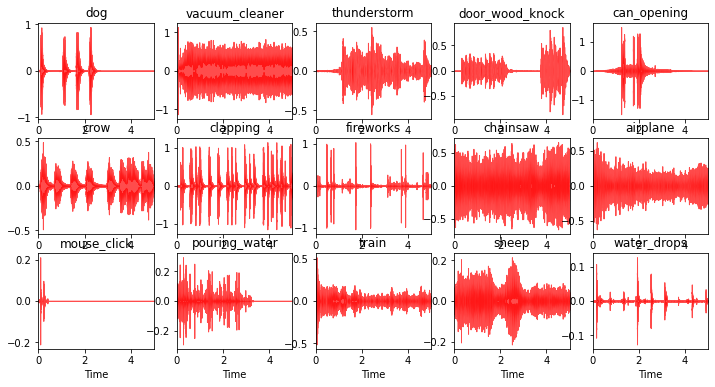

In [ ]:
#we analyze plot the wavefrom amplitude  portfolio  of the random_sample sounds from the esc-50 datsets

e = 1 
figure = plt.figure(figsize =(12,6))
for i in sample_data :
  plt.subplot(3,5,e) # configure the dimensions to dtermine the number of rows plotted per column
  librosa.display.waveplot(i[1][0], i[1][1],color = 'r', alpha = 0.7)
  plt.title(i[0])
  e += 1 
plt.tight_layout() 



ValueError: ignored

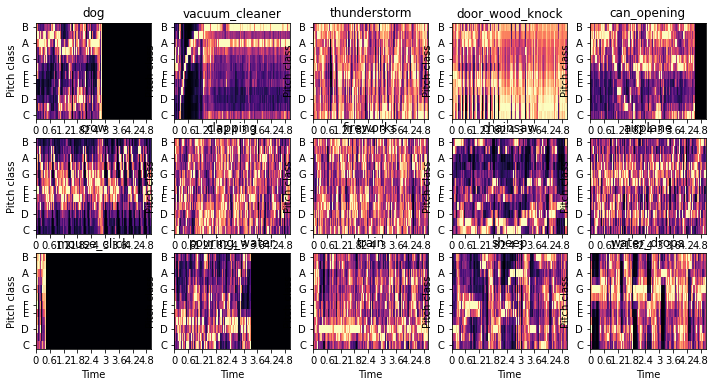

In [ ]:
#we anlyze the feature map of audio files in the dataset using chroma methodology  of esc-50 sample audio files 
e = 1 
figure = plt.figure(figsize =(12,6))
for i in sample_data :
  plt.subplot(3,5,e) # configure the dimensions to dtermine the number of rows plotted per column
  chroma = librosa.feature.chroma_stft(i[1][0], sr=i[1][1])
  librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
  plt.title(i[0])
  e += 1 
plt.tight_layout() 

ValueError: ignored

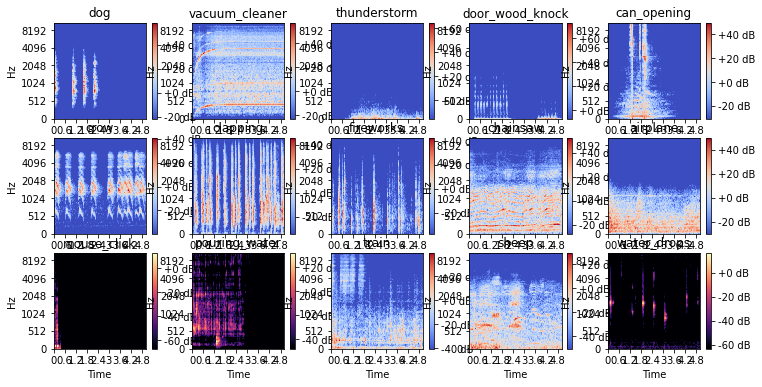

In [ ]:
#we analyze sample Feature maps based on mel spectogram technique of audio files in the esc-50 dataset
i = 1 
fig = plt.figure(figsize=(12, 6)) 
for item in sample_data: 
    plt.subplot(3, 5, i) 
    S = librosa.feature.melspectrogram(item[1][0], sr=item[1]   
    [1],n_mels=128) 
    log_S = librosa.amplitude_to_db(S)
    librosa.display.specshow(log_S, sr=item[1][1],   
    x_axis='time',y_axis='mel') 
    plt.title(item[0]) 
    plt.colorbar(format='%+02.0f dB') 
    i += 1 
plt.tight_layout()

In [ ]:
# Here we create a a list of categorical number and file_path pairs and explore 
u =[]
gen_set =[]
o= 0
if id_class.keys == id_class.keys :
  for f in files :
    #  print(f)
     a= (f.split('-')[5]).split('.')[0]
     u.append(a)
for i in u:
  for j in id_class.keys():
    if i == j:
      q =(j, files[o])
      print(o)
      gen_set.append(q)
      o += 1
      if o > 2000:
        break
        
         
gen_set   
         
         

In [ ]:
#resampling gen_set
def sound_resampling(upath, sr=22050): 
  data , fsr = sf.read(upath) 
  data_22k = librosa.resample(data.T, fsr, sr) 
  if len(data_22k.shape) > 1: 
    data_22k = np.average(data_22k, axis=0) 
  # print(data_22k,sr)
  return data_22k,sr

genset1= [(l[0], sound_resampling(l[1])) for l in gen_set] 
[(ele[0], ele[1][0].shape) for ele in genset1]

[('17', (110250,)),
 ('19', (110250,)),
 ('8', (110250,)),
 ('3', (110250,)),
 ('11', (110250,)),
 ('6', (110250,)),
 ('37', (110250,)),
 ('2', (110250,)),
 ('43', (110250,)),
 ('13', (110250,)),
 ('23', (110250,)),
 ('29', (110250,)),
 ('12', (110250,)),
 ('21', (110250,)),
 ('34', (110250,)),
 ('32', (110250,)),
 ('7', (110250,)),
 ('36', (110250,)),
 ('42', (110250,)),
 ('10', (110250,)),
 ('36', (110250,)),
 ('15', (110250,)),
 ('25', (110250,)),
 ('0', (110250,)),
 ('4', (110250,)),
 ('6', (110250,)),
 ('47', (110250,)),
 ('16', (110250,)),
 ('12', (110250,)),
 ('13', (110250,)),
 ('17', (110250,)),
 ('46', (110250,)),
 ('34', (110250,)),
 ('31', (110250,)),
 ('47', (110250,)),
 ('33', (110250,)),
 ('40', (110250,)),
 ('31', (110250,)),
 ('38', (110250,)),
 ('41', (110250,)),
 ('25', (110250,)),
 ('40', (110250,)),
 ('8', (110250,)),
 ('11', (110250,)),
 ('31', (110250,)),
 ('19', (110250,)),
 ('20', (110250,)),
 ('35', (110250,)),
 ('29', (110250,)),
 ('22', (110250,)),
 ('49', (

**Section_2**

> Generation of Datasets using feature engineering ad audio event representation ,




> We create three datasets  based on three different feature engineering and audio representation techniques to generate image feature maps of the various audio files  in the esc-50 datasets using the various techniques 


> They include :

*   Mel-Spectogram - power image feature map
*   Waveplot-amplitude image feature maps 
*   A combination  of transformations log-scaled and delta scaled mel-spectogram feature maps 

The datasets will be evaluated on three different deep learning architectures:


1.   Convolutional neural networks
2.  convolutional neural networks with fine tuning and regularization
3. Transfer learning based using VGG-16 and mobilenet as feature extractors 







In [ ]:
#create the directory to save the dataset and change directories to that current folder to save the images 
import os
if not os.path.exists("/content/ESC-50_WavePlot_dataset"):#change dir to create 
    os.mkdir("/content/ESC-50_WavePlot_dataset")#make the dir if it doesnt exist
%cd'/content/ESC-50_WavePlot_dataset'
%pwd

/content/ESC-50_WavePlot_dataset


'/content/ESC-50_WavePlot_dataset'

**Generation of waveplot image feature dataset of ESC-50 audio events 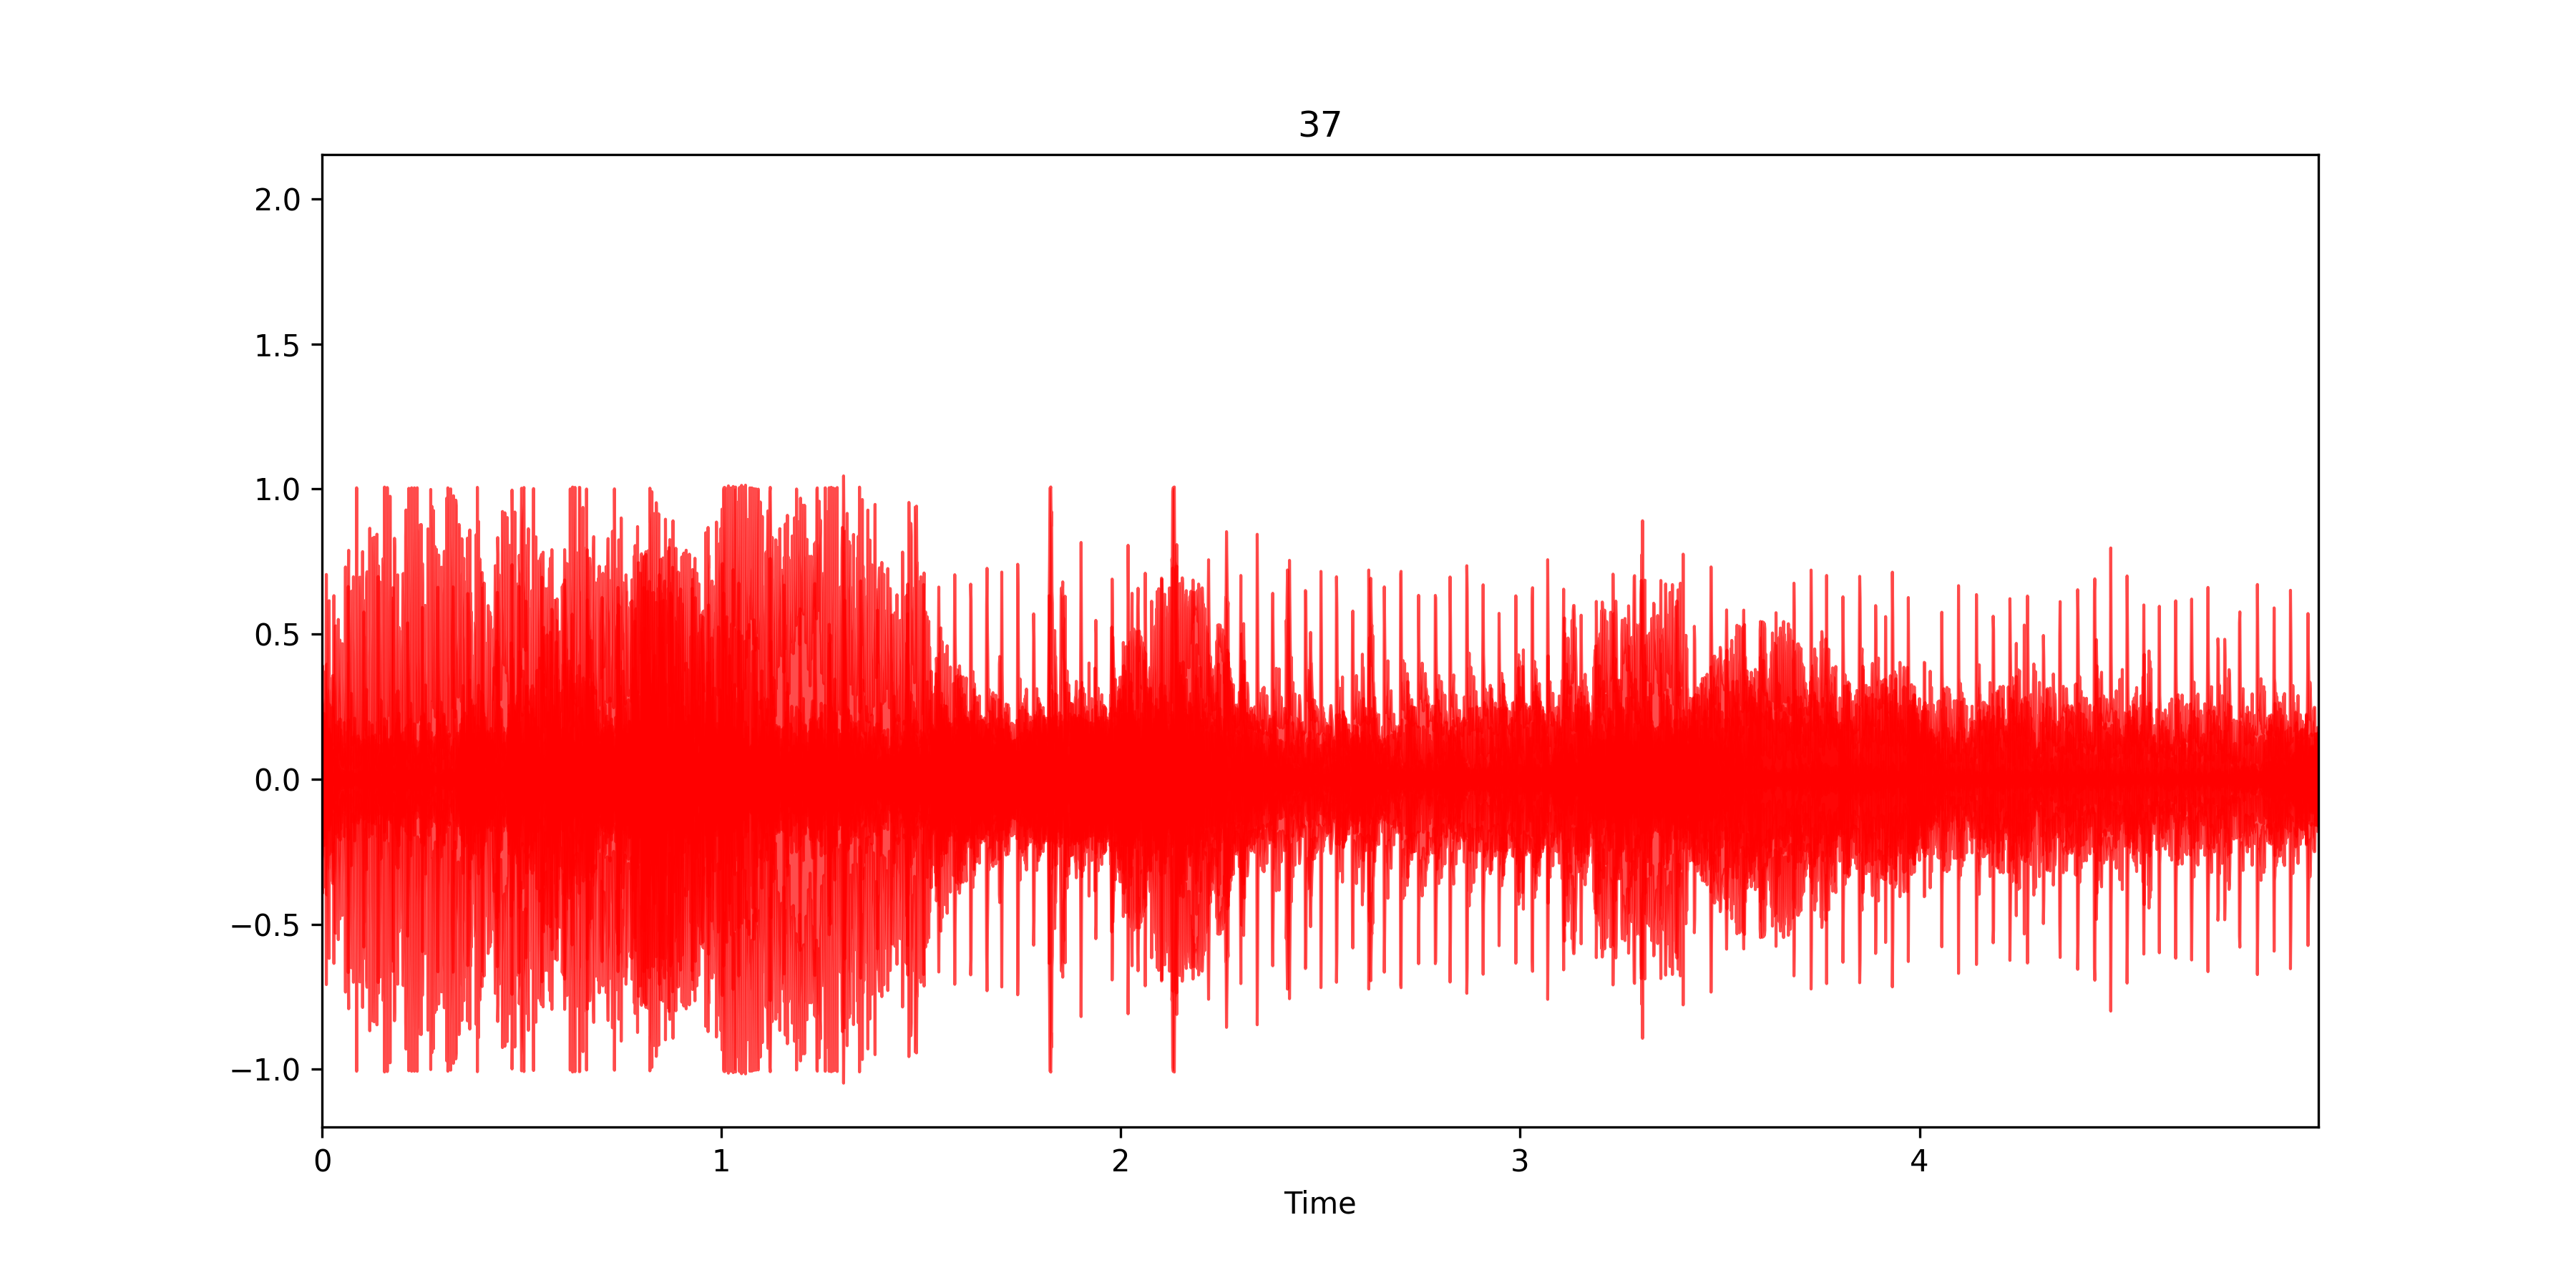**

In [ ]:
#generate waveplot feature dataset

import string
from tqdm import tqdm
from time import sleep

exclude = set(string.punctuation)
#function to remove punctuation from pyplot.title
def rmv_punc(s):
    return ''.join(ch for ch in s if ch not in exclude)

 
#_____________________________________________________________
e = 1 


for i in tqdm(genset1):# change genset1 here to resampled data to create dataset
  # sleep(0.25)
  figure = plt.figure(figsize =(12,6),frameon=False)
  plt.axis('off')#removes any axis from image 
  plt.plot(2,2) # configure the dimensions to dtermine the number of plots plotted per column
  librosa.display.waveplot(i[1][0], i[1][1],color = 'r', alpha = 0.7)
  titl= plt.title(i[0])
  cat_num = str(titl)
  a =cat_num.split(',')[2]#split title text string
  file_name= rmv_punc(a)# remove punctuations
  
  output_image = '{}|2000-{}.png'.format(e,file_name)#format and name to save audio feature map_plot
  #check if there is a directory to store the feature maps 
   #change dir to this folder after making it 
  print(output_image)
  plt.savefig(output_image, dpi=300,bbox_inches='tight',pad_inches=0)#save output image with file name without any padding 
  plt.close(figure)
  # ____________________________________________________
  e+=1
  if e == 2001:
    break
# plt.tight_layout() 

 














  0%|          | 0/2000 [00:00<?, ?it/s]

1|2000- 17.png














  0%|          | 1/2000 [00:00<22:58,  1.45it/s]

2|2000- 19.png














  0%|          | 2/2000 [00:01<23:11,  1.44it/s]

3|2000- 8.png














  0%|          | 3/2000 [00:02<22:49,  1.46it/s]

4|2000- 3.png














  0%|          | 4/2000 [00:02<23:01,  1.45it/s]

5|2000- 11.png














  0%|          | 5/2000 [00:03<23:57,  1.39it/s]

6|2000- 6.png














  0%|          | 6/2000 [00:04<23:51,  1.39it/s]

7|2000- 37.png














  0%|          | 7/2000 [00:05<24:33,  1.35it/s]

8|2000- 2.png














  0%|          | 8/2000 [00:06<26:58,  1.23it/s]

9|2000- 43.png














  0%|          | 9/2000 [00:06<27:15,  1.22it/s]

10|2000- 13.png














  0%|          | 10/2000 [00:07<25:06,  1.32it/s]

11|2000- 23.png














  1%|          | 11/2000 [00:08<24:50,  1.33it/s]

12|2000- 29.png














  1%|          | 12/2000 [00:08<23:03,  1.44it/s]

13|2000- 12.png














  1%|          | 13/2000 [00:09<22:05,  1.50it/s]

14|2000- 21.png














  1%|          | 14/2000 [00:09<21:27,  1.54it/s]

15|2000- 34.png














  1%|          | 15/2000 [00:10<20:59,  1.58it/s]

16|2000- 32.png














  1%|          | 16/2000 [00:11<20:35,  1.61it/s]

17|2000- 7.png














  1%|          | 17/2000 [00:11<21:24,  1.54it/s]

18|2000- 36.png














  1%|          | 18/2000 [00:13<26:07,  1.26it/s]

19|2000- 42.png














  1%|          | 19/2000 [00:13<25:49,  1.28it/s]

20|2000- 10.png














  1%|          | 20/2000 [00:14<24:48,  1.33it/s]

21|2000- 36.png














  1%|          | 21/2000 [00:15<26:16,  1.25it/s]

22|2000- 15.png














  1%|          | 22/2000 [00:15<23:59,  1.37it/s]

23|2000- 25.png














  1%|          | 23/2000 [00:16<23:01,  1.43it/s]

24|2000- 0.png














  1%|          | 24/2000 [00:17<21:34,  1.53it/s]

25|2000- 4.png














  1%|▏         | 25/2000 [00:17<23:15,  1.41it/s]

26|2000- 6.png














  1%|▏         | 26/2000 [00:18<22:08,  1.49it/s]

27|2000- 47.png














  1%|▏         | 27/2000 [00:19<23:20,  1.41it/s]

28|2000- 16.png














  1%|▏         | 28/2000 [00:20<27:12,  1.21it/s]

29|2000- 12.png














  1%|▏         | 29/2000 [00:21<24:54,  1.32it/s]

30|2000- 13.png














  2%|▏         | 30/2000 [00:21<24:14,  1.35it/s]

31|2000- 17.png














  2%|▏         | 31/2000 [00:22<23:09,  1.42it/s]

32|2000- 46.png














  2%|▏         | 32/2000 [00:23<31:15,  1.05it/s]

33|2000- 34.png














  2%|▏         | 33/2000 [00:24<27:23,  1.20it/s]

34|2000- 31.png














  2%|▏         | 34/2000 [00:25<25:07,  1.30it/s]

35|2000- 47.png














  2%|▏         | 35/2000 [00:25<25:16,  1.30it/s]

36|2000- 33.png














  2%|▏         | 36/2000 [00:26<23:26,  1.40it/s]

37|2000- 40.png














  2%|▏         | 37/2000 [00:27<25:34,  1.28it/s]

38|2000- 31.png














  2%|▏         | 38/2000 [00:27<23:35,  1.39it/s]

39|2000- 38.png














  2%|▏         | 39/2000 [00:28<22:08,  1.48it/s]

40|2000- 41.png














  2%|▏         | 40/2000 [00:29<22:03,  1.48it/s]

41|2000- 25.png














  2%|▏         | 41/2000 [00:29<21:21,  1.53it/s]

42|2000- 40.png














  2%|▏         | 42/2000 [00:30<23:04,  1.41it/s]

43|2000- 8.png














  2%|▏         | 43/2000 [00:31<24:05,  1.35it/s]

44|2000- 11.png














  2%|▏         | 44/2000 [00:32<25:59,  1.25it/s]

45|2000- 31.png














  2%|▏         | 45/2000 [00:32<24:07,  1.35it/s]

46|2000- 19.png














  2%|▏         | 46/2000 [00:33<23:16,  1.40it/s]

47|2000- 20.png














  2%|▏         | 47/2000 [00:34<23:13,  1.40it/s]

48|2000- 35.png














  2%|▏         | 48/2000 [00:35<25:09,  1.29it/s]

49|2000- 29.png














  2%|▏         | 49/2000 [00:35<23:13,  1.40it/s]

50|2000- 22.png














  2%|▎         | 50/2000 [00:36<23:24,  1.39it/s]

51|2000- 49.png














  3%|▎         | 51/2000 [00:37<23:33,  1.38it/s]

52|2000- 42.png














  3%|▎         | 52/2000 [00:38<23:19,  1.39it/s]

53|2000- 41.png














  3%|▎         | 53/2000 [00:39<26:08,  1.24it/s]

54|2000- 10.png














  3%|▎         | 54/2000 [00:39<25:16,  1.28it/s]

55|2000- 27.png














  3%|▎         | 55/2000 [00:40<23:57,  1.35it/s]

56|2000- 23.png














  3%|▎         | 56/2000 [00:40<22:36,  1.43it/s]

57|2000- 38.png














  3%|▎         | 57/2000 [00:41<21:47,  1.49it/s]

58|2000- 44.png














  3%|▎         | 58/2000 [00:42<21:42,  1.49it/s]

59|2000- 15.png














  3%|▎         | 59/2000 [00:42<20:48,  1.55it/s]

60|2000- 48.png














  3%|▎         | 60/2000 [00:43<20:22,  1.59it/s]

61|2000- 15.png














  3%|▎         | 61/2000 [00:44<20:23,  1.58it/s]

62|2000- 33.png














  3%|▎         | 62/2000 [00:44<21:08,  1.53it/s]

63|2000- 31.png














  3%|▎         | 63/2000 [00:45<20:17,  1.59it/s]

64|2000- 25.png














  3%|▎         | 64/2000 [00:45<20:20,  1.59it/s]

65|2000- 42.png














  3%|▎         | 65/2000 [00:46<21:48,  1.48it/s]

66|2000- 13.png














  3%|▎         | 66/2000 [00:47<22:56,  1.41it/s]

67|2000- 7.png














  3%|▎         | 67/2000 [00:48<25:15,  1.28it/s]

68|2000- 45.png














  3%|▎         | 68/2000 [00:49<25:10,  1.28it/s]

69|2000- 48.png














  3%|▎         | 69/2000 [00:49<23:16,  1.38it/s]

70|2000- 36.png














  4%|▎         | 70/2000 [00:50<23:12,  1.39it/s]

71|2000- 26.png














  4%|▎         | 71/2000 [00:51<23:06,  1.39it/s]

72|2000- 9.png














  4%|▎         | 72/2000 [00:52<23:28,  1.37it/s]

73|2000- 21.png














  4%|▎         | 73/2000 [00:52<21:49,  1.47it/s]

74|2000- 22.png














  4%|▎         | 74/2000 [00:53<24:31,  1.31it/s]

75|2000- 34.png














  4%|▍         | 75/2000 [00:54<22:44,  1.41it/s]

76|2000- 17.png














  4%|▍         | 76/2000 [00:54<22:19,  1.44it/s]

77|2000- 35.png














  4%|▍         | 77/2000 [00:55<24:13,  1.32it/s]

78|2000- 27.png














  4%|▍         | 78/2000 [00:56<23:02,  1.39it/s]

79|2000- 29.png














  4%|▍         | 79/2000 [00:56<21:56,  1.46it/s]

80|2000- 4.png














  4%|▍         | 80/2000 [00:57<22:08,  1.45it/s]

81|2000- 47.png














  4%|▍         | 81/2000 [00:58<26:56,  1.19it/s]

82|2000- 49.png














  4%|▍         | 82/2000 [00:59<25:20,  1.26it/s]

83|2000- 41.png














  4%|▍         | 83/2000 [01:00<25:13,  1.27it/s]

84|2000- 43.png














  4%|▍         | 84/2000 [01:00<23:59,  1.33it/s]

85|2000- 24.png














  4%|▍         | 85/2000 [01:01<22:37,  1.41it/s]

86|2000- 1.png














  4%|▍         | 86/2000 [01:02<21:40,  1.47it/s]

87|2000- 1.png














  4%|▍         | 87/2000 [01:02<21:24,  1.49it/s]

88|2000- 43.png














  4%|▍         | 88/2000 [01:03<21:20,  1.49it/s]

89|2000- 2.png














  4%|▍         | 89/2000 [01:04<22:02,  1.45it/s]

90|2000- 42.png














  4%|▍         | 90/2000 [01:05<23:11,  1.37it/s]

91|2000- 25.png














  5%|▍         | 91/2000 [01:05<22:31,  1.41it/s]

92|2000- 24.png














  5%|▍         | 92/2000 [01:06<22:15,  1.43it/s]

93|2000- 27.png














  5%|▍         | 93/2000 [01:07<21:44,  1.46it/s]

94|2000- 9.png














  5%|▍         | 94/2000 [01:07<21:29,  1.48it/s]

95|2000- 43.png














  5%|▍         | 95/2000 [01:08<22:14,  1.43it/s]

96|2000- 34.png














  5%|▍         | 96/2000 [01:09<20:39,  1.54it/s]

97|2000- 46.png














  5%|▍         | 97/2000 [01:09<21:17,  1.49it/s]

98|2000- 19.png














  5%|▍         | 98/2000 [01:10<22:03,  1.44it/s]

99|2000- 20.png














  5%|▍         | 99/2000 [01:11<22:31,  1.41it/s]

100|2000- 39.png














  5%|▌         | 100/2000 [01:11<20:55,  1.51it/s]

101|2000- 9.png














  5%|▌         | 101/2000 [01:12<20:43,  1.53it/s]

102|2000- 3.png














  5%|▌         | 102/2000 [01:13<21:35,  1.47it/s]

103|2000- 7.png














  5%|▌         | 103/2000 [01:13<21:41,  1.46it/s]

104|2000- 41.png














  5%|▌         | 104/2000 [01:14<23:11,  1.36it/s]

105|2000- 23.png














  5%|▌         | 105/2000 [01:15<22:00,  1.43it/s]

106|2000- 45.png














  5%|▌         | 106/2000 [01:16<22:04,  1.43it/s]

107|2000- 15.png














  5%|▌         | 107/2000 [01:16<20:58,  1.50it/s]

108|2000- 12.png














  5%|▌         | 108/2000 [01:17<20:31,  1.54it/s]

109|2000- 0.png














  5%|▌         | 109/2000 [01:17<20:20,  1.55it/s]

110|2000- 5.png














  6%|▌         | 110/2000 [01:18<20:14,  1.56it/s]

111|2000- 37.png














  6%|▌         | 111/2000 [01:19<19:41,  1.60it/s]

112|2000- 4.png














  6%|▌         | 112/2000 [01:19<20:37,  1.53it/s]

113|2000- 25.png














  6%|▌         | 113/2000 [01:20<20:02,  1.57it/s]

114|2000- 22.png














  6%|▌         | 114/2000 [01:21<20:39,  1.52it/s]

115|2000- 43.png














  6%|▌         | 115/2000 [01:21<20:30,  1.53it/s]

116|2000- 19.png














  6%|▌         | 116/2000 [01:22<20:04,  1.56it/s]

117|2000- 37.png














  6%|▌         | 117/2000 [01:22<19:49,  1.58it/s]

118|2000- 24.png














  6%|▌         | 118/2000 [01:23<19:15,  1.63it/s]

119|2000- 29.png














  6%|▌         | 119/2000 [01:24<18:49,  1.67it/s]

120|2000- 29.png














  6%|▌         | 120/2000 [01:24<19:07,  1.64it/s]

121|2000- 21.png














  6%|▌         | 121/2000 [01:25<18:28,  1.70it/s]

122|2000- 12.png














  6%|▌         | 122/2000 [01:26<19:48,  1.58it/s]

123|2000- 14.png














  6%|▌         | 123/2000 [01:27<23:36,  1.32it/s]

124|2000- 37.png














  6%|▌         | 124/2000 [01:27<24:52,  1.26it/s]

125|2000- 35.png














  6%|▋         | 125/2000 [01:28<25:49,  1.21it/s]

126|2000- 32.png














  6%|▋         | 126/2000 [01:29<23:27,  1.33it/s]

127|2000- 39.png














  6%|▋         | 127/2000 [01:30<22:19,  1.40it/s]

128|2000- 16.png














  6%|▋         | 128/2000 [01:30<22:30,  1.39it/s]

129|2000- 16.png














  6%|▋         | 129/2000 [01:31<22:21,  1.39it/s]

130|2000- 1.png














  6%|▋         | 130/2000 [01:32<21:45,  1.43it/s]

131|2000- 14.png














  7%|▋         | 131/2000 [01:32<21:24,  1.45it/s]

132|2000- 0.png














  7%|▋         | 132/2000 [01:33<21:16,  1.46it/s]

133|2000- 38.png














  7%|▋         | 133/2000 [01:34<20:29,  1.52it/s]

134|2000- 42.png














  7%|▋         | 134/2000 [01:35<24:12,  1.28it/s]

135|2000- 11.png














  7%|▋         | 135/2000 [01:35<24:23,  1.27it/s]

136|2000- 6.png














  7%|▋         | 136/2000 [01:36<23:13,  1.34it/s]

137|2000- 36.png














  7%|▋         | 137/2000 [01:37<24:16,  1.28it/s]

138|2000- 39.png














  7%|▋         | 138/2000 [01:38<21:58,  1.41it/s]

139|2000- 35.png














  7%|▋         | 139/2000 [01:39<24:34,  1.26it/s]

140|2000- 39.png














  7%|▋         | 140/2000 [01:39<22:16,  1.39it/s]

141|2000- 38.png














  7%|▋         | 141/2000 [01:40<21:21,  1.45it/s]

142|2000- 47.png














  7%|▋         | 142/2000 [01:41<22:42,  1.36it/s]

143|2000- 34.png














  7%|▋         | 143/2000 [01:41<21:04,  1.47it/s]

144|2000- 24.png














  7%|▋         | 144/2000 [01:42<20:30,  1.51it/s]

145|2000- 0.png














  7%|▋         | 145/2000 [01:42<20:40,  1.49it/s]

146|2000- 0.png














  7%|▋         | 146/2000 [01:43<20:20,  1.52it/s]

147|2000- 45.png














  7%|▋         | 147/2000 [01:44<22:20,  1.38it/s]

148|2000- 9.png














  7%|▋         | 148/2000 [01:44<21:13,  1.45it/s]

149|2000- 2.png














  7%|▋         | 149/2000 [01:45<22:10,  1.39it/s]

150|2000- 47.png














  8%|▊         | 150/2000 [01:46<23:28,  1.31it/s]

151|2000- 19.png














  8%|▊         | 151/2000 [01:47<26:53,  1.15it/s]

152|2000- 15.png














  8%|▊         | 152/2000 [01:48<24:31,  1.26it/s]

153|2000- 14.png














  8%|▊         | 153/2000 [01:49<22:57,  1.34it/s]

154|2000- 15.png














  8%|▊         | 154/2000 [01:49<21:20,  1.44it/s]

155|2000- 34.png














  8%|▊         | 155/2000 [01:50<20:13,  1.52it/s]

156|2000- 49.png














  8%|▊         | 156/2000 [01:51<22:47,  1.35it/s]

157|2000- 47.png














  8%|▊         | 157/2000 [01:52<25:39,  1.20it/s]

158|2000- 37.png














  8%|▊         | 158/2000 [01:52<23:55,  1.28it/s]

159|2000- 28.png














  8%|▊         | 159/2000 [01:53<22:06,  1.39it/s]

160|2000- 0.png














  8%|▊         | 160/2000 [01:53<20:33,  1.49it/s]

161|2000- 30.png














  8%|▊         | 161/2000 [01:54<19:41,  1.56it/s]

162|2000- 23.png














  8%|▊         | 162/2000 [01:55<18:59,  1.61it/s]

163|2000- 5.png














  8%|▊         | 163/2000 [01:55<18:58,  1.61it/s]

164|2000- 0.png














  8%|▊         | 164/2000 [01:56<19:11,  1.59it/s]

165|2000- 36.png














  8%|▊         | 165/2000 [01:57<20:57,  1.46it/s]

166|2000- 33.png














  8%|▊         | 166/2000 [01:57<21:42,  1.41it/s]

167|2000- 10.png














  8%|▊         | 167/2000 [01:58<22:29,  1.36it/s]

168|2000- 45.png














  8%|▊         | 168/2000 [01:59<23:54,  1.28it/s]

169|2000- 23.png














  8%|▊         | 169/2000 [02:00<22:46,  1.34it/s]

170|2000- 10.png














  8%|▊         | 170/2000 [02:00<21:44,  1.40it/s]

171|2000- 40.png














  9%|▊         | 171/2000 [02:01<23:34,  1.29it/s]

172|2000- 39.png














  9%|▊         | 172/2000 [02:02<21:29,  1.42it/s]

173|2000- 17.png














  9%|▊         | 173/2000 [02:03<21:24,  1.42it/s]

174|2000- 5.png














  9%|▊         | 174/2000 [02:03<20:23,  1.49it/s]

175|2000- 9.png














  9%|▉         | 175/2000 [02:04<20:47,  1.46it/s]

176|2000- 20.png














  9%|▉         | 176/2000 [02:05<21:46,  1.40it/s]

177|2000- 0.png














  9%|▉         | 177/2000 [02:05<20:21,  1.49it/s]

178|2000- 9.png














  9%|▉         | 178/2000 [02:06<21:31,  1.41it/s]

179|2000- 10.png














  9%|▉         | 179/2000 [02:07<21:13,  1.43it/s]

180|2000- 5.png














  9%|▉         | 180/2000 [02:07<21:24,  1.42it/s]

181|2000- 0.png














  9%|▉         | 181/2000 [02:08<20:49,  1.46it/s]

182|2000- 7.png














  9%|▉         | 182/2000 [02:09<20:21,  1.49it/s]

183|2000- 49.png














  9%|▉         | 183/2000 [02:09<21:01,  1.44it/s]

184|2000- 40.png














  9%|▉         | 184/2000 [02:10<22:11,  1.36it/s]

185|2000- 37.png














  9%|▉         | 185/2000 [02:11<20:47,  1.46it/s]

186|2000- 26.png














  9%|▉         | 186/2000 [02:12<20:24,  1.48it/s]

187|2000- 28.png














  9%|▉         | 187/2000 [02:12<20:00,  1.51it/s]

188|2000- 26.png














  9%|▉         | 188/2000 [02:13<19:32,  1.55it/s]

189|2000- 40.png














  9%|▉         | 189/2000 [02:14<21:07,  1.43it/s]

190|2000- 49.png














 10%|▉         | 190/2000 [02:14<20:49,  1.45it/s]

191|2000- 35.png














 10%|▉         | 191/2000 [02:15<23:37,  1.28it/s]

192|2000- 7.png














 10%|▉         | 192/2000 [02:16<21:51,  1.38it/s]

193|2000- 16.png














 10%|▉         | 193/2000 [02:17<25:33,  1.18it/s]

194|2000- 28.png














 10%|▉         | 194/2000 [02:18<23:47,  1.27it/s]

195|2000- 2.png














 10%|▉         | 195/2000 [02:18<22:07,  1.36it/s]

196|2000- 46.png














 10%|▉         | 196/2000 [02:19<23:48,  1.26it/s]

197|2000- 42.png














 10%|▉         | 197/2000 [02:20<24:00,  1.25it/s]

198|2000- 29.png














 10%|▉         | 198/2000 [02:21<22:03,  1.36it/s]

199|2000- 23.png














 10%|▉         | 199/2000 [02:21<21:11,  1.42it/s]

200|2000- 39.png














 10%|█         | 200/2000 [02:22<20:04,  1.49it/s]

201|2000- 19.png














 10%|█         | 201/2000 [02:23<20:42,  1.45it/s]

202|2000- 48.png














 10%|█         | 202/2000 [02:23<20:29,  1.46it/s]

203|2000- 43.png














 10%|█         | 203/2000 [02:24<19:28,  1.54it/s]

204|2000- 28.png














 10%|█         | 204/2000 [02:24<20:06,  1.49it/s]

205|2000- 12.png














 10%|█         | 205/2000 [02:25<19:26,  1.54it/s]

206|2000- 3.png














 10%|█         | 206/2000 [02:26<19:40,  1.52it/s]

207|2000- 15.png














 10%|█         | 207/2000 [02:26<19:13,  1.55it/s]

208|2000- 29.png














 10%|█         | 208/2000 [02:27<18:40,  1.60it/s]

209|2000- 8.png














 10%|█         | 209/2000 [02:28<21:03,  1.42it/s]

210|2000- 7.png














 10%|█         | 210/2000 [02:29<20:50,  1.43it/s]

211|2000- 27.png














 11%|█         | 211/2000 [02:29<20:17,  1.47it/s]

212|2000- 5.png














 11%|█         | 212/2000 [02:30<19:50,  1.50it/s]

213|2000- 19.png














 11%|█         | 213/2000 [02:31<23:07,  1.29it/s]

214|2000- 41.png














 11%|█         | 214/2000 [02:32<25:52,  1.15it/s]

215|2000- 31.png














 11%|█         | 215/2000 [02:33<23:22,  1.27it/s]

216|2000- 8.png














 11%|█         | 216/2000 [02:33<25:01,  1.19it/s]

217|2000- 44.png














 11%|█         | 217/2000 [02:34<24:19,  1.22it/s]

218|2000- 23.png














 11%|█         | 218/2000 [02:35<22:59,  1.29it/s]

219|2000- 40.png














 11%|█         | 219/2000 [02:36<21:48,  1.36it/s]

220|2000- 8.png














 11%|█         | 220/2000 [02:36<21:23,  1.39it/s]

221|2000- 42.png














 11%|█         | 221/2000 [02:37<25:30,  1.16it/s]

222|2000- 33.png














 11%|█         | 222/2000 [02:38<23:22,  1.27it/s]

223|2000- 29.png














 11%|█         | 223/2000 [02:39<21:28,  1.38it/s]

224|2000- 34.png














 11%|█         | 224/2000 [02:39<20:07,  1.47it/s]

225|2000- 14.png














 11%|█▏        | 225/2000 [02:40<19:57,  1.48it/s]

226|2000- 12.png














 11%|█▏        | 226/2000 [02:41<19:46,  1.49it/s]

227|2000- 37.png














 11%|█▏        | 227/2000 [02:41<19:45,  1.50it/s]

228|2000- 32.png














 11%|█▏        | 228/2000 [02:42<19:24,  1.52it/s]

229|2000- 21.png














 11%|█▏        | 229/2000 [02:42<18:42,  1.58it/s]

230|2000- 10.png














 12%|█▏        | 230/2000 [02:43<19:59,  1.48it/s]

231|2000- 47.png














 12%|█▏        | 231/2000 [02:44<20:05,  1.47it/s]

232|2000- 47.png














 12%|█▏        | 232/2000 [02:45<20:46,  1.42it/s]

233|2000- 19.png














 12%|█▏        | 233/2000 [02:45<20:53,  1.41it/s]

234|2000- 44.png














 12%|█▏        | 234/2000 [02:46<20:11,  1.46it/s]

235|2000- 14.png














 12%|█▏        | 235/2000 [02:47<20:10,  1.46it/s]

236|2000- 26.png














 12%|█▏        | 236/2000 [02:48<23:54,  1.23it/s]

237|2000- 17.png














 12%|█▏        | 237/2000 [02:48<21:56,  1.34it/s]

238|2000- 5.png














 12%|█▏        | 238/2000 [02:49<21:28,  1.37it/s]

239|2000- 38.png














 12%|█▏        | 239/2000 [02:50<20:13,  1.45it/s]

240|2000- 11.png














 12%|█▏        | 240/2000 [02:50<20:30,  1.43it/s]

241|2000- 48.png














 12%|█▏        | 241/2000 [02:51<20:36,  1.42it/s]

242|2000- 30.png














 12%|█▏        | 242/2000 [02:52<19:17,  1.52it/s]

243|2000- 49.png














 12%|█▏        | 243/2000 [02:52<20:01,  1.46it/s]

244|2000- 31.png














 12%|█▏        | 244/2000 [02:53<19:20,  1.51it/s]

245|2000- 48.png














 12%|█▏        | 245/2000 [02:54<18:44,  1.56it/s]

246|2000- 46.png














 12%|█▏        | 246/2000 [02:55<21:18,  1.37it/s]

247|2000- 8.png














 12%|█▏        | 247/2000 [02:55<20:47,  1.40it/s]

248|2000- 31.png














 12%|█▏        | 248/2000 [02:56<19:29,  1.50it/s]

249|2000- 40.png














 12%|█▏        | 249/2000 [02:57<21:43,  1.34it/s]

250|2000- 26.png














 12%|█▎        | 250/2000 [02:57<20:04,  1.45it/s]

251|2000- 7.png














 13%|█▎        | 251/2000 [02:58<19:16,  1.51it/s]

252|2000- 21.png














 13%|█▎        | 252/2000 [02:58<18:16,  1.59it/s]

253|2000- 45.png














 13%|█▎        | 253/2000 [02:59<18:44,  1.55it/s]

254|2000- 38.png














 13%|█▎        | 254/2000 [03:00<18:19,  1.59it/s]

255|2000- 33.png














 13%|█▎        | 255/2000 [03:00<18:16,  1.59it/s]

256|2000- 8.png














 13%|█▎        | 256/2000 [03:01<20:07,  1.44it/s]

257|2000- 19.png














 13%|█▎        | 257/2000 [03:02<20:32,  1.41it/s]

258|2000- 0.png














 13%|█▎        | 258/2000 [03:03<20:39,  1.41it/s]

259|2000- 12.png














 13%|█▎        | 259/2000 [03:03<19:52,  1.46it/s]

260|2000- 38.png














 13%|█▎        | 260/2000 [03:04<18:54,  1.53it/s]

261|2000- 14.png














 13%|█▎        | 261/2000 [03:04<18:54,  1.53it/s]

262|2000- 13.png














 13%|█▎        | 262/2000 [03:05<18:56,  1.53it/s]

263|2000- 20.png














 13%|█▎        | 263/2000 [03:06<18:55,  1.53it/s]

264|2000- 27.png














 13%|█▎        | 264/2000 [03:06<18:17,  1.58it/s]

265|2000- 34.png














 13%|█▎        | 265/2000 [03:07<17:36,  1.64it/s]

266|2000- 46.png














 13%|█▎        | 266/2000 [03:08<19:05,  1.51it/s]

267|2000- 22.png














 13%|█▎        | 267/2000 [03:08<19:11,  1.50it/s]

268|2000- 34.png














 13%|█▎        | 268/2000 [03:09<18:40,  1.55it/s]

269|2000- 24.png














 13%|█▎        | 269/2000 [03:10<17:53,  1.61it/s]

270|2000- 24.png














 14%|█▎        | 270/2000 [03:10<17:38,  1.63it/s]

271|2000- 22.png














 14%|█▎        | 271/2000 [03:11<20:55,  1.38it/s]

272|2000- 47.png














 14%|█▎        | 272/2000 [03:12<20:48,  1.38it/s]

273|2000- 31.png














 14%|█▎        | 273/2000 [03:12<19:43,  1.46it/s]

274|2000- 37.png














 14%|█▎        | 274/2000 [03:13<19:21,  1.49it/s]

275|2000- 33.png














 14%|█▍        | 275/2000 [03:14<19:00,  1.51it/s]

276|2000- 48.png














 14%|█▍        | 276/2000 [03:14<18:46,  1.53it/s]

277|2000- 40.png














 14%|█▍        | 277/2000 [03:15<21:17,  1.35it/s]

278|2000- 47.png














 14%|█▍        | 278/2000 [03:16<21:51,  1.31it/s]

279|2000- 44.png














 14%|█▍        | 279/2000 [03:17<21:56,  1.31it/s]

280|2000- 22.png














 14%|█▍        | 280/2000 [03:18<21:28,  1.33it/s]

281|2000- 24.png














 14%|█▍        | 281/2000 [03:18<20:09,  1.42it/s]

282|2000- 48.png














 14%|█▍        | 282/2000 [03:19<19:19,  1.48it/s]

283|2000- 25.png














 14%|█▍        | 283/2000 [03:19<19:25,  1.47it/s]

284|2000- 46.png














 14%|█▍        | 284/2000 [03:20<18:57,  1.51it/s]

285|2000- 11.png














 14%|█▍        | 285/2000 [03:21<20:24,  1.40it/s]

286|2000- 29.png














 14%|█▍        | 286/2000 [03:22<19:28,  1.47it/s]

287|2000- 35.png














 14%|█▍        | 287/2000 [03:22<21:15,  1.34it/s]

288|2000- 23.png














 14%|█▍        | 288/2000 [03:23<19:56,  1.43it/s]

289|2000- 20.png














 14%|█▍        | 289/2000 [03:24<21:35,  1.32it/s]

290|2000- 0.png














 14%|█▍        | 290/2000 [03:25<20:27,  1.39it/s]

291|2000- 33.png














 15%|█▍        | 291/2000 [03:25<20:48,  1.37it/s]

292|2000- 29.png














 15%|█▍        | 292/2000 [03:26<19:45,  1.44it/s]

293|2000- 44.png














 15%|█▍        | 293/2000 [03:27<21:16,  1.34it/s]

294|2000- 0.png














 15%|█▍        | 294/2000 [03:27<19:32,  1.45it/s]

295|2000- 25.png














 15%|█▍        | 295/2000 [03:28<19:38,  1.45it/s]

296|2000- 7.png














 15%|█▍        | 296/2000 [03:29<18:55,  1.50it/s]

297|2000- 26.png














 15%|█▍        | 297/2000 [03:29<18:19,  1.55it/s]

298|2000- 9.png














 15%|█▍        | 298/2000 [03:30<18:07,  1.57it/s]

299|2000- 46.png














 15%|█▍        | 299/2000 [03:31<19:49,  1.43it/s]

300|2000- 18.png














 15%|█▌        | 300/2000 [03:31<19:32,  1.45it/s]

301|2000- 19.png














 15%|█▌        | 301/2000 [03:32<19:33,  1.45it/s]

302|2000- 27.png














 15%|█▌        | 302/2000 [03:33<18:54,  1.50it/s]

303|2000- 28.png














 15%|█▌        | 303/2000 [03:33<18:17,  1.55it/s]

304|2000- 3.png














 15%|█▌        | 304/2000 [03:34<19:06,  1.48it/s]

305|2000- 32.png














 15%|█▌        | 305/2000 [03:35<18:29,  1.53it/s]

306|2000- 1.png














 15%|█▌        | 306/2000 [03:35<17:58,  1.57it/s]

307|2000- 17.png














 15%|█▌        | 307/2000 [03:36<18:03,  1.56it/s]

308|2000- 29.png














 15%|█▌        | 308/2000 [03:36<17:39,  1.60it/s]

309|2000- 34.png














 15%|█▌        | 309/2000 [03:37<17:08,  1.64it/s]

310|2000- 47.png














 16%|█▌        | 310/2000 [03:38<17:21,  1.62it/s]

311|2000- 2.png














 16%|█▌        | 311/2000 [03:39<19:21,  1.45it/s]

312|2000- 42.png














 16%|█▌        | 312/2000 [03:40<29:52,  1.06s/it]

313|2000- 26.png














 16%|█▌        | 313/2000 [03:41<26:20,  1.07it/s]

314|2000- 11.png














 16%|█▌        | 314/2000 [03:42<25:30,  1.10it/s]

315|2000- 0.png














 16%|█▌        | 315/2000 [03:43<23:24,  1.20it/s]

316|2000- 5.png














 16%|█▌        | 316/2000 [03:43<21:21,  1.31it/s]

317|2000- 15.png














 16%|█▌        | 317/2000 [03:44<19:54,  1.41it/s]

318|2000- 2.png














 16%|█▌        | 318/2000 [03:44<19:50,  1.41it/s]

319|2000- 25.png














 16%|█▌        | 319/2000 [03:45<19:21,  1.45it/s]

320|2000- 9.png














 16%|█▌        | 320/2000 [03:46<19:32,  1.43it/s]

321|2000- 36.png














 16%|█▌        | 321/2000 [03:47<21:11,  1.32it/s]

322|2000- 17.png














 16%|█▌        | 322/2000 [03:47<19:48,  1.41it/s]

323|2000- 25.png














 16%|█▌        | 323/2000 [03:48<18:53,  1.48it/s]

324|2000- 23.png














 16%|█▌        | 324/2000 [03:49<18:41,  1.50it/s]

325|2000- 20.png














 16%|█▋        | 325/2000 [03:49<19:19,  1.45it/s]

326|2000- 12.png














 16%|█▋        | 326/2000 [03:50<18:38,  1.50it/s]

327|2000- 15.png














 16%|█▋        | 327/2000 [03:51<18:10,  1.53it/s]

328|2000- 46.png














 16%|█▋        | 328/2000 [03:52<20:47,  1.34it/s]

329|2000- 42.png














 16%|█▋        | 329/2000 [03:52<22:47,  1.22it/s]

330|2000- 5.png














 16%|█▋        | 330/2000 [03:53<21:09,  1.32it/s]

331|2000- 45.png














 17%|█▋        | 331/2000 [03:54<22:00,  1.26it/s]

332|2000- 2.png














 17%|█▋        | 332/2000 [03:55<20:34,  1.35it/s]

333|2000- 10.png














 17%|█▋        | 333/2000 [03:55<20:12,  1.38it/s]

334|2000- 46.png














 17%|█▋        | 334/2000 [03:56<20:05,  1.38it/s]

335|2000- 20.png














 17%|█▋        | 335/2000 [03:57<20:30,  1.35it/s]

336|2000- 4.png














 17%|█▋        | 336/2000 [03:57<19:39,  1.41it/s]

337|2000- 12.png














 17%|█▋        | 337/2000 [03:58<19:22,  1.43it/s]

338|2000- 44.png














 17%|█▋        | 338/2000 [03:59<19:49,  1.40it/s]

339|2000- 17.png














 17%|█▋        | 339/2000 [03:59<19:05,  1.45it/s]

340|2000- 13.png














 17%|█▋        | 340/2000 [04:00<19:06,  1.45it/s]

341|2000- 30.png














 17%|█▋        | 341/2000 [04:01<17:56,  1.54it/s]

342|2000- 20.png














 17%|█▋        | 342/2000 [04:01<18:18,  1.51it/s]

343|2000- 22.png














 17%|█▋        | 343/2000 [04:02<19:21,  1.43it/s]

344|2000- 21.png














 17%|█▋        | 344/2000 [04:03<17:52,  1.54it/s]

345|2000- 37.png














 17%|█▋        | 345/2000 [04:03<18:13,  1.51it/s]

346|2000- 45.png














 17%|█▋        | 346/2000 [04:04<20:09,  1.37it/s]

347|2000- 36.png














 17%|█▋        | 347/2000 [04:05<23:19,  1.18it/s]

348|2000- 48.png














 17%|█▋        | 348/2000 [04:06<21:13,  1.30it/s]

349|2000- 18.png














 17%|█▋        | 349/2000 [04:07<20:19,  1.35it/s]

350|2000- 3.png














 18%|█▊        | 350/2000 [04:07<20:03,  1.37it/s]

351|2000- 38.png














 18%|█▊        | 351/2000 [04:08<18:56,  1.45it/s]

352|2000- 14.png














 18%|█▊        | 352/2000 [04:09<18:27,  1.49it/s]

353|2000- 34.png














 18%|█▊        | 353/2000 [04:09<17:30,  1.57it/s]

354|2000- 37.png














 18%|█▊        | 354/2000 [04:10<17:41,  1.55it/s]

355|2000- 44.png














 18%|█▊        | 355/2000 [04:11<18:28,  1.48it/s]

356|2000- 4.png














 18%|█▊        | 356/2000 [04:11<19:29,  1.41it/s]

357|2000- 36.png














 18%|█▊        | 357/2000 [04:12<20:14,  1.35it/s]

358|2000- 18.png














 18%|█▊        | 358/2000 [04:13<20:20,  1.35it/s]

359|2000- 2.png














 18%|█▊        | 359/2000 [04:14<20:19,  1.35it/s]

360|2000- 45.png














 18%|█▊        | 360/2000 [04:14<20:41,  1.32it/s]

361|2000- 17.png














 18%|█▊        | 361/2000 [04:15<19:45,  1.38it/s]

362|2000- 16.png














 18%|█▊        | 362/2000 [04:16<19:40,  1.39it/s]

363|2000- 30.png














 18%|█▊        | 363/2000 [04:16<18:22,  1.49it/s]

364|2000- 34.png














 18%|█▊        | 364/2000 [04:17<17:15,  1.58it/s]

365|2000- 45.png














 18%|█▊        | 365/2000 [04:18<17:49,  1.53it/s]

366|2000- 41.png














 18%|█▊        | 366/2000 [04:19<19:31,  1.40it/s]

367|2000- 2.png














 18%|█▊        | 367/2000 [04:19<19:38,  1.39it/s]

368|2000- 26.png














 18%|█▊        | 368/2000 [04:20<18:29,  1.47it/s]

369|2000- 27.png














 18%|█▊        | 369/2000 [04:21<18:28,  1.47it/s]

370|2000- 4.png














 18%|█▊        | 370/2000 [04:21<18:48,  1.44it/s]

371|2000- 5.png














 19%|█▊        | 371/2000 [04:22<18:16,  1.49it/s]

372|2000- 49.png














 19%|█▊        | 372/2000 [04:23<19:18,  1.41it/s]

373|2000- 16.png














 19%|█▊        | 373/2000 [04:23<19:14,  1.41it/s]

374|2000- 10.png














 19%|█▊        | 374/2000 [04:24<20:01,  1.35it/s]

375|2000- 1.png














 19%|█▉        | 375/2000 [04:25<19:22,  1.40it/s]

376|2000- 30.png














 19%|█▉        | 376/2000 [04:26<18:59,  1.43it/s]

377|2000- 48.png














 19%|█▉        | 377/2000 [04:27<23:45,  1.14it/s]

378|2000- 25.png














 19%|█▉        | 378/2000 [04:27<21:38,  1.25it/s]

379|2000- 3.png














 19%|█▉        | 379/2000 [04:28<21:02,  1.28it/s]

380|2000- 21.png














 19%|█▉        | 380/2000 [04:29<19:17,  1.40it/s]

381|2000- 31.png














 19%|█▉        | 381/2000 [04:29<18:09,  1.49it/s]

382|2000- 2.png














 19%|█▉        | 382/2000 [04:30<19:27,  1.39it/s]

383|2000- 21.png














 19%|█▉        | 383/2000 [04:31<18:06,  1.49it/s]

384|2000- 14.png














 19%|█▉        | 384/2000 [04:31<17:47,  1.51it/s]

385|2000- 15.png














 19%|█▉        | 385/2000 [04:32<17:23,  1.55it/s]

386|2000- 22.png














 19%|█▉        | 386/2000 [04:33<17:03,  1.58it/s]

387|2000- 33.png














 19%|█▉        | 387/2000 [04:33<17:02,  1.58it/s]

388|2000- 5.png














 19%|█▉        | 388/2000 [04:34<17:09,  1.57it/s]

389|2000- 21.png














 19%|█▉        | 389/2000 [04:34<16:30,  1.63it/s]

390|2000- 26.png














 20%|█▉        | 390/2000 [04:35<18:32,  1.45it/s]

391|2000- 20.png














 20%|█▉        | 391/2000 [04:36<20:06,  1.33it/s]

392|2000- 7.png














 20%|█▉        | 392/2000 [04:37<20:03,  1.34it/s]

393|2000- 21.png














 20%|█▉        | 393/2000 [04:37<19:00,  1.41it/s]

394|2000- 17.png














 20%|█▉        | 394/2000 [04:38<18:40,  1.43it/s]

395|2000- 1.png














 20%|█▉        | 395/2000 [04:39<18:36,  1.44it/s]

396|2000- 36.png














 20%|█▉        | 396/2000 [04:40<22:05,  1.21it/s]

397|2000- 36.png














 20%|█▉        | 397/2000 [04:41<23:02,  1.16it/s]

398|2000- 45.png














 20%|█▉        | 398/2000 [04:42<24:30,  1.09it/s]

399|2000- 1.png














 20%|█▉        | 399/2000 [04:43<22:33,  1.18it/s]

400|2000- 2.png














 20%|██        | 400/2000 [04:43<20:58,  1.27it/s]

401|2000- 37.png














 20%|██        | 401/2000 [04:44<19:33,  1.36it/s]

402|2000- 31.png














 20%|██        | 402/2000 [04:44<18:09,  1.47it/s]

403|2000- 10.png














 20%|██        | 403/2000 [04:45<18:49,  1.41it/s]

404|2000- 27.png














 20%|██        | 404/2000 [04:46<18:33,  1.43it/s]

405|2000- 3.png














 20%|██        | 405/2000 [04:47<19:41,  1.35it/s]

406|2000- 49.png














 20%|██        | 406/2000 [04:47<18:59,  1.40it/s]

407|2000- 38.png














 20%|██        | 407/2000 [04:48<18:11,  1.46it/s]

408|2000- 46.png














 20%|██        | 408/2000 [04:49<21:58,  1.21it/s]

409|2000- 42.png














 20%|██        | 409/2000 [04:50<21:34,  1.23it/s]

410|2000- 23.png














 20%|██        | 410/2000 [04:51<19:59,  1.33it/s]

411|2000- 17.png














 21%|██        | 411/2000 [04:51<18:26,  1.44it/s]

412|2000- 15.png














 21%|██        | 412/2000 [04:52<17:16,  1.53it/s]

413|2000- 7.png














 21%|██        | 413/2000 [04:52<16:38,  1.59it/s]

414|2000- 8.png














 21%|██        | 414/2000 [04:53<16:22,  1.61it/s]

415|2000- 13.png














 21%|██        | 415/2000 [04:53<16:23,  1.61it/s]

416|2000- 45.png














 21%|██        | 416/2000 [04:54<19:15,  1.37it/s]

417|2000- 16.png














 21%|██        | 417/2000 [04:55<19:01,  1.39it/s]

418|2000- 1.png














 21%|██        | 418/2000 [04:56<17:52,  1.48it/s]

419|2000- 8.png














 21%|██        | 419/2000 [04:56<17:40,  1.49it/s]

420|2000- 26.png














 21%|██        | 420/2000 [04:57<19:36,  1.34it/s]

421|2000- 18.png














 21%|██        | 421/2000 [04:58<20:00,  1.32it/s]

422|2000- 6.png














 21%|██        | 422/2000 [04:59<19:42,  1.33it/s]

423|2000- 46.png














 21%|██        | 423/2000 [05:00<19:38,  1.34it/s]

424|2000- 23.png














 21%|██        | 424/2000 [05:00<18:19,  1.43it/s]

425|2000- 4.png














 21%|██▏       | 425/2000 [05:01<18:46,  1.40it/s]

426|2000- 41.png














 21%|██▏       | 426/2000 [05:02<18:44,  1.40it/s]

427|2000- 5.png














 21%|██▏       | 427/2000 [05:02<18:05,  1.45it/s]

428|2000- 13.png














 21%|██▏       | 428/2000 [05:03<17:45,  1.48it/s]

429|2000- 5.png














 21%|██▏       | 429/2000 [05:04<18:12,  1.44it/s]

430|2000- 27.png














 22%|██▏       | 430/2000 [05:04<17:39,  1.48it/s]

431|2000- 47.png














 22%|██▏       | 431/2000 [05:05<17:34,  1.49it/s]

432|2000- 9.png














 22%|██▏       | 432/2000 [05:06<18:15,  1.43it/s]

433|2000- 16.png














 22%|██▏       | 433/2000 [05:06<18:14,  1.43it/s]

434|2000- 44.png














 22%|██▏       | 434/2000 [05:07<17:50,  1.46it/s]

435|2000- 8.png














 22%|██▏       | 435/2000 [05:08<18:09,  1.44it/s]

436|2000- 12.png














 22%|██▏       | 436/2000 [05:08<17:19,  1.51it/s]

437|2000- 35.png














 22%|██▏       | 437/2000 [05:09<18:55,  1.38it/s]

438|2000- 41.png














 22%|██▏       | 438/2000 [05:10<19:16,  1.35it/s]

439|2000- 36.png














 22%|██▏       | 439/2000 [05:11<18:32,  1.40it/s]

440|2000- 8.png














 22%|██▏       | 440/2000 [05:11<18:32,  1.40it/s]

441|2000- 8.png














 22%|██▏       | 441/2000 [05:12<18:15,  1.42it/s]

442|2000- 8.png














 22%|██▏       | 442/2000 [05:13<18:15,  1.42it/s]

443|2000- 43.png














 22%|██▏       | 443/2000 [05:13<17:28,  1.49it/s]

444|2000- 29.png














 22%|██▏       | 444/2000 [05:14<16:48,  1.54it/s]

445|2000- 2.png














 22%|██▏       | 445/2000 [05:15<17:52,  1.45it/s]

446|2000- 21.png














 22%|██▏       | 446/2000 [05:15<16:49,  1.54it/s]

447|2000- 49.png














 22%|██▏       | 447/2000 [05:16<17:17,  1.50it/s]

448|2000- 19.png














 22%|██▏       | 448/2000 [05:17<17:10,  1.51it/s]

449|2000- 27.png














 22%|██▏       | 449/2000 [05:17<16:49,  1.54it/s]

450|2000- 25.png














 22%|██▎       | 450/2000 [05:18<16:50,  1.53it/s]

451|2000- 1.png














 23%|██▎       | 451/2000 [05:19<16:27,  1.57it/s]

452|2000- 17.png














 23%|██▎       | 452/2000 [05:19<16:06,  1.60it/s]

453|2000- 4.png














 23%|██▎       | 453/2000 [05:20<17:04,  1.51it/s]

454|2000- 18.png














 23%|██▎       | 454/2000 [05:21<18:24,  1.40it/s]

455|2000- 44.png














 23%|██▎       | 455/2000 [05:21<18:42,  1.38it/s]

456|2000- 48.png














 23%|██▎       | 456/2000 [05:22<17:59,  1.43it/s]

457|2000- 13.png














 23%|██▎       | 457/2000 [05:23<17:17,  1.49it/s]

458|2000- 43.png














 23%|██▎       | 458/2000 [05:23<17:36,  1.46it/s]

459|2000- 36.png














 23%|██▎       | 459/2000 [05:25<23:41,  1.08it/s]

460|2000- 23.png














 23%|██▎       | 460/2000 [05:25<20:56,  1.23it/s]

461|2000- 1.png














 23%|██▎       | 461/2000 [05:26<19:39,  1.31it/s]

462|2000- 37.png














 23%|██▎       | 462/2000 [05:27<19:03,  1.35it/s]

463|2000- 7.png














 23%|██▎       | 463/2000 [05:27<17:56,  1.43it/s]

464|2000- 36.png














 23%|██▎       | 464/2000 [05:28<19:30,  1.31it/s]

465|2000- 0.png














 23%|██▎       | 465/2000 [05:29<18:27,  1.39it/s]

466|2000- 10.png














 23%|██▎       | 466/2000 [05:30<19:47,  1.29it/s]

467|2000- 5.png














 23%|██▎       | 467/2000 [05:30<18:27,  1.38it/s]

468|2000- 27.png














 23%|██▎       | 468/2000 [05:31<17:30,  1.46it/s]

469|2000- 7.png














 23%|██▎       | 469/2000 [05:32<17:31,  1.46it/s]

470|2000- 37.png














 24%|██▎       | 470/2000 [05:33<18:50,  1.35it/s]

471|2000- 35.png














 24%|██▎       | 471/2000 [05:33<19:29,  1.31it/s]

472|2000- 3.png














 24%|██▎       | 472/2000 [05:34<19:44,  1.29it/s]

473|2000- 44.png














 24%|██▎       | 473/2000 [05:35<19:33,  1.30it/s]

474|2000- 44.png














 24%|██▎       | 474/2000 [05:36<18:54,  1.35it/s]

475|2000- 38.png














 24%|██▍       | 475/2000 [05:36<18:01,  1.41it/s]

476|2000- 7.png














 24%|██▍       | 476/2000 [05:37<19:00,  1.34it/s]

477|2000- 2.png














 24%|██▍       | 477/2000 [05:38<18:54,  1.34it/s]

478|2000- 16.png














 24%|██▍       | 478/2000 [05:39<20:07,  1.26it/s]

479|2000- 7.png














 24%|██▍       | 479/2000 [05:39<19:03,  1.33it/s]

480|2000- 3.png














 24%|██▍       | 480/2000 [05:40<20:37,  1.23it/s]

481|2000- 31.png














 24%|██▍       | 481/2000 [05:41<19:39,  1.29it/s]

482|2000- 28.png














 24%|██▍       | 482/2000 [05:42<18:11,  1.39it/s]

483|2000- 8.png














 24%|██▍       | 483/2000 [05:42<18:17,  1.38it/s]

484|2000- 2.png














 24%|██▍       | 484/2000 [05:43<18:07,  1.39it/s]

485|2000- 32.png














 24%|██▍       | 485/2000 [05:44<17:26,  1.45it/s]

486|2000- 13.png














 24%|██▍       | 486/2000 [05:44<16:55,  1.49it/s]

487|2000- 40.png














 24%|██▍       | 487/2000 [05:45<18:50,  1.34it/s]

488|2000- 35.png














 24%|██▍       | 488/2000 [05:46<18:24,  1.37it/s]

489|2000- 28.png














 24%|██▍       | 489/2000 [05:47<17:13,  1.46it/s]

490|2000- 20.png














 24%|██▍       | 490/2000 [05:47<17:09,  1.47it/s]

491|2000- 2.png














 25%|██▍       | 491/2000 [05:48<16:01,  1.57it/s]

492|2000- 28.png














 25%|██▍       | 492/2000 [05:48<15:56,  1.58it/s]

493|2000- 48.png














 25%|██▍       | 493/2000 [05:49<15:44,  1.60it/s]

494|2000- 20.png














 25%|██▍       | 494/2000 [05:50<16:02,  1.57it/s]

495|2000- 36.png














 25%|██▍       | 495/2000 [05:50<16:30,  1.52it/s]

496|2000- 11.png














 25%|██▍       | 496/2000 [05:51<17:44,  1.41it/s]

497|2000- 31.png














 25%|██▍       | 497/2000 [05:52<16:53,  1.48it/s]

498|2000- 16.png














 25%|██▍       | 498/2000 [05:53<18:10,  1.38it/s]

499|2000- 4.png














 25%|██▍       | 499/2000 [05:53<19:03,  1.31it/s]

500|2000- 35.png














 25%|██▌       | 500/2000 [05:54<18:36,  1.34it/s]

501|2000- 21.png














 25%|██▌       | 501/2000 [05:55<17:15,  1.45it/s]

502|2000- 15.png














 25%|██▌       | 502/2000 [05:55<16:12,  1.54it/s]

503|2000- 6.png














 25%|██▌       | 503/2000 [05:56<16:03,  1.55it/s]

504|2000- 32.png














 25%|██▌       | 504/2000 [05:57<15:35,  1.60it/s]

505|2000- 25.png














 25%|██▌       | 505/2000 [05:57<15:50,  1.57it/s]

506|2000- 26.png














 25%|██▌       | 506/2000 [05:58<16:27,  1.51it/s]

507|2000- 34.png














 25%|██▌       | 507/2000 [05:58<15:41,  1.59it/s]

508|2000- 45.png














 25%|██▌       | 508/2000 [06:00<18:56,  1.31it/s]

509|2000- 20.png














 25%|██▌       | 509/2000 [06:00<18:04,  1.38it/s]

510|2000- 13.png














 26%|██▌       | 510/2000 [06:01<17:17,  1.44it/s]

511|2000- 40.png














 26%|██▌       | 511/2000 [06:02<18:59,  1.31it/s]

512|2000- 17.png














 26%|██▌       | 512/2000 [06:02<17:55,  1.38it/s]

513|2000- 3.png














 26%|██▌       | 513/2000 [06:03<17:28,  1.42it/s]

514|2000- 48.png














 26%|██▌       | 514/2000 [06:04<16:54,  1.46it/s]

515|2000- 46.png














 26%|██▌       | 515/2000 [06:04<17:33,  1.41it/s]

516|2000- 17.png














 26%|██▌       | 516/2000 [06:05<16:50,  1.47it/s]

517|2000- 13.png














 26%|██▌       | 517/2000 [06:06<16:21,  1.51it/s]

518|2000- 25.png














 26%|██▌       | 518/2000 [06:06<16:23,  1.51it/s]

519|2000- 14.png














 26%|██▌       | 519/2000 [06:07<16:33,  1.49it/s]

520|2000- 35.png














 26%|██▌       | 520/2000 [06:08<16:25,  1.50it/s]

521|2000- 27.png














 26%|██▌       | 521/2000 [06:08<16:50,  1.46it/s]

522|2000- 44.png














 26%|██▌       | 522/2000 [06:09<17:31,  1.41it/s]

523|2000- 33.png














 26%|██▌       | 523/2000 [06:10<16:58,  1.45it/s]

524|2000- 23.png














 26%|██▌       | 524/2000 [06:10<16:49,  1.46it/s]

525|2000- 38.png














 26%|██▋       | 525/2000 [06:11<16:02,  1.53it/s]

526|2000- 26.png














 26%|██▋       | 526/2000 [06:12<17:12,  1.43it/s]

527|2000- 17.png














 26%|██▋       | 527/2000 [06:12<16:31,  1.49it/s]

528|2000- 29.png














 26%|██▋       | 528/2000 [06:13<16:01,  1.53it/s]

529|2000- 18.png














 26%|██▋       | 529/2000 [06:14<16:11,  1.51it/s]

530|2000- 27.png














 26%|██▋       | 530/2000 [06:14<15:56,  1.54it/s]

531|2000- 31.png














 27%|██▋       | 531/2000 [06:15<15:31,  1.58it/s]

532|2000- 49.png














 27%|██▋       | 532/2000 [06:16<15:58,  1.53it/s]

533|2000- 45.png














 27%|██▋       | 533/2000 [06:17<17:26,  1.40it/s]

534|2000- 4.png














 27%|██▋       | 534/2000 [06:17<17:13,  1.42it/s]

535|2000- 27.png














 27%|██▋       | 535/2000 [06:18<16:37,  1.47it/s]

536|2000- 6.png














 27%|██▋       | 536/2000 [06:19<17:00,  1.44it/s]

537|2000- 43.png














 27%|██▋       | 537/2000 [06:19<16:06,  1.51it/s]

538|2000- 40.png














 27%|██▋       | 538/2000 [06:20<17:32,  1.39it/s]

539|2000- 10.png














 27%|██▋       | 539/2000 [06:21<18:13,  1.34it/s]

540|2000- 40.png














 27%|██▋       | 540/2000 [06:22<19:22,  1.26it/s]

541|2000- 21.png














 27%|██▋       | 541/2000 [06:22<17:37,  1.38it/s]

542|2000- 15.png














 27%|██▋       | 542/2000 [06:23<16:52,  1.44it/s]

543|2000- 45.png














 27%|██▋       | 543/2000 [06:24<17:35,  1.38it/s]

544|2000- 13.png














 27%|██▋       | 544/2000 [06:24<17:46,  1.36it/s]

545|2000- 12.png














 27%|██▋       | 545/2000 [06:25<16:51,  1.44it/s]

546|2000- 45.png














 27%|██▋       | 546/2000 [06:26<18:15,  1.33it/s]

547|2000- 28.png














 27%|██▋       | 547/2000 [06:27<17:17,  1.40it/s]

548|2000- 9.png














 27%|██▋       | 548/2000 [06:27<16:08,  1.50it/s]

549|2000- 24.png














 27%|██▋       | 549/2000 [06:28<15:12,  1.59it/s]

550|2000- 23.png














 28%|██▊       | 550/2000 [06:28<14:57,  1.62it/s]

551|2000- 19.png














 28%|██▊       | 551/2000 [06:29<15:40,  1.54it/s]

552|2000- 48.png














 28%|██▊       | 552/2000 [06:30<21:14,  1.14it/s]

553|2000- 42.png














 28%|██▊       | 553/2000 [06:31<21:11,  1.14it/s]

554|2000- 29.png














 28%|██▊       | 554/2000 [06:32<19:06,  1.26it/s]

555|2000- 26.png














 28%|██▊       | 555/2000 [06:33<18:07,  1.33it/s]

556|2000- 17.png














 28%|██▊       | 556/2000 [06:33<17:37,  1.37it/s]

557|2000- 20.png














 28%|██▊       | 557/2000 [06:34<17:43,  1.36it/s]

558|2000- 0.png














 28%|██▊       | 558/2000 [06:35<18:24,  1.31it/s]

559|2000- 7.png














 28%|██▊       | 559/2000 [06:36<20:49,  1.15it/s]

560|2000- 2.png














 28%|██▊       | 560/2000 [06:37<22:33,  1.06it/s]

561|2000- 25.png














 28%|██▊       | 561/2000 [06:38<20:29,  1.17it/s]

562|2000- 16.png














 28%|██▊       | 562/2000 [06:38<19:26,  1.23it/s]

563|2000- 33.png














 28%|██▊       | 563/2000 [06:39<18:19,  1.31it/s]

564|2000- 2.png














 28%|██▊       | 564/2000 [06:40<18:28,  1.30it/s]

565|2000- 46.png














 28%|██▊       | 565/2000 [06:41<17:56,  1.33it/s]

566|2000- 25.png














 28%|██▊       | 566/2000 [06:41<17:02,  1.40it/s]

567|2000- 4.png














 28%|██▊       | 567/2000 [06:42<17:02,  1.40it/s]

568|2000- 39.png














 28%|██▊       | 568/2000 [06:42<16:24,  1.45it/s]

569|2000- 49.png














 28%|██▊       | 569/2000 [06:43<16:25,  1.45it/s]

570|2000- 15.png














 28%|██▊       | 570/2000 [06:44<15:38,  1.52it/s]

571|2000- 42.png














 29%|██▊       | 571/2000 [06:45<16:31,  1.44it/s]

572|2000- 18.png














 29%|██▊       | 572/2000 [06:45<17:05,  1.39it/s]

573|2000- 9.png














 29%|██▊       | 573/2000 [06:46<17:05,  1.39it/s]

574|2000- 1.png














 29%|██▊       | 574/2000 [06:47<16:09,  1.47it/s]

575|2000- 34.png














 29%|██▉       | 575/2000 [06:47<15:31,  1.53it/s]

576|2000- 0.png














 29%|██▉       | 576/2000 [06:48<15:46,  1.50it/s]

577|2000- 37.png














 29%|██▉       | 577/2000 [06:49<15:20,  1.55it/s]

578|2000- 45.png














 29%|██▉       | 578/2000 [06:49<17:01,  1.39it/s]

579|2000- 16.png














 29%|██▉       | 579/2000 [06:50<17:18,  1.37it/s]

580|2000- 15.png














 29%|██▉       | 580/2000 [06:51<16:11,  1.46it/s]

581|2000- 49.png














 29%|██▉       | 581/2000 [06:51<15:56,  1.48it/s]

582|2000- 16.png














 29%|██▉       | 582/2000 [06:52<17:06,  1.38it/s]

583|2000- 34.png














 29%|██▉       | 583/2000 [06:53<15:54,  1.48it/s]

584|2000- 10.png














 29%|██▉       | 584/2000 [06:54<17:03,  1.38it/s]

585|2000- 21.png














 29%|██▉       | 585/2000 [06:54<16:09,  1.46it/s]

586|2000- 8.png














 29%|██▉       | 586/2000 [06:55<15:59,  1.47it/s]

587|2000- 32.png














 29%|██▉       | 587/2000 [06:56<15:42,  1.50it/s]

588|2000- 43.png














 29%|██▉       | 588/2000 [06:56<15:13,  1.55it/s]

589|2000- 43.png














 29%|██▉       | 589/2000 [06:57<16:11,  1.45it/s]

590|2000- 25.png














 30%|██▉       | 590/2000 [06:58<15:46,  1.49it/s]

591|2000- 46.png














 30%|██▉       | 591/2000 [06:58<15:57,  1.47it/s]

592|2000- 18.png














 30%|██▉       | 592/2000 [06:59<16:14,  1.45it/s]

593|2000- 30.png














 30%|██▉       | 593/2000 [07:00<15:22,  1.52it/s]

594|2000- 33.png














 30%|██▉       | 594/2000 [07:00<15:54,  1.47it/s]

595|2000- 5.png














 30%|██▉       | 595/2000 [07:01<15:15,  1.54it/s]

596|2000- 17.png














 30%|██▉       | 596/2000 [07:01<14:50,  1.58it/s]

597|2000- 11.png














 30%|██▉       | 597/2000 [07:02<16:32,  1.41it/s]

598|2000- 43.png














 30%|██▉       | 598/2000 [07:03<17:10,  1.36it/s]

599|2000- 17.png














 30%|██▉       | 599/2000 [07:04<16:14,  1.44it/s]

600|2000- 30.png














 30%|███       | 600/2000 [07:04<15:18,  1.52it/s]

601|2000- 47.png














 30%|███       | 601/2000 [07:05<16:46,  1.39it/s]

602|2000- 2.png














 30%|███       | 602/2000 [07:06<19:26,  1.20it/s]

603|2000- 17.png














 30%|███       | 603/2000 [07:07<17:48,  1.31it/s]

604|2000- 43.png














 30%|███       | 604/2000 [07:08<18:53,  1.23it/s]

605|2000- 1.png














 30%|███       | 605/2000 [07:08<17:35,  1.32it/s]

606|2000- 33.png














 30%|███       | 606/2000 [07:09<17:16,  1.34it/s]

607|2000- 23.png














 30%|███       | 607/2000 [07:10<16:03,  1.45it/s]

608|2000- 30.png














 30%|███       | 608/2000 [07:10<15:31,  1.49it/s]

609|2000- 11.png














 30%|███       | 609/2000 [07:11<16:03,  1.44it/s]

610|2000- 22.png














 30%|███       | 610/2000 [07:12<16:24,  1.41it/s]

611|2000- 15.png














 31%|███       | 611/2000 [07:12<15:33,  1.49it/s]

612|2000- 6.png














 31%|███       | 612/2000 [07:13<15:51,  1.46it/s]

613|2000- 28.png














 31%|███       | 613/2000 [07:14<17:06,  1.35it/s]

614|2000- 20.png














 31%|███       | 614/2000 [07:15<16:47,  1.38it/s]

615|2000- 45.png














 31%|███       | 615/2000 [07:15<17:24,  1.33it/s]

616|2000- 45.png














 31%|███       | 616/2000 [07:16<18:07,  1.27it/s]

617|2000- 23.png














 31%|███       | 617/2000 [07:17<17:28,  1.32it/s]

618|2000- 43.png














 31%|███       | 618/2000 [07:18<16:43,  1.38it/s]

619|2000- 25.png














 31%|███       | 619/2000 [07:18<16:05,  1.43it/s]

620|2000- 31.png














 31%|███       | 620/2000 [07:19<15:19,  1.50it/s]

621|2000- 32.png














 31%|███       | 621/2000 [07:19<14:45,  1.56it/s]

622|2000- 44.png














 31%|███       | 622/2000 [07:21<17:27,  1.32it/s]

623|2000- 16.png














 31%|███       | 623/2000 [07:21<17:34,  1.31it/s]

624|2000- 32.png














 31%|███       | 624/2000 [07:22<16:46,  1.37it/s]

625|2000- 4.png














 31%|███▏      | 625/2000 [07:23<17:31,  1.31it/s]

626|2000- 36.png














 31%|███▏      | 626/2000 [07:23<16:55,  1.35it/s]

627|2000- 18.png














 31%|███▏      | 627/2000 [07:24<16:42,  1.37it/s]

628|2000- 12.png














 31%|███▏      | 628/2000 [07:25<16:04,  1.42it/s]

629|2000- 16.png














 31%|███▏      | 629/2000 [07:26<17:57,  1.27it/s]

630|2000- 6.png














 32%|███▏      | 630/2000 [07:27<17:28,  1.31it/s]

631|2000- 42.png














 32%|███▏      | 631/2000 [07:27<17:17,  1.32it/s]

632|2000- 1.png














 32%|███▏      | 632/2000 [07:28<16:30,  1.38it/s]

633|2000- 18.png














 32%|███▏      | 633/2000 [07:29<16:58,  1.34it/s]

634|2000- 25.png














 32%|███▏      | 634/2000 [07:29<16:12,  1.40it/s]

635|2000- 8.png














 32%|███▏      | 635/2000 [07:30<15:58,  1.42it/s]

636|2000- 33.png














 32%|███▏      | 636/2000 [07:31<15:03,  1.51it/s]

637|2000- 25.png














 32%|███▏      | 637/2000 [07:31<15:07,  1.50it/s]

638|2000- 39.png














 32%|███▏      | 638/2000 [07:32<14:21,  1.58it/s]

639|2000- 42.png














 32%|███▏      | 639/2000 [07:33<14:53,  1.52it/s]

640|2000- 5.png














 32%|███▏      | 640/2000 [07:33<14:59,  1.51it/s]

641|2000- 16.png














 32%|███▏      | 641/2000 [07:34<15:26,  1.47it/s]

642|2000- 35.png














 32%|███▏      | 642/2000 [07:35<15:38,  1.45it/s]

643|2000- 13.png














 32%|███▏      | 643/2000 [07:35<15:15,  1.48it/s]

644|2000- 17.png














 32%|███▏      | 644/2000 [07:36<15:27,  1.46it/s]

645|2000- 30.png














 32%|███▏      | 645/2000 [07:37<14:33,  1.55it/s]

646|2000- 32.png














 32%|███▏      | 646/2000 [07:37<14:14,  1.59it/s]

647|2000- 49.png














 32%|███▏      | 647/2000 [07:38<16:04,  1.40it/s]

648|2000- 6.png














 32%|███▏      | 648/2000 [07:39<15:52,  1.42it/s]

649|2000- 10.png














 32%|███▏      | 649/2000 [07:40<17:04,  1.32it/s]

650|2000- 4.png














 32%|███▎      | 650/2000 [07:40<17:39,  1.27it/s]

651|2000- 33.png














 33%|███▎      | 651/2000 [07:41<16:26,  1.37it/s]

652|2000- 18.png














 33%|███▎      | 652/2000 [07:42<16:55,  1.33it/s]

653|2000- 33.png














 33%|███▎      | 653/2000 [07:43<16:22,  1.37it/s]

654|2000- 15.png














 33%|███▎      | 654/2000 [07:43<15:40,  1.43it/s]

655|2000- 32.png














 33%|███▎      | 655/2000 [07:44<15:33,  1.44it/s]

656|2000- 32.png














 33%|███▎      | 656/2000 [07:44<14:53,  1.50it/s]

657|2000- 7.png














 33%|███▎      | 657/2000 [07:45<16:06,  1.39it/s]

658|2000- 26.png














 33%|███▎      | 658/2000 [07:46<15:45,  1.42it/s]

659|2000- 16.png














 33%|███▎      | 659/2000 [07:47<18:24,  1.21it/s]

660|2000- 39.png














 33%|███▎      | 660/2000 [07:48<16:39,  1.34it/s]

661|2000- 10.png














 33%|███▎      | 661/2000 [07:48<16:56,  1.32it/s]

662|2000- 47.png














 33%|███▎      | 662/2000 [07:50<19:09,  1.16it/s]

663|2000- 39.png














 33%|███▎      | 663/2000 [07:50<17:06,  1.30it/s]

664|2000- 38.png














 33%|███▎      | 664/2000 [07:51<16:03,  1.39it/s]

665|2000- 20.png














 33%|███▎      | 665/2000 [07:51<15:42,  1.42it/s]

666|2000- 45.png














 33%|███▎      | 666/2000 [07:52<17:49,  1.25it/s]

667|2000- 18.png














 33%|███▎      | 667/2000 [07:53<17:15,  1.29it/s]

668|2000- 11.png














 33%|███▎      | 668/2000 [07:54<16:55,  1.31it/s]

669|2000- 45.png














 33%|███▎      | 669/2000 [07:55<18:55,  1.17it/s]

670|2000- 47.png














 34%|███▎      | 670/2000 [07:56<20:00,  1.11it/s]

671|2000- 4.png














 34%|███▎      | 671/2000 [07:57<18:55,  1.17it/s]

672|2000- 38.png














 34%|███▎      | 672/2000 [07:57<17:25,  1.27it/s]

673|2000- 29.png














 34%|███▎      | 673/2000 [07:58<16:01,  1.38it/s]

674|2000- 17.png














 34%|███▎      | 674/2000 [07:59<15:27,  1.43it/s]

675|2000- 15.png














 34%|███▍      | 675/2000 [07:59<14:55,  1.48it/s]

676|2000- 14.png














 34%|███▍      | 676/2000 [08:00<14:31,  1.52it/s]

677|2000- 47.png














 34%|███▍      | 677/2000 [08:01<15:24,  1.43it/s]

678|2000- 29.png














 34%|███▍      | 678/2000 [08:01<14:46,  1.49it/s]

679|2000- 22.png














 34%|███▍      | 679/2000 [08:02<14:52,  1.48it/s]

680|2000- 37.png














 34%|███▍      | 680/2000 [08:03<15:00,  1.47it/s]

681|2000- 28.png














 34%|███▍      | 681/2000 [08:03<14:55,  1.47it/s]

682|2000- 42.png














 34%|███▍      | 682/2000 [08:04<15:33,  1.41it/s]

683|2000- 14.png














 34%|███▍      | 683/2000 [08:05<15:42,  1.40it/s]

684|2000- 39.png














 34%|███▍      | 684/2000 [08:05<14:38,  1.50it/s]

685|2000- 42.png














 34%|███▍      | 685/2000 [08:06<16:45,  1.31it/s]

686|2000- 28.png














 34%|███▍      | 686/2000 [08:07<15:41,  1.40it/s]

687|2000- 46.png














 34%|███▍      | 687/2000 [08:08<15:56,  1.37it/s]

688|2000- 47.png














 34%|███▍      | 688/2000 [08:08<16:32,  1.32it/s]

689|2000- 42.png














 34%|███▍      | 689/2000 [08:09<16:52,  1.30it/s]

690|2000- 30.png














 34%|███▍      | 690/2000 [08:10<15:31,  1.41it/s]

691|2000- 14.png














 35%|███▍      | 691/2000 [08:10<14:41,  1.49it/s]

692|2000- 43.png














 35%|███▍      | 692/2000 [08:11<15:16,  1.43it/s]

693|2000- 46.png














 35%|███▍      | 693/2000 [08:12<17:04,  1.28it/s]

694|2000- 22.png














 35%|███▍      | 694/2000 [08:13<17:11,  1.27it/s]

695|2000- 7.png














 35%|███▍      | 695/2000 [08:14<16:26,  1.32it/s]

696|2000- 47.png














 35%|███▍      | 696/2000 [08:15<17:27,  1.24it/s]

697|2000- 13.png














 35%|███▍      | 697/2000 [08:15<16:59,  1.28it/s]

698|2000- 0.png














 35%|███▍      | 698/2000 [08:16<16:05,  1.35it/s]

699|2000- 11.png














 35%|███▍      | 699/2000 [08:17<15:57,  1.36it/s]

700|2000- 0.png














 35%|███▌      | 700/2000 [08:17<15:46,  1.37it/s]

701|2000- 18.png














 35%|███▌      | 701/2000 [08:18<17:59,  1.20it/s]

702|2000- 11.png














 35%|███▌      | 702/2000 [08:19<18:25,  1.17it/s]

703|2000- 30.png














 35%|███▌      | 703/2000 [08:20<16:35,  1.30it/s]

704|2000- 41.png














 35%|███▌      | 704/2000 [08:21<16:13,  1.33it/s]

705|2000- 34.png














 35%|███▌      | 705/2000 [08:21<15:07,  1.43it/s]

706|2000- 32.png














 35%|███▌      | 706/2000 [08:22<14:25,  1.50it/s]

707|2000- 6.png














 35%|███▌      | 707/2000 [08:22<14:35,  1.48it/s]

708|2000- 8.png














 35%|███▌      | 708/2000 [08:23<14:56,  1.44it/s]

709|2000- 18.png














 35%|███▌      | 709/2000 [08:24<14:22,  1.50it/s]

710|2000- 19.png














 36%|███▌      | 710/2000 [08:24<14:03,  1.53it/s]

711|2000- 49.png














 36%|███▌      | 711/2000 [08:25<14:16,  1.50it/s]

712|2000- 35.png














 36%|███▌      | 712/2000 [08:26<16:13,  1.32it/s]

713|2000- 3.png














 36%|███▌      | 713/2000 [08:27<18:12,  1.18it/s]

714|2000- 37.png














 36%|███▌      | 714/2000 [08:28<17:12,  1.25it/s]

715|2000- 32.png














 36%|███▌      | 715/2000 [08:29<16:17,  1.31it/s]

716|2000- 12.png














 36%|███▌      | 716/2000 [08:29<15:09,  1.41it/s]

717|2000- 44.png














 36%|███▌      | 717/2000 [08:30<15:55,  1.34it/s]

718|2000- 3.png














 36%|███▌      | 718/2000 [08:31<15:45,  1.36it/s]

719|2000- 6.png














 36%|███▌      | 719/2000 [08:31<14:36,  1.46it/s]

720|2000- 41.png














 36%|███▌      | 720/2000 [08:32<17:01,  1.25it/s]

721|2000- 9.png














 36%|███▌      | 721/2000 [08:33<17:09,  1.24it/s]

722|2000- 14.png














 36%|███▌      | 722/2000 [08:34<16:06,  1.32it/s]

723|2000- 30.png














 36%|███▌      | 723/2000 [08:34<15:17,  1.39it/s]

724|2000- 18.png














 36%|███▌      | 724/2000 [08:35<15:12,  1.40it/s]

725|2000- 4.png














 36%|███▋      | 725/2000 [08:36<15:26,  1.38it/s]

726|2000- 13.png














 36%|███▋      | 726/2000 [08:37<15:07,  1.40it/s]

727|2000- 41.png














 36%|███▋      | 727/2000 [08:37<15:59,  1.33it/s]

728|2000- 3.png














 36%|███▋      | 728/2000 [08:38<16:13,  1.31it/s]

729|2000- 9.png














 36%|███▋      | 729/2000 [08:39<16:26,  1.29it/s]

730|2000- 29.png














 36%|███▋      | 730/2000 [08:40<15:24,  1.37it/s]

731|2000- 38.png














 37%|███▋      | 731/2000 [08:40<15:16,  1.38it/s]

732|2000- 48.png














 37%|███▋      | 732/2000 [08:41<14:38,  1.44it/s]

733|2000- 6.png














 37%|███▋      | 733/2000 [08:42<14:49,  1.42it/s]

734|2000- 33.png














 37%|███▋      | 734/2000 [08:42<14:15,  1.48it/s]

735|2000- 21.png














 37%|███▋      | 735/2000 [08:43<13:51,  1.52it/s]

736|2000- 48.png














 37%|███▋      | 736/2000 [08:43<13:33,  1.55it/s]

737|2000- 9.png














 37%|███▋      | 737/2000 [08:44<13:59,  1.50it/s]

738|2000- 20.png














 37%|███▋      | 738/2000 [08:45<14:00,  1.50it/s]

739|2000- 47.png














 37%|███▋      | 739/2000 [08:46<14:41,  1.43it/s]

740|2000- 41.png














 37%|███▋      | 740/2000 [08:47<16:48,  1.25it/s]

741|2000- 37.png














 37%|███▋      | 741/2000 [08:47<15:32,  1.35it/s]

742|2000- 7.png














 37%|███▋      | 742/2000 [08:48<14:51,  1.41it/s]

743|2000- 4.png














 37%|███▋      | 743/2000 [08:48<13:58,  1.50it/s]

744|2000- 48.png














 37%|███▋      | 744/2000 [08:49<13:48,  1.52it/s]

745|2000- 15.png














 37%|███▋      | 745/2000 [08:50<13:24,  1.56it/s]

746|2000- 34.png














 37%|███▋      | 746/2000 [08:50<13:03,  1.60it/s]

747|2000- 29.png














 37%|███▋      | 747/2000 [08:51<12:43,  1.64it/s]

748|2000- 45.png














 37%|███▋      | 748/2000 [08:52<14:30,  1.44it/s]

749|2000- 37.png














 37%|███▋      | 749/2000 [08:52<14:18,  1.46it/s]

750|2000- 47.png














 38%|███▊      | 750/2000 [08:53<15:04,  1.38it/s]

751|2000- 21.png














 38%|███▊      | 751/2000 [08:54<14:29,  1.44it/s]

752|2000- 17.png














 38%|███▊      | 752/2000 [08:55<14:04,  1.48it/s]

753|2000- 38.png














 38%|███▊      | 753/2000 [08:55<13:23,  1.55it/s]

754|2000- 45.png














 38%|███▊      | 754/2000 [08:56<14:39,  1.42it/s]

755|2000- 35.png














 38%|███▊      | 755/2000 [08:57<14:25,  1.44it/s]

756|2000- 14.png














 38%|███▊      | 756/2000 [08:57<14:01,  1.48it/s]

757|2000- 24.png














 38%|███▊      | 757/2000 [08:58<13:23,  1.55it/s]

758|2000- 10.png














 38%|███▊      | 758/2000 [08:59<14:20,  1.44it/s]

759|2000- 16.png














 38%|███▊      | 759/2000 [08:59<15:14,  1.36it/s]

760|2000- 8.png














 38%|███▊      | 760/2000 [09:00<14:58,  1.38it/s]

761|2000- 24.png














 38%|███▊      | 761/2000 [09:01<13:59,  1.48it/s]

762|2000- 37.png














 38%|███▊      | 762/2000 [09:01<13:36,  1.52it/s]

763|2000- 42.png














 38%|███▊      | 763/2000 [09:02<16:07,  1.28it/s]

764|2000- 39.png














 38%|███▊      | 764/2000 [09:03<14:49,  1.39it/s]

765|2000- 29.png














 38%|███▊      | 765/2000 [09:04<13:54,  1.48it/s]

766|2000- 31.png














 38%|███▊      | 766/2000 [09:04<13:16,  1.55it/s]

767|2000- 8.png














 38%|███▊      | 767/2000 [09:05<13:20,  1.54it/s]

768|2000- 48.png














 38%|███▊      | 768/2000 [09:05<13:04,  1.57it/s]

769|2000- 3.png














 38%|███▊      | 769/2000 [09:06<14:24,  1.42it/s]

770|2000- 40.png














 38%|███▊      | 770/2000 [09:08<22:10,  1.08s/it]

771|2000- 16.png














 39%|███▊      | 771/2000 [09:09<19:50,  1.03it/s]

772|2000- 21.png














 39%|███▊      | 772/2000 [09:09<17:14,  1.19it/s]

773|2000- 15.png














 39%|███▊      | 773/2000 [09:10<15:40,  1.31it/s]

774|2000- 5.png














 39%|███▊      | 774/2000 [09:11<14:26,  1.42it/s]

775|2000- 5.png














 39%|███▉      | 775/2000 [09:11<13:38,  1.50it/s]

776|2000- 49.png














 39%|███▉      | 776/2000 [09:12<14:05,  1.45it/s]

777|2000- 3.png














 39%|███▉      | 777/2000 [09:13<13:42,  1.49it/s]

778|2000- 13.png














 39%|███▉      | 778/2000 [09:13<13:24,  1.52it/s]

779|2000- 10.png














 39%|███▉      | 779/2000 [09:14<13:58,  1.46it/s]

780|2000- 11.png














 39%|███▉      | 780/2000 [09:15<14:18,  1.42it/s]

781|2000- 18.png














 39%|███▉      | 781/2000 [09:15<14:18,  1.42it/s]

782|2000- 36.png














 39%|███▉      | 782/2000 [09:16<15:01,  1.35it/s]

783|2000- 44.png














 39%|███▉      | 783/2000 [09:17<17:23,  1.17it/s]

784|2000- 26.png














 39%|███▉      | 784/2000 [09:18<16:32,  1.22it/s]

785|2000- 41.png














 39%|███▉      | 785/2000 [09:19<17:09,  1.18it/s]

786|2000- 18.png














 39%|███▉      | 786/2000 [09:20<16:10,  1.25it/s]

787|2000- 18.png














 39%|███▉      | 787/2000 [09:20<16:10,  1.25it/s]

788|2000- 8.png














 39%|███▉      | 788/2000 [09:21<15:34,  1.30it/s]

789|2000- 24.png














 39%|███▉      | 789/2000 [09:22<14:24,  1.40it/s]

790|2000- 1.png














 40%|███▉      | 790/2000 [09:22<13:59,  1.44it/s]

791|2000- 11.png














 40%|███▉      | 791/2000 [09:23<14:39,  1.37it/s]

792|2000- 41.png














 40%|███▉      | 792/2000 [09:24<16:14,  1.24it/s]

793|2000- 42.png














 40%|███▉      | 793/2000 [09:25<17:32,  1.15it/s]

794|2000- 14.png














 40%|███▉      | 794/2000 [09:26<15:51,  1.27it/s]

795|2000- 14.png














 40%|███▉      | 795/2000 [09:26<15:08,  1.33it/s]

796|2000- 0.png














 40%|███▉      | 796/2000 [09:27<14:56,  1.34it/s]

797|2000- 39.png














 40%|███▉      | 797/2000 [09:28<14:15,  1.41it/s]

798|2000- 36.png














 40%|███▉      | 798/2000 [09:29<14:35,  1.37it/s]

799|2000- 9.png














 40%|███▉      | 799/2000 [09:29<14:42,  1.36it/s]

800|2000- 41.png














 40%|████      | 800/2000 [09:30<16:09,  1.24it/s]

801|2000- 2.png














 40%|████      | 801/2000 [09:31<15:09,  1.32it/s]

802|2000- 49.png














 40%|████      | 802/2000 [09:32<15:37,  1.28it/s]

803|2000- 4.png














 40%|████      | 803/2000 [09:33<15:22,  1.30it/s]

804|2000- 47.png














 40%|████      | 804/2000 [09:34<18:14,  1.09it/s]

805|2000- 15.png














 40%|████      | 805/2000 [09:34<16:09,  1.23it/s]

806|2000- 10.png














 40%|████      | 806/2000 [09:35<15:53,  1.25it/s]

807|2000- 30.png














 40%|████      | 807/2000 [09:36<15:01,  1.32it/s]

808|2000- 25.png














 40%|████      | 808/2000 [09:36<14:19,  1.39it/s]

809|2000- 19.png














 40%|████      | 809/2000 [09:37<14:29,  1.37it/s]

810|2000- 47.png














 40%|████      | 810/2000 [09:38<16:05,  1.23it/s]

811|2000- 7.png














 41%|████      | 811/2000 [09:39<15:31,  1.28it/s]

812|2000- 34.png














 41%|████      | 812/2000 [09:39<14:07,  1.40it/s]

813|2000- 27.png














 41%|████      | 813/2000 [09:40<13:38,  1.45it/s]

814|2000- 11.png














 41%|████      | 814/2000 [09:41<14:22,  1.38it/s]

815|2000- 11.png














 41%|████      | 815/2000 [09:42<14:58,  1.32it/s]

816|2000- 5.png














 41%|████      | 816/2000 [09:42<14:07,  1.40it/s]

817|2000- 20.png














 41%|████      | 817/2000 [09:43<14:07,  1.40it/s]

818|2000- 21.png














 41%|████      | 818/2000 [09:44<13:12,  1.49it/s]

819|2000- 40.png














 41%|████      | 819/2000 [09:45<14:37,  1.35it/s]

820|2000- 43.png














 41%|████      | 820/2000 [09:45<13:31,  1.45it/s]

821|2000- 18.png














 41%|████      | 821/2000 [09:46<15:03,  1.31it/s]

822|2000- 43.png














 41%|████      | 822/2000 [09:47<14:28,  1.36it/s]

823|2000- 42.png














 41%|████      | 823/2000 [09:47<14:05,  1.39it/s]

824|2000- 12.png














 41%|████      | 824/2000 [09:48<14:19,  1.37it/s]

825|2000- 24.png














 41%|████▏     | 825/2000 [09:49<13:43,  1.43it/s]

826|2000- 11.png














 41%|████▏     | 826/2000 [09:50<14:04,  1.39it/s]

827|2000- 26.png














 41%|████▏     | 827/2000 [09:50<13:50,  1.41it/s]

828|2000- 34.png














 41%|████▏     | 828/2000 [09:51<13:00,  1.50it/s]

829|2000- 32.png














 41%|████▏     | 829/2000 [09:51<12:40,  1.54it/s]

830|2000- 15.png














 42%|████▏     | 830/2000 [09:52<12:22,  1.58it/s]

831|2000- 40.png














 42%|████▏     | 831/2000 [09:53<14:32,  1.34it/s]

832|2000- 6.png














 42%|████▏     | 832/2000 [09:54<14:27,  1.35it/s]

833|2000- 14.png














 42%|████▏     | 833/2000 [09:54<13:43,  1.42it/s]

834|2000- 11.png














 42%|████▏     | 834/2000 [09:55<14:48,  1.31it/s]

835|2000- 36.png














 42%|████▏     | 835/2000 [09:57<17:38,  1.10it/s]

836|2000- 38.png














 42%|████▏     | 836/2000 [09:57<15:46,  1.23it/s]

837|2000- 23.png














 42%|████▏     | 837/2000 [09:58<14:32,  1.33it/s]

838|2000- 31.png














 42%|████▏     | 838/2000 [09:58<13:30,  1.43it/s]

839|2000- 15.png














 42%|████▏     | 839/2000 [09:59<12:44,  1.52it/s]

840|2000- 43.png














 42%|████▏     | 840/2000 [09:59<12:19,  1.57it/s]

841|2000- 14.png














 42%|████▏     | 841/2000 [10:00<12:28,  1.55it/s]

842|2000- 28.png














 42%|████▏     | 842/2000 [10:01<12:18,  1.57it/s]

843|2000- 49.png














 42%|████▏     | 843/2000 [10:01<12:25,  1.55it/s]

844|2000- 24.png














 42%|████▏     | 844/2000 [10:02<12:29,  1.54it/s]

845|2000- 2.png














 42%|████▏     | 845/2000 [10:03<12:40,  1.52it/s]

846|2000- 13.png














 42%|████▏     | 846/2000 [10:03<12:43,  1.51it/s]

847|2000- 46.png














 42%|████▏     | 847/2000 [10:04<13:53,  1.38it/s]

848|2000- 27.png














 42%|████▏     | 848/2000 [10:05<13:21,  1.44it/s]

849|2000- 43.png














 42%|████▏     | 849/2000 [10:06<13:58,  1.37it/s]

850|2000- 10.png














 42%|████▎     | 850/2000 [10:06<13:49,  1.39it/s]

851|2000- 15.png














 43%|████▎     | 851/2000 [10:07<13:09,  1.46it/s]

852|2000- 10.png














 43%|████▎     | 852/2000 [10:08<13:50,  1.38it/s]

853|2000- 22.png














 43%|████▎     | 853/2000 [10:09<15:50,  1.21it/s]

854|2000- 13.png














 43%|████▎     | 854/2000 [10:10<14:54,  1.28it/s]

855|2000- 21.png














 43%|████▎     | 855/2000 [10:10<13:59,  1.36it/s]

856|2000- 43.png














 43%|████▎     | 856/2000 [10:11<14:05,  1.35it/s]

857|2000- 32.png














 43%|████▎     | 857/2000 [10:12<13:22,  1.42it/s]

858|2000- 29.png














 43%|████▎     | 858/2000 [10:12<13:03,  1.46it/s]

859|2000- 8.png














 43%|████▎     | 859/2000 [10:13<13:17,  1.43it/s]

860|2000- 2.png














 43%|████▎     | 860/2000 [10:14<12:30,  1.52it/s]

861|2000- 9.png














 43%|████▎     | 861/2000 [10:14<12:39,  1.50it/s]

862|2000- 13.png














 43%|████▎     | 862/2000 [10:15<12:29,  1.52it/s]

863|2000- 32.png














 43%|████▎     | 863/2000 [10:15<12:24,  1.53it/s]

864|2000- 11.png














 43%|████▎     | 864/2000 [10:16<12:23,  1.53it/s]

865|2000- 21.png














 43%|████▎     | 865/2000 [10:17<11:42,  1.62it/s]

866|2000- 37.png














 43%|████▎     | 866/2000 [10:17<12:25,  1.52it/s]

867|2000- 26.png














 43%|████▎     | 867/2000 [10:18<13:01,  1.45it/s]

868|2000- 44.png














 43%|████▎     | 868/2000 [10:19<14:12,  1.33it/s]

869|2000- 8.png














 43%|████▎     | 869/2000 [10:20<14:36,  1.29it/s]

870|2000- 46.png














 44%|████▎     | 870/2000 [10:21<15:07,  1.25it/s]

871|2000- 34.png














 44%|████▎     | 871/2000 [10:21<13:48,  1.36it/s]

872|2000- 41.png














 44%|████▎     | 872/2000 [10:22<14:39,  1.28it/s]

873|2000- 16.png














 44%|████▎     | 873/2000 [10:24<18:41,  1.00it/s]

874|2000- 49.png














 44%|████▎     | 874/2000 [10:25<17:40,  1.06it/s]

875|2000- 1.png














 44%|████▍     | 875/2000 [10:25<15:54,  1.18it/s]

876|2000- 40.png














 44%|████▍     | 876/2000 [10:26<15:29,  1.21it/s]

877|2000- 33.png














 44%|████▍     | 877/2000 [10:27<14:16,  1.31it/s]

878|2000- 4.png














 44%|████▍     | 878/2000 [10:27<14:11,  1.32it/s]

879|2000- 33.png














 44%|████▍     | 879/2000 [10:28<13:19,  1.40it/s]

880|2000- 2.png














 44%|████▍     | 880/2000 [10:29<13:09,  1.42it/s]

881|2000- 29.png














 44%|████▍     | 881/2000 [10:29<12:34,  1.48it/s]

882|2000- 43.png














 44%|████▍     | 882/2000 [10:30<13:46,  1.35it/s]

883|2000- 39.png














 44%|████▍     | 883/2000 [10:31<12:39,  1.47it/s]

884|2000- 39.png














 44%|████▍     | 884/2000 [10:31<11:52,  1.57it/s]

885|2000- 6.png














 44%|████▍     | 885/2000 [10:32<12:24,  1.50it/s]

886|2000- 27.png














 44%|████▍     | 886/2000 [10:33<12:41,  1.46it/s]

887|2000- 1.png














 44%|████▍     | 887/2000 [10:33<12:30,  1.48it/s]

888|2000- 35.png














 44%|████▍     | 888/2000 [10:34<13:22,  1.39it/s]

889|2000- 45.png














 44%|████▍     | 889/2000 [10:35<14:20,  1.29it/s]

890|2000- 28.png














 44%|████▍     | 890/2000 [10:36<13:55,  1.33it/s]

891|2000- 31.png














 45%|████▍     | 891/2000 [10:36<12:56,  1.43it/s]

892|2000- 26.png














 45%|████▍     | 892/2000 [10:37<12:47,  1.44it/s]

893|2000- 32.png














 45%|████▍     | 893/2000 [10:38<12:20,  1.49it/s]

894|2000- 11.png














 45%|████▍     | 894/2000 [10:38<12:47,  1.44it/s]

895|2000- 7.png














 45%|████▍     | 895/2000 [10:39<12:30,  1.47it/s]

896|2000- 8.png














 45%|████▍     | 896/2000 [10:40<13:08,  1.40it/s]

897|2000- 35.png














 45%|████▍     | 897/2000 [10:41<14:57,  1.23it/s]

898|2000- 0.png














 45%|████▍     | 898/2000 [10:41<14:02,  1.31it/s]

899|2000- 4.png














 45%|████▍     | 899/2000 [10:42<13:39,  1.34it/s]

900|2000- 31.png














 45%|████▌     | 900/2000 [10:43<12:54,  1.42it/s]

901|2000- 11.png














 45%|████▌     | 901/2000 [10:44<13:16,  1.38it/s]

902|2000- 0.png














 45%|████▌     | 902/2000 [10:44<12:23,  1.48it/s]

903|2000- 17.png














 45%|████▌     | 903/2000 [10:45<12:05,  1.51it/s]

904|2000- 31.png














 45%|████▌     | 904/2000 [10:45<11:52,  1.54it/s]

905|2000- 43.png














 45%|████▌     | 905/2000 [10:46<11:31,  1.58it/s]

906|2000- 33.png














 45%|████▌     | 906/2000 [10:47<11:41,  1.56it/s]

907|2000- 3.png














 45%|████▌     | 907/2000 [10:48<14:24,  1.26it/s]

908|2000- 28.png














 45%|████▌     | 908/2000 [10:48<13:19,  1.37it/s]

909|2000- 16.png














 45%|████▌     | 909/2000 [10:49<13:20,  1.36it/s]

910|2000- 35.png














 46%|████▌     | 910/2000 [10:50<13:10,  1.38it/s]

911|2000- 42.png














 46%|████▌     | 911/2000 [10:50<12:17,  1.48it/s]

912|2000- 29.png














 46%|████▌     | 912/2000 [10:51<12:01,  1.51it/s]

913|2000- 44.png














 46%|████▌     | 913/2000 [10:52<12:17,  1.47it/s]

914|2000- 32.png














 46%|████▌     | 914/2000 [10:52<11:46,  1.54it/s]

915|2000- 19.png














 46%|████▌     | 915/2000 [10:53<11:50,  1.53it/s]

916|2000- 7.png














 46%|████▌     | 916/2000 [10:54<12:52,  1.40it/s]

917|2000- 7.png














 46%|████▌     | 917/2000 [10:55<12:45,  1.41it/s]

918|2000- 1.png














 46%|████▌     | 918/2000 [10:55<12:17,  1.47it/s]

919|2000- 46.png














 46%|████▌     | 919/2000 [10:56<12:22,  1.46it/s]

920|2000- 16.png














 46%|████▌     | 920/2000 [10:57<12:16,  1.47it/s]

921|2000- 14.png














 46%|████▌     | 921/2000 [10:57<12:09,  1.48it/s]

922|2000- 49.png














 46%|████▌     | 922/2000 [10:58<12:56,  1.39it/s]

923|2000- 37.png














 46%|████▌     | 923/2000 [10:59<12:18,  1.46it/s]

924|2000- 23.png














 46%|████▌     | 924/2000 [10:59<11:50,  1.51it/s]

925|2000- 17.png














 46%|████▋     | 925/2000 [11:00<11:25,  1.57it/s]

926|2000- 6.png














 46%|████▋     | 926/2000 [11:00<11:07,  1.61it/s]

927|2000- 39.png














 46%|████▋     | 927/2000 [11:01<10:52,  1.64it/s]

928|2000- 7.png














 46%|████▋     | 928/2000 [11:02<11:25,  1.56it/s]

929|2000- 3.png














 46%|████▋     | 929/2000 [11:03<12:42,  1.41it/s]

930|2000- 6.png














 46%|████▋     | 930/2000 [11:03<12:26,  1.43it/s]

931|2000- 35.png














 47%|████▋     | 931/2000 [11:04<12:10,  1.46it/s]

932|2000- 4.png














 47%|████▋     | 932/2000 [11:04<11:53,  1.50it/s]

933|2000- 49.png














 47%|████▋     | 933/2000 [11:05<11:32,  1.54it/s]

934|2000- 46.png














 47%|████▋     | 934/2000 [11:06<11:43,  1.52it/s]

935|2000- 0.png














 47%|████▋     | 935/2000 [11:06<11:34,  1.53it/s]

936|2000- 22.png














 47%|████▋     | 936/2000 [11:08<14:26,  1.23it/s]

937|2000- 48.png














 47%|████▋     | 937/2000 [11:08<13:24,  1.32it/s]

938|2000- 10.png














 47%|████▋     | 938/2000 [11:09<14:00,  1.26it/s]

939|2000- 30.png














 47%|████▋     | 939/2000 [11:10<12:57,  1.37it/s]

940|2000- 36.png














 47%|████▋     | 940/2000 [11:11<14:29,  1.22it/s]

941|2000- 41.png














 47%|████▋     | 941/2000 [11:11<14:15,  1.24it/s]

942|2000- 27.png














 47%|████▋     | 942/2000 [11:12<13:18,  1.32it/s]

943|2000- 18.png














 47%|████▋     | 943/2000 [11:13<13:28,  1.31it/s]

944|2000- 30.png














 47%|████▋     | 944/2000 [11:14<13:09,  1.34it/s]

945|2000- 26.png














 47%|████▋     | 945/2000 [11:14<12:17,  1.43it/s]

946|2000- 21.png














 47%|████▋     | 946/2000 [11:15<11:49,  1.48it/s]

947|2000- 26.png














 47%|████▋     | 947/2000 [11:15<11:30,  1.53it/s]

948|2000- 39.png














 47%|████▋     | 948/2000 [11:16<12:05,  1.45it/s]

949|2000- 17.png














 47%|████▋     | 949/2000 [11:17<11:41,  1.50it/s]

950|2000- 5.png














 48%|████▊     | 950/2000 [11:17<11:21,  1.54it/s]

951|2000- 3.png














 48%|████▊     | 951/2000 [11:18<11:55,  1.47it/s]

952|2000- 18.png














 48%|████▊     | 952/2000 [11:19<11:36,  1.50it/s]

953|2000- 10.png














 48%|████▊     | 953/2000 [11:20<11:52,  1.47it/s]

954|2000- 3.png














 48%|████▊     | 954/2000 [11:20<12:13,  1.43it/s]

955|2000- 28.png














 48%|████▊     | 955/2000 [11:21<11:46,  1.48it/s]

956|2000- 21.png














 48%|████▊     | 956/2000 [11:21<11:04,  1.57it/s]

957|2000- 18.png














 48%|████▊     | 957/2000 [11:22<12:32,  1.39it/s]

958|2000- 20.png














 48%|████▊     | 958/2000 [11:23<12:16,  1.42it/s]

959|2000- 17.png














 48%|████▊     | 959/2000 [11:24<11:44,  1.48it/s]

960|2000- 25.png














 48%|████▊     | 960/2000 [11:24<11:29,  1.51it/s]

961|2000- 39.png














 48%|████▊     | 961/2000 [11:25<11:03,  1.57it/s]

962|2000- 30.png














 48%|████▊     | 962/2000 [11:25<10:45,  1.61it/s]

963|2000- 5.png














 48%|████▊     | 963/2000 [11:26<10:26,  1.66it/s]

964|2000- 33.png














 48%|████▊     | 964/2000 [11:27<10:39,  1.62it/s]

965|2000- 28.png














 48%|████▊     | 965/2000 [11:27<10:44,  1.61it/s]

966|2000- 7.png














 48%|████▊     | 966/2000 [11:28<10:52,  1.58it/s]

967|2000- 36.png














 48%|████▊     | 967/2000 [11:29<13:12,  1.30it/s]

968|2000- 30.png














 48%|████▊     | 968/2000 [11:30<12:18,  1.40it/s]

969|2000- 30.png














 48%|████▊     | 969/2000 [11:30<11:37,  1.48it/s]

970|2000- 41.png














 48%|████▊     | 970/2000 [11:31<12:41,  1.35it/s]

971|2000- 3.png














 49%|████▊     | 971/2000 [11:32<12:38,  1.36it/s]

972|2000- 46.png














 49%|████▊     | 972/2000 [11:33<12:29,  1.37it/s]

973|2000- 23.png














 49%|████▊     | 973/2000 [11:33<12:10,  1.41it/s]

974|2000- 14.png














 49%|████▊     | 974/2000 [11:34<11:33,  1.48it/s]

975|2000- 20.png














 49%|████▉     | 975/2000 [11:35<11:52,  1.44it/s]

976|2000- 39.png














 49%|████▉     | 976/2000 [11:35<11:04,  1.54it/s]

977|2000- 24.png














 49%|████▉     | 977/2000 [11:36<10:38,  1.60it/s]

978|2000- 22.png














 49%|████▉     | 978/2000 [11:36<10:29,  1.62it/s]

979|2000- 22.png














 49%|████▉     | 979/2000 [11:37<10:36,  1.60it/s]

980|2000- 26.png














 49%|████▉     | 980/2000 [11:38<11:22,  1.49it/s]

981|2000- 45.png














 49%|████▉     | 981/2000 [11:38<11:39,  1.46it/s]

982|2000- 8.png














 49%|████▉     | 982/2000 [11:39<11:18,  1.50it/s]

983|2000- 17.png














 49%|████▉     | 983/2000 [11:40<10:58,  1.54it/s]

984|2000- 43.png














 49%|████▉     | 984/2000 [11:40<11:01,  1.53it/s]

985|2000- 3.png














 49%|████▉     | 985/2000 [11:41<11:31,  1.47it/s]

986|2000- 37.png














 49%|████▉     | 986/2000 [11:42<11:04,  1.53it/s]

987|2000- 31.png














 49%|████▉     | 987/2000 [11:42<10:46,  1.57it/s]

988|2000- 29.png














 49%|████▉     | 988/2000 [11:43<10:37,  1.59it/s]

989|2000- 25.png














 49%|████▉     | 989/2000 [11:43<10:33,  1.60it/s]

990|2000- 36.png














 50%|████▉     | 990/2000 [11:44<12:44,  1.32it/s]

991|2000- 45.png














 50%|████▉     | 991/2000 [11:45<13:38,  1.23it/s]

992|2000- 41.png














 50%|████▉     | 992/2000 [11:46<14:09,  1.19it/s]

993|2000- 15.png














 50%|████▉     | 993/2000 [11:47<12:44,  1.32it/s]

994|2000- 5.png














 50%|████▉     | 994/2000 [11:48<12:11,  1.38it/s]

995|2000- 41.png














 50%|████▉     | 995/2000 [11:48<12:38,  1.32it/s]

996|2000- 44.png














 50%|████▉     | 996/2000 [11:49<12:21,  1.35it/s]

997|2000- 28.png














 50%|████▉     | 997/2000 [11:50<11:59,  1.39it/s]

998|2000- 41.png














 50%|████▉     | 998/2000 [11:51<12:31,  1.33it/s]

999|2000- 5.png














 50%|████▉     | 999/2000 [11:51<11:54,  1.40it/s]

1000|2000- 49.png














 50%|█████     | 1000/2000 [11:52<12:58,  1.28it/s]

1001|2000- 41.png














 50%|█████     | 1001/2000 [11:53<13:16,  1.25it/s]

1002|2000- 1.png














 50%|█████     | 1002/2000 [11:54<12:29,  1.33it/s]

1003|2000- 43.png














 50%|█████     | 1003/2000 [11:54<13:05,  1.27it/s]

1004|2000- 18.png














 50%|█████     | 1004/2000 [11:55<12:35,  1.32it/s]

1005|2000- 35.png














 50%|█████     | 1005/2000 [11:56<12:39,  1.31it/s]

1006|2000- 8.png














 50%|█████     | 1006/2000 [11:57<11:56,  1.39it/s]

1007|2000- 32.png














 50%|█████     | 1007/2000 [11:57<11:27,  1.44it/s]

1008|2000- 3.png














 50%|█████     | 1008/2000 [11:58<11:24,  1.45it/s]

1009|2000- 19.png














 50%|█████     | 1009/2000 [11:59<11:25,  1.44it/s]

1010|2000- 16.png














 50%|█████     | 1010/2000 [11:59<11:40,  1.41it/s]

1011|2000- 23.png














 51%|█████     | 1011/2000 [12:00<12:16,  1.34it/s]

1012|2000- 9.png














 51%|█████     | 1012/2000 [12:01<11:27,  1.44it/s]

1013|2000- 46.png














 51%|█████     | 1013/2000 [12:02<13:13,  1.24it/s]

1014|2000- 32.png














 51%|█████     | 1014/2000 [12:02<12:08,  1.35it/s]

1015|2000- 40.png














 51%|█████     | 1015/2000 [12:03<13:31,  1.21it/s]

1016|2000- 36.png














 51%|█████     | 1016/2000 [12:04<13:16,  1.23it/s]

1017|2000- 44.png














 51%|█████     | 1017/2000 [12:05<13:47,  1.19it/s]

1018|2000- 31.png














 51%|█████     | 1018/2000 [12:06<12:37,  1.30it/s]

1019|2000- 13.png














 51%|█████     | 1019/2000 [12:06<11:57,  1.37it/s]

1020|2000- 27.png














 51%|█████     | 1020/2000 [12:07<11:27,  1.43it/s]

1021|2000- 26.png














 51%|█████     | 1021/2000 [12:08<10:47,  1.51it/s]

1022|2000- 8.png














 51%|█████     | 1022/2000 [12:08<11:15,  1.45it/s]

1023|2000- 46.png














 51%|█████     | 1023/2000 [12:09<11:27,  1.42it/s]

1024|2000- 21.png














 51%|█████     | 1024/2000 [12:10<10:51,  1.50it/s]

1025|2000- 17.png














 51%|█████▏    | 1025/2000 [12:10<10:38,  1.53it/s]

1026|2000- 10.png














 51%|█████▏    | 1026/2000 [12:11<11:02,  1.47it/s]

1027|2000- 6.png














 51%|█████▏    | 1027/2000 [12:12<10:35,  1.53it/s]

1028|2000- 14.png














 51%|█████▏    | 1028/2000 [12:12<10:19,  1.57it/s]

1029|2000- 23.png














 51%|█████▏    | 1029/2000 [12:13<10:06,  1.60it/s]

1030|2000- 27.png














 52%|█████▏    | 1030/2000 [12:13<10:29,  1.54it/s]

1031|2000- 3.png














 52%|█████▏    | 1031/2000 [12:14<11:52,  1.36it/s]

1032|2000- 28.png














 52%|█████▏    | 1032/2000 [12:15<11:35,  1.39it/s]

1033|2000- 3.png














 52%|█████▏    | 1033/2000 [12:16<11:30,  1.40it/s]

1034|2000- 30.png














 52%|█████▏    | 1034/2000 [12:16<11:14,  1.43it/s]

1035|2000- 11.png














 52%|█████▏    | 1035/2000 [12:17<11:26,  1.41it/s]

1036|2000- 21.png














 52%|█████▏    | 1036/2000 [12:18<10:37,  1.51it/s]

1037|2000- 39.png














 52%|█████▏    | 1037/2000 [12:18<10:11,  1.57it/s]

1038|2000- 47.png














 52%|█████▏    | 1038/2000 [12:19<10:55,  1.47it/s]

1039|2000- 18.png














 52%|█████▏    | 1039/2000 [12:20<10:47,  1.49it/s]

1040|2000- 24.png














 52%|█████▏    | 1040/2000 [12:20<10:15,  1.56it/s]

1041|2000- 30.png














 52%|█████▏    | 1041/2000 [12:22<16:12,  1.01s/it]

1042|2000- 4.png














 52%|█████▏    | 1042/2000 [12:23<14:29,  1.10it/s]

1043|2000- 35.png














 52%|█████▏    | 1043/2000 [12:24<14:18,  1.11it/s]

1044|2000- 42.png














 52%|█████▏    | 1044/2000 [12:24<13:31,  1.18it/s]

1045|2000- 16.png














 52%|█████▏    | 1045/2000 [12:25<12:59,  1.23it/s]

1046|2000- 12.png














 52%|█████▏    | 1046/2000 [12:26<12:10,  1.31it/s]

1047|2000- 45.png














 52%|█████▏    | 1047/2000 [12:27<12:25,  1.28it/s]

1048|2000- 18.png














 52%|█████▏    | 1048/2000 [12:27<11:48,  1.34it/s]

1049|2000- 15.png














 52%|█████▏    | 1049/2000 [12:28<11:02,  1.43it/s]

1050|2000- 27.png














 52%|█████▎    | 1050/2000 [12:29<10:51,  1.46it/s]

1051|2000- 16.png














 53%|█████▎    | 1051/2000 [12:29<10:43,  1.48it/s]

1052|2000- 23.png














 53%|█████▎    | 1052/2000 [12:30<10:14,  1.54it/s]

1053|2000- 1.png














 53%|█████▎    | 1053/2000 [12:31<10:21,  1.52it/s]

1054|2000- 35.png














 53%|█████▎    | 1054/2000 [12:31<10:28,  1.51it/s]

1055|2000- 41.png














 53%|█████▎    | 1055/2000 [12:32<11:45,  1.34it/s]

1056|2000- 3.png














 53%|█████▎    | 1056/2000 [12:33<14:12,  1.11it/s]

1057|2000- 7.png














 53%|█████▎    | 1057/2000 [12:34<12:52,  1.22it/s]

1058|2000- 9.png














 53%|█████▎    | 1058/2000 [12:35<12:23,  1.27it/s]

1059|2000- 13.png














 53%|█████▎    | 1059/2000 [12:35<11:35,  1.35it/s]

1060|2000- 29.png














 53%|█████▎    | 1060/2000 [12:36<11:03,  1.42it/s]

1061|2000- 5.png














 53%|█████▎    | 1061/2000 [12:37<10:21,  1.51it/s]

1062|2000- 43.png














 53%|█████▎    | 1062/2000 [12:37<10:11,  1.53it/s]

1063|2000- 24.png














 53%|█████▎    | 1063/2000 [12:38<09:47,  1.59it/s]

1064|2000- 16.png














 53%|█████▎    | 1064/2000 [12:38<10:17,  1.52it/s]

1065|2000- 42.png














 53%|█████▎    | 1065/2000 [12:39<10:44,  1.45it/s]

1066|2000- 20.png














 53%|█████▎    | 1066/2000 [12:40<10:50,  1.44it/s]

1067|2000- 47.png














 53%|█████▎    | 1067/2000 [12:41<11:41,  1.33it/s]

1068|2000- 27.png














 53%|█████▎    | 1068/2000 [12:41<10:58,  1.42it/s]

1069|2000- 35.png














 53%|█████▎    | 1069/2000 [12:42<11:05,  1.40it/s]

1070|2000- 42.png














 54%|█████▎    | 1070/2000 [12:43<11:09,  1.39it/s]

1071|2000- 12.png














 54%|█████▎    | 1071/2000 [12:44<10:37,  1.46it/s]

1072|2000- 4.png














 54%|█████▎    | 1072/2000 [12:44<10:36,  1.46it/s]

1073|2000- 28.png














 54%|█████▎    | 1073/2000 [12:45<10:48,  1.43it/s]

1074|2000- 10.png














 54%|█████▎    | 1074/2000 [12:46<10:55,  1.41it/s]

1075|2000- 4.png














 54%|█████▍    | 1075/2000 [12:46<10:35,  1.46it/s]

1076|2000- 31.png














 54%|█████▍    | 1076/2000 [12:47<10:12,  1.51it/s]

1077|2000- 28.png














 54%|█████▍    | 1077/2000 [12:48<09:58,  1.54it/s]

1078|2000- 32.png














 54%|█████▍    | 1078/2000 [12:48<09:56,  1.54it/s]

1079|2000- 9.png














 54%|█████▍    | 1079/2000 [12:49<09:57,  1.54it/s]

1080|2000- 14.png














 54%|█████▍    | 1080/2000 [12:49<10:00,  1.53it/s]

1081|2000- 32.png














 54%|█████▍    | 1081/2000 [12:50<09:50,  1.56it/s]

1082|2000- 39.png














 54%|█████▍    | 1082/2000 [12:51<09:26,  1.62it/s]

1083|2000- 44.png














 54%|█████▍    | 1083/2000 [12:51<10:15,  1.49it/s]

1084|2000- 40.png














 54%|█████▍    | 1084/2000 [12:52<11:01,  1.38it/s]

1085|2000- 31.png














 54%|█████▍    | 1085/2000 [12:53<10:26,  1.46it/s]

1086|2000- 21.png














 54%|█████▍    | 1086/2000 [12:53<09:49,  1.55it/s]

1087|2000- 4.png














 54%|█████▍    | 1087/2000 [12:54<09:51,  1.54it/s]

1088|2000- 31.png














 54%|█████▍    | 1088/2000 [12:55<09:30,  1.60it/s]

1089|2000- 20.png














 54%|█████▍    | 1089/2000 [12:55<10:09,  1.49it/s]

1090|2000- 44.png














 55%|█████▍    | 1090/2000 [12:56<10:08,  1.50it/s]

1091|2000- 44.png














 55%|█████▍    | 1091/2000 [12:57<09:56,  1.52it/s]

1092|2000- 47.png














 55%|█████▍    | 1092/2000 [12:58<11:04,  1.37it/s]

1093|2000- 35.png














 55%|█████▍    | 1093/2000 [12:58<11:33,  1.31it/s]

1094|2000- 8.png














 55%|█████▍    | 1094/2000 [12:59<11:01,  1.37it/s]

1095|2000- 49.png














 55%|█████▍    | 1095/2000 [13:00<10:43,  1.41it/s]

1096|2000- 47.png














 55%|█████▍    | 1096/2000 [13:01<11:37,  1.30it/s]

1097|2000- 23.png














 55%|█████▍    | 1097/2000 [13:01<11:04,  1.36it/s]

1098|2000- 24.png














 55%|█████▍    | 1098/2000 [13:02<10:32,  1.43it/s]

1099|2000- 19.png














 55%|█████▍    | 1099/2000 [13:03<10:43,  1.40it/s]

1100|2000- 17.png














 55%|█████▌    | 1100/2000 [13:03<10:22,  1.45it/s]

1101|2000- 43.png














 55%|█████▌    | 1101/2000 [13:04<10:39,  1.41it/s]

1102|2000- 42.png














 55%|█████▌    | 1102/2000 [13:05<11:05,  1.35it/s]

1103|2000- 12.png














 55%|█████▌    | 1103/2000 [13:06<10:41,  1.40it/s]

1104|2000- 15.png














 55%|█████▌    | 1104/2000 [13:06<10:01,  1.49it/s]

1105|2000- 20.png














 55%|█████▌    | 1105/2000 [13:07<10:12,  1.46it/s]

1106|2000- 39.png














 55%|█████▌    | 1106/2000 [13:07<09:43,  1.53it/s]

1107|2000- 35.png














 55%|█████▌    | 1107/2000 [13:08<10:42,  1.39it/s]

1108|2000- 47.png














 55%|█████▌    | 1108/2000 [13:09<11:13,  1.32it/s]

1109|2000- 32.png














 55%|█████▌    | 1109/2000 [13:10<10:39,  1.39it/s]

1110|2000- 30.png














 56%|█████▌    | 1110/2000 [13:11<10:50,  1.37it/s]

1111|2000- 6.png














 56%|█████▌    | 1111/2000 [13:11<10:15,  1.44it/s]

1112|2000- 31.png














 56%|█████▌    | 1112/2000 [13:12<09:49,  1.51it/s]

1113|2000- 4.png














 56%|█████▌    | 1113/2000 [13:12<09:45,  1.52it/s]

1114|2000- 45.png














 56%|█████▌    | 1114/2000 [13:13<10:55,  1.35it/s]

1115|2000- 33.png














 56%|█████▌    | 1115/2000 [13:14<10:38,  1.39it/s]

1116|2000- 41.png














 56%|█████▌    | 1116/2000 [13:15<11:58,  1.23it/s]

1117|2000- 16.png














 56%|█████▌    | 1117/2000 [13:16<11:55,  1.23it/s]

1118|2000- 24.png














 56%|█████▌    | 1118/2000 [13:16<11:03,  1.33it/s]

1119|2000- 19.png














 56%|█████▌    | 1119/2000 [13:17<10:36,  1.39it/s]

1120|2000- 47.png














 56%|█████▌    | 1120/2000 [13:18<11:29,  1.28it/s]

1121|2000- 2.png














 56%|█████▌    | 1121/2000 [13:19<11:10,  1.31it/s]

1122|2000- 37.png














 56%|█████▌    | 1122/2000 [13:19<10:40,  1.37it/s]

1123|2000- 4.png














 56%|█████▌    | 1123/2000 [13:20<10:11,  1.44it/s]

1124|2000- 14.png














 56%|█████▌    | 1124/2000 [13:21<10:01,  1.46it/s]

1125|2000- 22.png














 56%|█████▋    | 1125/2000 [13:21<10:24,  1.40it/s]

1126|2000- 1.png














 56%|█████▋    | 1126/2000 [13:22<09:55,  1.47it/s]

1127|2000- 2.png














 56%|█████▋    | 1127/2000 [13:23<09:57,  1.46it/s]

1128|2000- 30.png














 56%|█████▋    | 1128/2000 [13:23<09:25,  1.54it/s]

1129|2000- 17.png














 56%|█████▋    | 1129/2000 [13:24<09:43,  1.49it/s]

1130|2000- 38.png














 56%|█████▋    | 1130/2000 [13:25<09:29,  1.53it/s]

1131|2000- 6.png














 57%|█████▋    | 1131/2000 [13:25<09:26,  1.53it/s]

1132|2000- 38.png














 57%|█████▋    | 1132/2000 [13:26<09:20,  1.55it/s]

1133|2000- 19.png














 57%|█████▋    | 1133/2000 [13:27<09:55,  1.46it/s]

1134|2000- 4.png














 57%|█████▋    | 1134/2000 [13:28<10:52,  1.33it/s]

1135|2000- 5.png














 57%|█████▋    | 1135/2000 [13:28<10:02,  1.44it/s]

1136|2000- 15.png














 57%|█████▋    | 1136/2000 [13:29<09:43,  1.48it/s]

1137|2000- 45.png














 57%|█████▋    | 1137/2000 [13:30<10:55,  1.32it/s]

1138|2000- 39.png














 57%|█████▋    | 1138/2000 [13:30<10:33,  1.36it/s]

1139|2000- 19.png














 57%|█████▋    | 1139/2000 [13:31<11:50,  1.21it/s]

1140|2000- 11.png














 57%|█████▋    | 1140/2000 [13:32<11:49,  1.21it/s]

1141|2000- 19.png














 57%|█████▋    | 1141/2000 [13:33<11:00,  1.30it/s]

1142|2000- 28.png














 57%|█████▋    | 1142/2000 [13:34<10:43,  1.33it/s]

1143|2000- 49.png














 57%|█████▋    | 1143/2000 [13:34<10:03,  1.42it/s]

1144|2000- 31.png














 57%|█████▋    | 1144/2000 [13:35<09:41,  1.47it/s]

1145|2000- 1.png














 57%|█████▋    | 1145/2000 [13:35<09:18,  1.53it/s]

1146|2000- 38.png














 57%|█████▋    | 1146/2000 [13:36<09:13,  1.54it/s]

1147|2000- 37.png














 57%|█████▋    | 1147/2000 [13:37<09:18,  1.53it/s]

1148|2000- 40.png














 57%|█████▋    | 1148/2000 [13:38<10:04,  1.41it/s]

1149|2000- 35.png














 57%|█████▋    | 1149/2000 [13:38<10:02,  1.41it/s]

1150|2000- 37.png














 57%|█████▊    | 1150/2000 [13:39<09:43,  1.46it/s]

1151|2000- 19.png














 58%|█████▊    | 1151/2000 [13:40<09:33,  1.48it/s]

1152|2000- 19.png














 58%|█████▊    | 1152/2000 [13:40<09:23,  1.51it/s]

1153|2000- 43.png














 58%|█████▊    | 1153/2000 [13:41<09:34,  1.47it/s]

1154|2000- 10.png














 58%|█████▊    | 1154/2000 [13:42<09:59,  1.41it/s]

1155|2000- 27.png














 58%|█████▊    | 1155/2000 [13:42<10:00,  1.41it/s]

1156|2000- 5.png














 58%|█████▊    | 1156/2000 [13:43<09:54,  1.42it/s]

1157|2000- 44.png














 58%|█████▊    | 1157/2000 [13:44<11:18,  1.24it/s]

1158|2000- 36.png














 58%|█████▊    | 1158/2000 [13:45<12:33,  1.12it/s]

1159|2000- 12.png














 58%|█████▊    | 1159/2000 [13:46<11:18,  1.24it/s]

1160|2000- 7.png














 58%|█████▊    | 1160/2000 [13:47<10:54,  1.28it/s]

1161|2000- 36.png














 58%|█████▊    | 1161/2000 [13:47<10:53,  1.28it/s]

1162|2000- 6.png














 58%|█████▊    | 1162/2000 [13:48<10:30,  1.33it/s]

1163|2000- 36.png














 58%|█████▊    | 1163/2000 [13:49<11:01,  1.27it/s]

1164|2000- 30.png














 58%|█████▊    | 1164/2000 [13:50<10:10,  1.37it/s]

1165|2000- 15.png














 58%|█████▊    | 1165/2000 [13:50<09:31,  1.46it/s]

1166|2000- 33.png














 58%|█████▊    | 1166/2000 [13:51<09:11,  1.51it/s]

1167|2000- 39.png














 58%|█████▊    | 1167/2000 [13:51<08:40,  1.60it/s]

1168|2000- 19.png














 58%|█████▊    | 1168/2000 [13:52<08:59,  1.54it/s]

1169|2000- 14.png














 58%|█████▊    | 1169/2000 [13:53<09:02,  1.53it/s]

1170|2000- 42.png














 58%|█████▊    | 1170/2000 [13:53<09:27,  1.46it/s]

1171|2000- 21.png














 59%|█████▊    | 1171/2000 [13:54<08:52,  1.56it/s]

1172|2000- 37.png














 59%|█████▊    | 1172/2000 [13:55<08:51,  1.56it/s]

1173|2000- 30.png














 59%|█████▊    | 1173/2000 [13:55<08:40,  1.59it/s]

1174|2000- 43.png














 59%|█████▊    | 1174/2000 [13:56<08:28,  1.62it/s]

1175|2000- 38.png














 59%|█████▉    | 1175/2000 [13:56<08:22,  1.64it/s]

1176|2000- 24.png














 59%|█████▉    | 1176/2000 [13:57<08:32,  1.61it/s]

1177|2000- 35.png














 59%|█████▉    | 1177/2000 [13:58<08:50,  1.55it/s]

1178|2000- 26.png














 59%|█████▉    | 1178/2000 [13:58<08:44,  1.57it/s]

1179|2000- 45.png














 59%|█████▉    | 1179/2000 [14:00<11:04,  1.24it/s]

1180|2000- 38.png














 59%|█████▉    | 1180/2000 [14:00<10:09,  1.35it/s]

1181|2000- 35.png














 59%|█████▉    | 1181/2000 [14:01<10:20,  1.32it/s]

1182|2000- 44.png














 59%|█████▉    | 1182/2000 [14:02<10:11,  1.34it/s]

1183|2000- 48.png














 59%|█████▉    | 1183/2000 [14:02<09:31,  1.43it/s]

1184|2000- 42.png














 59%|█████▉    | 1184/2000 [14:03<09:48,  1.39it/s]

1185|2000- 48.png














 59%|█████▉    | 1185/2000 [14:04<09:17,  1.46it/s]

1186|2000- 21.png














 59%|█████▉    | 1186/2000 [14:04<08:54,  1.52it/s]

1187|2000- 22.png














 59%|█████▉    | 1187/2000 [14:05<08:48,  1.54it/s]

1188|2000- 46.png














 59%|█████▉    | 1188/2000 [14:06<09:01,  1.50it/s]

1189|2000- 0.png














 59%|█████▉    | 1189/2000 [14:06<08:32,  1.58it/s]

1190|2000- 13.png














 60%|█████▉    | 1190/2000 [14:07<08:42,  1.55it/s]

1191|2000- 28.png














 60%|█████▉    | 1191/2000 [14:07<08:46,  1.54it/s]

1192|2000- 44.png














 60%|█████▉    | 1192/2000 [14:08<10:05,  1.33it/s]

1193|2000- 2.png














 60%|█████▉    | 1193/2000 [14:09<10:14,  1.31it/s]

1194|2000- 9.png














 60%|█████▉    | 1194/2000 [14:10<10:29,  1.28it/s]

1195|2000- 14.png














 60%|█████▉    | 1195/2000 [14:11<09:52,  1.36it/s]

1196|2000- 41.png














 60%|█████▉    | 1196/2000 [14:12<10:56,  1.22it/s]

1197|2000- 42.png














 60%|█████▉    | 1197/2000 [14:12<10:35,  1.26it/s]

1198|2000- 34.png














 60%|█████▉    | 1198/2000 [14:13<09:35,  1.39it/s]

1199|2000- 28.png














 60%|█████▉    | 1199/2000 [14:14<09:26,  1.41it/s]

1200|2000- 34.png














 60%|██████    | 1200/2000 [14:14<08:48,  1.52it/s]

1201|2000- 15.png














 60%|██████    | 1201/2000 [14:15<08:23,  1.59it/s]

1202|2000- 37.png














 60%|██████    | 1202/2000 [14:15<08:22,  1.59it/s]

1203|2000- 31.png














 60%|██████    | 1203/2000 [14:16<08:18,  1.60it/s]

1204|2000- 16.png














 60%|██████    | 1204/2000 [14:17<09:10,  1.44it/s]

1205|2000- 41.png














 60%|██████    | 1205/2000 [14:18<10:49,  1.22it/s]

1206|2000- 25.png














 60%|██████    | 1206/2000 [14:19<09:58,  1.33it/s]

1207|2000- 0.png














 60%|██████    | 1207/2000 [14:19<09:11,  1.44it/s]

1208|2000- 1.png














 60%|██████    | 1208/2000 [14:20<08:45,  1.51it/s]

1209|2000- 14.png














 60%|██████    | 1209/2000 [14:20<08:42,  1.51it/s]

1210|2000- 27.png














 60%|██████    | 1210/2000 [14:21<08:56,  1.47it/s]

1211|2000- 26.png














 61%|██████    | 1211/2000 [14:22<08:46,  1.50it/s]

1212|2000- 27.png














 61%|██████    | 1212/2000 [14:22<08:34,  1.53it/s]

1213|2000- 45.png














 61%|██████    | 1213/2000 [14:23<09:41,  1.35it/s]

1214|2000- 10.png














 61%|██████    | 1214/2000 [14:24<09:30,  1.38it/s]

1215|2000- 43.png














 61%|██████    | 1215/2000 [14:25<09:01,  1.45it/s]

1216|2000- 28.png














 61%|██████    | 1216/2000 [14:25<08:35,  1.52it/s]

1217|2000- 6.png














 61%|██████    | 1217/2000 [14:26<09:12,  1.42it/s]

1218|2000- 23.png














 61%|██████    | 1218/2000 [14:27<09:04,  1.44it/s]

1219|2000- 19.png














 61%|██████    | 1219/2000 [14:27<08:51,  1.47it/s]

1220|2000- 2.png














 61%|██████    | 1220/2000 [14:28<09:35,  1.36it/s]

1221|2000- 40.png














 61%|██████    | 1221/2000 [14:29<09:54,  1.31it/s]

1222|2000- 34.png














 61%|██████    | 1222/2000 [14:30<09:08,  1.42it/s]

1223|2000- 4.png














 61%|██████    | 1223/2000 [14:30<08:52,  1.46it/s]

1224|2000- 29.png














 61%|██████    | 1224/2000 [14:31<08:28,  1.53it/s]

1225|2000- 8.png














 61%|██████▏   | 1225/2000 [14:31<08:39,  1.49it/s]

1226|2000- 12.png














 61%|██████▏   | 1226/2000 [14:32<08:39,  1.49it/s]

1227|2000- 23.png














 61%|██████▏   | 1227/2000 [14:33<09:24,  1.37it/s]

1228|2000- 15.png














 61%|██████▏   | 1228/2000 [14:34<08:49,  1.46it/s]

1229|2000- 24.png














 61%|██████▏   | 1229/2000 [14:34<08:17,  1.55it/s]

1230|2000- 0.png














 62%|██████▏   | 1230/2000 [14:35<08:01,  1.60it/s]

1231|2000- 48.png














 62%|██████▏   | 1231/2000 [14:35<08:06,  1.58it/s]

1232|2000- 26.png














 62%|██████▏   | 1232/2000 [14:36<08:07,  1.57it/s]

1233|2000- 48.png














 62%|██████▏   | 1233/2000 [14:37<08:00,  1.60it/s]

1234|2000- 29.png














 62%|██████▏   | 1234/2000 [14:37<07:46,  1.64it/s]

1235|2000- 14.png














 62%|██████▏   | 1235/2000 [14:38<07:44,  1.65it/s]

1236|2000- 40.png














 62%|██████▏   | 1236/2000 [14:39<08:37,  1.48it/s]

1237|2000- 30.png














 62%|██████▏   | 1237/2000 [14:39<08:09,  1.56it/s]

1238|2000- 22.png














 62%|██████▏   | 1238/2000 [14:40<08:47,  1.45it/s]

1239|2000- 23.png














 62%|██████▏   | 1239/2000 [14:41<08:28,  1.50it/s]

1240|2000- 31.png














 62%|██████▏   | 1240/2000 [14:41<08:10,  1.55it/s]

1241|2000- 12.png














 62%|██████▏   | 1241/2000 [14:42<08:05,  1.56it/s]

1242|2000- 16.png














 62%|██████▏   | 1242/2000 [14:43<08:53,  1.42it/s]

1243|2000- 7.png














 62%|██████▏   | 1243/2000 [14:43<09:06,  1.39it/s]

1244|2000- 46.png














 62%|██████▏   | 1244/2000 [14:44<10:00,  1.26it/s]

1245|2000- 33.png














 62%|██████▏   | 1245/2000 [14:45<09:31,  1.32it/s]

1246|2000- 9.png














 62%|██████▏   | 1246/2000 [14:46<09:02,  1.39it/s]

1247|2000- 20.png














 62%|██████▏   | 1247/2000 [14:46<09:05,  1.38it/s]

1248|2000- 18.png














 62%|██████▏   | 1248/2000 [14:47<08:51,  1.42it/s]

1249|2000- 34.png














 62%|██████▏   | 1249/2000 [14:48<08:17,  1.51it/s]

1250|2000- 23.png














 62%|██████▎   | 1250/2000 [14:48<07:57,  1.57it/s]

1251|2000- 38.png














 63%|██████▎   | 1251/2000 [14:49<07:47,  1.60it/s]

1252|2000- 42.png














 63%|██████▎   | 1252/2000 [14:50<09:17,  1.34it/s]

1253|2000- 10.png














 63%|██████▎   | 1253/2000 [14:51<09:11,  1.35it/s]

1254|2000- 21.png














 63%|██████▎   | 1254/2000 [14:51<08:30,  1.46it/s]

1255|2000- 45.png














 63%|██████▎   | 1255/2000 [14:52<10:02,  1.24it/s]

1256|2000- 19.png














 63%|██████▎   | 1256/2000 [14:53<10:00,  1.24it/s]

1257|2000- 23.png














 63%|██████▎   | 1257/2000 [14:54<09:10,  1.35it/s]

1258|2000- 37.png














 63%|██████▎   | 1258/2000 [14:55<09:43,  1.27it/s]

1259|2000- 3.png














 63%|██████▎   | 1259/2000 [14:55<09:33,  1.29it/s]

1260|2000- 20.png














 63%|██████▎   | 1260/2000 [14:56<09:10,  1.35it/s]

1261|2000- 6.png














 63%|██████▎   | 1261/2000 [14:57<08:50,  1.39it/s]

1262|2000- 11.png














 63%|██████▎   | 1262/2000 [14:57<09:11,  1.34it/s]

1263|2000- 8.png














 63%|██████▎   | 1263/2000 [14:58<08:58,  1.37it/s]

1264|2000- 48.png














 63%|██████▎   | 1264/2000 [14:59<08:47,  1.40it/s]

1265|2000- 41.png














 63%|██████▎   | 1265/2000 [15:00<09:47,  1.25it/s]

1266|2000- 11.png














 63%|██████▎   | 1266/2000 [15:01<09:45,  1.25it/s]

1267|2000- 7.png














 63%|██████▎   | 1267/2000 [15:01<09:14,  1.32it/s]

1268|2000- 17.png














 63%|██████▎   | 1268/2000 [15:02<09:12,  1.32it/s]

1269|2000- 46.png














 63%|██████▎   | 1269/2000 [15:03<10:30,  1.16it/s]

1270|2000- 8.png














 64%|██████▎   | 1270/2000 [15:04<09:58,  1.22it/s]

1271|2000- 1.png














 64%|██████▎   | 1271/2000 [15:04<09:09,  1.33it/s]

1272|2000- 13.png














 64%|██████▎   | 1272/2000 [15:05<08:37,  1.41it/s]

1273|2000- 41.png














 64%|██████▎   | 1273/2000 [15:06<09:02,  1.34it/s]

1274|2000- 12.png














 64%|██████▎   | 1274/2000 [15:06<08:26,  1.43it/s]

1275|2000- 20.png














 64%|██████▍   | 1275/2000 [15:07<08:13,  1.47it/s]

1276|2000- 46.png














 64%|██████▍   | 1276/2000 [15:08<08:15,  1.46it/s]

1277|2000- 34.png














 64%|██████▍   | 1277/2000 [15:08<07:47,  1.55it/s]

1278|2000- 41.png














 64%|██████▍   | 1278/2000 [15:09<08:32,  1.41it/s]

1279|2000- 19.png














 64%|██████▍   | 1279/2000 [15:10<08:30,  1.41it/s]

1280|2000- 38.png














 64%|██████▍   | 1280/2000 [15:11<08:06,  1.48it/s]

1281|2000- 41.png














 64%|██████▍   | 1281/2000 [15:12<09:52,  1.21it/s]

1282|2000- 4.png














 64%|██████▍   | 1282/2000 [15:13<10:00,  1.20it/s]

1283|2000- 34.png














 64%|██████▍   | 1283/2000 [15:13<09:12,  1.30it/s]

1284|2000- 6.png














 64%|██████▍   | 1284/2000 [15:14<08:47,  1.36it/s]

1285|2000- 26.png














 64%|██████▍   | 1285/2000 [15:14<08:23,  1.42it/s]

1286|2000- 16.png














 64%|██████▍   | 1286/2000 [15:15<08:34,  1.39it/s]

1287|2000- 35.png














 64%|██████▍   | 1287/2000 [15:16<09:29,  1.25it/s]

1288|2000- 21.png














 64%|██████▍   | 1288/2000 [15:17<08:44,  1.36it/s]

1289|2000- 22.png














 64%|██████▍   | 1289/2000 [15:17<08:15,  1.44it/s]

1290|2000- 5.png














 64%|██████▍   | 1290/2000 [15:18<07:56,  1.49it/s]

1291|2000- 8.png














 65%|██████▍   | 1291/2000 [15:19<07:44,  1.53it/s]

1292|2000- 30.png














 65%|██████▍   | 1292/2000 [15:19<07:28,  1.58it/s]

1293|2000- 19.png














 65%|██████▍   | 1293/2000 [15:20<07:26,  1.58it/s]

1294|2000- 12.png














 65%|██████▍   | 1294/2000 [15:20<07:20,  1.60it/s]

1295|2000- 33.png














 65%|██████▍   | 1295/2000 [15:21<07:30,  1.56it/s]

1296|2000- 5.png














 65%|██████▍   | 1296/2000 [15:22<07:34,  1.55it/s]

1297|2000- 48.png














 65%|██████▍   | 1297/2000 [15:22<07:22,  1.59it/s]

1298|2000- 17.png














 65%|██████▍   | 1298/2000 [15:23<07:30,  1.56it/s]

1299|2000- 35.png














 65%|██████▍   | 1299/2000 [15:24<07:38,  1.53it/s]

1300|2000- 37.png














 65%|██████▌   | 1300/2000 [15:25<08:29,  1.37it/s]

1301|2000- 0.png














 65%|██████▌   | 1301/2000 [15:25<08:20,  1.40it/s]

1302|2000- 5.png














 65%|██████▌   | 1302/2000 [15:26<08:04,  1.44it/s]

1303|2000- 40.png














 65%|██████▌   | 1303/2000 [15:27<08:55,  1.30it/s]

1304|2000- 37.png














 65%|██████▌   | 1304/2000 [15:28<08:53,  1.31it/s]

1305|2000- 39.png














 65%|██████▌   | 1305/2000 [15:28<08:09,  1.42it/s]

1306|2000- 36.png














 65%|██████▌   | 1306/2000 [15:29<08:52,  1.30it/s]

1307|2000- 44.png














 65%|██████▌   | 1307/2000 [15:30<08:34,  1.35it/s]

1308|2000- 13.png














 65%|██████▌   | 1308/2000 [15:31<08:26,  1.37it/s]

1309|2000- 20.png














 65%|██████▌   | 1309/2000 [15:31<08:11,  1.40it/s]

1310|2000- 9.png














 66%|██████▌   | 1310/2000 [15:32<07:56,  1.45it/s]

1311|2000- 31.png














 66%|██████▌   | 1311/2000 [15:32<07:36,  1.51it/s]

1312|2000- 42.png














 66%|██████▌   | 1312/2000 [15:33<08:35,  1.33it/s]

1313|2000- 28.png














 66%|██████▌   | 1313/2000 [15:34<08:09,  1.40it/s]

1314|2000- 27.png














 66%|██████▌   | 1314/2000 [15:35<07:49,  1.46it/s]

1315|2000- 47.png














 66%|██████▌   | 1315/2000 [15:35<08:03,  1.42it/s]

1316|2000- 40.png














 66%|██████▌   | 1316/2000 [15:36<07:49,  1.46it/s]

1317|2000- 49.png














 66%|██████▌   | 1317/2000 [15:37<08:09,  1.39it/s]

1318|2000- 17.png














 66%|██████▌   | 1318/2000 [15:37<07:43,  1.47it/s]

1319|2000- 6.png














 66%|██████▌   | 1319/2000 [15:38<07:44,  1.47it/s]

1320|2000- 6.png














 66%|██████▌   | 1320/2000 [15:39<07:22,  1.54it/s]

1321|2000- 22.png














 66%|██████▌   | 1321/2000 [15:39<07:43,  1.46it/s]

1322|2000- 12.png














 66%|██████▌   | 1322/2000 [15:40<07:28,  1.51it/s]

1323|2000- 42.png














 66%|██████▌   | 1323/2000 [15:41<08:32,  1.32it/s]

1324|2000- 21.png














 66%|██████▌   | 1324/2000 [15:42<08:13,  1.37it/s]

1325|2000- 27.png














 66%|██████▋   | 1325/2000 [15:42<08:21,  1.34it/s]

1326|2000- 23.png














 66%|██████▋   | 1326/2000 [15:43<07:47,  1.44it/s]

1327|2000- 3.png














 66%|██████▋   | 1327/2000 [15:44<08:42,  1.29it/s]

1328|2000- 40.png














 66%|██████▋   | 1328/2000 [15:45<09:07,  1.23it/s]

1329|2000- 30.png














 66%|██████▋   | 1329/2000 [15:45<08:18,  1.35it/s]

1330|2000- 20.png














 66%|██████▋   | 1330/2000 [15:46<08:18,  1.34it/s]

1331|2000- 42.png














 67%|██████▋   | 1331/2000 [15:47<08:10,  1.36it/s]

1332|2000- 28.png














 67%|██████▋   | 1332/2000 [15:48<07:47,  1.43it/s]

1333|2000- 22.png














 67%|██████▋   | 1333/2000 [15:48<08:06,  1.37it/s]

1334|2000- 29.png














 67%|██████▋   | 1334/2000 [15:49<07:40,  1.45it/s]

1335|2000- 13.png














 67%|██████▋   | 1335/2000 [15:50<07:30,  1.48it/s]

1336|2000- 23.png














 67%|██████▋   | 1336/2000 [15:50<07:25,  1.49it/s]

1337|2000- 47.png














 67%|██████▋   | 1337/2000 [15:51<08:08,  1.36it/s]

1338|2000- 18.png














 67%|██████▋   | 1338/2000 [15:52<08:00,  1.38it/s]

1339|2000- 6.png














 67%|██████▋   | 1339/2000 [15:52<07:36,  1.45it/s]

1340|2000- 33.png














 67%|██████▋   | 1340/2000 [15:53<07:21,  1.50it/s]

1341|2000- 46.png














 67%|██████▋   | 1341/2000 [15:54<07:24,  1.48it/s]

1342|2000- 6.png














 67%|██████▋   | 1342/2000 [15:54<07:14,  1.52it/s]

1343|2000- 18.png














 67%|██████▋   | 1343/2000 [15:55<07:40,  1.43it/s]

1344|2000- 12.png














 67%|██████▋   | 1344/2000 [15:56<07:29,  1.46it/s]

1345|2000- 4.png














 67%|██████▋   | 1345/2000 [15:57<08:06,  1.35it/s]

1346|2000- 31.png














 67%|██████▋   | 1346/2000 [15:57<07:31,  1.45it/s]

1347|2000- 22.png














 67%|██████▋   | 1347/2000 [15:58<07:31,  1.45it/s]

1348|2000- 6.png














 67%|██████▋   | 1348/2000 [15:59<07:14,  1.50it/s]

1349|2000- 9.png














 67%|██████▋   | 1349/2000 [15:59<07:37,  1.42it/s]

1350|2000- 17.png














 68%|██████▊   | 1350/2000 [16:00<07:14,  1.49it/s]

1351|2000- 39.png














 68%|██████▊   | 1351/2000 [16:00<06:52,  1.57it/s]

1352|2000- 41.png














 68%|██████▊   | 1352/2000 [16:01<07:56,  1.36it/s]

1353|2000- 39.png














 68%|██████▊   | 1353/2000 [16:02<07:17,  1.48it/s]

1354|2000- 16.png














 68%|██████▊   | 1354/2000 [16:03<07:44,  1.39it/s]

1355|2000- 49.png














 68%|██████▊   | 1355/2000 [16:03<07:28,  1.44it/s]

1356|2000- 11.png














 68%|██████▊   | 1356/2000 [16:04<07:53,  1.36it/s]

1357|2000- 6.png














 68%|██████▊   | 1357/2000 [16:05<07:39,  1.40it/s]

1358|2000- 11.png














 68%|██████▊   | 1358/2000 [16:06<07:53,  1.36it/s]

1359|2000- 2.png














 68%|██████▊   | 1359/2000 [16:06<07:44,  1.38it/s]

1360|2000- 24.png














 68%|██████▊   | 1360/2000 [16:07<07:11,  1.48it/s]

1361|2000- 44.png














 68%|██████▊   | 1361/2000 [16:08<07:26,  1.43it/s]

1362|2000- 47.png














 68%|██████▊   | 1362/2000 [16:09<08:01,  1.33it/s]

1363|2000- 35.png














 68%|██████▊   | 1363/2000 [16:09<07:35,  1.40it/s]

1364|2000- 19.png














 68%|██████▊   | 1364/2000 [16:10<07:27,  1.42it/s]

1365|2000- 13.png














 68%|██████▊   | 1365/2000 [16:11<07:06,  1.49it/s]

1366|2000- 28.png














 68%|██████▊   | 1366/2000 [16:11<06:59,  1.51it/s]

1367|2000- 14.png














 68%|██████▊   | 1367/2000 [16:12<06:50,  1.54it/s]

1368|2000- 0.png














 68%|██████▊   | 1368/2000 [16:12<06:53,  1.53it/s]

1369|2000- 33.png














 68%|██████▊   | 1369/2000 [16:13<06:47,  1.55it/s]

1370|2000- 19.png














 68%|██████▊   | 1370/2000 [16:14<06:51,  1.53it/s]

1371|2000- 49.png














 69%|██████▊   | 1371/2000 [16:14<07:01,  1.49it/s]

1372|2000- 13.png














 69%|██████▊   | 1372/2000 [16:15<06:57,  1.50it/s]

1373|2000- 39.png














 69%|██████▊   | 1373/2000 [16:16<07:02,  1.48it/s]

1374|2000- 7.png














 69%|██████▊   | 1374/2000 [16:16<07:00,  1.49it/s]

1375|2000- 47.png














 69%|██████▉   | 1375/2000 [16:17<07:10,  1.45it/s]

1376|2000- 0.png














 69%|██████▉   | 1376/2000 [16:18<07:07,  1.46it/s]

1377|2000- 2.png














 69%|██████▉   | 1377/2000 [16:19<07:46,  1.34it/s]

1378|2000- 30.png














 69%|██████▉   | 1378/2000 [16:19<07:10,  1.45it/s]

1379|2000- 22.png














 69%|██████▉   | 1379/2000 [16:22<11:56,  1.15s/it]

1380|2000- 45.png














 69%|██████▉   | 1380/2000 [16:23<11:25,  1.11s/it]

1381|2000- 22.png














 69%|██████▉   | 1381/2000 [16:23<10:17,  1.00it/s]

1382|2000- 34.png














 69%|██████▉   | 1382/2000 [16:24<08:57,  1.15it/s]

1383|2000- 15.png














 69%|██████▉   | 1383/2000 [16:24<08:00,  1.28it/s]

1384|2000- 30.png














 69%|██████▉   | 1384/2000 [16:25<07:22,  1.39it/s]

1385|2000- 24.png














 69%|██████▉   | 1385/2000 [16:26<07:16,  1.41it/s]

1386|2000- 9.png














 69%|██████▉   | 1386/2000 [16:26<07:07,  1.44it/s]

1387|2000- 2.png














 69%|██████▉   | 1387/2000 [16:27<07:12,  1.42it/s]

1388|2000- 46.png














 69%|██████▉   | 1388/2000 [16:28<07:27,  1.37it/s]

1389|2000- 19.png














 69%|██████▉   | 1389/2000 [16:29<07:08,  1.42it/s]

1390|2000- 25.png














 70%|██████▉   | 1390/2000 [16:29<06:58,  1.46it/s]

1391|2000- 12.png














 70%|██████▉   | 1391/2000 [16:30<06:44,  1.51it/s]

1392|2000- 31.png














 70%|██████▉   | 1392/2000 [16:30<06:27,  1.57it/s]

1393|2000- 5.png














 70%|██████▉   | 1393/2000 [16:31<06:51,  1.47it/s]

1394|2000- 26.png














 70%|██████▉   | 1394/2000 [16:32<07:02,  1.43it/s]

1395|2000- 39.png














 70%|██████▉   | 1395/2000 [16:32<06:39,  1.51it/s]

1396|2000- 12.png














 70%|██████▉   | 1396/2000 [16:33<06:36,  1.52it/s]

1397|2000- 9.png














 70%|██████▉   | 1397/2000 [16:34<07:09,  1.41it/s]

1398|2000- 40.png














 70%|██████▉   | 1398/2000 [16:35<08:24,  1.19it/s]

1399|2000- 27.png














 70%|██████▉   | 1399/2000 [16:36<07:39,  1.31it/s]

1400|2000- 10.png














 70%|███████   | 1400/2000 [16:36<07:39,  1.31it/s]

1401|2000- 35.png














 70%|███████   | 1401/2000 [16:37<07:29,  1.33it/s]

1402|2000- 27.png














 70%|███████   | 1402/2000 [16:38<07:07,  1.40it/s]

1403|2000- 35.png














 70%|███████   | 1403/2000 [16:39<07:50,  1.27it/s]

1404|2000- 1.png














 70%|███████   | 1404/2000 [16:39<07:18,  1.36it/s]

1405|2000- 0.png














 70%|███████   | 1405/2000 [16:40<07:09,  1.39it/s]

1406|2000- 27.png














 70%|███████   | 1406/2000 [16:41<06:54,  1.43it/s]

1407|2000- 49.png














 70%|███████   | 1407/2000 [16:42<07:35,  1.30it/s]

1408|2000- 35.png














 70%|███████   | 1408/2000 [16:43<07:56,  1.24it/s]

1409|2000- 25.png














 70%|███████   | 1409/2000 [16:43<07:20,  1.34it/s]

1410|2000- 40.png














 70%|███████   | 1410/2000 [16:44<07:51,  1.25it/s]

1411|2000- 13.png














 71%|███████   | 1411/2000 [16:45<07:18,  1.34it/s]

1412|2000- 8.png














 71%|███████   | 1412/2000 [16:45<07:28,  1.31it/s]

1413|2000- 25.png














 71%|███████   | 1413/2000 [16:46<07:15,  1.35it/s]

1414|2000- 48.png














 71%|███████   | 1414/2000 [16:47<06:53,  1.42it/s]

1415|2000- 40.png














 71%|███████   | 1415/2000 [16:48<07:23,  1.32it/s]

1416|2000- 37.png














 71%|███████   | 1416/2000 [16:48<06:56,  1.40it/s]

1417|2000- 27.png














 71%|███████   | 1417/2000 [16:49<06:39,  1.46it/s]

1418|2000- 33.png














 71%|███████   | 1418/2000 [16:50<06:31,  1.49it/s]

1419|2000- 20.png














 71%|███████   | 1419/2000 [16:50<06:41,  1.45it/s]

1420|2000- 40.png














 71%|███████   | 1420/2000 [16:51<07:48,  1.24it/s]

1421|2000- 17.png














 71%|███████   | 1421/2000 [16:52<07:21,  1.31it/s]

1422|2000- 23.png














 71%|███████   | 1422/2000 [16:53<06:52,  1.40it/s]

1423|2000- 32.png














 71%|███████   | 1423/2000 [16:53<06:50,  1.40it/s]

1424|2000- 31.png














 71%|███████   | 1424/2000 [16:54<06:30,  1.47it/s]

1425|2000- 31.png














 71%|███████▏  | 1425/2000 [16:55<06:25,  1.49it/s]

1426|2000- 5.png














 71%|███████▏  | 1426/2000 [16:55<06:14,  1.53it/s]

1427|2000- 16.png














 71%|███████▏  | 1427/2000 [16:56<06:44,  1.42it/s]

1428|2000- 26.png














 71%|███████▏  | 1428/2000 [16:57<06:34,  1.45it/s]

1429|2000- 16.png














 71%|███████▏  | 1429/2000 [16:57<06:55,  1.37it/s]

1430|2000- 29.png














 72%|███████▏  | 1430/2000 [16:58<06:38,  1.43it/s]

1431|2000- 0.png














 72%|███████▏  | 1431/2000 [16:59<06:31,  1.46it/s]

1432|2000- 38.png














 72%|███████▏  | 1432/2000 [16:59<06:17,  1.50it/s]

1433|2000- 40.png














 72%|███████▏  | 1433/2000 [17:00<06:59,  1.35it/s]

1434|2000- 8.png














 72%|███████▏  | 1434/2000 [17:01<06:54,  1.37it/s]

1435|2000- 24.png














 72%|███████▏  | 1435/2000 [17:02<06:30,  1.45it/s]

1436|2000- 48.png














 72%|███████▏  | 1436/2000 [17:02<06:14,  1.51it/s]

1437|2000- 26.png














 72%|███████▏  | 1437/2000 [17:03<06:02,  1.55it/s]

1438|2000- 16.png














 72%|███████▏  | 1438/2000 [17:04<06:22,  1.47it/s]

1439|2000- 7.png














 72%|███████▏  | 1439/2000 [17:04<06:16,  1.49it/s]

1440|2000- 5.png














 72%|███████▏  | 1440/2000 [17:05<06:13,  1.50it/s]

1441|2000- 8.png














 72%|███████▏  | 1441/2000 [17:06<06:14,  1.49it/s]

1442|2000- 18.png














 72%|███████▏  | 1442/2000 [17:06<06:21,  1.46it/s]

1443|2000- 6.png














 72%|███████▏  | 1443/2000 [17:07<06:24,  1.45it/s]

1444|2000- 38.png














 72%|███████▏  | 1444/2000 [17:08<06:05,  1.52it/s]

1445|2000- 9.png














 72%|███████▏  | 1445/2000 [17:08<05:58,  1.55it/s]

1446|2000- 10.png














 72%|███████▏  | 1446/2000 [17:09<06:20,  1.46it/s]

1447|2000- 3.png














 72%|███████▏  | 1447/2000 [17:10<06:21,  1.45it/s]

1448|2000- 11.png














 72%|███████▏  | 1448/2000 [17:10<06:42,  1.37it/s]

1449|2000- 41.png














 72%|███████▏  | 1449/2000 [17:11<06:50,  1.34it/s]

1450|2000- 31.png














 72%|███████▎  | 1450/2000 [17:12<06:22,  1.44it/s]

1451|2000- 47.png














 73%|███████▎  | 1451/2000 [17:13<07:08,  1.28it/s]

1452|2000- 32.png














 73%|███████▎  | 1452/2000 [17:13<06:45,  1.35it/s]

1453|2000- 2.png














 73%|███████▎  | 1453/2000 [17:14<06:20,  1.44it/s]

1454|2000- 19.png














 73%|███████▎  | 1454/2000 [17:15<06:24,  1.42it/s]

1455|2000- 47.png














 73%|███████▎  | 1455/2000 [17:16<07:40,  1.18it/s]

1456|2000- 24.png














 73%|███████▎  | 1456/2000 [17:17<07:01,  1.29it/s]

1457|2000- 7.png














 73%|███████▎  | 1457/2000 [17:17<07:06,  1.27it/s]

1458|2000- 19.png














 73%|███████▎  | 1458/2000 [17:18<06:40,  1.35it/s]

1459|2000- 46.png














 73%|███████▎  | 1459/2000 [17:19<07:22,  1.22it/s]

1460|2000- 25.png














 73%|███████▎  | 1460/2000 [17:20<06:51,  1.31it/s]

1461|2000- 36.png














 73%|███████▎  | 1461/2000 [17:21<07:24,  1.21it/s]

1462|2000- 23.png














 73%|███████▎  | 1462/2000 [17:21<06:54,  1.30it/s]

1463|2000- 26.png














 73%|███████▎  | 1463/2000 [17:22<06:20,  1.41it/s]

1464|2000- 10.png














 73%|███████▎  | 1464/2000 [17:23<06:30,  1.37it/s]

1465|2000- 11.png














 73%|███████▎  | 1465/2000 [17:24<06:59,  1.28it/s]

1466|2000- 20.png














 73%|███████▎  | 1466/2000 [17:24<06:37,  1.34it/s]

1467|2000- 49.png














 73%|███████▎  | 1467/2000 [17:25<06:45,  1.32it/s]

1468|2000- 18.png














 73%|███████▎  | 1468/2000 [17:26<07:12,  1.23it/s]

1469|2000- 22.png














 73%|███████▎  | 1469/2000 [17:27<06:44,  1.31it/s]

1470|2000- 7.png














 74%|███████▎  | 1470/2000 [17:27<06:30,  1.36it/s]

1471|2000- 29.png














 74%|███████▎  | 1471/2000 [17:28<06:17,  1.40it/s]

1472|2000- 49.png














 74%|███████▎  | 1472/2000 [17:29<06:42,  1.31it/s]

1473|2000- 38.png














 74%|███████▎  | 1473/2000 [17:29<06:16,  1.40it/s]

1474|2000- 4.png














 74%|███████▎  | 1474/2000 [17:30<06:12,  1.41it/s]

1475|2000- 24.png














 74%|███████▍  | 1475/2000 [17:31<05:55,  1.48it/s]

1476|2000- 32.png














 74%|███████▍  | 1476/2000 [17:31<05:44,  1.52it/s]

1477|2000- 47.png














 74%|███████▍  | 1477/2000 [17:32<06:13,  1.40it/s]

1478|2000- 39.png














 74%|███████▍  | 1478/2000 [17:33<05:57,  1.46it/s]

1479|2000- 6.png














 74%|███████▍  | 1479/2000 [17:33<05:57,  1.46it/s]

1480|2000- 16.png














 74%|███████▍  | 1480/2000 [17:34<06:19,  1.37it/s]

1481|2000- 23.png














 74%|███████▍  | 1481/2000 [17:35<06:17,  1.38it/s]

1482|2000- 17.png














 74%|███████▍  | 1482/2000 [17:36<06:06,  1.41it/s]

1483|2000- 22.png














 74%|███████▍  | 1483/2000 [17:36<06:02,  1.43it/s]

1484|2000- 34.png














 74%|███████▍  | 1484/2000 [17:37<05:48,  1.48it/s]

1485|2000- 40.png














 74%|███████▍  | 1485/2000 [17:38<06:31,  1.32it/s]

1486|2000- 6.png














 74%|███████▍  | 1486/2000 [17:39<06:40,  1.28it/s]

1487|2000- 24.png














 74%|███████▍  | 1487/2000 [17:39<06:08,  1.39it/s]

1488|2000- 49.png














 74%|███████▍  | 1488/2000 [17:40<06:14,  1.37it/s]

1489|2000- 39.png














 74%|███████▍  | 1489/2000 [17:41<05:47,  1.47it/s]

1490|2000- 41.png














 74%|███████▍  | 1490/2000 [17:41<06:08,  1.38it/s]

1491|2000- 32.png














 75%|███████▍  | 1491/2000 [17:42<05:49,  1.46it/s]

1492|2000- 9.png














 75%|███████▍  | 1492/2000 [17:43<06:01,  1.41it/s]

1493|2000- 22.png














 75%|███████▍  | 1493/2000 [17:44<06:18,  1.34it/s]

1494|2000- 38.png














 75%|███████▍  | 1494/2000 [17:44<05:54,  1.43it/s]

1495|2000- 41.png














 75%|███████▍  | 1495/2000 [17:45<06:33,  1.28it/s]

1496|2000- 24.png














 75%|███████▍  | 1496/2000 [17:46<06:01,  1.39it/s]

1497|2000- 31.png














 75%|███████▍  | 1497/2000 [17:46<05:41,  1.47it/s]

1498|2000- 21.png














 75%|███████▍  | 1498/2000 [17:47<05:22,  1.56it/s]

1499|2000- 18.png














 75%|███████▍  | 1499/2000 [17:48<05:44,  1.46it/s]

1500|2000- 12.png














 75%|███████▌  | 1500/2000 [17:48<05:32,  1.50it/s]

1501|2000- 1.png














 75%|███████▌  | 1501/2000 [17:49<05:22,  1.55it/s]

1502|2000- 13.png














 75%|███████▌  | 1502/2000 [17:50<05:22,  1.55it/s]

1503|2000- 1.png














 75%|███████▌  | 1503/2000 [17:50<05:23,  1.54it/s]

1504|2000- 24.png














 75%|███████▌  | 1504/2000 [17:51<05:12,  1.59it/s]

1505|2000- 5.png














 75%|███████▌  | 1505/2000 [17:51<04:58,  1.66it/s]

1506|2000- 28.png














 75%|███████▌  | 1506/2000 [17:52<04:59,  1.65it/s]

1507|2000- 49.png














 75%|███████▌  | 1507/2000 [17:53<05:11,  1.58it/s]

1508|2000- 45.png














 75%|███████▌  | 1508/2000 [17:54<06:20,  1.29it/s]

1509|2000- 34.png














 75%|███████▌  | 1509/2000 [17:54<05:55,  1.38it/s]

1510|2000- 3.png














 76%|███████▌  | 1510/2000 [17:55<06:11,  1.32it/s]

1511|2000- 18.png














 76%|███████▌  | 1511/2000 [17:56<06:03,  1.34it/s]

1512|2000- 30.png














 76%|███████▌  | 1512/2000 [17:57<05:49,  1.40it/s]

1513|2000- 31.png














 76%|███████▌  | 1513/2000 [17:57<05:31,  1.47it/s]

1514|2000- 7.png














 76%|███████▌  | 1514/2000 [17:58<05:17,  1.53it/s]

1515|2000- 8.png














 76%|███████▌  | 1515/2000 [17:58<05:16,  1.53it/s]

1516|2000- 21.png














 76%|███████▌  | 1516/2000 [17:59<05:05,  1.59it/s]

1517|2000- 28.png














 76%|███████▌  | 1517/2000 [18:00<05:11,  1.55it/s]

1518|2000- 43.png














 76%|███████▌  | 1518/2000 [18:00<05:26,  1.47it/s]

1519|2000- 25.png














 76%|███████▌  | 1519/2000 [18:01<05:24,  1.48it/s]

1520|2000- 34.png














 76%|███████▌  | 1520/2000 [18:02<05:10,  1.55it/s]

1521|2000- 0.png














 76%|███████▌  | 1521/2000 [18:02<05:35,  1.43it/s]

1522|2000- 3.png














 76%|███████▌  | 1522/2000 [18:03<05:46,  1.38it/s]

1523|2000- 4.png














 76%|███████▌  | 1523/2000 [18:04<05:31,  1.44it/s]

1524|2000- 45.png














 76%|███████▌  | 1524/2000 [18:05<05:35,  1.42it/s]

1525|2000- 36.png














 76%|███████▋  | 1525/2000 [18:06<06:05,  1.30it/s]

1526|2000- 6.png














 76%|███████▋  | 1526/2000 [18:06<06:02,  1.31it/s]

1527|2000- 46.png














 76%|███████▋  | 1527/2000 [18:07<06:12,  1.27it/s]

1528|2000- 42.png














 76%|███████▋  | 1528/2000 [18:08<06:56,  1.13it/s]

1529|2000- 29.png














 76%|███████▋  | 1529/2000 [18:09<06:12,  1.26it/s]

1530|2000- 17.png














 76%|███████▋  | 1530/2000 [18:09<05:46,  1.36it/s]

1531|2000- 47.png














 77%|███████▋  | 1531/2000 [18:10<06:01,  1.30it/s]

1532|2000- 43.png














 77%|███████▋  | 1532/2000 [18:11<06:35,  1.18it/s]

1533|2000- 1.png














 77%|███████▋  | 1533/2000 [18:12<06:01,  1.29it/s]

1534|2000- 16.png














 77%|███████▋  | 1534/2000 [18:13<06:03,  1.28it/s]

1535|2000- 7.png














 77%|███████▋  | 1535/2000 [18:13<05:56,  1.30it/s]

1536|2000- 48.png














 77%|███████▋  | 1536/2000 [18:14<05:35,  1.38it/s]

1537|2000- 15.png














 77%|███████▋  | 1537/2000 [18:15<05:16,  1.46it/s]

1538|2000- 46.png














 77%|███████▋  | 1538/2000 [18:16<05:56,  1.29it/s]

1539|2000- 43.png














 77%|███████▋  | 1539/2000 [18:16<05:28,  1.40it/s]

1540|2000- 33.png














 77%|███████▋  | 1540/2000 [18:17<05:06,  1.50it/s]

1541|2000- 7.png














 77%|███████▋  | 1541/2000 [18:17<05:04,  1.51it/s]

1542|2000- 33.png














 77%|███████▋  | 1542/2000 [18:18<04:50,  1.58it/s]

1543|2000- 4.png














 77%|███████▋  | 1543/2000 [18:19<04:49,  1.58it/s]

1544|2000- 3.png














 77%|███████▋  | 1544/2000 [18:20<05:42,  1.33it/s]

1545|2000- 29.png














 77%|███████▋  | 1545/2000 [18:20<05:23,  1.40it/s]

1546|2000- 43.png














 77%|███████▋  | 1546/2000 [18:21<05:01,  1.51it/s]

1547|2000- 21.png














 77%|███████▋  | 1547/2000 [18:21<04:46,  1.58it/s]

1548|2000- 21.png














 77%|███████▋  | 1548/2000 [18:22<04:36,  1.63it/s]

1549|2000- 21.png














 77%|███████▋  | 1549/2000 [18:23<04:31,  1.66it/s]

1550|2000- 38.png














 78%|███████▊  | 1550/2000 [18:23<04:29,  1.67it/s]

1551|2000- 43.png














 78%|███████▊  | 1551/2000 [18:24<04:36,  1.62it/s]

1552|2000- 49.png














 78%|███████▊  | 1552/2000 [18:24<04:44,  1.58it/s]

1553|2000- 39.png














 78%|███████▊  | 1553/2000 [18:25<04:31,  1.65it/s]

1554|2000- 49.png














 78%|███████▊  | 1554/2000 [18:26<04:42,  1.58it/s]

1555|2000- 37.png














 78%|███████▊  | 1555/2000 [18:26<04:36,  1.61it/s]

1556|2000- 20.png














 78%|███████▊  | 1556/2000 [18:27<04:44,  1.56it/s]

1557|2000- 0.png














 78%|███████▊  | 1557/2000 [18:28<04:45,  1.55it/s]

1558|2000- 34.png














 78%|███████▊  | 1558/2000 [18:28<04:34,  1.61it/s]

1559|2000- 41.png














 78%|███████▊  | 1559/2000 [18:29<05:23,  1.36it/s]

1560|2000- 24.png














 78%|███████▊  | 1560/2000 [18:30<05:10,  1.42it/s]

1561|2000- 20.png














 78%|███████▊  | 1561/2000 [18:30<05:05,  1.44it/s]

1562|2000- 25.png














 78%|███████▊  | 1562/2000 [18:31<04:59,  1.46it/s]

1563|2000- 1.png














 78%|███████▊  | 1563/2000 [18:32<04:48,  1.52it/s]

1564|2000- 2.png














 78%|███████▊  | 1564/2000 [18:32<04:51,  1.49it/s]

1565|2000- 30.png














 78%|███████▊  | 1565/2000 [18:33<04:45,  1.52it/s]

1566|2000- 20.png














 78%|███████▊  | 1566/2000 [18:34<05:12,  1.39it/s]

1567|2000- 37.png














 78%|███████▊  | 1567/2000 [18:35<04:58,  1.45it/s]

1568|2000- 6.png














 78%|███████▊  | 1568/2000 [18:35<05:03,  1.42it/s]

1569|2000- 24.png














 78%|███████▊  | 1569/2000 [18:36<04:49,  1.49it/s]

1570|2000- 0.png














 78%|███████▊  | 1570/2000 [18:37<04:46,  1.50it/s]

1571|2000- 35.png














 79%|███████▊  | 1571/2000 [18:38<05:27,  1.31it/s]

1572|2000- 10.png














 79%|███████▊  | 1572/2000 [18:38<05:50,  1.22it/s]

1573|2000- 46.png














 79%|███████▊  | 1573/2000 [18:40<06:19,  1.13it/s]

1574|2000- 1.png














 79%|███████▊  | 1574/2000 [18:40<06:05,  1.17it/s]

1575|2000- 16.png














 79%|███████▉  | 1575/2000 [18:41<06:14,  1.14it/s]

1576|2000- 33.png














 79%|███████▉  | 1576/2000 [18:42<05:58,  1.18it/s]

1577|2000- 7.png














 79%|███████▉  | 1577/2000 [18:43<05:48,  1.21it/s]

1578|2000- 14.png














 79%|███████▉  | 1578/2000 [18:44<05:53,  1.19it/s]

1579|2000- 11.png














 79%|███████▉  | 1579/2000 [18:45<06:05,  1.15it/s]

1580|2000- 22.png














 79%|███████▉  | 1580/2000 [18:45<06:05,  1.15it/s]

1581|2000- 11.png














 79%|███████▉  | 1581/2000 [18:46<06:03,  1.15it/s]

1582|2000- 12.png














 79%|███████▉  | 1582/2000 [18:47<05:42,  1.22it/s]

1583|2000- 26.png














 79%|███████▉  | 1583/2000 [18:48<05:57,  1.17it/s]

1584|2000- 32.png














 79%|███████▉  | 1584/2000 [18:49<05:38,  1.23it/s]

1585|2000- 12.png














 79%|███████▉  | 1585/2000 [18:49<05:28,  1.26it/s]

1586|2000- 14.png














 79%|███████▉  | 1586/2000 [18:50<05:32,  1.24it/s]

1587|2000- 13.png














 79%|███████▉  | 1587/2000 [18:51<06:03,  1.14it/s]

1588|2000- 11.png














 79%|███████▉  | 1588/2000 [18:52<06:34,  1.04it/s]

1589|2000- 48.png














 79%|███████▉  | 1589/2000 [18:53<06:07,  1.12it/s]

1590|2000- 4.png














 80%|███████▉  | 1590/2000 [18:54<06:00,  1.14it/s]

1591|2000- 37.png














 80%|███████▉  | 1591/2000 [18:55<05:53,  1.16it/s]

1592|2000- 49.png














 80%|███████▉  | 1592/2000 [18:56<05:36,  1.21it/s]

1593|2000- 28.png














 80%|███████▉  | 1593/2000 [18:56<05:20,  1.27it/s]

1594|2000- 25.png














 80%|███████▉  | 1594/2000 [18:57<04:57,  1.36it/s]

1595|2000- 10.png














 80%|███████▉  | 1595/2000 [18:58<05:05,  1.33it/s]

1596|2000- 18.png














 80%|███████▉  | 1596/2000 [18:58<05:01,  1.34it/s]

1597|2000- 48.png














 80%|███████▉  | 1597/2000 [18:59<04:45,  1.41it/s]

1598|2000- 10.png














 80%|███████▉  | 1598/2000 [19:00<05:05,  1.32it/s]

1599|2000- 13.png














 80%|███████▉  | 1599/2000 [19:01<04:54,  1.36it/s]

1600|2000- 28.png














 80%|████████  | 1600/2000 [19:01<04:41,  1.42it/s]

1601|2000- 13.png














 80%|████████  | 1601/2000 [19:02<05:00,  1.33it/s]

1602|2000- 22.png














 80%|████████  | 1602/2000 [19:03<04:53,  1.36it/s]

1603|2000- 22.png














 80%|████████  | 1603/2000 [19:04<04:55,  1.34it/s]

1604|2000- 9.png














 80%|████████  | 1604/2000 [19:04<05:10,  1.28it/s]

1605|2000- 36.png














 80%|████████  | 1605/2000 [19:06<06:47,  1.03s/it]

1606|2000- 40.png














 80%|████████  | 1606/2000 [19:07<06:37,  1.01s/it]

1607|2000- 44.png














 80%|████████  | 1607/2000 [19:08<06:29,  1.01it/s]

1608|2000- 31.png














 80%|████████  | 1608/2000 [19:09<05:42,  1.15it/s]

1609|2000- 44.png














 80%|████████  | 1609/2000 [19:09<05:26,  1.20it/s]

1610|2000- 9.png














 80%|████████  | 1610/2000 [19:10<05:20,  1.22it/s]

1611|2000- 34.png














 81%|████████  | 1611/2000 [19:11<04:49,  1.35it/s]

1612|2000- 32.png














 81%|████████  | 1612/2000 [19:11<04:32,  1.42it/s]

1613|2000- 8.png














 81%|████████  | 1613/2000 [19:12<04:37,  1.40it/s]

1614|2000- 0.png














 81%|████████  | 1614/2000 [19:13<04:30,  1.43it/s]

1615|2000- 2.png














 81%|████████  | 1615/2000 [19:13<04:31,  1.42it/s]

1616|2000- 39.png














 81%|████████  | 1616/2000 [19:14<04:12,  1.52it/s]

1617|2000- 9.png














 81%|████████  | 1617/2000 [19:15<04:11,  1.53it/s]

1618|2000- 44.png














 81%|████████  | 1618/2000 [19:16<05:24,  1.18it/s]

1619|2000- 10.png














 81%|████████  | 1619/2000 [19:17<05:21,  1.18it/s]

1620|2000- 3.png














 81%|████████  | 1620/2000 [19:18<05:25,  1.17it/s]

1621|2000- 28.png














 81%|████████  | 1621/2000 [19:18<04:57,  1.27it/s]

1622|2000- 40.png














 81%|████████  | 1622/2000 [19:19<04:53,  1.29it/s]

1623|2000- 25.png














 81%|████████  | 1623/2000 [19:20<04:41,  1.34it/s]

1624|2000- 44.png














 81%|████████  | 1624/2000 [19:21<04:54,  1.28it/s]

1625|2000- 5.png














 81%|████████▏ | 1625/2000 [19:21<04:38,  1.35it/s]

1626|2000- 29.png














 81%|████████▏ | 1626/2000 [19:22<04:19,  1.44it/s]

1627|2000- 14.png














 81%|████████▏ | 1627/2000 [19:22<04:09,  1.50it/s]

1628|2000- 15.png














 81%|████████▏ | 1628/2000 [19:23<04:02,  1.54it/s]

1629|2000- 34.png














 81%|████████▏ | 1629/2000 [19:24<03:54,  1.58it/s]

1630|2000- 26.png














 82%|████████▏ | 1630/2000 [19:24<04:00,  1.54it/s]

1631|2000- 1.png














 82%|████████▏ | 1631/2000 [19:25<04:02,  1.52it/s]

1632|2000- 30.png














 82%|████████▏ | 1632/2000 [19:26<03:58,  1.54it/s]

1633|2000- 27.png














 82%|████████▏ | 1633/2000 [19:26<04:01,  1.52it/s]

1634|2000- 37.png














 82%|████████▏ | 1634/2000 [19:27<04:04,  1.50it/s]

1635|2000- 7.png














 82%|████████▏ | 1635/2000 [19:28<04:02,  1.51it/s]

1636|2000- 22.png














 82%|████████▏ | 1636/2000 [19:28<04:15,  1.42it/s]

1637|2000- 43.png














 82%|████████▏ | 1637/2000 [19:29<04:35,  1.32it/s]

1638|2000- 24.png














 82%|████████▏ | 1638/2000 [19:30<04:15,  1.42it/s]

1639|2000- 11.png














 82%|████████▏ | 1639/2000 [19:31<04:25,  1.36it/s]

1640|2000- 41.png














 82%|████████▏ | 1640/2000 [19:32<04:53,  1.23it/s]

1641|2000- 39.png














 82%|████████▏ | 1641/2000 [19:32<04:27,  1.34it/s]

1642|2000- 42.png














 82%|████████▏ | 1642/2000 [19:33<04:39,  1.28it/s]

1643|2000- 32.png














 82%|████████▏ | 1643/2000 [19:34<04:21,  1.37it/s]

1644|2000- 15.png














 82%|████████▏ | 1644/2000 [19:34<04:09,  1.43it/s]

1645|2000- 34.png














 82%|████████▏ | 1645/2000 [19:35<03:57,  1.49it/s]

1646|2000- 40.png














 82%|████████▏ | 1646/2000 [19:36<04:43,  1.25it/s]

1647|2000- 24.png














 82%|████████▏ | 1647/2000 [19:37<04:24,  1.34it/s]

1648|2000- 10.png














 82%|████████▏ | 1648/2000 [19:37<04:25,  1.33it/s]

1649|2000- 29.png














 82%|████████▏ | 1649/2000 [19:38<04:12,  1.39it/s]

1650|2000- 15.png














 82%|████████▎ | 1650/2000 [19:39<04:02,  1.44it/s]

1651|2000- 9.png














 83%|████████▎ | 1651/2000 [19:39<04:01,  1.45it/s]

1652|2000- 4.png














 83%|████████▎ | 1652/2000 [19:40<04:05,  1.42it/s]

1653|2000- 6.png














 83%|████████▎ | 1653/2000 [19:41<03:58,  1.45it/s]

1654|2000- 49.png














 83%|████████▎ | 1654/2000 [19:42<04:13,  1.37it/s]

1655|2000- 26.png














 83%|████████▎ | 1655/2000 [19:42<04:01,  1.43it/s]

1656|2000- 11.png














 83%|████████▎ | 1656/2000 [19:43<04:33,  1.26it/s]

1657|2000- 1.png














 83%|████████▎ | 1657/2000 [19:44<04:23,  1.30it/s]

1658|2000- 45.png














 83%|████████▎ | 1658/2000 [19:45<04:26,  1.28it/s]

1659|2000- 44.png














 83%|████████▎ | 1659/2000 [19:46<04:24,  1.29it/s]

1660|2000- 33.png














 83%|████████▎ | 1660/2000 [19:46<04:09,  1.36it/s]

1661|2000- 35.png














 83%|████████▎ | 1661/2000 [19:47<04:03,  1.39it/s]

1662|2000- 39.png














 83%|████████▎ | 1662/2000 [19:47<03:50,  1.47it/s]

1663|2000- 1.png














 83%|████████▎ | 1663/2000 [19:48<03:44,  1.50it/s]

1664|2000- 25.png














 83%|████████▎ | 1664/2000 [19:49<03:43,  1.51it/s]

1665|2000- 16.png














 83%|████████▎ | 1665/2000 [19:50<04:00,  1.39it/s]

1666|2000- 12.png














 83%|████████▎ | 1666/2000 [19:50<03:54,  1.42it/s]

1667|2000- 35.png














 83%|████████▎ | 1667/2000 [19:51<04:11,  1.32it/s]

1668|2000- 0.png














 83%|████████▎ | 1668/2000 [19:52<03:58,  1.39it/s]

1669|2000- 33.png














 83%|████████▎ | 1669/2000 [19:53<04:14,  1.30it/s]

1670|2000- 33.png














 84%|████████▎ | 1670/2000 [19:53<04:00,  1.37it/s]

1671|2000- 35.png














 84%|████████▎ | 1671/2000 [19:54<04:18,  1.27it/s]

1672|2000- 48.png














 84%|████████▎ | 1672/2000 [19:55<04:06,  1.33it/s]

1673|2000- 30.png














 84%|████████▎ | 1673/2000 [19:56<03:58,  1.37it/s]

1674|2000- 12.png














 84%|████████▎ | 1674/2000 [19:56<03:57,  1.37it/s]

1675|2000- 24.png














 84%|████████▍ | 1675/2000 [19:57<03:55,  1.38it/s]

1676|2000- 18.png














 84%|████████▍ | 1676/2000 [19:58<04:02,  1.34it/s]

1677|2000- 13.png














 84%|████████▍ | 1677/2000 [19:59<03:57,  1.36it/s]

1678|2000- 23.png














 84%|████████▍ | 1678/2000 [19:59<04:09,  1.29it/s]

1679|2000- 19.png














 84%|████████▍ | 1679/2000 [20:00<04:33,  1.17it/s]

1680|2000- 22.png














 84%|████████▍ | 1680/2000 [20:01<04:27,  1.19it/s]

1681|2000- 30.png














 84%|████████▍ | 1681/2000 [20:02<04:17,  1.24it/s]

1682|2000- 36.png














 84%|████████▍ | 1682/2000 [20:04<05:25,  1.03s/it]

1683|2000- 20.png














 84%|████████▍ | 1683/2000 [20:04<04:46,  1.11it/s]

1684|2000- 18.png














 84%|████████▍ | 1684/2000 [20:05<04:38,  1.13it/s]

1685|2000- 36.png














 84%|████████▍ | 1685/2000 [20:06<05:01,  1.05it/s]

1686|2000- 3.png














 84%|████████▍ | 1686/2000 [20:07<04:42,  1.11it/s]

1687|2000- 44.png














 84%|████████▍ | 1687/2000 [20:08<04:28,  1.17it/s]

1688|2000- 5.png














 84%|████████▍ | 1688/2000 [20:08<04:00,  1.30it/s]

1689|2000- 34.png














 84%|████████▍ | 1689/2000 [20:09<03:41,  1.40it/s]

1690|2000- 11.png














 84%|████████▍ | 1690/2000 [20:10<03:50,  1.34it/s]

1691|2000- 12.png














 85%|████████▍ | 1691/2000 [20:10<04:00,  1.29it/s]

1692|2000- 22.png














 85%|████████▍ | 1692/2000 [20:11<03:56,  1.30it/s]

1693|2000- 18.png














 85%|████████▍ | 1693/2000 [20:12<04:18,  1.19it/s]

1694|2000- 25.png














 85%|████████▍ | 1694/2000 [20:13<03:59,  1.28it/s]

1695|2000- 41.png














 85%|████████▍ | 1695/2000 [20:14<04:09,  1.22it/s]

1696|2000- 27.png














 85%|████████▍ | 1696/2000 [20:14<03:55,  1.29it/s]

1697|2000- 44.png














 85%|████████▍ | 1697/2000 [20:16<04:24,  1.15it/s]

1698|2000- 36.png














 85%|████████▍ | 1698/2000 [20:16<04:22,  1.15it/s]

1699|2000- 0.png














 85%|████████▍ | 1699/2000 [20:17<04:07,  1.21it/s]

1700|2000- 42.png














 85%|████████▌ | 1700/2000 [20:18<03:50,  1.30it/s]

1701|2000- 9.png














 85%|████████▌ | 1701/2000 [20:18<03:46,  1.32it/s]

1702|2000- 23.png














 85%|████████▌ | 1702/2000 [20:19<03:37,  1.37it/s]

1703|2000- 9.png














 85%|████████▌ | 1703/2000 [20:20<03:31,  1.41it/s]

1704|2000- 15.png














 85%|████████▌ | 1704/2000 [20:20<03:25,  1.44it/s]

1705|2000- 24.png














 85%|████████▌ | 1705/2000 [20:21<03:21,  1.47it/s]

1706|2000- 34.png














 85%|████████▌ | 1706/2000 [20:22<03:09,  1.55it/s]

1707|2000- 32.png














 85%|████████▌ | 1707/2000 [20:22<03:10,  1.54it/s]

1708|2000- 33.png














 85%|████████▌ | 1708/2000 [20:23<03:15,  1.50it/s]

1709|2000- 14.png














 85%|████████▌ | 1709/2000 [20:24<03:13,  1.51it/s]

1710|2000- 9.png














 86%|████████▌ | 1710/2000 [20:24<03:11,  1.52it/s]

1711|2000- 28.png














 86%|████████▌ | 1711/2000 [20:25<03:16,  1.47it/s]

1712|2000- 49.png














 86%|████████▌ | 1712/2000 [20:26<03:16,  1.46it/s]

1713|2000- 38.png














 86%|████████▌ | 1713/2000 [20:26<03:13,  1.48it/s]

1714|2000- 29.png














 86%|████████▌ | 1714/2000 [20:27<03:05,  1.54it/s]

1715|2000- 39.png














 86%|████████▌ | 1715/2000 [20:28<03:12,  1.48it/s]

1716|2000- 25.png














 86%|████████▌ | 1716/2000 [20:28<03:10,  1.49it/s]

1717|2000- 10.png














 86%|████████▌ | 1717/2000 [20:29<03:22,  1.40it/s]

1718|2000- 33.png














 86%|████████▌ | 1718/2000 [20:30<03:24,  1.38it/s]

1719|2000- 17.png














 86%|████████▌ | 1719/2000 [20:31<03:18,  1.41it/s]

1720|2000- 38.png














 86%|████████▌ | 1720/2000 [20:31<03:09,  1.47it/s]

1721|2000- 14.png














 86%|████████▌ | 1721/2000 [20:32<03:13,  1.44it/s]

1722|2000- 48.png














 86%|████████▌ | 1722/2000 [20:33<03:08,  1.47it/s]

1723|2000- 2.png














 86%|████████▌ | 1723/2000 [20:33<03:22,  1.37it/s]

1724|2000- 2.png














 86%|████████▌ | 1724/2000 [20:34<03:33,  1.30it/s]

1725|2000- 48.png














 86%|████████▋ | 1725/2000 [20:35<03:21,  1.37it/s]

1726|2000- 21.png














 86%|████████▋ | 1726/2000 [20:36<03:08,  1.46it/s]

1727|2000- 47.png














 86%|████████▋ | 1727/2000 [20:37<03:30,  1.30it/s]

1728|2000- 33.png














 86%|████████▋ | 1728/2000 [20:37<03:16,  1.38it/s]

1729|2000- 41.png














 86%|████████▋ | 1729/2000 [20:38<03:33,  1.27it/s]

1730|2000- 1.png














 86%|████████▋ | 1730/2000 [20:39<03:18,  1.36it/s]

1731|2000- 12.png














 87%|████████▋ | 1731/2000 [20:39<03:11,  1.41it/s]

1732|2000- 26.png














 87%|████████▋ | 1732/2000 [20:40<03:07,  1.43it/s]

1733|2000- 25.png














 87%|████████▋ | 1733/2000 [20:41<03:04,  1.45it/s]

1734|2000- 9.png














 87%|████████▋ | 1734/2000 [20:41<03:01,  1.47it/s]

1735|2000- 6.png














 87%|████████▋ | 1735/2000 [20:42<02:59,  1.48it/s]

1736|2000- 0.png














 87%|████████▋ | 1736/2000 [20:43<02:58,  1.48it/s]

1737|2000- 47.png














 87%|████████▋ | 1737/2000 [20:44<03:30,  1.25it/s]

1738|2000- 16.png














 87%|████████▋ | 1738/2000 [20:45<03:37,  1.20it/s]

1739|2000- 3.png














 87%|████████▋ | 1739/2000 [20:45<03:29,  1.25it/s]

1740|2000- 5.png














 87%|████████▋ | 1740/2000 [20:46<03:16,  1.33it/s]

1741|2000- 42.png














 87%|████████▋ | 1741/2000 [20:47<03:32,  1.22it/s]

1742|2000- 49.png














 87%|████████▋ | 1742/2000 [20:48<03:32,  1.21it/s]

1743|2000- 10.png














 87%|████████▋ | 1743/2000 [20:49<03:28,  1.23it/s]

1744|2000- 5.png














 87%|████████▋ | 1744/2000 [20:49<03:12,  1.33it/s]

1745|2000- 30.png














 87%|████████▋ | 1745/2000 [20:50<03:00,  1.41it/s]

1746|2000- 37.png














 87%|████████▋ | 1746/2000 [20:50<02:52,  1.47it/s]

1747|2000- 32.png














 87%|████████▋ | 1747/2000 [20:51<02:49,  1.49it/s]

1748|2000- 22.png














 87%|████████▋ | 1748/2000 [20:52<02:44,  1.53it/s]

1749|2000- 12.png














 87%|████████▋ | 1749/2000 [20:52<02:42,  1.54it/s]

1750|2000- 19.png














 88%|████████▊ | 1750/2000 [20:53<02:46,  1.50it/s]

1751|2000- 46.png














 88%|████████▊ | 1751/2000 [20:54<02:48,  1.47it/s]

1752|2000- 46.png














 88%|████████▊ | 1752/2000 [20:55<03:14,  1.28it/s]

1753|2000- 46.png














 88%|████████▊ | 1753/2000 [20:56<03:24,  1.21it/s]

1754|2000- 19.png














 88%|████████▊ | 1754/2000 [20:57<03:19,  1.23it/s]

1755|2000- 1.png














 88%|████████▊ | 1755/2000 [20:57<03:09,  1.30it/s]

1756|2000- 2.png














 88%|████████▊ | 1756/2000 [20:58<03:12,  1.27it/s]

1757|2000- 43.png














 88%|████████▊ | 1757/2000 [20:59<03:04,  1.32it/s]

1758|2000- 28.png














 88%|████████▊ | 1758/2000 [20:59<02:58,  1.36it/s]

1759|2000- 36.png














 88%|████████▊ | 1759/2000 [21:00<03:16,  1.23it/s]

1760|2000- 35.png














 88%|████████▊ | 1760/2000 [21:01<03:20,  1.20it/s]

1761|2000- 29.png














 88%|████████▊ | 1761/2000 [21:02<03:04,  1.30it/s]

1762|2000- 45.png














 88%|████████▊ | 1762/2000 [21:03<02:57,  1.34it/s]

1763|2000- 12.png














 88%|████████▊ | 1763/2000 [21:03<02:49,  1.40it/s]

1764|2000- 22.png














 88%|████████▊ | 1764/2000 [21:04<03:05,  1.27it/s]

1765|2000- 36.png














 88%|████████▊ | 1765/2000 [21:05<03:15,  1.20it/s]

1766|2000- 49.png














 88%|████████▊ | 1766/2000 [21:06<03:01,  1.29it/s]

1767|2000- 39.png














 88%|████████▊ | 1767/2000 [21:06<02:47,  1.39it/s]

1768|2000- 24.png














 88%|████████▊ | 1768/2000 [21:07<02:44,  1.41it/s]

1769|2000- 44.png














 88%|████████▊ | 1769/2000 [21:08<02:47,  1.38it/s]

1770|2000- 11.png














 88%|████████▊ | 1770/2000 [21:09<02:53,  1.32it/s]

1771|2000- 40.png














 89%|████████▊ | 1771/2000 [21:10<03:06,  1.22it/s]

1772|2000- 45.png














 89%|████████▊ | 1772/2000 [21:10<03:02,  1.25it/s]

1773|2000- 33.png














 89%|████████▊ | 1773/2000 [21:11<02:48,  1.34it/s]

1774|2000- 1.png














 89%|████████▊ | 1774/2000 [21:12<02:42,  1.39it/s]

1775|2000- 18.png














 89%|████████▉ | 1775/2000 [21:12<02:48,  1.34it/s]

1776|2000- 21.png














 89%|████████▉ | 1776/2000 [21:13<02:38,  1.41it/s]

1777|2000- 40.png














 89%|████████▉ | 1777/2000 [21:14<02:33,  1.45it/s]

1778|2000- 14.png














 89%|████████▉ | 1778/2000 [21:14<02:32,  1.46it/s]

1779|2000- 48.png














 89%|████████▉ | 1779/2000 [21:15<02:28,  1.49it/s]

1780|2000- 32.png














 89%|████████▉ | 1780/2000 [21:16<02:27,  1.49it/s]

1781|2000- 24.png














 89%|████████▉ | 1781/2000 [21:16<02:27,  1.48it/s]

1782|2000- 30.png














 89%|████████▉ | 1782/2000 [21:17<02:20,  1.55it/s]

1783|2000- 24.png














 89%|████████▉ | 1783/2000 [21:18<02:18,  1.57it/s]

1784|2000- 21.png














 89%|████████▉ | 1784/2000 [21:18<02:14,  1.60it/s]

1785|2000- 26.png














 89%|████████▉ | 1785/2000 [21:19<02:21,  1.52it/s]

1786|2000- 29.png














 89%|████████▉ | 1786/2000 [21:19<02:17,  1.56it/s]

1787|2000- 1.png














 89%|████████▉ | 1787/2000 [21:20<02:15,  1.57it/s]

1788|2000- 37.png














 89%|████████▉ | 1788/2000 [21:21<02:23,  1.48it/s]

1789|2000- 17.png














 89%|████████▉ | 1789/2000 [21:21<02:18,  1.52it/s]

1790|2000- 47.png














 90%|████████▉ | 1790/2000 [21:22<02:26,  1.44it/s]

1791|2000- 37.png














 90%|████████▉ | 1791/2000 [21:23<02:22,  1.47it/s]

1792|2000- 37.png














 90%|████████▉ | 1792/2000 [21:24<02:19,  1.50it/s]

1793|2000- 22.png














 90%|████████▉ | 1793/2000 [21:24<02:19,  1.49it/s]

1794|2000- 20.png














 90%|████████▉ | 1794/2000 [21:25<02:21,  1.46it/s]

1795|2000- 1.png














 90%|████████▉ | 1795/2000 [21:26<02:15,  1.51it/s]

1796|2000- 48.png














 90%|████████▉ | 1796/2000 [21:26<02:10,  1.56it/s]

1797|2000- 31.png














 90%|████████▉ | 1797/2000 [21:27<02:07,  1.59it/s]

1798|2000- 18.png














 90%|████████▉ | 1798/2000 [21:28<02:23,  1.40it/s]

1799|2000- 38.png














 90%|████████▉ | 1799/2000 [21:31<04:36,  1.38s/it]

1800|2000- 0.png














 90%|█████████ | 1800/2000 [21:31<03:52,  1.16s/it]

1801|2000- 2.png














 90%|█████████ | 1801/2000 [21:32<03:21,  1.01s/it]

1802|2000- 11.png














 90%|█████████ | 1802/2000 [21:33<03:01,  1.09it/s]

1803|2000- 32.png














 90%|█████████ | 1803/2000 [21:33<02:43,  1.20it/s]

1804|2000- 38.png














 90%|█████████ | 1804/2000 [21:34<02:30,  1.30it/s]

1805|2000- 43.png














 90%|█████████ | 1805/2000 [21:35<02:25,  1.34it/s]

1806|2000- 27.png














 90%|█████████ | 1806/2000 [21:35<02:19,  1.39it/s]

1807|2000- 47.png














 90%|█████████ | 1807/2000 [21:36<02:19,  1.38it/s]

1808|2000- 22.png














 90%|█████████ | 1808/2000 [21:37<02:20,  1.36it/s]

1809|2000- 24.png














 90%|█████████ | 1809/2000 [21:37<02:16,  1.40it/s]

1810|2000- 14.png














 90%|█████████ | 1810/2000 [21:38<02:19,  1.36it/s]

1811|2000- 20.png














 91%|█████████ | 1811/2000 [21:39<02:21,  1.33it/s]

1812|2000- 20.png














 91%|█████████ | 1812/2000 [21:40<02:29,  1.26it/s]

1813|2000- 13.png














 91%|█████████ | 1813/2000 [21:41<02:22,  1.32it/s]

1814|2000- 12.png














 91%|█████████ | 1814/2000 [21:41<02:24,  1.29it/s]

1815|2000- 39.png














 91%|█████████ | 1815/2000 [21:42<02:19,  1.33it/s]

1816|2000- 28.png














 91%|█████████ | 1816/2000 [21:43<02:12,  1.39it/s]

1817|2000- 48.png














 91%|█████████ | 1817/2000 [21:43<02:08,  1.42it/s]

1818|2000- 46.png














 91%|█████████ | 1818/2000 [21:44<02:22,  1.28it/s]

1819|2000- 21.png














 91%|█████████ | 1819/2000 [21:45<02:14,  1.35it/s]

1820|2000- 38.png














 91%|█████████ | 1820/2000 [21:46<02:07,  1.41it/s]

1821|2000- 4.png














 91%|█████████ | 1821/2000 [21:46<02:09,  1.38it/s]

1822|2000- 40.png














 91%|█████████ | 1822/2000 [21:47<02:18,  1.28it/s]

1823|2000- 9.png














 91%|█████████ | 1823/2000 [21:48<02:12,  1.34it/s]

1824|2000- 18.png














 91%|█████████ | 1824/2000 [21:49<02:19,  1.26it/s]

1825|2000- 44.png














 91%|█████████▏| 1825/2000 [21:50<02:22,  1.23it/s]

1826|2000- 2.png














 91%|█████████▏| 1826/2000 [21:50<02:18,  1.26it/s]

1827|2000- 5.png














 91%|█████████▏| 1827/2000 [21:51<02:13,  1.29it/s]

1828|2000- 10.png














 91%|█████████▏| 1828/2000 [21:52<02:16,  1.26it/s]

1829|2000- 27.png














 91%|█████████▏| 1829/2000 [21:53<02:05,  1.36it/s]

1830|2000- 44.png














 92%|█████████▏| 1830/2000 [21:53<02:03,  1.37it/s]

1831|2000- 39.png














 92%|█████████▏| 1831/2000 [21:54<01:54,  1.48it/s]

1832|2000- 25.png














 92%|█████████▏| 1832/2000 [21:54<01:48,  1.54it/s]

1833|2000- 3.png














 92%|█████████▏| 1833/2000 [21:55<02:00,  1.38it/s]

1834|2000- 13.png














 92%|█████████▏| 1834/2000 [21:56<02:00,  1.38it/s]

1835|2000- 13.png














 92%|█████████▏| 1835/2000 [21:57<01:54,  1.44it/s]

1836|2000- 34.png














 92%|█████████▏| 1836/2000 [21:57<01:48,  1.51it/s]

1837|2000- 49.png














 92%|█████████▏| 1837/2000 [21:58<01:46,  1.53it/s]

1838|2000- 1.png














 92%|█████████▏| 1838/2000 [21:59<01:45,  1.53it/s]

1839|2000- 14.png














 92%|█████████▏| 1839/2000 [21:59<01:45,  1.53it/s]

1840|2000- 20.png














 92%|█████████▏| 1840/2000 [22:00<01:47,  1.49it/s]

1841|2000- 32.png














 92%|█████████▏| 1841/2000 [22:01<01:45,  1.51it/s]

1842|2000- 28.png














 92%|█████████▏| 1842/2000 [22:01<01:45,  1.50it/s]

1843|2000- 25.png














 92%|█████████▏| 1843/2000 [22:02<01:41,  1.55it/s]

1844|2000- 14.png














 92%|█████████▏| 1844/2000 [22:03<01:40,  1.55it/s]

1845|2000- 48.png














 92%|█████████▏| 1845/2000 [22:03<01:38,  1.58it/s]

1846|2000- 3.png














 92%|█████████▏| 1846/2000 [22:04<01:41,  1.52it/s]

1847|2000- 23.png














 92%|█████████▏| 1847/2000 [22:05<01:53,  1.35it/s]

1848|2000- 36.png














 92%|█████████▏| 1848/2000 [22:06<02:09,  1.17it/s]

1849|2000- 30.png














 92%|█████████▏| 1849/2000 [22:07<02:00,  1.25it/s]

1850|2000- 2.png














 92%|█████████▎| 1850/2000 [22:07<01:58,  1.27it/s]

1851|2000- 36.png














 93%|█████████▎| 1851/2000 [22:08<02:06,  1.18it/s]

1852|2000- 20.png














 93%|█████████▎| 1852/2000 [22:09<02:00,  1.23it/s]

1853|2000- 45.png














 93%|█████████▎| 1853/2000 [22:10<02:21,  1.04it/s]

1854|2000- 4.png














 93%|█████████▎| 1854/2000 [22:11<02:07,  1.15it/s]

1855|2000- 45.png














 93%|█████████▎| 1855/2000 [22:12<02:04,  1.17it/s]

1856|2000- 46.png














 93%|█████████▎| 1856/2000 [22:13<02:05,  1.15it/s]

1857|2000- 12.png














 93%|█████████▎| 1857/2000 [22:14<02:02,  1.17it/s]

1858|2000- 38.png














 93%|█████████▎| 1858/2000 [22:14<01:52,  1.26it/s]

1859|2000- 35.png














 93%|█████████▎| 1859/2000 [22:15<02:08,  1.09it/s]

1860|2000- 15.png














 93%|█████████▎| 1860/2000 [22:16<01:55,  1.21it/s]

1861|2000- 46.png














 93%|█████████▎| 1861/2000 [22:17<02:01,  1.14it/s]

1862|2000- 8.png














 93%|█████████▎| 1862/2000 [22:18<01:53,  1.22it/s]

1863|2000- 29.png














 93%|█████████▎| 1863/2000 [22:18<01:43,  1.33it/s]

1864|2000- 11.png














 93%|█████████▎| 1864/2000 [22:19<01:50,  1.23it/s]

1865|2000- 42.png














 93%|█████████▎| 1865/2000 [22:20<01:45,  1.28it/s]

1866|2000- 3.png














 93%|█████████▎| 1866/2000 [22:21<01:41,  1.32it/s]

1867|2000- 27.png














 93%|█████████▎| 1867/2000 [22:21<01:36,  1.38it/s]

1868|2000- 33.png














 93%|█████████▎| 1868/2000 [22:22<01:36,  1.37it/s]

1869|2000- 21.png














 93%|█████████▎| 1869/2000 [22:23<01:30,  1.44it/s]

1870|2000- 13.png














 94%|█████████▎| 1870/2000 [22:23<01:28,  1.47it/s]

1871|2000- 2.png














 94%|█████████▎| 1871/2000 [22:24<01:35,  1.35it/s]

1872|2000- 30.png














 94%|█████████▎| 1872/2000 [22:25<01:30,  1.42it/s]

1873|2000- 41.png














 94%|█████████▎| 1873/2000 [22:26<01:34,  1.34it/s]

1874|2000- 30.png














 94%|█████████▎| 1874/2000 [22:26<01:29,  1.40it/s]

1875|2000- 14.png














 94%|█████████▍| 1875/2000 [22:27<01:27,  1.43it/s]

1876|2000- 0.png














 94%|█████████▍| 1876/2000 [22:28<01:21,  1.51it/s]

1877|2000- 49.png














 94%|█████████▍| 1877/2000 [22:28<01:29,  1.37it/s]

1878|2000- 13.png














 94%|█████████▍| 1878/2000 [22:29<01:25,  1.43it/s]

1879|2000- 6.png














 94%|█████████▍| 1879/2000 [22:30<01:33,  1.30it/s]

1880|2000- 14.png














 94%|█████████▍| 1880/2000 [22:31<01:33,  1.28it/s]

1881|2000- 9.png














 94%|█████████▍| 1881/2000 [22:31<01:28,  1.34it/s]

1882|2000- 26.png














 94%|█████████▍| 1882/2000 [22:32<01:24,  1.39it/s]

1883|2000- 10.png














 94%|█████████▍| 1883/2000 [22:33<01:25,  1.36it/s]

1884|2000- 35.png














 94%|█████████▍| 1884/2000 [22:34<01:24,  1.37it/s]

1885|2000- 19.png














 94%|█████████▍| 1885/2000 [22:34<01:22,  1.39it/s]

1886|2000- 41.png














 94%|█████████▍| 1886/2000 [22:35<01:24,  1.35it/s]

1887|2000- 11.png














 94%|█████████▍| 1887/2000 [22:36<01:27,  1.29it/s]

1888|2000- 4.png














 94%|█████████▍| 1888/2000 [22:37<01:24,  1.33it/s]

1889|2000- 44.png














 94%|█████████▍| 1889/2000 [22:37<01:23,  1.32it/s]

1890|2000- 38.png














 94%|█████████▍| 1890/2000 [22:38<01:18,  1.41it/s]

1891|2000- 42.png














 95%|█████████▍| 1891/2000 [22:39<01:19,  1.38it/s]

1892|2000- 19.png














 95%|█████████▍| 1892/2000 [22:40<01:31,  1.18it/s]

1893|2000- 6.png














 95%|█████████▍| 1893/2000 [22:41<01:24,  1.26it/s]

1894|2000- 10.png














 95%|█████████▍| 1894/2000 [22:41<01:23,  1.27it/s]

1895|2000- 48.png














 95%|█████████▍| 1895/2000 [22:42<01:17,  1.35it/s]

1896|2000- 40.png














 95%|█████████▍| 1896/2000 [22:43<01:22,  1.26it/s]

1897|2000- 24.png














 95%|█████████▍| 1897/2000 [22:44<01:16,  1.35it/s]

1898|2000- 1.png














 95%|█████████▍| 1898/2000 [22:44<01:11,  1.42it/s]

1899|2000- 48.png














 95%|█████████▍| 1899/2000 [22:45<01:22,  1.22it/s]

1900|2000- 25.png














 95%|█████████▌| 1900/2000 [22:46<01:16,  1.31it/s]

1901|2000- 43.png














 95%|█████████▌| 1901/2000 [22:47<01:17,  1.28it/s]

1902|2000- 44.png














 95%|█████████▌| 1902/2000 [22:47<01:14,  1.31it/s]

1903|2000- 11.png














 95%|█████████▌| 1903/2000 [22:48<01:15,  1.29it/s]

1904|2000- 13.png














 95%|█████████▌| 1904/2000 [22:49<01:10,  1.35it/s]

1905|2000- 44.png














 95%|█████████▌| 1905/2000 [22:50<01:09,  1.37it/s]

1906|2000- 9.png














 95%|█████████▌| 1906/2000 [22:50<01:08,  1.37it/s]

1907|2000- 28.png














 95%|█████████▌| 1907/2000 [22:51<01:04,  1.43it/s]

1908|2000- 33.png














 95%|█████████▌| 1908/2000 [22:52<01:01,  1.49it/s]

1909|2000- 18.png














 95%|█████████▌| 1909/2000 [22:53<01:09,  1.31it/s]

1910|2000- 23.png














 96%|█████████▌| 1910/2000 [22:53<01:09,  1.30it/s]

1911|2000- 22.png














 96%|█████████▌| 1911/2000 [22:54<01:07,  1.32it/s]

1912|2000- 27.png














 96%|█████████▌| 1912/2000 [22:55<01:04,  1.36it/s]

1913|2000- 29.png














 96%|█████████▌| 1913/2000 [22:56<01:05,  1.33it/s]

1914|2000- 28.png














 96%|█████████▌| 1914/2000 [22:56<01:02,  1.37it/s]

1915|2000- 5.png














 96%|█████████▌| 1915/2000 [22:57<00:59,  1.43it/s]

1916|2000- 23.png














 96%|█████████▌| 1916/2000 [22:57<00:56,  1.50it/s]

1917|2000- 29.png














 96%|█████████▌| 1917/2000 [22:58<00:55,  1.50it/s]

1918|2000- 20.png














 96%|█████████▌| 1918/2000 [22:59<00:55,  1.48it/s]

1919|2000- 27.png














 96%|█████████▌| 1919/2000 [22:59<00:54,  1.49it/s]

1920|2000- 8.png














 96%|█████████▌| 1920/2000 [23:00<00:54,  1.48it/s]

1921|2000- 6.png














 96%|█████████▌| 1921/2000 [23:01<00:55,  1.42it/s]

1922|2000- 45.png














 96%|█████████▌| 1922/2000 [23:02<00:55,  1.41it/s]

1923|2000- 13.png














 96%|█████████▌| 1923/2000 [23:02<00:52,  1.45it/s]

1924|2000- 38.png














 96%|█████████▌| 1924/2000 [23:03<00:51,  1.47it/s]

1925|2000- 38.png














 96%|█████████▋| 1925/2000 [23:04<00:50,  1.49it/s]

1926|2000- 0.png














 96%|█████████▋| 1926/2000 [23:04<00:51,  1.45it/s]

1927|2000- 48.png














 96%|█████████▋| 1927/2000 [23:05<00:48,  1.50it/s]

1928|2000- 43.png














 96%|█████████▋| 1928/2000 [23:06<00:46,  1.54it/s]

1929|2000- 12.png














 96%|█████████▋| 1929/2000 [23:06<00:47,  1.49it/s]

1930|2000- 40.png














 96%|█████████▋| 1930/2000 [23:07<00:52,  1.34it/s]

1931|2000- 38.png














 97%|█████████▋| 1931/2000 [23:08<00:48,  1.41it/s]

1932|2000- 33.png














 97%|█████████▋| 1932/2000 [23:08<00:47,  1.43it/s]

1933|2000- 32.png














 97%|█████████▋| 1933/2000 [23:09<00:45,  1.46it/s]

1934|2000- 34.png














 97%|█████████▋| 1934/2000 [23:10<00:42,  1.54it/s]

1935|2000- 5.png














 97%|█████████▋| 1935/2000 [23:10<00:43,  1.51it/s]

1936|2000- 12.png














 97%|█████████▋| 1936/2000 [23:11<00:43,  1.49it/s]

1937|2000- 12.png














 97%|█████████▋| 1937/2000 [23:12<00:52,  1.21it/s]

1938|2000- 20.png














 97%|█████████▋| 1938/2000 [23:13<00:51,  1.20it/s]

1939|2000- 42.png














 97%|█████████▋| 1939/2000 [23:14<00:54,  1.12it/s]

1940|2000- 7.png














 97%|█████████▋| 1940/2000 [23:15<00:50,  1.20it/s]

1941|2000- 7.png














 97%|█████████▋| 1941/2000 [23:16<00:48,  1.23it/s]

1942|2000- 3.png














 97%|█████████▋| 1942/2000 [23:16<00:46,  1.26it/s]

1943|2000- 43.png














 97%|█████████▋| 1943/2000 [23:17<00:43,  1.30it/s]

1944|2000- 19.png














 97%|█████████▋| 1944/2000 [23:18<00:42,  1.30it/s]

1945|2000- 42.png














 97%|█████████▋| 1945/2000 [23:19<00:46,  1.18it/s]

1946|2000- 4.png














 97%|█████████▋| 1946/2000 [23:19<00:41,  1.29it/s]

1947|2000- 31.png














 97%|█████████▋| 1947/2000 [23:20<00:38,  1.38it/s]

1948|2000- 3.png














 97%|█████████▋| 1948/2000 [23:21<00:42,  1.22it/s]

1949|2000- 28.png














 97%|█████████▋| 1949/2000 [23:22<00:38,  1.31it/s]

1950|2000- 29.png














 98%|█████████▊| 1950/2000 [23:22<00:37,  1.32it/s]

1951|2000- 36.png














 98%|█████████▊| 1951/2000 [23:23<00:39,  1.23it/s]

1952|2000- 5.png














 98%|█████████▊| 1952/2000 [23:24<00:38,  1.25it/s]

1953|2000- 34.png














 98%|█████████▊| 1953/2000 [23:25<00:34,  1.35it/s]

1954|2000- 16.png














 98%|█████████▊| 1954/2000 [23:25<00:33,  1.37it/s]

1955|2000- 38.png














 98%|█████████▊| 1955/2000 [23:26<00:31,  1.42it/s]

1956|2000- 31.png














 98%|█████████▊| 1956/2000 [23:27<00:29,  1.48it/s]

1957|2000- 48.png














 98%|█████████▊| 1957/2000 [23:27<00:29,  1.48it/s]

1958|2000- 23.png














 98%|█████████▊| 1958/2000 [23:28<00:28,  1.48it/s]

1959|2000- 4.png














 98%|█████████▊| 1959/2000 [23:29<00:28,  1.42it/s]

1960|2000- 15.png














 98%|█████████▊| 1960/2000 [23:30<00:27,  1.46it/s]

1961|2000- 10.png














 98%|█████████▊| 1961/2000 [23:30<00:27,  1.39it/s]

1962|2000- 25.png














 98%|█████████▊| 1962/2000 [23:31<00:26,  1.45it/s]

1963|2000- 6.png














 98%|█████████▊| 1963/2000 [23:32<00:25,  1.47it/s]

1964|2000- 7.png














 98%|█████████▊| 1964/2000 [23:32<00:25,  1.40it/s]

1965|2000- 14.png














 98%|█████████▊| 1965/2000 [23:33<00:24,  1.41it/s]

1966|2000- 36.png














 98%|█████████▊| 1966/2000 [23:34<00:28,  1.19it/s]

1967|2000- 26.png














 98%|█████████▊| 1967/2000 [23:35<00:25,  1.28it/s]

1968|2000- 32.png














 98%|█████████▊| 1968/2000 [23:35<00:23,  1.37it/s]

1969|2000- 25.png














 98%|█████████▊| 1969/2000 [23:36<00:21,  1.43it/s]

1970|2000- 19.png














 98%|█████████▊| 1970/2000 [23:37<00:20,  1.43it/s]

1971|2000- 2.png














 99%|█████████▊| 1971/2000 [23:38<00:21,  1.34it/s]

1972|2000- 8.png














 99%|█████████▊| 1972/2000 [23:38<00:20,  1.35it/s]

1973|2000- 9.png














 99%|█████████▊| 1973/2000 [23:39<00:19,  1.37it/s]

1974|2000- 38.png














 99%|█████████▊| 1974/2000 [23:40<00:18,  1.43it/s]

1975|2000- 17.png














 99%|█████████▉| 1975/2000 [23:40<00:16,  1.47it/s]

1976|2000- 22.png














 99%|█████████▉| 1976/2000 [23:41<00:16,  1.47it/s]

1977|2000- 9.png














 99%|█████████▉| 1977/2000 [23:42<00:16,  1.36it/s]

1978|2000- 36.png














 99%|█████████▉| 1978/2000 [23:43<00:17,  1.26it/s]

1979|2000- 27.png














 99%|█████████▉| 1979/2000 [23:44<00:15,  1.32it/s]

1980|2000- 26.png














 99%|█████████▉| 1980/2000 [23:44<00:14,  1.36it/s]

1981|2000- 32.png














 99%|█████████▉| 1981/2000 [23:45<00:13,  1.41it/s]

1982|2000- 32.png














 99%|█████████▉| 1982/2000 [23:45<00:12,  1.46it/s]

1983|2000- 24.png














 99%|█████████▉| 1983/2000 [23:46<00:11,  1.54it/s]

1984|2000- 26.png














 99%|█████████▉| 1984/2000 [23:47<00:10,  1.54it/s]

1985|2000- 40.png














 99%|█████████▉| 1985/2000 [23:47<00:10,  1.44it/s]

1986|2000- 22.png














 99%|█████████▉| 1986/2000 [23:48<00:10,  1.36it/s]

1987|2000- 30.png














 99%|█████████▉| 1987/2000 [23:49<00:09,  1.44it/s]

1988|2000- 3.png














 99%|█████████▉| 1988/2000 [23:50<00:08,  1.39it/s]

1989|2000- 39.png














 99%|█████████▉| 1989/2000 [23:50<00:08,  1.34it/s]

1990|2000- 40.png














100%|█████████▉| 1990/2000 [23:51<00:07,  1.26it/s]

1991|2000- 23.png














100%|█████████▉| 1991/2000 [23:52<00:06,  1.35it/s]

1992|2000- 15.png














100%|█████████▉| 1992/2000 [23:53<00:05,  1.44it/s]

1993|2000- 8.png














100%|█████████▉| 1993/2000 [23:53<00:04,  1.46it/s]

1994|2000- 37.png














100%|█████████▉| 1994/2000 [23:54<00:04,  1.50it/s]

1995|2000- 26.png














100%|█████████▉| 1995/2000 [23:55<00:03,  1.38it/s]

1996|2000- 1.png














100%|█████████▉| 1996/2000 [23:55<00:02,  1.41it/s]

1997|2000- 46.png














100%|█████████▉| 1997/2000 [23:57<00:02,  1.15it/s]

1998|2000- 27.png














100%|█████████▉| 1998/2000 [23:57<00:01,  1.22it/s]

1999|2000- 34.png














100%|█████████▉| 1999/2000 [23:58<00:00,  1.30it/s]

2000|2000- 36.png


In [ ]:
#compress the esc-50_waveplot_generated dataset into a zip file and save in my drive
!zip -r "/content/drive/My Drive/ESC-50_WavePlot_dataset.zip" "/content/ESC-50_WavePlot_dataset"

  adding: content/ESC-50_WavePlot_dataset/ (stored 0%)
  adding: content/ESC-50_WavePlot_dataset/1651|2000- 9.png (deflated 8%)
  adding: content/ESC-50_WavePlot_dataset/550|2000- 23.png (deflated 18%)
  adding: content/ESC-50_WavePlot_dataset/1540|2000- 33.png (deflated 21%)
  adding: content/ESC-50_WavePlot_dataset/286|2000- 29.png (deflated 9%)
  adding: content/ESC-50_WavePlot_dataset/961|2000- 39.png (deflated 12%)
  adding: content/ESC-50_WavePlot_dataset/449|2000- 27.png (deflated 12%)
  adding: content/ESC-50_WavePlot_dataset/225|2000- 14.png (deflated 7%)
  adding: content/ESC-50_WavePlot_dataset/1436|2000- 48.png (deflated 15%)
  adding: content/ESC-50_WavePlot_dataset/1193|2000- 2.png (deflated 4%)
  adding: content/ESC-50_WavePlot_dataset/1814|2000- 12.png (deflated 4%)
  adding: content/ESC-50_WavePlot_dataset/1981|2000- 32.png (deflated 14%)
  adding: content/ESC-50_WavePlot_dataset/1266|2000- 11.png (deflated 5%)
  adding: content/ESC-50_WavePlot_dataset/1604|2000- 9.png

In [ ]:
# #create the directory to save the dataset for mel-spectogram and change directories to that current folder to save the images 
import os
if not os.path.exists("/content/ESC-50_Mel-Spectogram_dataset"):#change dir to create 
    os.mkdir("/content/ESC-50_Mel-Spectogram_dataset")#make the dir if it doesnt exist
%cd '/content/ESC-50_Mel-Spectogram_dataset'

/content/ESC-50_Mel-Spectogram_dataset


In [ ]:
#generate mel-spectogram feature dataset
#generate waveplot feature dataset

import string
from tqdm import tqdm
from time import sleep

exclude = set(string.punctuation)
#function to remove punctuation from pyplot.title
def rmv_punc(s):
    return ''.join(ch for ch in s if ch not in exclude)

 
#_____________________________________________________________
e = 1 

for i in tqdm(genset1):# change genset1 here to resampled data to create dataset
  figure = plt.figure(figsize =(12,6),frameon=False)
  plt.axis('off')#removes any axis from image
  # sleep(0.25)
  plt.plot(2,2) # configure the dimensions to dtermine the number of plots plotted per column
  #convert resampled audo format to a mel-spectogram feature map
  S = librosa.feature.melspectrogram(i[1][0], sr=i[1][1],n_mels=128) 
  log_S = librosa.amplitude_to_db(S)
  librosa.display.specshow(log_S, sr=i[1][1]) 
  titl= plt.title(i[0])
  cat_num = str(titl)#convert title to a string data-type
  a =cat_num.split(',')[2]#split title text string
  file_name= rmv_punc(a)# remove punctuations
  
  output_image = '{}|2000-{}.png'.format(e,file_name)#format and name to save audio feature map_plot
  #check if there is a directory to store the feature maps 
   #change dir to this folder after making it 
  plt.savefig(output_image, dpi=300,bbox_inches='tight',pad_inches=0)#save output image with file name without any padding 
  plt.close(figure)
  e+=1
  print(e)
  if e == 2001:
    break
  #__________________________________________________________
# plt.tight_layout() 




  0%|          | 1/2000 [00:00<24:22,  1.37it/s]

2



  0%|          | 2/2000 [00:01<24:08,  1.38it/s]

3



  0%|          | 3/2000 [00:02<23:54,  1.39it/s]

4



  0%|          | 4/2000 [00:02<23:46,  1.40it/s]

5



  0%|          | 5/2000 [00:03<23:43,  1.40it/s]

6



  0%|          | 6/2000 [00:04<23:25,  1.42it/s]

7



  0%|          | 7/2000 [00:04<23:25,  1.42it/s]

8



  0%|          | 8/2000 [00:05<23:23,  1.42it/s]

9



  0%|          | 9/2000 [00:06<23:06,  1.44it/s]

10



  0%|          | 10/2000 [00:07<23:05,  1.44it/s]

11



  1%|          | 11/2000 [00:07<23:11,  1.43it/s]

12



  1%|          | 12/2000 [00:08<23:00,  1.44it/s]

13



  1%|          | 13/2000 [00:09<22:57,  1.44it/s]

14



  1%|          | 14/2000 [00:09<23:02,  1.44it/s]

15



  1%|          | 15/2000 [00:10<22:58,  1.44it/s]

16



  1%|          | 16/2000 [00:11<22:58,  1.44it/s]

17



  1%|          | 17/2000 [00:11<22:49,  1.45it/s]

18



  1%|          | 18/2000 [00:12<22:50,  1.45it/s]

19



  1%|          | 19/2000 [00:13<22:54,  1.44it/s]

20



  1%|          | 20/2000 [00:13<22:57,  1.44it/s]

21



  1%|          | 21/2000 [00:14<22:54,  1.44it/s]

22



  1%|          | 22/2000 [00:15<22:48,  1.45it/s]

23



  1%|          | 23/2000 [00:16<22:43,  1.45it/s]

24



  1%|          | 24/2000 [00:16<22:31,  1.46it/s]

25



  1%|▏         | 25/2000 [00:17<22:42,  1.45it/s]

26



  1%|▏         | 26/2000 [00:18<22:37,  1.45it/s]

27



  1%|▏         | 27/2000 [00:18<22:44,  1.45it/s]

28



  1%|▏         | 28/2000 [00:19<22:43,  1.45it/s]

29



  1%|▏         | 29/2000 [00:20<22:42,  1.45it/s]

30



  2%|▏         | 30/2000 [00:20<22:55,  1.43it/s]

31



  2%|▏         | 31/2000 [00:21<22:53,  1.43it/s]

32



  2%|▏         | 32/2000 [00:22<22:45,  1.44it/s]

33



  2%|▏         | 33/2000 [00:22<22:31,  1.46it/s]

34



  2%|▏         | 34/2000 [00:23<22:36,  1.45it/s]

35



  2%|▏         | 35/2000 [00:24<22:41,  1.44it/s]

36



  2%|▏         | 36/2000 [00:25<22:41,  1.44it/s]

37



  2%|▏         | 37/2000 [00:25<22:44,  1.44it/s]

38



  2%|▏         | 38/2000 [00:26<22:35,  1.45it/s]

39



  2%|▏         | 39/2000 [00:27<22:33,  1.45it/s]

40



  2%|▏         | 40/2000 [00:27<22:38,  1.44it/s]

41



  2%|▏         | 41/2000 [00:28<22:40,  1.44it/s]

42



  2%|▏         | 42/2000 [00:29<22:35,  1.44it/s]

43



  2%|▏         | 43/2000 [00:29<22:36,  1.44it/s]

44



  2%|▏         | 44/2000 [00:30<22:36,  1.44it/s]

45



  2%|▏         | 45/2000 [00:31<22:39,  1.44it/s]

46



  2%|▏         | 46/2000 [00:31<22:42,  1.43it/s]

47



  2%|▏         | 47/2000 [00:32<22:35,  1.44it/s]

48



  2%|▏         | 48/2000 [00:33<22:36,  1.44it/s]

49



  2%|▏         | 49/2000 [00:34<22:32,  1.44it/s]

50



  2%|▎         | 50/2000 [00:34<22:52,  1.42it/s]

51



  3%|▎         | 51/2000 [00:35<22:53,  1.42it/s]

52



  3%|▎         | 52/2000 [00:36<22:39,  1.43it/s]

53



  3%|▎         | 53/2000 [00:36<22:34,  1.44it/s]

54



  3%|▎         | 54/2000 [00:37<22:26,  1.45it/s]

55



  3%|▎         | 55/2000 [00:38<22:34,  1.44it/s]

56



  3%|▎         | 56/2000 [00:38<22:31,  1.44it/s]

57



  3%|▎         | 57/2000 [00:39<22:25,  1.44it/s]

58



  3%|▎         | 58/2000 [00:40<22:25,  1.44it/s]

59



  3%|▎         | 59/2000 [00:41<28:12,  1.15it/s]

60



  3%|▎         | 60/2000 [00:42<26:22,  1.23it/s]

61



  3%|▎         | 61/2000 [00:43<25:19,  1.28it/s]

62



  3%|▎         | 62/2000 [00:43<24:26,  1.32it/s]

63



  3%|▎         | 63/2000 [00:44<23:55,  1.35it/s]

64



  3%|▎         | 64/2000 [00:45<23:39,  1.36it/s]

65



  3%|▎         | 65/2000 [00:45<23:30,  1.37it/s]

66



  3%|▎         | 66/2000 [00:46<23:18,  1.38it/s]

67



  3%|▎         | 67/2000 [00:47<23:11,  1.39it/s]

68



  3%|▎         | 68/2000 [00:47<23:13,  1.39it/s]

69



  3%|▎         | 69/2000 [00:48<23:20,  1.38it/s]

70



  4%|▎         | 70/2000 [00:49<23:20,  1.38it/s]

71



  4%|▎         | 71/2000 [00:50<23:13,  1.38it/s]

72



  4%|▎         | 72/2000 [00:50<23:10,  1.39it/s]

73



  4%|▎         | 73/2000 [00:51<22:46,  1.41it/s]

74



  4%|▎         | 74/2000 [00:52<22:41,  1.42it/s]

75



  4%|▍         | 75/2000 [00:52<22:29,  1.43it/s]

76



  4%|▍         | 76/2000 [00:53<22:26,  1.43it/s]

77



  4%|▍         | 77/2000 [00:54<22:24,  1.43it/s]

78



  4%|▍         | 78/2000 [00:55<22:35,  1.42it/s]

79



  4%|▍         | 79/2000 [00:55<22:37,  1.41it/s]

80



  4%|▍         | 80/2000 [00:56<22:25,  1.43it/s]

81



  4%|▍         | 81/2000 [00:57<22:21,  1.43it/s]

82



  4%|▍         | 82/2000 [00:57<22:12,  1.44it/s]

83



  4%|▍         | 83/2000 [00:58<22:05,  1.45it/s]

84



  4%|▍         | 84/2000 [00:59<21:54,  1.46it/s]

85



  4%|▍         | 85/2000 [00:59<21:45,  1.47it/s]

86



  4%|▍         | 86/2000 [01:00<21:47,  1.46it/s]

87



  4%|▍         | 87/2000 [01:01<21:53,  1.46it/s]

88



  4%|▍         | 88/2000 [01:01<21:48,  1.46it/s]

89



  4%|▍         | 89/2000 [01:02<21:46,  1.46it/s]

90



  4%|▍         | 90/2000 [01:03<21:45,  1.46it/s]

91



  5%|▍         | 91/2000 [01:03<21:48,  1.46it/s]

92



  5%|▍         | 92/2000 [01:04<21:48,  1.46it/s]

93



  5%|▍         | 93/2000 [01:05<21:49,  1.46it/s]

94



  5%|▍         | 94/2000 [01:06<21:43,  1.46it/s]

95



  5%|▍         | 95/2000 [01:06<21:34,  1.47it/s]

96



  5%|▍         | 96/2000 [01:07<21:31,  1.47it/s]

97



  5%|▍         | 97/2000 [01:08<21:43,  1.46it/s]

98



  5%|▍         | 98/2000 [01:08<21:44,  1.46it/s]

99



  5%|▍         | 99/2000 [01:09<21:41,  1.46it/s]

100



  5%|▌         | 100/2000 [01:10<21:33,  1.47it/s]

101



  5%|▌         | 101/2000 [01:10<21:41,  1.46it/s]

102



  5%|▌         | 102/2000 [01:11<21:35,  1.47it/s]

103



  5%|▌         | 103/2000 [01:12<21:36,  1.46it/s]

104



  5%|▌         | 104/2000 [01:12<21:39,  1.46it/s]

105



  5%|▌         | 105/2000 [01:13<21:41,  1.46it/s]

106



  5%|▌         | 106/2000 [01:14<21:43,  1.45it/s]

107



  5%|▌         | 107/2000 [01:14<21:36,  1.46it/s]

108



  5%|▌         | 108/2000 [01:15<21:35,  1.46it/s]

109



  5%|▌         | 109/2000 [01:16<23:24,  1.35it/s]

110



  6%|▌         | 110/2000 [01:17<22:59,  1.37it/s]

111



  6%|▌         | 111/2000 [01:17<22:33,  1.40it/s]

112



  6%|▌         | 112/2000 [01:18<22:19,  1.41it/s]

113



  6%|▌         | 113/2000 [01:19<22:07,  1.42it/s]

114



  6%|▌         | 114/2000 [01:19<22:05,  1.42it/s]

115



  6%|▌         | 115/2000 [01:20<22:05,  1.42it/s]

116



  6%|▌         | 116/2000 [01:21<21:55,  1.43it/s]

117



  6%|▌         | 117/2000 [01:22<21:48,  1.44it/s]

118



  6%|▌         | 118/2000 [01:22<21:41,  1.45it/s]

119



  6%|▌         | 119/2000 [01:23<21:32,  1.46it/s]

120



  6%|▌         | 120/2000 [01:24<21:29,  1.46it/s]

121



  6%|▌         | 121/2000 [01:24<21:35,  1.45it/s]

122



  6%|▌         | 122/2000 [01:25<21:38,  1.45it/s]

123



  6%|▌         | 123/2000 [01:26<21:35,  1.45it/s]

124



  6%|▌         | 124/2000 [01:26<21:36,  1.45it/s]

125



  6%|▋         | 125/2000 [01:27<21:38,  1.44it/s]

126



  6%|▋         | 126/2000 [01:28<21:35,  1.45it/s]

127



  6%|▋         | 127/2000 [01:28<21:36,  1.44it/s]

128



  6%|▋         | 128/2000 [01:29<21:37,  1.44it/s]

129



  6%|▋         | 129/2000 [01:30<21:34,  1.45it/s]

130



  6%|▋         | 130/2000 [01:31<21:33,  1.45it/s]

131



  7%|▋         | 131/2000 [01:31<21:31,  1.45it/s]

132



  7%|▋         | 132/2000 [01:32<21:29,  1.45it/s]

133



  7%|▋         | 133/2000 [01:33<21:20,  1.46it/s]

134



  7%|▋         | 134/2000 [01:33<21:12,  1.47it/s]

135



  7%|▋         | 135/2000 [01:34<21:20,  1.46it/s]

136



  7%|▋         | 136/2000 [01:35<21:20,  1.46it/s]

137



  7%|▋         | 137/2000 [01:35<21:16,  1.46it/s]

138



  7%|▋         | 138/2000 [01:36<21:13,  1.46it/s]

139



  7%|▋         | 139/2000 [01:37<21:16,  1.46it/s]

140



  7%|▋         | 140/2000 [01:37<21:11,  1.46it/s]

141



  7%|▋         | 141/2000 [01:38<21:12,  1.46it/s]

142



  7%|▋         | 142/2000 [01:39<21:19,  1.45it/s]

143



  7%|▋         | 143/2000 [01:39<21:12,  1.46it/s]

144



  7%|▋         | 144/2000 [01:40<21:11,  1.46it/s]

145



  7%|▋         | 145/2000 [01:41<21:12,  1.46it/s]

146



  7%|▋         | 146/2000 [01:41<21:19,  1.45it/s]

147



  7%|▋         | 147/2000 [01:42<21:31,  1.43it/s]

148



  7%|▋         | 148/2000 [01:43<21:27,  1.44it/s]

149



  7%|▋         | 149/2000 [01:44<21:26,  1.44it/s]

150



  8%|▊         | 150/2000 [01:44<21:29,  1.43it/s]

151



  8%|▊         | 151/2000 [01:45<21:22,  1.44it/s]

152



  8%|▊         | 152/2000 [01:46<21:25,  1.44it/s]

153



  8%|▊         | 153/2000 [01:46<21:22,  1.44it/s]

154



  8%|▊         | 154/2000 [01:47<21:12,  1.45it/s]

155



  8%|▊         | 155/2000 [01:48<21:05,  1.46it/s]

156



  8%|▊         | 156/2000 [01:48<21:05,  1.46it/s]

157



  8%|▊         | 157/2000 [01:49<21:02,  1.46it/s]

158



  8%|▊         | 158/2000 [01:50<20:57,  1.46it/s]

159



  8%|▊         | 159/2000 [01:50<20:49,  1.47it/s]

160



  8%|▊         | 160/2000 [01:51<20:54,  1.47it/s]

161



  8%|▊         | 161/2000 [01:52<20:48,  1.47it/s]

162



  8%|▊         | 162/2000 [01:52<20:46,  1.47it/s]

163



  8%|▊         | 163/2000 [01:53<20:39,  1.48it/s]

164



  8%|▊         | 164/2000 [01:54<20:44,  1.47it/s]

165



  8%|▊         | 165/2000 [01:55<20:49,  1.47it/s]

166



  8%|▊         | 166/2000 [01:55<20:54,  1.46it/s]

167



  8%|▊         | 167/2000 [01:56<20:58,  1.46it/s]

168



  8%|▊         | 168/2000 [01:57<21:06,  1.45it/s]

169



  8%|▊         | 169/2000 [01:57<21:01,  1.45it/s]

170



  8%|▊         | 170/2000 [01:58<21:01,  1.45it/s]

171



  9%|▊         | 171/2000 [01:59<23:11,  1.31it/s]

172



  9%|▊         | 172/2000 [02:00<22:24,  1.36it/s]

173



  9%|▊         | 173/2000 [02:00<21:53,  1.39it/s]

174



  9%|▊         | 174/2000 [02:01<21:29,  1.42it/s]

175



  9%|▉         | 175/2000 [02:02<21:21,  1.42it/s]

176



  9%|▉         | 176/2000 [02:02<21:11,  1.43it/s]

177



  9%|▉         | 177/2000 [02:03<21:00,  1.45it/s]

178



  9%|▉         | 178/2000 [02:04<20:55,  1.45it/s]

179



  9%|▉         | 179/2000 [02:04<21:06,  1.44it/s]

180



  9%|▉         | 180/2000 [02:05<20:59,  1.44it/s]

181



  9%|▉         | 181/2000 [02:06<20:45,  1.46it/s]

182



  9%|▉         | 182/2000 [02:06<20:48,  1.46it/s]

183



  9%|▉         | 183/2000 [02:07<20:59,  1.44it/s]

184



  9%|▉         | 184/2000 [02:08<21:00,  1.44it/s]

185



  9%|▉         | 185/2000 [02:09<20:54,  1.45it/s]

186



  9%|▉         | 186/2000 [02:09<20:51,  1.45it/s]

187



  9%|▉         | 187/2000 [02:10<20:46,  1.45it/s]

188



  9%|▉         | 188/2000 [02:11<20:39,  1.46it/s]

189



  9%|▉         | 189/2000 [02:11<20:35,  1.47it/s]

190



 10%|▉         | 190/2000 [02:12<20:38,  1.46it/s]

191



 10%|▉         | 191/2000 [02:13<20:40,  1.46it/s]

192



 10%|▉         | 192/2000 [02:13<20:36,  1.46it/s]

193



 10%|▉         | 193/2000 [02:14<20:37,  1.46it/s]

194



 10%|▉         | 194/2000 [02:15<20:30,  1.47it/s]

195



 10%|▉         | 195/2000 [02:15<20:26,  1.47it/s]

196



 10%|▉         | 196/2000 [02:16<20:31,  1.47it/s]

197



 10%|▉         | 197/2000 [02:17<20:35,  1.46it/s]

198



 10%|▉         | 198/2000 [02:17<20:38,  1.46it/s]

199



 10%|▉         | 199/2000 [02:18<20:32,  1.46it/s]

200



 10%|█         | 200/2000 [02:19<20:27,  1.47it/s]

201



 10%|█         | 201/2000 [02:19<20:30,  1.46it/s]

202



 10%|█         | 202/2000 [02:20<20:30,  1.46it/s]

203



 10%|█         | 203/2000 [02:21<20:19,  1.47it/s]

204



 10%|█         | 204/2000 [02:21<20:21,  1.47it/s]

205



 10%|█         | 205/2000 [02:22<20:16,  1.48it/s]

206



 10%|█         | 206/2000 [02:23<20:06,  1.49it/s]

207



 10%|█         | 207/2000 [02:23<20:07,  1.48it/s]

208



 10%|█         | 208/2000 [02:24<20:02,  1.49it/s]

209



 10%|█         | 209/2000 [02:25<20:06,  1.48it/s]

210



 10%|█         | 210/2000 [02:26<20:12,  1.48it/s]

211



 11%|█         | 211/2000 [02:26<20:11,  1.48it/s]

212



 11%|█         | 212/2000 [02:27<20:06,  1.48it/s]

213



 11%|█         | 213/2000 [02:28<20:12,  1.47it/s]

214



 11%|█         | 214/2000 [02:28<20:16,  1.47it/s]

215



 11%|█         | 215/2000 [02:29<20:08,  1.48it/s]

216



 11%|█         | 216/2000 [02:30<20:07,  1.48it/s]

217



 11%|█         | 217/2000 [02:30<20:11,  1.47it/s]

218



 11%|█         | 218/2000 [02:31<20:07,  1.48it/s]

219



 11%|█         | 219/2000 [02:32<20:05,  1.48it/s]

220



 11%|█         | 220/2000 [02:32<20:10,  1.47it/s]

221



 11%|█         | 221/2000 [02:33<20:09,  1.47it/s]

222



 11%|█         | 222/2000 [02:34<20:07,  1.47it/s]

223



 11%|█         | 223/2000 [02:34<19:59,  1.48it/s]

224



 11%|█         | 224/2000 [02:35<19:59,  1.48it/s]

225



 11%|█▏        | 225/2000 [02:36<20:02,  1.48it/s]

226



 11%|█▏        | 226/2000 [02:36<20:00,  1.48it/s]

227



 11%|█▏        | 227/2000 [02:37<19:59,  1.48it/s]

228



 11%|█▏        | 228/2000 [02:38<20:02,  1.47it/s]

229



 11%|█▏        | 229/2000 [02:38<20:04,  1.47it/s]

230



 12%|█▏        | 230/2000 [02:39<20:08,  1.46it/s]

231



 12%|█▏        | 231/2000 [02:40<20:09,  1.46it/s]

232



 12%|█▏        | 232/2000 [02:40<20:07,  1.46it/s]

233



 12%|█▏        | 233/2000 [02:41<20:01,  1.47it/s]

234



 12%|█▏        | 234/2000 [02:42<20:03,  1.47it/s]

235



 12%|█▏        | 235/2000 [02:42<20:02,  1.47it/s]

236



 12%|█▏        | 236/2000 [02:43<20:01,  1.47it/s]

237



 12%|█▏        | 237/2000 [02:44<19:56,  1.47it/s]

238



 12%|█▏        | 238/2000 [02:45<19:53,  1.48it/s]

239



 12%|█▏        | 239/2000 [02:45<19:54,  1.47it/s]

240



 12%|█▏        | 240/2000 [02:46<19:57,  1.47it/s]

241



 12%|█▏        | 241/2000 [02:47<19:54,  1.47it/s]

242



 12%|█▏        | 242/2000 [02:47<19:47,  1.48it/s]

243



 12%|█▏        | 243/2000 [02:48<19:49,  1.48it/s]

244



 12%|█▏        | 244/2000 [02:49<19:56,  1.47it/s]

245



 12%|█▏        | 245/2000 [02:49<19:54,  1.47it/s]

246



 12%|█▏        | 246/2000 [02:50<19:53,  1.47it/s]

247



 12%|█▏        | 247/2000 [02:51<19:55,  1.47it/s]

248



 12%|█▏        | 248/2000 [02:52<22:30,  1.30it/s]

249



 12%|█▏        | 249/2000 [02:52<21:40,  1.35it/s]

250



 12%|█▎        | 250/2000 [02:53<21:04,  1.38it/s]

251



 13%|█▎        | 251/2000 [02:54<20:32,  1.42it/s]

252



 13%|█▎        | 252/2000 [02:54<20:13,  1.44it/s]

253



 13%|█▎        | 253/2000 [02:55<20:03,  1.45it/s]

254



 13%|█▎        | 254/2000 [02:56<20:04,  1.45it/s]

255



 13%|█▎        | 255/2000 [02:56<19:55,  1.46it/s]

256



 13%|█▎        | 256/2000 [02:57<19:52,  1.46it/s]

257



 13%|█▎        | 257/2000 [02:58<19:47,  1.47it/s]

258



 13%|█▎        | 258/2000 [02:58<19:43,  1.47it/s]

259



 13%|█▎        | 259/2000 [02:59<19:47,  1.47it/s]

260



 13%|█▎        | 260/2000 [03:00<19:47,  1.47it/s]

261



 13%|█▎        | 261/2000 [03:00<19:45,  1.47it/s]

262



 13%|█▎        | 262/2000 [03:01<19:47,  1.46it/s]

263



 13%|█▎        | 263/2000 [03:02<19:41,  1.47it/s]

264



 13%|█▎        | 264/2000 [03:02<19:40,  1.47it/s]

265



 13%|█▎        | 265/2000 [03:03<19:41,  1.47it/s]

266



 13%|█▎        | 266/2000 [03:04<19:37,  1.47it/s]

267



 13%|█▎        | 267/2000 [03:05<19:34,  1.48it/s]

268



 13%|█▎        | 268/2000 [03:05<19:35,  1.47it/s]

269



 13%|█▎        | 269/2000 [03:06<19:30,  1.48it/s]

270



 14%|█▎        | 270/2000 [03:07<19:25,  1.48it/s]

271



 14%|█▎        | 271/2000 [03:07<19:43,  1.46it/s]

272



 14%|█▎        | 272/2000 [03:08<19:39,  1.46it/s]

273



 14%|█▎        | 273/2000 [03:09<19:37,  1.47it/s]

274



 14%|█▎        | 274/2000 [03:09<19:36,  1.47it/s]

275



 14%|█▍        | 275/2000 [03:10<19:34,  1.47it/s]

276



 14%|█▍        | 276/2000 [03:11<19:30,  1.47it/s]

277



 14%|█▍        | 277/2000 [03:11<19:37,  1.46it/s]

278



 14%|█▍        | 278/2000 [03:12<19:41,  1.46it/s]

279



 14%|█▍        | 279/2000 [03:13<19:39,  1.46it/s]

280



 14%|█▍        | 280/2000 [03:13<19:40,  1.46it/s]

281



 14%|█▍        | 281/2000 [03:14<19:44,  1.45it/s]

282



 14%|█▍        | 282/2000 [03:15<19:33,  1.46it/s]

283



 14%|█▍        | 283/2000 [03:15<19:36,  1.46it/s]

284



 14%|█▍        | 284/2000 [03:16<19:37,  1.46it/s]

285



 14%|█▍        | 285/2000 [03:17<19:27,  1.47it/s]

286



 14%|█▍        | 286/2000 [03:17<19:22,  1.47it/s]

287



 14%|█▍        | 287/2000 [03:18<19:23,  1.47it/s]

288



 14%|█▍        | 288/2000 [03:19<19:24,  1.47it/s]

289



 14%|█▍        | 289/2000 [03:20<19:23,  1.47it/s]

290



 14%|█▍        | 290/2000 [03:20<19:18,  1.48it/s]

291



 15%|█▍        | 291/2000 [03:21<19:16,  1.48it/s]

292



 15%|█▍        | 292/2000 [03:22<19:16,  1.48it/s]

293



 15%|█▍        | 293/2000 [03:22<19:21,  1.47it/s]

294



 15%|█▍        | 294/2000 [03:23<19:14,  1.48it/s]

295



 15%|█▍        | 295/2000 [03:24<19:20,  1.47it/s]

296



 15%|█▍        | 296/2000 [03:24<19:18,  1.47it/s]

297



 15%|█▍        | 297/2000 [03:25<19:14,  1.48it/s]

298



 15%|█▍        | 298/2000 [03:26<19:23,  1.46it/s]

299



 15%|█▍        | 299/2000 [03:26<19:20,  1.47it/s]

300



 15%|█▌        | 300/2000 [03:27<19:20,  1.46it/s]

301



 15%|█▌        | 301/2000 [03:28<19:16,  1.47it/s]

302



 15%|█▌        | 302/2000 [03:28<19:19,  1.46it/s]

303



 15%|█▌        | 303/2000 [03:29<19:14,  1.47it/s]

304



 15%|█▌        | 304/2000 [03:30<19:19,  1.46it/s]

305



 15%|█▌        | 305/2000 [03:30<19:16,  1.47it/s]

306



 15%|█▌        | 306/2000 [03:31<19:13,  1.47it/s]

307



 15%|█▌        | 307/2000 [03:32<19:09,  1.47it/s]

308



 15%|█▌        | 308/2000 [03:32<19:10,  1.47it/s]

309



 15%|█▌        | 309/2000 [03:33<19:16,  1.46it/s]

310



 16%|█▌        | 310/2000 [03:34<19:12,  1.47it/s]

311



 16%|█▌        | 311/2000 [03:35<19:13,  1.46it/s]

312



 16%|█▌        | 312/2000 [03:35<19:11,  1.47it/s]

313



 16%|█▌        | 313/2000 [03:36<19:10,  1.47it/s]

314



 16%|█▌        | 314/2000 [03:37<19:17,  1.46it/s]

315



 16%|█▌        | 315/2000 [03:37<19:18,  1.45it/s]

316



 16%|█▌        | 316/2000 [03:38<19:16,  1.46it/s]

317



 16%|█▌        | 317/2000 [03:39<19:23,  1.45it/s]

318



 16%|█▌        | 318/2000 [03:39<19:27,  1.44it/s]

319



 16%|█▌        | 319/2000 [03:40<19:34,  1.43it/s]

320



 16%|█▌        | 320/2000 [03:41<19:32,  1.43it/s]

321



 16%|█▌        | 321/2000 [03:41<19:32,  1.43it/s]

322



 16%|█▌        | 322/2000 [03:42<19:24,  1.44it/s]

323



 16%|█▌        | 323/2000 [03:43<19:24,  1.44it/s]

324



 16%|█▌        | 324/2000 [03:44<19:23,  1.44it/s]

325



 16%|█▋        | 325/2000 [03:44<19:19,  1.44it/s]

326



 16%|█▋        | 326/2000 [03:45<19:17,  1.45it/s]

327



 16%|█▋        | 327/2000 [03:46<19:20,  1.44it/s]

328



 16%|█▋        | 328/2000 [03:46<19:15,  1.45it/s]

329



 16%|█▋        | 329/2000 [03:47<19:18,  1.44it/s]

330



 16%|█▋        | 330/2000 [03:48<19:14,  1.45it/s]

331



 17%|█▋        | 331/2000 [03:48<19:19,  1.44it/s]

332



 17%|█▋        | 332/2000 [03:49<19:16,  1.44it/s]

333



 17%|█▋        | 333/2000 [03:50<19:17,  1.44it/s]

334



 17%|█▋        | 334/2000 [03:50<19:21,  1.43it/s]

335



 17%|█▋        | 335/2000 [03:51<19:17,  1.44it/s]

336



 17%|█▋        | 336/2000 [03:52<19:15,  1.44it/s]

337



 17%|█▋        | 337/2000 [03:53<19:14,  1.44it/s]

338



 17%|█▋        | 338/2000 [03:53<19:17,  1.44it/s]

339



 17%|█▋        | 339/2000 [03:54<19:13,  1.44it/s]

340



 17%|█▋        | 340/2000 [03:55<19:06,  1.45it/s]

341



 17%|█▋        | 341/2000 [03:55<19:08,  1.44it/s]

342



 17%|█▋        | 342/2000 [03:56<19:06,  1.45it/s]

343



 17%|█▋        | 343/2000 [03:57<19:11,  1.44it/s]

344



 17%|█▋        | 344/2000 [03:58<22:18,  1.24it/s]

345



 17%|█▋        | 345/2000 [03:58<21:11,  1.30it/s]

346



 17%|█▋        | 346/2000 [03:59<20:23,  1.35it/s]

347



 17%|█▋        | 347/2000 [04:00<19:54,  1.38it/s]

348



 17%|█▋        | 348/2000 [04:00<19:28,  1.41it/s]

349



 17%|█▋        | 349/2000 [04:01<19:17,  1.43it/s]

350



 18%|█▊        | 350/2000 [04:02<19:03,  1.44it/s]

351



 18%|█▊        | 351/2000 [04:03<18:56,  1.45it/s]

352



 18%|█▊        | 352/2000 [04:03<18:50,  1.46it/s]

353



 18%|█▊        | 353/2000 [04:04<18:51,  1.46it/s]

354



 18%|█▊        | 354/2000 [04:05<18:55,  1.45it/s]

355



 18%|█▊        | 355/2000 [04:05<18:49,  1.46it/s]

356



 18%|█▊        | 356/2000 [04:06<18:49,  1.46it/s]

357



 18%|█▊        | 357/2000 [04:07<18:51,  1.45it/s]

358



 18%|█▊        | 358/2000 [04:07<18:45,  1.46it/s]

359



 18%|█▊        | 359/2000 [04:08<18:48,  1.45it/s]

360



 18%|█▊        | 360/2000 [04:09<18:47,  1.45it/s]

361



 18%|█▊        | 361/2000 [04:09<18:38,  1.47it/s]

362



 18%|█▊        | 362/2000 [04:10<18:40,  1.46it/s]

363



 18%|█▊        | 363/2000 [04:11<18:35,  1.47it/s]

364



 18%|█▊        | 364/2000 [04:11<18:28,  1.48it/s]

365



 18%|█▊        | 365/2000 [04:12<18:30,  1.47it/s]

366



 18%|█▊        | 366/2000 [04:13<18:33,  1.47it/s]

367



 18%|█▊        | 367/2000 [04:13<18:33,  1.47it/s]

368



 18%|█▊        | 368/2000 [04:14<18:32,  1.47it/s]

369



 18%|█▊        | 369/2000 [04:15<18:41,  1.45it/s]

370



 18%|█▊        | 370/2000 [04:16<18:34,  1.46it/s]

371



 19%|█▊        | 371/2000 [04:16<18:27,  1.47it/s]

372



 19%|█▊        | 372/2000 [04:17<18:32,  1.46it/s]

373



 19%|█▊        | 373/2000 [04:18<18:29,  1.47it/s]

374



 19%|█▊        | 374/2000 [04:18<18:32,  1.46it/s]

375



 19%|█▉        | 375/2000 [04:19<18:25,  1.47it/s]

376



 19%|█▉        | 376/2000 [04:20<18:24,  1.47it/s]

377



 19%|█▉        | 377/2000 [04:20<18:26,  1.47it/s]

378



 19%|█▉        | 378/2000 [04:21<18:30,  1.46it/s]

379



 19%|█▉        | 379/2000 [04:22<18:31,  1.46it/s]

380



 19%|█▉        | 380/2000 [04:22<18:21,  1.47it/s]

381



 19%|█▉        | 381/2000 [04:23<18:22,  1.47it/s]

382



 19%|█▉        | 382/2000 [04:24<18:19,  1.47it/s]

383



 19%|█▉        | 383/2000 [04:24<18:13,  1.48it/s]

384



 19%|█▉        | 384/2000 [04:25<18:24,  1.46it/s]

385



 19%|█▉        | 385/2000 [04:26<18:22,  1.46it/s]

386



 19%|█▉        | 386/2000 [04:26<18:17,  1.47it/s]

387



 19%|█▉        | 387/2000 [04:27<18:20,  1.47it/s]

388



 19%|█▉        | 388/2000 [04:28<18:12,  1.48it/s]

389



 19%|█▉        | 389/2000 [04:28<18:12,  1.48it/s]

390



 20%|█▉        | 390/2000 [04:29<18:17,  1.47it/s]

391



 20%|█▉        | 391/2000 [04:30<18:16,  1.47it/s]

392



 20%|█▉        | 392/2000 [04:30<18:18,  1.46it/s]

393



 20%|█▉        | 393/2000 [04:31<18:15,  1.47it/s]

394



 20%|█▉        | 394/2000 [04:32<18:27,  1.45it/s]

395



 20%|█▉        | 395/2000 [04:33<18:18,  1.46it/s]

396



 20%|█▉        | 396/2000 [04:33<18:18,  1.46it/s]

397



 20%|█▉        | 397/2000 [04:34<18:18,  1.46it/s]

398



 20%|█▉        | 398/2000 [04:35<18:14,  1.46it/s]

399



 20%|█▉        | 399/2000 [04:35<18:24,  1.45it/s]

400



 20%|██        | 400/2000 [04:36<18:29,  1.44it/s]

401



 20%|██        | 401/2000 [04:37<18:21,  1.45it/s]

402



 20%|██        | 402/2000 [04:37<18:18,  1.45it/s]

403



 20%|██        | 403/2000 [04:38<18:20,  1.45it/s]

404



 20%|██        | 404/2000 [04:39<18:27,  1.44it/s]

405



 20%|██        | 405/2000 [04:39<18:24,  1.44it/s]

406



 20%|██        | 406/2000 [04:40<18:30,  1.44it/s]

407



 20%|██        | 407/2000 [04:41<18:21,  1.45it/s]

408



 20%|██        | 408/2000 [04:42<18:15,  1.45it/s]

409



 20%|██        | 409/2000 [04:42<18:20,  1.45it/s]

410



 20%|██        | 410/2000 [04:43<18:14,  1.45it/s]

411



 21%|██        | 411/2000 [04:44<18:03,  1.47it/s]

412



 21%|██        | 412/2000 [04:44<17:56,  1.47it/s]

413



 21%|██        | 413/2000 [04:45<17:52,  1.48it/s]

414



 21%|██        | 414/2000 [04:46<17:54,  1.48it/s]

415



 21%|██        | 415/2000 [04:46<17:55,  1.47it/s]

416



 21%|██        | 416/2000 [04:47<17:57,  1.47it/s]

417



 21%|██        | 417/2000 [04:48<17:57,  1.47it/s]

418



 21%|██        | 418/2000 [04:48<17:57,  1.47it/s]

419



 21%|██        | 419/2000 [04:49<17:58,  1.47it/s]

420



 21%|██        | 420/2000 [04:50<17:57,  1.47it/s]

421



 21%|██        | 421/2000 [04:50<17:58,  1.46it/s]

422



 21%|██        | 422/2000 [04:51<17:56,  1.47it/s]

423



 21%|██        | 423/2000 [04:52<17:52,  1.47it/s]

424



 21%|██        | 424/2000 [04:52<17:54,  1.47it/s]

425



 21%|██▏       | 425/2000 [04:53<17:55,  1.46it/s]

426



 21%|██▏       | 426/2000 [04:54<17:55,  1.46it/s]

427



 21%|██▏       | 427/2000 [04:54<17:52,  1.47it/s]

428



 21%|██▏       | 428/2000 [04:55<17:50,  1.47it/s]

429



 21%|██▏       | 429/2000 [04:56<17:58,  1.46it/s]

430



 22%|██▏       | 430/2000 [04:57<18:07,  1.44it/s]

431



 22%|██▏       | 431/2000 [04:57<18:02,  1.45it/s]

432



 22%|██▏       | 432/2000 [04:58<17:55,  1.46it/s]

433



 22%|██▏       | 433/2000 [04:59<17:54,  1.46it/s]

434



 22%|██▏       | 434/2000 [04:59<17:58,  1.45it/s]

435



 22%|██▏       | 435/2000 [05:00<17:47,  1.47it/s]

436



 22%|██▏       | 436/2000 [05:01<17:49,  1.46it/s]

437



 22%|██▏       | 437/2000 [05:01<17:48,  1.46it/s]

438



 22%|██▏       | 438/2000 [05:02<17:48,  1.46it/s]

439



 22%|██▏       | 439/2000 [05:03<17:49,  1.46it/s]

440



 22%|██▏       | 440/2000 [05:03<17:49,  1.46it/s]

441



 22%|██▏       | 441/2000 [05:04<17:50,  1.46it/s]

442



 22%|██▏       | 442/2000 [05:05<17:49,  1.46it/s]

443



 22%|██▏       | 443/2000 [05:05<17:45,  1.46it/s]

444



 22%|██▏       | 444/2000 [05:06<17:46,  1.46it/s]

445



 22%|██▏       | 445/2000 [05:07<17:42,  1.46it/s]

446



 22%|██▏       | 446/2000 [05:07<17:46,  1.46it/s]

447



 22%|██▏       | 447/2000 [05:08<17:45,  1.46it/s]

448



 22%|██▏       | 448/2000 [05:09<17:41,  1.46it/s]

449



 22%|██▏       | 449/2000 [05:10<17:45,  1.46it/s]

450



 22%|██▎       | 450/2000 [05:10<17:46,  1.45it/s]

451



 23%|██▎       | 451/2000 [05:11<17:45,  1.45it/s]

452



 23%|██▎       | 452/2000 [05:12<17:45,  1.45it/s]

453



 23%|██▎       | 453/2000 [05:12<17:43,  1.45it/s]

454



 23%|██▎       | 454/2000 [05:13<17:56,  1.44it/s]

455



 23%|██▎       | 455/2000 [05:14<17:49,  1.44it/s]

456



 23%|██▎       | 456/2000 [05:14<17:40,  1.46it/s]

457



 23%|██▎       | 457/2000 [05:15<17:38,  1.46it/s]

458



 23%|██▎       | 458/2000 [05:16<17:35,  1.46it/s]

459



 23%|██▎       | 459/2000 [05:16<17:42,  1.45it/s]

460



 23%|██▎       | 460/2000 [05:17<17:37,  1.46it/s]

461



 23%|██▎       | 461/2000 [05:18<17:31,  1.46it/s]

462



 23%|██▎       | 462/2000 [05:18<17:34,  1.46it/s]

463



 23%|██▎       | 463/2000 [05:19<17:34,  1.46it/s]

464



 23%|██▎       | 464/2000 [05:20<21:23,  1.20it/s]

465



 23%|██▎       | 465/2000 [05:21<20:10,  1.27it/s]

466



 23%|██▎       | 466/2000 [05:22<19:20,  1.32it/s]

467



 23%|██▎       | 467/2000 [05:22<18:43,  1.36it/s]

468



 23%|██▎       | 468/2000 [05:23<18:16,  1.40it/s]

469



 23%|██▎       | 469/2000 [05:24<18:07,  1.41it/s]

470



 24%|██▎       | 470/2000 [05:24<17:54,  1.42it/s]

471



 24%|██▎       | 471/2000 [05:25<17:47,  1.43it/s]

472



 24%|██▎       | 472/2000 [05:26<17:38,  1.44it/s]

473



 24%|██▎       | 473/2000 [05:27<17:30,  1.45it/s]

474



 24%|██▎       | 474/2000 [05:27<17:32,  1.45it/s]

475



 24%|██▍       | 475/2000 [05:28<17:34,  1.45it/s]

476



 24%|██▍       | 476/2000 [05:29<17:25,  1.46it/s]

477



 24%|██▍       | 477/2000 [05:29<17:24,  1.46it/s]

478



 24%|██▍       | 478/2000 [05:30<17:26,  1.45it/s]

479



 24%|██▍       | 479/2000 [05:31<17:29,  1.45it/s]

480



 24%|██▍       | 480/2000 [05:31<17:23,  1.46it/s]

481



 24%|██▍       | 481/2000 [05:32<17:19,  1.46it/s]

482



 24%|██▍       | 482/2000 [05:33<17:14,  1.47it/s]

483



 24%|██▍       | 483/2000 [05:33<17:17,  1.46it/s]

484



 24%|██▍       | 484/2000 [05:34<17:21,  1.46it/s]

485



 24%|██▍       | 485/2000 [05:35<17:19,  1.46it/s]

486



 24%|██▍       | 486/2000 [05:35<17:12,  1.47it/s]

487



 24%|██▍       | 487/2000 [05:36<17:07,  1.47it/s]

488



 24%|██▍       | 488/2000 [05:37<17:07,  1.47it/s]

489



 24%|██▍       | 489/2000 [05:37<17:02,  1.48it/s]

490



 24%|██▍       | 490/2000 [05:38<17:05,  1.47it/s]

491



 25%|██▍       | 491/2000 [05:39<17:00,  1.48it/s]

492



 25%|██▍       | 492/2000 [05:39<17:02,  1.47it/s]

493



 25%|██▍       | 493/2000 [05:40<17:03,  1.47it/s]

494



 25%|██▍       | 494/2000 [05:41<17:09,  1.46it/s]

495



 25%|██▍       | 495/2000 [05:42<17:11,  1.46it/s]

496



 25%|██▍       | 496/2000 [05:42<17:11,  1.46it/s]

497



 25%|██▍       | 497/2000 [05:43<17:09,  1.46it/s]

498



 25%|██▍       | 498/2000 [05:44<17:06,  1.46it/s]

499



 25%|██▍       | 499/2000 [05:44<17:02,  1.47it/s]

500



 25%|██▌       | 500/2000 [05:45<17:06,  1.46it/s]

501



 25%|██▌       | 501/2000 [05:46<16:56,  1.47it/s]

502



 25%|██▌       | 502/2000 [05:46<16:55,  1.48it/s]

503



 25%|██▌       | 503/2000 [05:47<17:01,  1.47it/s]

504



 25%|██▌       | 504/2000 [05:48<17:04,  1.46it/s]

505



 25%|██▌       | 505/2000 [05:48<17:05,  1.46it/s]

506



 25%|██▌       | 506/2000 [05:49<17:02,  1.46it/s]

507



 25%|██▌       | 507/2000 [05:50<16:52,  1.47it/s]

508



 25%|██▌       | 508/2000 [05:50<16:55,  1.47it/s]

509



 25%|██▌       | 509/2000 [05:51<16:58,  1.46it/s]

510



 26%|██▌       | 510/2000 [05:52<16:53,  1.47it/s]

511



 26%|██▌       | 511/2000 [05:52<16:58,  1.46it/s]

512



 26%|██▌       | 512/2000 [05:53<16:58,  1.46it/s]

513



 26%|██▌       | 513/2000 [05:54<16:51,  1.47it/s]

514



 26%|██▌       | 514/2000 [05:55<16:57,  1.46it/s]

515



 26%|██▌       | 515/2000 [05:55<16:56,  1.46it/s]

516



 26%|██▌       | 516/2000 [05:56<16:57,  1.46it/s]

517



 26%|██▌       | 517/2000 [05:57<16:55,  1.46it/s]

518



 26%|██▌       | 518/2000 [05:57<16:51,  1.47it/s]

519



 26%|██▌       | 519/2000 [05:58<16:53,  1.46it/s]

520



 26%|██▌       | 520/2000 [05:59<16:53,  1.46it/s]

521



 26%|██▌       | 521/2000 [05:59<16:54,  1.46it/s]

522



 26%|██▌       | 522/2000 [06:00<16:53,  1.46it/s]

523



 26%|██▌       | 523/2000 [06:01<16:51,  1.46it/s]

524



 26%|██▌       | 524/2000 [06:01<16:50,  1.46it/s]

525



 26%|██▋       | 525/2000 [06:02<16:47,  1.46it/s]

526



 26%|██▋       | 526/2000 [06:03<16:46,  1.46it/s]

527



 26%|██▋       | 527/2000 [06:03<16:43,  1.47it/s]

528



 26%|██▋       | 528/2000 [06:04<16:44,  1.47it/s]

529



 26%|██▋       | 529/2000 [06:05<16:53,  1.45it/s]

530



 26%|██▋       | 530/2000 [06:05<16:55,  1.45it/s]

531



 27%|██▋       | 531/2000 [06:06<16:51,  1.45it/s]

532



 27%|██▋       | 532/2000 [06:07<16:48,  1.46it/s]

533



 27%|██▋       | 533/2000 [06:08<16:47,  1.46it/s]

534



 27%|██▋       | 534/2000 [06:08<16:56,  1.44it/s]

535



 27%|██▋       | 535/2000 [06:09<16:51,  1.45it/s]

536



 27%|██▋       | 536/2000 [06:10<16:49,  1.45it/s]

537



 27%|██▋       | 537/2000 [06:10<16:40,  1.46it/s]

538



 27%|██▋       | 538/2000 [06:11<16:39,  1.46it/s]

539



 27%|██▋       | 539/2000 [06:12<16:46,  1.45it/s]

540



 27%|██▋       | 540/2000 [06:12<16:42,  1.46it/s]

541



 27%|██▋       | 541/2000 [06:13<16:39,  1.46it/s]

542



 27%|██▋       | 542/2000 [06:14<16:37,  1.46it/s]

543



 27%|██▋       | 543/2000 [06:14<16:36,  1.46it/s]

544



 27%|██▋       | 544/2000 [06:15<16:39,  1.46it/s]

545



 27%|██▋       | 545/2000 [06:16<16:42,  1.45it/s]

546



 27%|██▋       | 546/2000 [06:16<16:38,  1.46it/s]

547



 27%|██▋       | 547/2000 [06:17<16:32,  1.46it/s]

548



 27%|██▋       | 548/2000 [06:18<16:25,  1.47it/s]

549



 27%|██▋       | 549/2000 [06:18<16:24,  1.47it/s]

550



 28%|██▊       | 550/2000 [06:19<16:23,  1.47it/s]

551



 28%|██▊       | 551/2000 [06:20<16:23,  1.47it/s]

552



 28%|██▊       | 552/2000 [06:21<16:28,  1.47it/s]

553



 28%|██▊       | 553/2000 [06:21<16:25,  1.47it/s]

554



 28%|██▊       | 554/2000 [06:22<16:25,  1.47it/s]

555



 28%|██▊       | 555/2000 [06:23<16:27,  1.46it/s]

556



 28%|██▊       | 556/2000 [06:23<16:23,  1.47it/s]

557



 28%|██▊       | 557/2000 [06:24<16:21,  1.47it/s]

558



 28%|██▊       | 558/2000 [06:25<16:22,  1.47it/s]

559



 28%|██▊       | 559/2000 [06:25<16:36,  1.45it/s]

560



 28%|██▊       | 560/2000 [06:26<16:34,  1.45it/s]

561



 28%|██▊       | 561/2000 [06:27<16:32,  1.45it/s]

562



 28%|██▊       | 562/2000 [06:27<16:24,  1.46it/s]

563



 28%|██▊       | 563/2000 [06:28<16:27,  1.46it/s]

564



 28%|██▊       | 564/2000 [06:29<16:26,  1.46it/s]

565



 28%|██▊       | 565/2000 [06:29<16:22,  1.46it/s]

566



 28%|██▊       | 566/2000 [06:30<16:20,  1.46it/s]

567



 28%|██▊       | 567/2000 [06:31<16:20,  1.46it/s]

568



 28%|██▊       | 568/2000 [06:31<16:23,  1.46it/s]

569



 28%|██▊       | 569/2000 [06:32<16:28,  1.45it/s]

570



 28%|██▊       | 570/2000 [06:33<16:17,  1.46it/s]

571



 29%|██▊       | 571/2000 [06:34<16:13,  1.47it/s]

572



 29%|██▊       | 572/2000 [06:34<16:12,  1.47it/s]

573



 29%|██▊       | 573/2000 [06:35<16:17,  1.46it/s]

574



 29%|██▊       | 574/2000 [06:36<16:14,  1.46it/s]

575



 29%|██▉       | 575/2000 [06:36<16:10,  1.47it/s]

576



 29%|██▉       | 576/2000 [06:37<16:08,  1.47it/s]

577



 29%|██▉       | 577/2000 [06:38<16:11,  1.47it/s]

578



 29%|██▉       | 578/2000 [06:38<16:12,  1.46it/s]

579



 29%|██▉       | 579/2000 [06:39<16:15,  1.46it/s]

580



 29%|██▉       | 580/2000 [06:40<16:10,  1.46it/s]

581



 29%|██▉       | 581/2000 [06:40<16:06,  1.47it/s]

582



 29%|██▉       | 582/2000 [06:41<16:05,  1.47it/s]

583



 29%|██▉       | 583/2000 [06:42<16:05,  1.47it/s]

584



 29%|██▉       | 584/2000 [06:42<16:09,  1.46it/s]

585



 29%|██▉       | 585/2000 [06:43<16:04,  1.47it/s]

586



 29%|██▉       | 586/2000 [06:44<16:07,  1.46it/s]

587



 29%|██▉       | 587/2000 [06:44<16:10,  1.46it/s]

588



 29%|██▉       | 588/2000 [06:45<16:03,  1.47it/s]

589



 29%|██▉       | 589/2000 [06:46<16:07,  1.46it/s]

590



 30%|██▉       | 590/2000 [06:47<16:08,  1.46it/s]

591



 30%|██▉       | 591/2000 [06:47<16:07,  1.46it/s]

592



 30%|██▉       | 592/2000 [06:48<16:08,  1.45it/s]

593



 30%|██▉       | 593/2000 [06:49<16:02,  1.46it/s]

594



 30%|██▉       | 594/2000 [06:49<16:08,  1.45it/s]

595



 30%|██▉       | 595/2000 [06:50<16:03,  1.46it/s]

596



 30%|██▉       | 596/2000 [06:51<15:58,  1.46it/s]

597



 30%|██▉       | 597/2000 [06:51<16:00,  1.46it/s]

598



 30%|██▉       | 598/2000 [06:52<15:58,  1.46it/s]

599



 30%|██▉       | 599/2000 [06:53<15:54,  1.47it/s]

600



 30%|███       | 600/2000 [06:53<15:54,  1.47it/s]

601



 30%|███       | 601/2000 [06:54<15:55,  1.46it/s]

602



 30%|███       | 602/2000 [06:55<15:55,  1.46it/s]

603



 30%|███       | 603/2000 [06:55<16:01,  1.45it/s]

604



 30%|███       | 604/2000 [06:56<16:07,  1.44it/s]

605



 30%|███       | 605/2000 [06:57<15:59,  1.45it/s]

606



 30%|███       | 606/2000 [06:58<15:59,  1.45it/s]

607



 30%|███       | 607/2000 [06:58<15:52,  1.46it/s]

608



 30%|███       | 608/2000 [06:59<15:48,  1.47it/s]

609



 30%|███       | 609/2000 [07:00<15:52,  1.46it/s]

610



 30%|███       | 610/2000 [07:00<15:54,  1.46it/s]

611



 31%|███       | 611/2000 [07:01<15:52,  1.46it/s]

612



 31%|███       | 612/2000 [07:02<15:41,  1.47it/s]

613



 31%|███       | 613/2000 [07:03<19:56,  1.16it/s]

614



 31%|███       | 614/2000 [07:04<18:41,  1.24it/s]

615



 31%|███       | 615/2000 [07:04<17:50,  1.29it/s]

616



 31%|███       | 616/2000 [07:05<17:08,  1.35it/s]

617



 31%|███       | 617/2000 [07:06<16:43,  1.38it/s]

618



 31%|███       | 618/2000 [07:06<16:24,  1.40it/s]

619



 31%|███       | 619/2000 [07:07<16:13,  1.42it/s]

620



 31%|███       | 620/2000 [07:08<15:56,  1.44it/s]

621



 31%|███       | 621/2000 [07:08<15:48,  1.45it/s]

622



 31%|███       | 622/2000 [07:09<15:39,  1.47it/s]

623



 31%|███       | 623/2000 [07:10<15:36,  1.47it/s]

624



 31%|███       | 624/2000 [07:10<15:38,  1.47it/s]

625



 31%|███▏      | 625/2000 [07:11<15:32,  1.47it/s]

626



 31%|███▏      | 626/2000 [07:12<15:33,  1.47it/s]

627



 31%|███▏      | 627/2000 [07:12<15:32,  1.47it/s]

628



 31%|███▏      | 628/2000 [07:13<15:30,  1.47it/s]

629



 31%|███▏      | 629/2000 [07:14<15:34,  1.47it/s]

630



 32%|███▏      | 630/2000 [07:14<15:30,  1.47it/s]

631



 32%|███▏      | 631/2000 [07:15<15:22,  1.48it/s]

632



 32%|███▏      | 632/2000 [07:16<15:18,  1.49it/s]

633



 32%|███▏      | 633/2000 [07:16<15:29,  1.47it/s]

634



 32%|███▏      | 634/2000 [07:17<15:32,  1.46it/s]

635



 32%|███▏      | 635/2000 [07:18<15:32,  1.46it/s]

636



 32%|███▏      | 636/2000 [07:19<17:10,  1.32it/s]

637



 32%|███▏      | 637/2000 [07:20<18:28,  1.23it/s]

638



 32%|███▏      | 638/2000 [07:21<21:19,  1.06it/s]

639



 32%|███▏      | 639/2000 [07:22<22:58,  1.01s/it]

640



 32%|███▏      | 640/2000 [07:23<23:20,  1.03s/it]

641



 32%|███▏      | 641/2000 [07:24<22:00,  1.03it/s]

642



 32%|███▏      | 642/2000 [07:25<19:58,  1.13it/s]

643



 32%|███▏      | 643/2000 [07:25<18:39,  1.21it/s]

644



 32%|███▏      | 644/2000 [07:26<17:47,  1.27it/s]

645



 32%|███▏      | 645/2000 [07:27<16:58,  1.33it/s]

646



 32%|███▏      | 646/2000 [07:27<16:30,  1.37it/s]

647



 32%|███▏      | 647/2000 [07:28<16:07,  1.40it/s]

648



 32%|███▏      | 648/2000 [07:29<15:46,  1.43it/s]

649



 32%|███▏      | 649/2000 [07:29<15:42,  1.43it/s]

650



 32%|███▎      | 650/2000 [07:30<15:34,  1.45it/s]

651



 33%|███▎      | 651/2000 [07:31<15:24,  1.46it/s]

652



 33%|███▎      | 652/2000 [07:32<15:23,  1.46it/s]

653



 33%|███▎      | 653/2000 [07:32<15:17,  1.47it/s]

654



 33%|███▎      | 654/2000 [07:33<15:17,  1.47it/s]

655



 33%|███▎      | 655/2000 [07:34<15:12,  1.47it/s]

656



 33%|███▎      | 656/2000 [07:34<15:09,  1.48it/s]

657



 33%|███▎      | 657/2000 [07:35<15:10,  1.47it/s]

658



 33%|███▎      | 658/2000 [07:36<15:06,  1.48it/s]

659



 33%|███▎      | 659/2000 [07:36<15:11,  1.47it/s]

660



 33%|███▎      | 660/2000 [07:37<15:04,  1.48it/s]

661



 33%|███▎      | 661/2000 [07:38<15:05,  1.48it/s]

662



 33%|███▎      | 662/2000 [07:38<15:05,  1.48it/s]

663



 33%|███▎      | 663/2000 [07:39<14:58,  1.49it/s]

664



 33%|███▎      | 664/2000 [07:40<14:56,  1.49it/s]

665



 33%|███▎      | 665/2000 [07:40<14:56,  1.49it/s]

666



 33%|███▎      | 666/2000 [07:41<14:59,  1.48it/s]

667



 33%|███▎      | 667/2000 [07:42<14:57,  1.48it/s]

668



 33%|███▎      | 668/2000 [07:42<14:58,  1.48it/s]

669



 33%|███▎      | 669/2000 [07:43<15:05,  1.47it/s]

670



 34%|███▎      | 670/2000 [07:44<15:02,  1.47it/s]

671



 34%|███▎      | 671/2000 [07:44<14:56,  1.48it/s]

672



 34%|███▎      | 672/2000 [07:45<14:51,  1.49it/s]

673



 34%|███▎      | 673/2000 [07:46<14:45,  1.50it/s]

674



 34%|███▎      | 674/2000 [07:46<14:46,  1.50it/s]

675



 34%|███▍      | 675/2000 [07:47<14:46,  1.49it/s]

676



 34%|███▍      | 676/2000 [07:48<14:49,  1.49it/s]

677



 34%|███▍      | 677/2000 [07:48<15:04,  1.46it/s]

678



 34%|███▍      | 678/2000 [07:49<15:53,  1.39it/s]

679



 34%|███▍      | 679/2000 [07:50<15:39,  1.41it/s]

680



 34%|███▍      | 680/2000 [07:51<15:22,  1.43it/s]

681



 34%|███▍      | 681/2000 [07:51<15:08,  1.45it/s]

682



 34%|███▍      | 682/2000 [07:52<14:58,  1.47it/s]

683



 34%|███▍      | 683/2000 [07:53<14:50,  1.48it/s]

684



 34%|███▍      | 684/2000 [07:53<14:49,  1.48it/s]

685



 34%|███▍      | 685/2000 [07:54<14:46,  1.48it/s]

686



 34%|███▍      | 686/2000 [07:55<14:38,  1.50it/s]

687



 34%|███▍      | 687/2000 [07:55<14:37,  1.50it/s]

688



 34%|███▍      | 688/2000 [07:56<14:39,  1.49it/s]

689



 34%|███▍      | 689/2000 [07:57<14:36,  1.50it/s]

690



 34%|███▍      | 690/2000 [07:57<14:34,  1.50it/s]

691



 35%|███▍      | 691/2000 [07:58<14:33,  1.50it/s]

692



 35%|███▍      | 692/2000 [07:59<14:33,  1.50it/s]

693



 35%|███▍      | 693/2000 [07:59<14:36,  1.49it/s]

694



 35%|███▍      | 694/2000 [08:00<14:45,  1.48it/s]

695



 35%|███▍      | 695/2000 [08:01<14:38,  1.49it/s]

696



 35%|███▍      | 696/2000 [08:01<14:37,  1.49it/s]

697



 35%|███▍      | 697/2000 [08:02<14:34,  1.49it/s]

698



 35%|███▍      | 698/2000 [08:03<14:30,  1.50it/s]

699



 35%|███▍      | 699/2000 [08:03<14:35,  1.49it/s]

700



 35%|███▌      | 700/2000 [08:04<14:34,  1.49it/s]

701



 35%|███▌      | 701/2000 [08:05<14:32,  1.49it/s]

702



 35%|███▌      | 702/2000 [08:05<14:39,  1.48it/s]

703



 35%|███▌      | 703/2000 [08:06<14:33,  1.49it/s]

704



 35%|███▌      | 704/2000 [08:07<14:36,  1.48it/s]

705



 35%|███▌      | 705/2000 [08:07<14:32,  1.48it/s]

706



 35%|███▌      | 706/2000 [08:08<14:32,  1.48it/s]

707



 35%|███▌      | 707/2000 [08:09<14:28,  1.49it/s]

708



 35%|███▌      | 708/2000 [08:09<14:29,  1.49it/s]

709



 35%|███▌      | 709/2000 [08:10<14:30,  1.48it/s]

710



 36%|███▌      | 710/2000 [08:11<14:24,  1.49it/s]

711



 36%|███▌      | 711/2000 [08:11<14:27,  1.49it/s]

712



 36%|███▌      | 712/2000 [08:12<14:26,  1.49it/s]

713



 36%|███▌      | 713/2000 [08:13<14:24,  1.49it/s]

714



 36%|███▌      | 714/2000 [08:13<14:28,  1.48it/s]

715



 36%|███▌      | 715/2000 [08:14<14:29,  1.48it/s]

716



 36%|███▌      | 716/2000 [08:15<14:25,  1.48it/s]

717



 36%|███▌      | 717/2000 [08:15<14:27,  1.48it/s]

718



 36%|███▌      | 718/2000 [08:16<14:28,  1.48it/s]

719



 36%|███▌      | 719/2000 [08:17<14:24,  1.48it/s]

720



 36%|███▌      | 720/2000 [08:17<14:24,  1.48it/s]

721



 36%|███▌      | 721/2000 [08:18<14:25,  1.48it/s]

722



 36%|███▌      | 722/2000 [08:19<14:19,  1.49it/s]

723



 36%|███▌      | 723/2000 [08:19<14:18,  1.49it/s]

724



 36%|███▌      | 724/2000 [08:20<14:20,  1.48it/s]

725



 36%|███▋      | 725/2000 [08:21<14:18,  1.49it/s]

726



 36%|███▋      | 726/2000 [08:21<14:16,  1.49it/s]

727



 36%|███▋      | 727/2000 [08:22<14:17,  1.48it/s]

728



 36%|███▋      | 728/2000 [08:23<14:17,  1.48it/s]

729



 36%|███▋      | 729/2000 [08:24<14:19,  1.48it/s]

730



 36%|███▋      | 730/2000 [08:24<14:12,  1.49it/s]

731



 37%|███▋      | 731/2000 [08:25<14:10,  1.49it/s]

732



 37%|███▋      | 732/2000 [08:26<14:14,  1.48it/s]

733



 37%|███▋      | 733/2000 [08:26<14:18,  1.48it/s]

734



 37%|███▋      | 734/2000 [08:27<14:15,  1.48it/s]

735



 37%|███▋      | 735/2000 [08:28<14:11,  1.49it/s]

736



 37%|███▋      | 736/2000 [08:28<14:11,  1.49it/s]

737



 37%|███▋      | 737/2000 [08:29<14:10,  1.48it/s]

738



 37%|███▋      | 738/2000 [08:30<14:07,  1.49it/s]

739



 37%|███▋      | 739/2000 [08:30<14:09,  1.49it/s]

740



 37%|███▋      | 740/2000 [08:31<14:09,  1.48it/s]

741



 37%|███▋      | 741/2000 [08:32<14:05,  1.49it/s]

742



 37%|███▋      | 742/2000 [08:32<14:06,  1.49it/s]

743



 37%|███▋      | 743/2000 [08:33<14:04,  1.49it/s]

744



 37%|███▋      | 744/2000 [08:34<14:13,  1.47it/s]

745



 37%|███▋      | 745/2000 [08:34<14:07,  1.48it/s]

746



 37%|███▋      | 746/2000 [08:35<14:02,  1.49it/s]

747



 37%|███▋      | 747/2000 [08:36<13:59,  1.49it/s]

748



 37%|███▋      | 748/2000 [08:36<14:01,  1.49it/s]

749



 37%|███▋      | 749/2000 [08:37<14:03,  1.48it/s]

750



 38%|███▊      | 750/2000 [08:38<14:03,  1.48it/s]

751



 38%|███▊      | 751/2000 [08:38<14:02,  1.48it/s]

752



 38%|███▊      | 752/2000 [08:39<14:05,  1.48it/s]

753



 38%|███▊      | 753/2000 [08:40<14:07,  1.47it/s]

754



 38%|███▊      | 754/2000 [08:40<14:11,  1.46it/s]

755



 38%|███▊      | 755/2000 [08:41<14:05,  1.47it/s]

756



 38%|███▊      | 756/2000 [08:42<14:02,  1.48it/s]

757



 38%|███▊      | 757/2000 [08:42<13:56,  1.49it/s]

758



 38%|███▊      | 758/2000 [08:43<13:54,  1.49it/s]

759



 38%|███▊      | 759/2000 [08:44<14:02,  1.47it/s]

760



 38%|███▊      | 760/2000 [08:44<13:58,  1.48it/s]

761



 38%|███▊      | 761/2000 [08:45<13:51,  1.49it/s]

762



 38%|███▊      | 762/2000 [08:46<13:48,  1.49it/s]

763



 38%|███▊      | 763/2000 [08:46<13:50,  1.49it/s]

764



 38%|███▊      | 764/2000 [08:47<13:53,  1.48it/s]

765



 38%|███▊      | 765/2000 [08:48<13:52,  1.48it/s]

766



 38%|███▊      | 766/2000 [08:48<13:56,  1.47it/s]

767



 38%|███▊      | 767/2000 [08:49<13:53,  1.48it/s]

768



 38%|███▊      | 768/2000 [08:50<16:43,  1.23it/s]

769



 38%|███▊      | 769/2000 [08:51<16:10,  1.27it/s]

770



 38%|███▊      | 770/2000 [08:52<15:29,  1.32it/s]

771



 39%|███▊      | 771/2000 [08:52<14:56,  1.37it/s]

772



 39%|███▊      | 772/2000 [08:53<14:35,  1.40it/s]

773



 39%|███▊      | 773/2000 [08:54<14:20,  1.43it/s]

774



 39%|███▊      | 774/2000 [08:54<14:06,  1.45it/s]

775



 39%|███▉      | 775/2000 [08:55<13:58,  1.46it/s]

776



 39%|███▉      | 776/2000 [08:56<13:57,  1.46it/s]

777



 39%|███▉      | 777/2000 [08:56<13:55,  1.46it/s]

778



 39%|███▉      | 778/2000 [08:57<13:54,  1.46it/s]

779



 39%|███▉      | 779/2000 [08:58<14:01,  1.45it/s]

780



 39%|███▉      | 780/2000 [08:58<13:59,  1.45it/s]

781



 39%|███▉      | 781/2000 [08:59<14:00,  1.45it/s]

782



 39%|███▉      | 782/2000 [09:00<14:01,  1.45it/s]

783



 39%|███▉      | 783/2000 [09:01<14:02,  1.44it/s]

784



 39%|███▉      | 784/2000 [09:01<14:06,  1.44it/s]

785



 39%|███▉      | 785/2000 [09:02<14:05,  1.44it/s]

786



 39%|███▉      | 786/2000 [09:03<14:04,  1.44it/s]

787



 39%|███▉      | 787/2000 [09:03<14:02,  1.44it/s]

788



 39%|███▉      | 788/2000 [09:04<14:01,  1.44it/s]

789



 39%|███▉      | 789/2000 [09:05<13:59,  1.44it/s]

790



 40%|███▉      | 790/2000 [09:05<13:54,  1.45it/s]

791



 40%|███▉      | 791/2000 [09:06<13:59,  1.44it/s]

792



 40%|███▉      | 792/2000 [09:07<13:59,  1.44it/s]

793



 40%|███▉      | 793/2000 [09:07<13:55,  1.44it/s]

794



 40%|███▉      | 794/2000 [09:08<14:01,  1.43it/s]

795



 40%|███▉      | 795/2000 [09:09<13:54,  1.44it/s]

796



 40%|███▉      | 796/2000 [09:10<13:47,  1.45it/s]

797



 40%|███▉      | 797/2000 [09:10<13:45,  1.46it/s]

798



 40%|███▉      | 798/2000 [09:11<13:42,  1.46it/s]

799



 40%|███▉      | 799/2000 [09:12<18:46,  1.07it/s]

800



 40%|████      | 800/2000 [09:13<17:24,  1.15it/s]

801



 40%|████      | 801/2000 [09:14<16:18,  1.23it/s]

802



 40%|████      | 802/2000 [09:15<15:33,  1.28it/s]

803



 40%|████      | 803/2000 [09:15<15:00,  1.33it/s]

804



 40%|████      | 804/2000 [09:16<14:42,  1.35it/s]

805



 40%|████      | 805/2000 [09:17<14:22,  1.39it/s]

806



 40%|████      | 806/2000 [09:17<14:11,  1.40it/s]

807



 40%|████      | 807/2000 [09:18<14:04,  1.41it/s]

808



 40%|████      | 808/2000 [09:19<14:00,  1.42it/s]

809



 40%|████      | 809/2000 [09:19<13:59,  1.42it/s]

810



 40%|████      | 810/2000 [09:20<13:56,  1.42it/s]

811



 41%|████      | 811/2000 [09:21<13:44,  1.44it/s]

812



 41%|████      | 812/2000 [09:21<13:34,  1.46it/s]

813



 41%|████      | 813/2000 [09:22<13:35,  1.46it/s]

814



 41%|████      | 814/2000 [09:23<13:32,  1.46it/s]

815



 41%|████      | 815/2000 [09:24<13:33,  1.46it/s]

816



 41%|████      | 816/2000 [09:24<13:28,  1.47it/s]

817



 41%|████      | 817/2000 [09:25<13:22,  1.47it/s]

818



 41%|████      | 818/2000 [09:26<13:20,  1.48it/s]

819



 41%|████      | 819/2000 [09:26<13:29,  1.46it/s]

820



 41%|████      | 820/2000 [09:27<13:20,  1.47it/s]

821



 41%|████      | 821/2000 [09:28<13:20,  1.47it/s]

822



 41%|████      | 822/2000 [09:28<13:15,  1.48it/s]

823



 41%|████      | 823/2000 [09:29<13:14,  1.48it/s]

824



 41%|████      | 824/2000 [09:30<13:11,  1.49it/s]

825



 41%|████▏     | 825/2000 [09:30<13:12,  1.48it/s]

826



 41%|████▏     | 826/2000 [09:31<13:13,  1.48it/s]

827



 41%|████▏     | 827/2000 [09:32<13:15,  1.47it/s]

828



 41%|████▏     | 828/2000 [09:32<13:12,  1.48it/s]

829



 41%|████▏     | 829/2000 [09:33<13:20,  1.46it/s]

830



 42%|████▏     | 830/2000 [09:34<13:17,  1.47it/s]

831



 42%|████▏     | 831/2000 [09:34<13:17,  1.47it/s]

832



 42%|████▏     | 832/2000 [09:35<13:14,  1.47it/s]

833



 42%|████▏     | 833/2000 [09:36<13:16,  1.46it/s]

834



 42%|████▏     | 834/2000 [09:36<13:23,  1.45it/s]

835



 42%|████▏     | 835/2000 [09:37<13:21,  1.45it/s]

836



 42%|████▏     | 836/2000 [09:38<13:13,  1.47it/s]

837



 42%|████▏     | 837/2000 [09:38<13:12,  1.47it/s]

838



 42%|████▏     | 838/2000 [09:39<13:10,  1.47it/s]

839



 42%|████▏     | 839/2000 [09:40<13:05,  1.48it/s]

840



 42%|████▏     | 840/2000 [09:40<13:05,  1.48it/s]

841



 42%|████▏     | 841/2000 [09:41<13:04,  1.48it/s]

842



 42%|████▏     | 842/2000 [09:42<13:05,  1.47it/s]

843



 42%|████▏     | 843/2000 [09:43<13:06,  1.47it/s]

844



 42%|████▏     | 844/2000 [09:43<13:15,  1.45it/s]

845



 42%|████▏     | 845/2000 [09:44<13:11,  1.46it/s]

846



 42%|████▏     | 846/2000 [09:45<13:17,  1.45it/s]

847



 42%|████▏     | 847/2000 [09:45<13:14,  1.45it/s]

848



 42%|████▏     | 848/2000 [09:46<13:11,  1.46it/s]

849



 42%|████▏     | 849/2000 [09:47<13:13,  1.45it/s]

850



 42%|████▎     | 850/2000 [09:47<13:13,  1.45it/s]

851



 43%|████▎     | 851/2000 [09:48<13:11,  1.45it/s]

852



 43%|████▎     | 852/2000 [09:49<13:15,  1.44it/s]

853



 43%|████▎     | 853/2000 [09:49<13:12,  1.45it/s]

854



 43%|████▎     | 854/2000 [09:50<13:14,  1.44it/s]

855



 43%|████▎     | 855/2000 [09:51<13:08,  1.45it/s]

856



 43%|████▎     | 856/2000 [09:52<13:06,  1.46it/s]

857



 43%|████▎     | 857/2000 [09:52<13:05,  1.45it/s]

858



 43%|████▎     | 858/2000 [09:53<13:03,  1.46it/s]

859



 43%|████▎     | 859/2000 [09:54<13:06,  1.45it/s]

860



 43%|████▎     | 860/2000 [09:54<12:59,  1.46it/s]

861



 43%|████▎     | 861/2000 [09:55<12:58,  1.46it/s]

862



 43%|████▎     | 862/2000 [09:56<12:57,  1.46it/s]

863



 43%|████▎     | 863/2000 [09:56<12:58,  1.46it/s]

864



 43%|████▎     | 864/2000 [09:57<12:56,  1.46it/s]

865



 43%|████▎     | 865/2000 [09:58<12:55,  1.46it/s]

866



 43%|████▎     | 866/2000 [09:58<12:51,  1.47it/s]

867



 43%|████▎     | 867/2000 [09:59<12:52,  1.47it/s]

868



 43%|████▎     | 868/2000 [10:00<12:54,  1.46it/s]

869



 43%|████▎     | 869/2000 [10:00<12:58,  1.45it/s]

870



 44%|████▎     | 870/2000 [10:01<12:52,  1.46it/s]

871



 44%|████▎     | 871/2000 [10:02<12:46,  1.47it/s]

872



 44%|████▎     | 872/2000 [10:02<12:54,  1.46it/s]

873



 44%|████▎     | 873/2000 [10:03<12:51,  1.46it/s]

874



 44%|████▎     | 874/2000 [10:04<12:51,  1.46it/s]

875



 44%|████▍     | 875/2000 [10:04<12:50,  1.46it/s]

876



 44%|████▍     | 876/2000 [10:05<12:50,  1.46it/s]

877



 44%|████▍     | 877/2000 [10:06<12:46,  1.47it/s]

878



 44%|████▍     | 878/2000 [10:07<12:52,  1.45it/s]

879



 44%|████▍     | 879/2000 [10:07<12:47,  1.46it/s]

880



 44%|████▍     | 880/2000 [10:08<12:42,  1.47it/s]

881



 44%|████▍     | 881/2000 [10:09<12:40,  1.47it/s]

882



 44%|████▍     | 882/2000 [10:09<12:39,  1.47it/s]

883



 44%|████▍     | 883/2000 [10:10<12:35,  1.48it/s]

884



 44%|████▍     | 884/2000 [10:11<12:38,  1.47it/s]

885



 44%|████▍     | 885/2000 [10:11<12:35,  1.48it/s]

886



 44%|████▍     | 886/2000 [10:12<12:39,  1.47it/s]

887



 44%|████▍     | 887/2000 [10:13<12:36,  1.47it/s]

888



 44%|████▍     | 888/2000 [10:13<12:33,  1.48it/s]

889



 44%|████▍     | 889/2000 [10:14<12:37,  1.47it/s]

890



 44%|████▍     | 890/2000 [10:15<12:34,  1.47it/s]

891



 45%|████▍     | 891/2000 [10:15<12:30,  1.48it/s]

892



 45%|████▍     | 892/2000 [10:16<12:30,  1.48it/s]

893



 45%|████▍     | 893/2000 [10:17<12:33,  1.47it/s]

894



 45%|████▍     | 894/2000 [10:17<12:38,  1.46it/s]

895



 45%|████▍     | 895/2000 [10:18<12:31,  1.47it/s]

896



 45%|████▍     | 896/2000 [10:19<12:30,  1.47it/s]

897



 45%|████▍     | 897/2000 [10:19<12:29,  1.47it/s]

898



 45%|████▍     | 898/2000 [10:20<12:26,  1.48it/s]

899



 45%|████▍     | 899/2000 [10:21<12:27,  1.47it/s]

900



 45%|████▌     | 900/2000 [10:21<12:23,  1.48it/s]

901



 45%|████▌     | 901/2000 [10:22<12:29,  1.47it/s]

902



 45%|████▌     | 902/2000 [10:23<12:25,  1.47it/s]

903



 45%|████▌     | 903/2000 [10:24<12:28,  1.47it/s]

904



 45%|████▌     | 904/2000 [10:24<12:31,  1.46it/s]

905



 45%|████▌     | 905/2000 [10:25<12:23,  1.47it/s]

906



 45%|████▌     | 906/2000 [10:26<12:22,  1.47it/s]

907



 45%|████▌     | 907/2000 [10:26<12:21,  1.47it/s]

908



 45%|████▌     | 908/2000 [10:27<12:20,  1.47it/s]

909



 45%|████▌     | 909/2000 [10:28<12:25,  1.46it/s]

910



 46%|████▌     | 910/2000 [10:28<12:26,  1.46it/s]

911



 46%|████▌     | 911/2000 [10:29<12:20,  1.47it/s]

912



 46%|████▌     | 912/2000 [10:30<12:17,  1.47it/s]

913



 46%|████▌     | 913/2000 [10:30<12:19,  1.47it/s]

914



 46%|████▌     | 914/2000 [10:31<12:21,  1.46it/s]

915



 46%|████▌     | 915/2000 [10:32<12:20,  1.47it/s]

916



 46%|████▌     | 916/2000 [10:32<12:17,  1.47it/s]

917



 46%|████▌     | 917/2000 [10:33<12:14,  1.47it/s]

918



 46%|████▌     | 918/2000 [10:34<12:12,  1.48it/s]

919



 46%|████▌     | 919/2000 [10:34<12:16,  1.47it/s]

920



 46%|████▌     | 920/2000 [10:35<12:17,  1.47it/s]

921



 46%|████▌     | 921/2000 [10:36<12:15,  1.47it/s]

922



 46%|████▌     | 922/2000 [10:36<12:12,  1.47it/s]

923



 46%|████▌     | 923/2000 [10:37<12:06,  1.48it/s]

924



 46%|████▌     | 924/2000 [10:38<12:04,  1.48it/s]

925



 46%|████▋     | 925/2000 [10:38<12:03,  1.49it/s]

926



 46%|████▋     | 926/2000 [10:39<12:01,  1.49it/s]

927



 46%|████▋     | 927/2000 [10:40<12:01,  1.49it/s]

928



 46%|████▋     | 928/2000 [10:40<12:03,  1.48it/s]

929



 46%|████▋     | 929/2000 [10:41<12:07,  1.47it/s]

930



 46%|████▋     | 930/2000 [10:42<12:03,  1.48it/s]

931



 47%|████▋     | 931/2000 [10:43<12:02,  1.48it/s]

932



 47%|████▋     | 932/2000 [10:43<12:00,  1.48it/s]

933



 47%|████▋     | 933/2000 [10:44<11:59,  1.48it/s]

934



 47%|████▋     | 934/2000 [10:45<12:05,  1.47it/s]

935



 47%|████▋     | 935/2000 [10:45<12:00,  1.48it/s]

936



 47%|████▋     | 936/2000 [10:46<11:59,  1.48it/s]

937



 47%|████▋     | 937/2000 [10:47<11:56,  1.48it/s]

938



 47%|████▋     | 938/2000 [10:47<11:57,  1.48it/s]

939



 47%|████▋     | 939/2000 [10:48<11:54,  1.49it/s]

940



 47%|████▋     | 940/2000 [10:49<11:57,  1.48it/s]

941



 47%|████▋     | 941/2000 [10:49<11:58,  1.47it/s]

942



 47%|████▋     | 942/2000 [10:50<11:54,  1.48it/s]

943



 47%|████▋     | 943/2000 [10:51<11:52,  1.48it/s]

944



 47%|████▋     | 944/2000 [10:51<11:54,  1.48it/s]

945



 47%|████▋     | 945/2000 [10:52<11:50,  1.49it/s]

946



 47%|████▋     | 946/2000 [10:53<11:47,  1.49it/s]

947



 47%|████▋     | 947/2000 [10:53<11:43,  1.50it/s]

948



 47%|████▋     | 948/2000 [10:54<11:41,  1.50it/s]

949



 47%|████▋     | 949/2000 [10:55<11:44,  1.49it/s]

950



 48%|████▊     | 950/2000 [10:55<11:44,  1.49it/s]

951



 48%|████▊     | 951/2000 [10:56<11:40,  1.50it/s]

952



 48%|████▊     | 952/2000 [10:57<11:43,  1.49it/s]

953



 48%|████▊     | 953/2000 [10:57<11:46,  1.48it/s]

954



 48%|████▊     | 954/2000 [10:58<11:47,  1.48it/s]

955



 48%|████▊     | 955/2000 [10:59<11:44,  1.48it/s]

956



 48%|████▊     | 956/2000 [10:59<11:41,  1.49it/s]

957



 48%|████▊     | 957/2000 [11:00<11:43,  1.48it/s]

958



 48%|████▊     | 958/2000 [11:01<11:40,  1.49it/s]

959



 48%|████▊     | 959/2000 [11:01<11:45,  1.48it/s]

960



 48%|████▊     | 960/2000 [11:02<11:44,  1.48it/s]

961



 48%|████▊     | 961/2000 [11:03<11:40,  1.48it/s]

962



 48%|████▊     | 962/2000 [11:03<11:36,  1.49it/s]

963



 48%|████▊     | 963/2000 [11:04<11:30,  1.50it/s]

964



 48%|████▊     | 964/2000 [11:05<11:31,  1.50it/s]

965



 48%|████▊     | 965/2000 [11:05<11:32,  1.49it/s]

966



 48%|████▊     | 966/2000 [11:06<11:32,  1.49it/s]

967



 48%|████▊     | 967/2000 [11:07<11:34,  1.49it/s]

968



 48%|████▊     | 968/2000 [11:07<11:32,  1.49it/s]

969



 48%|████▊     | 969/2000 [11:08<11:35,  1.48it/s]

970



 48%|████▊     | 970/2000 [11:09<11:34,  1.48it/s]

971



 49%|████▊     | 971/2000 [11:09<11:30,  1.49it/s]

972



 49%|████▊     | 972/2000 [11:10<11:25,  1.50it/s]

973



 49%|████▊     | 973/2000 [11:11<11:27,  1.49it/s]

974



 49%|████▊     | 974/2000 [11:11<11:27,  1.49it/s]

975



 49%|████▉     | 975/2000 [11:12<11:28,  1.49it/s]

976



 49%|████▉     | 976/2000 [11:13<11:25,  1.49it/s]

977



 49%|████▉     | 977/2000 [11:13<11:25,  1.49it/s]

978



 49%|████▉     | 978/2000 [11:14<11:24,  1.49it/s]

979



 49%|████▉     | 979/2000 [11:15<11:29,  1.48it/s]

980



 49%|████▉     | 980/2000 [11:15<11:28,  1.48it/s]

981



 49%|████▉     | 981/2000 [11:16<11:25,  1.49it/s]

982



 49%|████▉     | 982/2000 [11:17<11:23,  1.49it/s]

983



 49%|████▉     | 983/2000 [11:18<11:21,  1.49it/s]

984



 49%|████▉     | 984/2000 [11:18<11:24,  1.49it/s]

985



 49%|████▉     | 985/2000 [11:19<11:23,  1.49it/s]

986



 49%|████▉     | 986/2000 [11:20<11:21,  1.49it/s]

987



 49%|████▉     | 987/2000 [11:20<11:18,  1.49it/s]

988



 49%|████▉     | 988/2000 [11:21<11:19,  1.49it/s]

989



 49%|████▉     | 989/2000 [11:22<11:21,  1.48it/s]

990



 50%|████▉     | 990/2000 [11:22<11:21,  1.48it/s]

991



 50%|████▉     | 991/2000 [11:23<11:21,  1.48it/s]

992



 50%|████▉     | 992/2000 [11:24<11:24,  1.47it/s]

993



 50%|████▉     | 993/2000 [11:24<11:18,  1.48it/s]

994



 50%|████▉     | 994/2000 [11:25<11:26,  1.47it/s]

995



 50%|████▉     | 995/2000 [11:26<11:31,  1.45it/s]

996



 50%|████▉     | 996/2000 [11:27<14:17,  1.17it/s]

997



 50%|████▉     | 997/2000 [11:28<13:23,  1.25it/s]

998



 50%|████▉     | 998/2000 [11:28<12:47,  1.31it/s]

999



 50%|████▉     | 999/2000 [11:29<12:19,  1.35it/s]

1000



 50%|█████     | 1000/2000 [11:30<12:05,  1.38it/s]

1001



 50%|█████     | 1001/2000 [11:30<11:52,  1.40it/s]

1002



 50%|█████     | 1002/2000 [11:31<11:41,  1.42it/s]

1003



 50%|█████     | 1003/2000 [11:32<11:35,  1.43it/s]

1004



 50%|█████     | 1004/2000 [11:32<11:34,  1.43it/s]

1005



 50%|█████     | 1005/2000 [11:33<11:29,  1.44it/s]

1006



 50%|█████     | 1006/2000 [11:34<11:25,  1.45it/s]

1007



 50%|█████     | 1007/2000 [11:34<11:23,  1.45it/s]

1008



 50%|█████     | 1008/2000 [11:35<11:18,  1.46it/s]

1009



 50%|█████     | 1009/2000 [11:36<11:19,  1.46it/s]

1010



 50%|█████     | 1010/2000 [11:36<11:14,  1.47it/s]

1011



 51%|█████     | 1011/2000 [11:37<11:15,  1.46it/s]

1012



 51%|█████     | 1012/2000 [11:38<11:10,  1.47it/s]

1013



 51%|█████     | 1013/2000 [11:38<11:08,  1.48it/s]

1014



 51%|█████     | 1014/2000 [11:39<11:11,  1.47it/s]

1015



 51%|█████     | 1015/2000 [11:40<11:14,  1.46it/s]

1016



 51%|█████     | 1016/2000 [11:41<11:13,  1.46it/s]

1017



 51%|█████     | 1017/2000 [11:41<11:13,  1.46it/s]

1018



 51%|█████     | 1018/2000 [11:42<11:12,  1.46it/s]

1019



 51%|█████     | 1019/2000 [11:43<11:17,  1.45it/s]

1020



 51%|█████     | 1020/2000 [11:43<11:19,  1.44it/s]

1021



 51%|█████     | 1021/2000 [11:44<11:13,  1.45it/s]

1022



 51%|█████     | 1022/2000 [11:45<11:09,  1.46it/s]

1023



 51%|█████     | 1023/2000 [11:45<11:12,  1.45it/s]

1024



 51%|█████     | 1024/2000 [11:46<11:08,  1.46it/s]

1025



 51%|█████▏    | 1025/2000 [11:47<11:04,  1.47it/s]

1026



 51%|█████▏    | 1026/2000 [11:47<11:09,  1.46it/s]

1027



 51%|█████▏    | 1027/2000 [11:48<11:07,  1.46it/s]

1028



 51%|█████▏    | 1028/2000 [11:49<11:03,  1.47it/s]

1029



 51%|█████▏    | 1029/2000 [11:49<11:05,  1.46it/s]

1030



 52%|█████▏    | 1030/2000 [11:51<16:20,  1.01s/it]

1031



 52%|█████▏    | 1031/2000 [11:52<14:43,  1.10it/s]

1032



 52%|█████▏    | 1032/2000 [11:53<13:34,  1.19it/s]

1033



 52%|█████▏    | 1033/2000 [11:53<12:46,  1.26it/s]

1034



 52%|█████▏    | 1034/2000 [11:54<12:16,  1.31it/s]

1035



 52%|█████▏    | 1035/2000 [11:55<11:54,  1.35it/s]

1036



 52%|█████▏    | 1036/2000 [11:55<11:35,  1.39it/s]

1037



 52%|█████▏    | 1037/2000 [11:56<11:22,  1.41it/s]

1038



 52%|█████▏    | 1038/2000 [11:57<11:14,  1.43it/s]

1039



 52%|█████▏    | 1039/2000 [11:57<11:10,  1.43it/s]

1040



 52%|█████▏    | 1040/2000 [11:58<11:05,  1.44it/s]

1041



 52%|█████▏    | 1041/2000 [11:59<11:02,  1.45it/s]

1042



 52%|█████▏    | 1042/2000 [11:59<10:59,  1.45it/s]

1043



 52%|█████▏    | 1043/2000 [12:00<10:57,  1.46it/s]

1044



 52%|█████▏    | 1044/2000 [12:01<10:58,  1.45it/s]

1045



 52%|█████▏    | 1045/2000 [12:02<10:56,  1.45it/s]

1046



 52%|█████▏    | 1046/2000 [12:02<10:53,  1.46it/s]

1047



 52%|█████▏    | 1047/2000 [12:03<10:49,  1.47it/s]

1048



 52%|█████▏    | 1048/2000 [12:04<10:49,  1.47it/s]

1049



 52%|█████▏    | 1049/2000 [12:04<10:48,  1.47it/s]

1050



 52%|█████▎    | 1050/2000 [12:05<10:51,  1.46it/s]

1051



 53%|█████▎    | 1051/2000 [12:06<10:50,  1.46it/s]

1052



 53%|█████▎    | 1052/2000 [12:06<10:46,  1.47it/s]

1053



 53%|█████▎    | 1053/2000 [12:07<10:46,  1.46it/s]

1054



 53%|█████▎    | 1054/2000 [12:08<10:51,  1.45it/s]

1055



 53%|█████▎    | 1055/2000 [12:08<10:52,  1.45it/s]

1056



 53%|█████▎    | 1056/2000 [12:09<10:46,  1.46it/s]

1057



 53%|█████▎    | 1057/2000 [12:10<10:44,  1.46it/s]

1058



 53%|█████▎    | 1058/2000 [12:10<10:45,  1.46it/s]

1059



 53%|█████▎    | 1059/2000 [12:11<10:45,  1.46it/s]

1060



 53%|█████▎    | 1060/2000 [12:12<10:43,  1.46it/s]

1061



 53%|█████▎    | 1061/2000 [12:12<10:36,  1.48it/s]

1062



 53%|█████▎    | 1062/2000 [12:13<10:34,  1.48it/s]

1063



 53%|█████▎    | 1063/2000 [12:14<10:32,  1.48it/s]

1064



 53%|█████▎    | 1064/2000 [12:14<10:35,  1.47it/s]

1065



 53%|█████▎    | 1065/2000 [12:15<10:33,  1.48it/s]

1066



 53%|█████▎    | 1066/2000 [12:16<10:33,  1.47it/s]

1067



 53%|█████▎    | 1067/2000 [12:17<10:35,  1.47it/s]

1068



 53%|█████▎    | 1068/2000 [12:17<10:35,  1.47it/s]

1069



 53%|█████▎    | 1069/2000 [12:18<10:38,  1.46it/s]

1070



 54%|█████▎    | 1070/2000 [12:19<10:40,  1.45it/s]

1071



 54%|█████▎    | 1071/2000 [12:19<10:36,  1.46it/s]

1072



 54%|█████▎    | 1072/2000 [12:20<10:38,  1.45it/s]

1073



 54%|█████▎    | 1073/2000 [12:21<10:35,  1.46it/s]

1074



 54%|█████▎    | 1074/2000 [12:21<10:40,  1.45it/s]

1075



 54%|█████▍    | 1075/2000 [12:22<10:36,  1.45it/s]

1076



 54%|█████▍    | 1076/2000 [12:23<10:34,  1.46it/s]

1077



 54%|█████▍    | 1077/2000 [12:23<10:32,  1.46it/s]

1078



 54%|█████▍    | 1078/2000 [12:24<10:32,  1.46it/s]

1079



 54%|█████▍    | 1079/2000 [12:25<10:34,  1.45it/s]

1080



 54%|█████▍    | 1080/2000 [12:25<10:36,  1.45it/s]

1081



 54%|█████▍    | 1081/2000 [12:26<10:32,  1.45it/s]

1082



 54%|█████▍    | 1082/2000 [12:27<10:26,  1.46it/s]

1083



 54%|█████▍    | 1083/2000 [12:28<10:31,  1.45it/s]

1084



 54%|█████▍    | 1084/2000 [12:28<10:34,  1.44it/s]

1085



 54%|█████▍    | 1085/2000 [12:29<10:31,  1.45it/s]

1086



 54%|█████▍    | 1086/2000 [12:30<10:27,  1.46it/s]

1087



 54%|█████▍    | 1087/2000 [12:30<10:24,  1.46it/s]

1088



 54%|█████▍    | 1088/2000 [12:31<10:22,  1.46it/s]

1089



 54%|█████▍    | 1089/2000 [12:32<10:25,  1.46it/s]

1090



 55%|█████▍    | 1090/2000 [12:32<10:25,  1.46it/s]

1091



 55%|█████▍    | 1091/2000 [12:33<10:23,  1.46it/s]

1092



 55%|█████▍    | 1092/2000 [12:34<10:22,  1.46it/s]

1093



 55%|█████▍    | 1093/2000 [12:34<10:23,  1.45it/s]

1094



 55%|█████▍    | 1094/2000 [12:35<10:25,  1.45it/s]

1095



 55%|█████▍    | 1095/2000 [12:36<10:25,  1.45it/s]

1096



 55%|█████▍    | 1096/2000 [12:36<10:22,  1.45it/s]

1097



 55%|█████▍    | 1097/2000 [12:37<10:20,  1.45it/s]

1098



 55%|█████▍    | 1098/2000 [12:38<10:20,  1.45it/s]

1099



 55%|█████▍    | 1099/2000 [12:39<10:18,  1.46it/s]

1100



 55%|█████▌    | 1100/2000 [12:39<10:20,  1.45it/s]

1101



 55%|█████▌    | 1101/2000 [12:40<10:19,  1.45it/s]

1102



 55%|█████▌    | 1102/2000 [12:41<10:18,  1.45it/s]

1103



 55%|█████▌    | 1103/2000 [12:41<10:15,  1.46it/s]

1104



 55%|█████▌    | 1104/2000 [12:42<10:20,  1.44it/s]

1105



 55%|█████▌    | 1105/2000 [12:43<10:17,  1.45it/s]

1106



 55%|█████▌    | 1106/2000 [12:43<10:12,  1.46it/s]

1107



 55%|█████▌    | 1107/2000 [12:44<10:14,  1.45it/s]

1108



 55%|█████▌    | 1108/2000 [12:45<10:15,  1.45it/s]

1109



 55%|█████▌    | 1109/2000 [12:45<10:19,  1.44it/s]

1110



 56%|█████▌    | 1110/2000 [12:46<10:15,  1.45it/s]

1111



 56%|█████▌    | 1111/2000 [12:47<10:15,  1.45it/s]

1112



 56%|█████▌    | 1112/2000 [12:48<10:18,  1.44it/s]

1113



 56%|█████▌    | 1113/2000 [12:48<10:20,  1.43it/s]

1114



 56%|█████▌    | 1114/2000 [12:49<10:19,  1.43it/s]

1115



 56%|█████▌    | 1115/2000 [12:50<10:18,  1.43it/s]

1116



 56%|█████▌    | 1116/2000 [12:50<10:19,  1.43it/s]

1117



 56%|█████▌    | 1117/2000 [12:51<10:19,  1.43it/s]

1118



 56%|█████▌    | 1118/2000 [12:52<10:16,  1.43it/s]

1119



 56%|█████▌    | 1119/2000 [12:52<10:23,  1.41it/s]

1120



 56%|█████▌    | 1120/2000 [12:53<10:19,  1.42it/s]

1121



 56%|█████▌    | 1121/2000 [12:54<10:19,  1.42it/s]

1122



 56%|█████▌    | 1122/2000 [12:55<10:11,  1.43it/s]

1123



 56%|█████▌    | 1123/2000 [12:55<10:07,  1.44it/s]

1124



 56%|█████▌    | 1124/2000 [12:56<10:07,  1.44it/s]

1125



 56%|█████▋    | 1125/2000 [12:57<10:07,  1.44it/s]

1126



 56%|█████▋    | 1126/2000 [12:57<10:04,  1.45it/s]

1127



 56%|█████▋    | 1127/2000 [12:58<10:06,  1.44it/s]

1128



 56%|█████▋    | 1128/2000 [12:59<10:01,  1.45it/s]

1129



 56%|█████▋    | 1129/2000 [12:59<10:08,  1.43it/s]

1130



 56%|█████▋    | 1130/2000 [13:00<10:10,  1.43it/s]

1131



 57%|█████▋    | 1131/2000 [13:01<10:03,  1.44it/s]

1132



 57%|█████▋    | 1132/2000 [13:01<10:02,  1.44it/s]

1133



 57%|█████▋    | 1133/2000 [13:02<10:02,  1.44it/s]

1134



 57%|█████▋    | 1134/2000 [13:03<10:04,  1.43it/s]

1135



 57%|█████▋    | 1135/2000 [13:04<09:59,  1.44it/s]

1136



 57%|█████▋    | 1136/2000 [13:04<09:56,  1.45it/s]

1137



 57%|█████▋    | 1137/2000 [13:05<09:55,  1.45it/s]

1138



 57%|█████▋    | 1138/2000 [13:06<09:53,  1.45it/s]

1139



 57%|█████▋    | 1139/2000 [13:06<09:52,  1.45it/s]

1140



 57%|█████▋    | 1140/2000 [13:07<09:53,  1.45it/s]

1141



 57%|█████▋    | 1141/2000 [13:08<09:49,  1.46it/s]

1142



 57%|█████▋    | 1142/2000 [13:08<09:51,  1.45it/s]

1143



 57%|█████▋    | 1143/2000 [13:09<09:50,  1.45it/s]

1144



 57%|█████▋    | 1144/2000 [13:10<09:55,  1.44it/s]

1145



 57%|█████▋    | 1145/2000 [13:10<09:51,  1.45it/s]

1146



 57%|█████▋    | 1146/2000 [13:11<09:51,  1.44it/s]

1147



 57%|█████▋    | 1147/2000 [13:12<09:50,  1.44it/s]

1148



 57%|█████▋    | 1148/2000 [13:13<09:53,  1.44it/s]

1149



 57%|█████▋    | 1149/2000 [13:13<09:50,  1.44it/s]

1150



 57%|█████▊    | 1150/2000 [13:14<09:49,  1.44it/s]

1151



 58%|█████▊    | 1151/2000 [13:15<09:53,  1.43it/s]

1152



 58%|█████▊    | 1152/2000 [13:15<09:48,  1.44it/s]

1153



 58%|█████▊    | 1153/2000 [13:16<09:47,  1.44it/s]

1154



 58%|█████▊    | 1154/2000 [13:17<09:52,  1.43it/s]

1155



 58%|█████▊    | 1155/2000 [13:17<09:51,  1.43it/s]

1156



 58%|█████▊    | 1156/2000 [13:18<09:45,  1.44it/s]

1157



 58%|█████▊    | 1157/2000 [13:19<09:46,  1.44it/s]

1158



 58%|█████▊    | 1158/2000 [13:19<09:46,  1.44it/s]

1159



 58%|█████▊    | 1159/2000 [13:20<09:52,  1.42it/s]

1160



 58%|█████▊    | 1160/2000 [13:21<09:46,  1.43it/s]

1161



 58%|█████▊    | 1161/2000 [13:22<09:43,  1.44it/s]

1162



 58%|█████▊    | 1162/2000 [13:22<09:40,  1.44it/s]

1163



 58%|█████▊    | 1163/2000 [13:23<09:38,  1.45it/s]

1164



 58%|█████▊    | 1164/2000 [13:24<09:37,  1.45it/s]

1165



 58%|█████▊    | 1165/2000 [13:24<09:36,  1.45it/s]

1166



 58%|█████▊    | 1166/2000 [13:25<09:33,  1.45it/s]

1167



 58%|█████▊    | 1167/2000 [13:26<09:30,  1.46it/s]

1168



 58%|█████▊    | 1168/2000 [13:26<09:30,  1.46it/s]

1169



 58%|█████▊    | 1169/2000 [13:27<09:28,  1.46it/s]

1170



 58%|█████▊    | 1170/2000 [13:28<09:32,  1.45it/s]

1171



 59%|█████▊    | 1171/2000 [13:28<09:28,  1.46it/s]

1172



 59%|█████▊    | 1172/2000 [13:29<09:28,  1.46it/s]

1173



 59%|█████▊    | 1173/2000 [13:30<09:24,  1.46it/s]

1174



 59%|█████▊    | 1174/2000 [13:30<09:25,  1.46it/s]

1175



 59%|█████▉    | 1175/2000 [13:31<09:22,  1.47it/s]

1176



 59%|█████▉    | 1176/2000 [13:32<09:19,  1.47it/s]

1177



 59%|█████▉    | 1177/2000 [13:33<09:20,  1.47it/s]

1178



 59%|█████▉    | 1178/2000 [13:33<09:16,  1.48it/s]

1179



 59%|█████▉    | 1179/2000 [13:34<09:21,  1.46it/s]

1180



 59%|█████▉    | 1180/2000 [13:35<09:18,  1.47it/s]

1181



 59%|█████▉    | 1181/2000 [13:35<09:18,  1.47it/s]

1182



 59%|█████▉    | 1182/2000 [13:36<09:17,  1.47it/s]

1183



 59%|█████▉    | 1183/2000 [13:37<09:14,  1.47it/s]

1184



 59%|█████▉    | 1184/2000 [13:37<09:14,  1.47it/s]

1185



 59%|█████▉    | 1185/2000 [13:38<09:16,  1.46it/s]

1186



 59%|█████▉    | 1186/2000 [13:39<09:17,  1.46it/s]

1187



 59%|█████▉    | 1187/2000 [13:39<09:16,  1.46it/s]

1188



 59%|█████▉    | 1188/2000 [13:40<09:17,  1.46it/s]

1189



 59%|█████▉    | 1189/2000 [13:41<09:18,  1.45it/s]

1190



 60%|█████▉    | 1190/2000 [13:41<09:15,  1.46it/s]

1191



 60%|█████▉    | 1191/2000 [13:42<09:13,  1.46it/s]

1192



 60%|█████▉    | 1192/2000 [13:43<09:15,  1.46it/s]

1193



 60%|█████▉    | 1193/2000 [13:43<09:13,  1.46it/s]

1194



 60%|█████▉    | 1194/2000 [13:44<09:14,  1.45it/s]

1195



 60%|█████▉    | 1195/2000 [13:45<09:18,  1.44it/s]

1196



 60%|█████▉    | 1196/2000 [13:46<09:17,  1.44it/s]

1197



 60%|█████▉    | 1197/2000 [13:46<09:15,  1.45it/s]

1198



 60%|█████▉    | 1198/2000 [13:47<09:11,  1.46it/s]

1199



 60%|█████▉    | 1199/2000 [13:48<09:14,  1.45it/s]

1200



 60%|██████    | 1200/2000 [13:48<09:09,  1.46it/s]

1201



 60%|██████    | 1201/2000 [13:49<09:06,  1.46it/s]

1202



 60%|██████    | 1202/2000 [13:50<09:06,  1.46it/s]

1203



 60%|██████    | 1203/2000 [13:50<09:07,  1.46it/s]

1204



 60%|██████    | 1204/2000 [13:51<09:09,  1.45it/s]

1205



 60%|██████    | 1205/2000 [13:52<09:08,  1.45it/s]

1206



 60%|██████    | 1206/2000 [13:52<09:07,  1.45it/s]

1207



 60%|██████    | 1207/2000 [13:53<09:03,  1.46it/s]

1208



 60%|██████    | 1208/2000 [13:54<09:01,  1.46it/s]

1209



 60%|██████    | 1209/2000 [13:55<09:06,  1.45it/s]

1210



 60%|██████    | 1210/2000 [13:55<09:13,  1.43it/s]

1211



 61%|██████    | 1211/2000 [13:56<09:14,  1.42it/s]

1212



 61%|██████    | 1212/2000 [13:57<09:14,  1.42it/s]

1213



 61%|██████    | 1213/2000 [13:57<09:14,  1.42it/s]

1214



 61%|██████    | 1214/2000 [13:58<09:19,  1.41it/s]

1215



 61%|██████    | 1215/2000 [13:59<09:12,  1.42it/s]

1216



 61%|██████    | 1216/2000 [13:59<09:07,  1.43it/s]

1217



 61%|██████    | 1217/2000 [14:00<09:04,  1.44it/s]

1218



 61%|██████    | 1218/2000 [14:01<09:04,  1.44it/s]

1219



 61%|██████    | 1219/2000 [14:02<09:04,  1.44it/s]

1220



 61%|██████    | 1220/2000 [14:02<09:06,  1.43it/s]

1221



 61%|██████    | 1221/2000 [14:03<09:04,  1.43it/s]

1222



 61%|██████    | 1222/2000 [14:04<09:02,  1.43it/s]

1223



 61%|██████    | 1223/2000 [14:04<09:00,  1.44it/s]

1224



 61%|██████    | 1224/2000 [14:05<08:59,  1.44it/s]

1225



 61%|██████▏   | 1225/2000 [14:06<08:58,  1.44it/s]

1226



 61%|██████▏   | 1226/2000 [14:06<08:53,  1.45it/s]

1227



 61%|██████▏   | 1227/2000 [14:07<08:51,  1.45it/s]

1228



 61%|██████▏   | 1228/2000 [14:08<08:47,  1.46it/s]

1229



 61%|██████▏   | 1229/2000 [14:08<08:47,  1.46it/s]

1230



 62%|██████▏   | 1230/2000 [14:09<08:44,  1.47it/s]

1231



 62%|██████▏   | 1231/2000 [14:10<08:44,  1.47it/s]

1232



 62%|██████▏   | 1232/2000 [14:10<08:41,  1.47it/s]

1233



 62%|██████▏   | 1233/2000 [14:11<08:43,  1.47it/s]

1234



 62%|██████▏   | 1234/2000 [14:12<08:40,  1.47it/s]

1235



 62%|██████▏   | 1235/2000 [14:13<08:41,  1.47it/s]

1236



 62%|██████▏   | 1236/2000 [14:13<08:42,  1.46it/s]

1237



 62%|██████▏   | 1237/2000 [14:14<08:40,  1.47it/s]

1238



 62%|██████▏   | 1238/2000 [14:15<08:44,  1.45it/s]

1239



 62%|██████▏   | 1239/2000 [14:15<08:44,  1.45it/s]

1240



 62%|██████▏   | 1240/2000 [14:16<08:43,  1.45it/s]

1241



 62%|██████▏   | 1241/2000 [14:17<08:41,  1.45it/s]

1242



 62%|██████▏   | 1242/2000 [14:17<08:42,  1.45it/s]

1243



 62%|██████▏   | 1243/2000 [14:18<08:39,  1.46it/s]

1244



 62%|██████▏   | 1244/2000 [14:19<08:38,  1.46it/s]

1245



 62%|██████▏   | 1245/2000 [14:19<08:37,  1.46it/s]

1246



 62%|██████▏   | 1246/2000 [14:20<08:38,  1.46it/s]

1247



 62%|██████▏   | 1247/2000 [14:21<08:33,  1.47it/s]

1248



 62%|██████▏   | 1248/2000 [14:21<08:34,  1.46it/s]

1249



 62%|██████▏   | 1249/2000 [14:22<08:41,  1.44it/s]

1250



 62%|██████▎   | 1250/2000 [14:23<08:45,  1.43it/s]

1251



 63%|██████▎   | 1251/2000 [14:24<08:57,  1.39it/s]

1252



 63%|██████▎   | 1252/2000 [14:24<09:04,  1.37it/s]

1253



 63%|██████▎   | 1253/2000 [14:25<09:05,  1.37it/s]

1254



 63%|██████▎   | 1254/2000 [14:26<09:13,  1.35it/s]

1255



 63%|██████▎   | 1255/2000 [14:27<09:13,  1.35it/s]

1256



 63%|██████▎   | 1256/2000 [14:27<09:08,  1.36it/s]

1257



 63%|██████▎   | 1257/2000 [14:28<09:08,  1.35it/s]

1258



 63%|██████▎   | 1258/2000 [14:29<09:03,  1.36it/s]

1259



 63%|██████▎   | 1259/2000 [14:30<09:03,  1.36it/s]

1260



 63%|██████▎   | 1260/2000 [14:30<09:06,  1.36it/s]

1261



 63%|██████▎   | 1261/2000 [14:31<09:05,  1.36it/s]

1262



 63%|██████▎   | 1262/2000 [14:32<09:04,  1.36it/s]

1263



 63%|██████▎   | 1263/2000 [14:33<09:04,  1.35it/s]

1264



 63%|██████▎   | 1264/2000 [14:33<08:57,  1.37it/s]

1265



 63%|██████▎   | 1265/2000 [14:34<08:50,  1.39it/s]

1266



 63%|██████▎   | 1266/2000 [14:35<08:53,  1.38it/s]

1267



 63%|██████▎   | 1267/2000 [14:35<08:58,  1.36it/s]

1268



 63%|██████▎   | 1268/2000 [14:36<08:55,  1.37it/s]

1269



 63%|██████▎   | 1269/2000 [14:37<08:52,  1.37it/s]

1270



 64%|██████▎   | 1270/2000 [14:38<08:51,  1.37it/s]

1271



 64%|██████▎   | 1271/2000 [14:38<08:47,  1.38it/s]

1272



 64%|██████▎   | 1272/2000 [14:39<08:44,  1.39it/s]

1273



 64%|██████▎   | 1273/2000 [14:40<08:42,  1.39it/s]

1274



 64%|██████▎   | 1274/2000 [14:40<08:46,  1.38it/s]

1275



 64%|██████▍   | 1275/2000 [14:41<08:43,  1.38it/s]

1276



 64%|██████▍   | 1276/2000 [14:42<08:46,  1.37it/s]

1277



 64%|██████▍   | 1277/2000 [14:43<08:46,  1.37it/s]

1278



 64%|██████▍   | 1278/2000 [14:43<08:44,  1.38it/s]

1279



 64%|██████▍   | 1279/2000 [14:44<08:40,  1.39it/s]

1280



 64%|██████▍   | 1280/2000 [14:45<08:43,  1.38it/s]

1281



 64%|██████▍   | 1281/2000 [14:46<08:36,  1.39it/s]

1282



 64%|██████▍   | 1282/2000 [14:46<08:28,  1.41it/s]

1283



 64%|██████▍   | 1283/2000 [14:47<08:22,  1.43it/s]

1284



 64%|██████▍   | 1284/2000 [14:48<08:20,  1.43it/s]

1285



 64%|██████▍   | 1285/2000 [14:48<08:17,  1.44it/s]

1286



 64%|██████▍   | 1286/2000 [14:49<08:15,  1.44it/s]

1287



 64%|██████▍   | 1287/2000 [14:50<08:13,  1.45it/s]

1288



 64%|██████▍   | 1288/2000 [14:50<08:10,  1.45it/s]

1289



 64%|██████▍   | 1289/2000 [14:51<08:09,  1.45it/s]

1290



 64%|██████▍   | 1290/2000 [14:52<08:10,  1.45it/s]

1291



 65%|██████▍   | 1291/2000 [14:52<08:14,  1.43it/s]

1292



 65%|██████▍   | 1292/2000 [14:53<08:18,  1.42it/s]

1293



 65%|██████▍   | 1293/2000 [14:54<08:18,  1.42it/s]

1294



 65%|██████▍   | 1294/2000 [14:55<08:26,  1.39it/s]

1295



 65%|██████▍   | 1295/2000 [14:55<08:29,  1.38it/s]

1296



 65%|██████▍   | 1296/2000 [14:56<08:31,  1.38it/s]

1297



 65%|██████▍   | 1297/2000 [14:57<08:37,  1.36it/s]

1298



 65%|██████▍   | 1298/2000 [14:58<08:41,  1.35it/s]

1299



 65%|██████▍   | 1299/2000 [14:58<08:27,  1.38it/s]

1300



 65%|██████▌   | 1300/2000 [14:59<08:22,  1.39it/s]

1301



 65%|██████▌   | 1301/2000 [15:00<08:13,  1.42it/s]

1302



 65%|██████▌   | 1302/2000 [15:00<08:08,  1.43it/s]

1303



 65%|██████▌   | 1303/2000 [15:01<08:04,  1.44it/s]

1304



 65%|██████▌   | 1304/2000 [15:02<08:01,  1.44it/s]

1305



 65%|██████▌   | 1305/2000 [15:02<07:59,  1.45it/s]

1306



 65%|██████▌   | 1306/2000 [15:04<10:09,  1.14it/s]

1307



 65%|██████▌   | 1307/2000 [15:05<10:25,  1.11it/s]

1308



 65%|██████▌   | 1308/2000 [15:05<09:41,  1.19it/s]

1309



 65%|██████▌   | 1309/2000 [15:06<09:07,  1.26it/s]

1310



 66%|██████▌   | 1310/2000 [15:07<08:47,  1.31it/s]

1311



 66%|██████▌   | 1311/2000 [15:07<08:31,  1.35it/s]

1312



 66%|██████▌   | 1312/2000 [15:08<08:21,  1.37it/s]

1313



 66%|██████▌   | 1313/2000 [15:09<08:11,  1.40it/s]

1314



 66%|██████▌   | 1314/2000 [15:10<08:06,  1.41it/s]

1315



 66%|██████▌   | 1315/2000 [15:10<08:06,  1.41it/s]

1316



 66%|██████▌   | 1316/2000 [15:11<08:03,  1.41it/s]

1317



 66%|██████▌   | 1317/2000 [15:12<08:02,  1.42it/s]

1318



 66%|██████▌   | 1318/2000 [15:14<12:49,  1.13s/it]

1319



 66%|██████▌   | 1319/2000 [15:14<11:18,  1.00it/s]

1320



 66%|██████▌   | 1320/2000 [15:15<10:19,  1.10it/s]

1321



 66%|██████▌   | 1321/2000 [15:16<09:38,  1.17it/s]

1322



 66%|██████▌   | 1322/2000 [15:17<09:03,  1.25it/s]

1323



 66%|██████▌   | 1323/2000 [15:17<08:40,  1.30it/s]

1324



 66%|██████▌   | 1324/2000 [15:18<08:21,  1.35it/s]

1325



 66%|██████▋   | 1325/2000 [15:19<08:15,  1.36it/s]

1326



 66%|██████▋   | 1326/2000 [15:19<08:03,  1.40it/s]

1327



 66%|██████▋   | 1327/2000 [15:20<07:57,  1.41it/s]

1328



 66%|██████▋   | 1328/2000 [15:21<07:53,  1.42it/s]

1329



 66%|██████▋   | 1329/2000 [15:21<07:49,  1.43it/s]

1330



 66%|██████▋   | 1330/2000 [15:22<07:50,  1.42it/s]

1331



 67%|██████▋   | 1331/2000 [15:23<07:47,  1.43it/s]

1332



 67%|██████▋   | 1332/2000 [15:23<07:44,  1.44it/s]

1333



 67%|██████▋   | 1333/2000 [15:24<07:46,  1.43it/s]

1334



 67%|██████▋   | 1334/2000 [15:25<07:42,  1.44it/s]

1335



 67%|██████▋   | 1335/2000 [15:26<07:43,  1.43it/s]

1336



 67%|██████▋   | 1336/2000 [15:26<07:42,  1.44it/s]

1337



 67%|██████▋   | 1337/2000 [15:27<07:39,  1.44it/s]

1338



 67%|██████▋   | 1338/2000 [15:28<07:41,  1.43it/s]

1339



 67%|██████▋   | 1339/2000 [15:28<07:40,  1.43it/s]

1340



 67%|██████▋   | 1340/2000 [15:29<07:41,  1.43it/s]

1341



 67%|██████▋   | 1341/2000 [15:30<07:40,  1.43it/s]

1342



 67%|██████▋   | 1342/2000 [15:30<07:37,  1.44it/s]

1343



 67%|██████▋   | 1343/2000 [15:31<07:38,  1.43it/s]

1344



 67%|██████▋   | 1344/2000 [15:32<07:37,  1.43it/s]

1345



 67%|██████▋   | 1345/2000 [15:33<07:40,  1.42it/s]

1346



 67%|██████▋   | 1346/2000 [15:33<07:36,  1.43it/s]

1347



 67%|██████▋   | 1347/2000 [15:34<07:34,  1.44it/s]

1348



 67%|██████▋   | 1348/2000 [15:35<07:36,  1.43it/s]

1349



 67%|██████▋   | 1349/2000 [15:35<07:34,  1.43it/s]

1350



 68%|██████▊   | 1350/2000 [15:36<07:34,  1.43it/s]

1351



 68%|██████▊   | 1351/2000 [15:37<07:29,  1.44it/s]

1352



 68%|██████▊   | 1352/2000 [15:37<07:30,  1.44it/s]

1353



 68%|██████▊   | 1353/2000 [15:38<07:26,  1.45it/s]

1354



 68%|██████▊   | 1354/2000 [15:39<07:26,  1.45it/s]

1355



 68%|██████▊   | 1355/2000 [15:39<07:25,  1.45it/s]

1356



 68%|██████▊   | 1356/2000 [15:40<07:26,  1.44it/s]

1357



 68%|██████▊   | 1357/2000 [15:41<07:25,  1.44it/s]

1358



 68%|██████▊   | 1358/2000 [15:42<07:26,  1.44it/s]

1359



 68%|██████▊   | 1359/2000 [15:42<07:27,  1.43it/s]

1360



 68%|██████▊   | 1360/2000 [15:43<07:27,  1.43it/s]

1361



 68%|██████▊   | 1361/2000 [15:44<07:27,  1.43it/s]

1362



 68%|██████▊   | 1362/2000 [15:44<07:24,  1.44it/s]

1363



 68%|██████▊   | 1363/2000 [15:45<07:19,  1.45it/s]

1364



 68%|██████▊   | 1364/2000 [15:46<07:18,  1.45it/s]

1365



 68%|██████▊   | 1365/2000 [15:46<07:19,  1.44it/s]

1366



 68%|██████▊   | 1366/2000 [15:47<07:18,  1.45it/s]

1367



 68%|██████▊   | 1367/2000 [15:48<07:19,  1.44it/s]

1368



 68%|██████▊   | 1368/2000 [15:49<07:17,  1.44it/s]

1369



 68%|██████▊   | 1369/2000 [15:49<07:17,  1.44it/s]

1370



 68%|██████▊   | 1370/2000 [15:50<07:48,  1.34it/s]

1371



 69%|██████▊   | 1371/2000 [15:51<07:53,  1.33it/s]

1372



 69%|██████▊   | 1372/2000 [15:52<07:41,  1.36it/s]

1373



 69%|██████▊   | 1373/2000 [15:52<07:33,  1.38it/s]

1374



 69%|██████▊   | 1374/2000 [15:53<07:26,  1.40it/s]

1375



 69%|██████▉   | 1375/2000 [15:54<07:25,  1.40it/s]

1376



 69%|██████▉   | 1376/2000 [15:54<07:20,  1.42it/s]

1377



 69%|██████▉   | 1377/2000 [15:55<07:16,  1.43it/s]

1378



 69%|██████▉   | 1378/2000 [15:56<07:09,  1.45it/s]

1379



 69%|██████▉   | 1379/2000 [15:56<07:10,  1.44it/s]

1380



 69%|██████▉   | 1380/2000 [15:57<07:09,  1.44it/s]

1381



 69%|██████▉   | 1381/2000 [15:58<07:09,  1.44it/s]

1382



 69%|██████▉   | 1382/2000 [15:58<07:07,  1.44it/s]

1383



 69%|██████▉   | 1383/2000 [15:59<07:03,  1.46it/s]

1384



 69%|██████▉   | 1384/2000 [16:00<07:02,  1.46it/s]

1385



 69%|██████▉   | 1385/2000 [16:01<07:03,  1.45it/s]

1386



 69%|██████▉   | 1386/2000 [16:01<07:02,  1.45it/s]

1387



 69%|██████▉   | 1387/2000 [16:02<07:02,  1.45it/s]

1388



 69%|██████▉   | 1388/2000 [16:03<07:00,  1.46it/s]

1389



 69%|██████▉   | 1389/2000 [16:03<07:01,  1.45it/s]

1390



 70%|██████▉   | 1390/2000 [16:04<07:02,  1.44it/s]

1391



 70%|██████▉   | 1391/2000 [16:05<07:02,  1.44it/s]

1392



 70%|██████▉   | 1392/2000 [16:05<06:59,  1.45it/s]

1393



 70%|██████▉   | 1393/2000 [16:06<06:58,  1.45it/s]

1394



 70%|██████▉   | 1394/2000 [16:07<06:59,  1.44it/s]

1395



 70%|██████▉   | 1395/2000 [16:07<06:58,  1.45it/s]

1396



 70%|██████▉   | 1396/2000 [16:08<06:55,  1.45it/s]

1397



 70%|██████▉   | 1397/2000 [16:09<06:53,  1.46it/s]

1398



 70%|██████▉   | 1398/2000 [16:09<06:51,  1.46it/s]

1399



 70%|██████▉   | 1399/2000 [16:10<06:53,  1.45it/s]

1400



 70%|███████   | 1400/2000 [16:11<06:55,  1.44it/s]

1401



 70%|███████   | 1401/2000 [16:12<06:51,  1.45it/s]

1402



 70%|███████   | 1402/2000 [16:12<06:52,  1.45it/s]

1403



 70%|███████   | 1403/2000 [16:13<06:52,  1.45it/s]

1404



 70%|███████   | 1404/2000 [16:14<06:49,  1.46it/s]

1405



 70%|███████   | 1405/2000 [16:14<06:47,  1.46it/s]

1406



 70%|███████   | 1406/2000 [16:15<06:46,  1.46it/s]

1407



 70%|███████   | 1407/2000 [16:16<06:46,  1.46it/s]

1408



 70%|███████   | 1408/2000 [16:16<06:44,  1.46it/s]

1409



 70%|███████   | 1409/2000 [16:17<06:42,  1.47it/s]

1410



 70%|███████   | 1410/2000 [16:18<06:43,  1.46it/s]

1411



 71%|███████   | 1411/2000 [16:18<06:43,  1.46it/s]

1412



 71%|███████   | 1412/2000 [16:19<06:42,  1.46it/s]

1413



 71%|███████   | 1413/2000 [16:20<06:41,  1.46it/s]

1414



 71%|███████   | 1414/2000 [16:20<06:42,  1.46it/s]

1415



 71%|███████   | 1415/2000 [16:21<06:43,  1.45it/s]

1416



 71%|███████   | 1416/2000 [16:22<06:39,  1.46it/s]

1417



 71%|███████   | 1417/2000 [16:22<06:40,  1.46it/s]

1418



 71%|███████   | 1418/2000 [16:23<06:38,  1.46it/s]

1419



 71%|███████   | 1419/2000 [16:24<06:36,  1.46it/s]

1420



 71%|███████   | 1420/2000 [16:25<06:38,  1.45it/s]

1421



 71%|███████   | 1421/2000 [16:25<06:41,  1.44it/s]

1422



 71%|███████   | 1422/2000 [16:26<06:40,  1.44it/s]

1423



 71%|███████   | 1423/2000 [16:27<06:37,  1.45it/s]

1424



 71%|███████   | 1424/2000 [16:27<06:38,  1.45it/s]

1425



 71%|███████▏  | 1425/2000 [16:28<06:37,  1.45it/s]

1426



 71%|███████▏  | 1426/2000 [16:29<06:37,  1.44it/s]

1427



 71%|███████▏  | 1427/2000 [16:29<06:37,  1.44it/s]

1428



 71%|███████▏  | 1428/2000 [16:30<06:33,  1.45it/s]

1429



 71%|███████▏  | 1429/2000 [16:31<06:30,  1.46it/s]

1430



 72%|███████▏  | 1430/2000 [16:31<06:29,  1.46it/s]

1431



 72%|███████▏  | 1431/2000 [16:32<06:29,  1.46it/s]

1432



 72%|███████▏  | 1432/2000 [16:33<06:30,  1.46it/s]

1433



 72%|███████▏  | 1433/2000 [16:34<06:29,  1.46it/s]

1434



 72%|███████▏  | 1434/2000 [16:34<06:29,  1.46it/s]

1435



 72%|███████▏  | 1435/2000 [16:35<06:27,  1.46it/s]

1436



 72%|███████▏  | 1436/2000 [16:36<06:28,  1.45it/s]

1437



 72%|███████▏  | 1437/2000 [16:36<06:29,  1.45it/s]

1438



 72%|███████▏  | 1438/2000 [16:37<06:29,  1.44it/s]

1439



 72%|███████▏  | 1439/2000 [16:38<06:26,  1.45it/s]

1440



 72%|███████▏  | 1440/2000 [16:38<06:26,  1.45it/s]

1441



 72%|███████▏  | 1441/2000 [16:39<06:25,  1.45it/s]

1442



 72%|███████▏  | 1442/2000 [16:40<06:25,  1.45it/s]

1443



 72%|███████▏  | 1443/2000 [16:40<06:23,  1.45it/s]

1444



 72%|███████▏  | 1444/2000 [16:41<06:20,  1.46it/s]

1445



 72%|███████▏  | 1445/2000 [16:42<06:17,  1.47it/s]

1446



 72%|███████▏  | 1446/2000 [16:42<06:23,  1.45it/s]

1447



 72%|███████▏  | 1447/2000 [16:43<06:21,  1.45it/s]

1448



 72%|███████▏  | 1448/2000 [16:44<06:22,  1.44it/s]

1449



 72%|███████▏  | 1449/2000 [16:45<06:20,  1.45it/s]

1450



 72%|███████▎  | 1450/2000 [16:45<06:19,  1.45it/s]

1451



 73%|███████▎  | 1451/2000 [16:46<06:17,  1.46it/s]

1452



 73%|███████▎  | 1452/2000 [16:47<06:15,  1.46it/s]

1453



 73%|███████▎  | 1453/2000 [16:47<06:13,  1.46it/s]

1454



 73%|███████▎  | 1454/2000 [16:48<06:12,  1.47it/s]

1455



 73%|███████▎  | 1455/2000 [16:49<06:13,  1.46it/s]

1456



 73%|███████▎  | 1456/2000 [16:49<06:13,  1.46it/s]

1457



 73%|███████▎  | 1457/2000 [16:50<06:12,  1.46it/s]

1458



 73%|███████▎  | 1458/2000 [16:51<06:10,  1.46it/s]

1459



 73%|███████▎  | 1459/2000 [16:51<06:09,  1.46it/s]

1460



 73%|███████▎  | 1460/2000 [16:52<06:08,  1.47it/s]

1461



 73%|███████▎  | 1461/2000 [16:53<06:10,  1.46it/s]

1462



 73%|███████▎  | 1462/2000 [16:53<06:14,  1.44it/s]

1463



 73%|███████▎  | 1463/2000 [16:54<06:12,  1.44it/s]

1464



 73%|███████▎  | 1464/2000 [16:55<06:13,  1.44it/s]

1465



 73%|███████▎  | 1465/2000 [16:56<06:13,  1.43it/s]

1466



 73%|███████▎  | 1466/2000 [16:56<06:09,  1.44it/s]

1467



 73%|███████▎  | 1467/2000 [16:57<06:11,  1.43it/s]

1468



 73%|███████▎  | 1468/2000 [16:58<06:12,  1.43it/s]

1469



 73%|███████▎  | 1469/2000 [16:58<06:11,  1.43it/s]

1470



 74%|███████▎  | 1470/2000 [16:59<06:09,  1.44it/s]

1471



 74%|███████▎  | 1471/2000 [17:00<06:06,  1.44it/s]

1472



 74%|███████▎  | 1472/2000 [17:00<06:07,  1.44it/s]

1473



 74%|███████▎  | 1473/2000 [17:01<06:04,  1.44it/s]

1474



 74%|███████▎  | 1474/2000 [17:02<06:04,  1.44it/s]

1475



 74%|███████▍  | 1475/2000 [17:03<06:04,  1.44it/s]

1476



 74%|███████▍  | 1476/2000 [17:03<06:03,  1.44it/s]

1477



 74%|███████▍  | 1477/2000 [17:04<06:04,  1.44it/s]

1478



 74%|███████▍  | 1478/2000 [17:05<06:01,  1.45it/s]

1479



 74%|███████▍  | 1479/2000 [17:05<05:57,  1.46it/s]

1480



 74%|███████▍  | 1480/2000 [17:06<05:57,  1.45it/s]

1481



 74%|███████▍  | 1481/2000 [17:07<05:57,  1.45it/s]

1482



 74%|███████▍  | 1482/2000 [17:07<05:55,  1.46it/s]

1483



 74%|███████▍  | 1483/2000 [17:08<05:59,  1.44it/s]

1484



 74%|███████▍  | 1484/2000 [17:09<05:58,  1.44it/s]

1485



 74%|███████▍  | 1485/2000 [17:09<05:57,  1.44it/s]

1486



 74%|███████▍  | 1486/2000 [17:10<05:55,  1.44it/s]

1487



 74%|███████▍  | 1487/2000 [17:11<05:52,  1.46it/s]

1488



 74%|███████▍  | 1488/2000 [17:11<05:54,  1.44it/s]

1489



 74%|███████▍  | 1489/2000 [17:12<05:51,  1.45it/s]

1490



 74%|███████▍  | 1490/2000 [17:13<05:52,  1.45it/s]

1491



 75%|███████▍  | 1491/2000 [17:14<05:52,  1.44it/s]

1492



 75%|███████▍  | 1492/2000 [17:14<05:52,  1.44it/s]

1493



 75%|███████▍  | 1493/2000 [17:15<05:53,  1.44it/s]

1494



 75%|███████▍  | 1494/2000 [17:16<05:50,  1.44it/s]

1495



 75%|███████▍  | 1495/2000 [17:16<05:50,  1.44it/s]

1496



 75%|███████▍  | 1496/2000 [17:17<05:48,  1.45it/s]

1497



 75%|███████▍  | 1497/2000 [17:18<05:48,  1.44it/s]

1498



 75%|███████▍  | 1498/2000 [17:18<05:47,  1.44it/s]

1499



 75%|███████▍  | 1499/2000 [17:19<05:46,  1.44it/s]

1500



 75%|███████▌  | 1500/2000 [17:20<05:47,  1.44it/s]

1501



 75%|███████▌  | 1501/2000 [17:20<05:42,  1.46it/s]

1502



 75%|███████▌  | 1502/2000 [17:21<05:42,  1.45it/s]

1503



 75%|███████▌  | 1503/2000 [17:22<05:43,  1.45it/s]

1504



 75%|███████▌  | 1504/2000 [17:23<05:40,  1.46it/s]

1505



 75%|███████▌  | 1505/2000 [17:23<05:38,  1.46it/s]

1506



 75%|███████▌  | 1506/2000 [17:24<05:39,  1.45it/s]

1507



 75%|███████▌  | 1507/2000 [17:25<05:40,  1.45it/s]

1508



 75%|███████▌  | 1508/2000 [17:25<05:42,  1.44it/s]

1509



 75%|███████▌  | 1509/2000 [17:26<05:42,  1.44it/s]

1510



 76%|███████▌  | 1510/2000 [17:27<05:38,  1.45it/s]

1511



 76%|███████▌  | 1511/2000 [17:27<05:38,  1.44it/s]

1512



 76%|███████▌  | 1512/2000 [17:28<06:01,  1.35it/s]

1513



 76%|███████▌  | 1513/2000 [17:29<06:59,  1.16it/s]

1514



 76%|███████▌  | 1514/2000 [17:31<07:40,  1.06it/s]

1515



 76%|███████▌  | 1515/2000 [17:31<07:04,  1.14it/s]

1516



 76%|███████▌  | 1516/2000 [17:32<06:35,  1.22it/s]

1517



 76%|███████▌  | 1517/2000 [17:33<06:15,  1.29it/s]

1518



 76%|███████▌  | 1518/2000 [17:33<06:04,  1.32it/s]

1519



 76%|███████▌  | 1519/2000 [17:34<05:53,  1.36it/s]

1520



 76%|███████▌  | 1520/2000 [17:35<05:44,  1.39it/s]

1521



 76%|███████▌  | 1521/2000 [17:35<05:39,  1.41it/s]

1522



 76%|███████▌  | 1522/2000 [17:36<05:36,  1.42it/s]

1523



 76%|███████▌  | 1523/2000 [17:37<05:33,  1.43it/s]

1524



 76%|███████▌  | 1524/2000 [17:37<05:34,  1.42it/s]

1525



 76%|███████▋  | 1525/2000 [17:38<05:31,  1.43it/s]

1526



 76%|███████▋  | 1526/2000 [17:39<05:27,  1.45it/s]

1527



 76%|███████▋  | 1527/2000 [17:40<05:26,  1.45it/s]

1528



 76%|███████▋  | 1528/2000 [17:40<05:25,  1.45it/s]

1529



 76%|███████▋  | 1529/2000 [17:41<05:24,  1.45it/s]

1530



 76%|███████▋  | 1530/2000 [17:42<05:23,  1.45it/s]

1531



 77%|███████▋  | 1531/2000 [17:42<05:23,  1.45it/s]

1532



 77%|███████▋  | 1532/2000 [17:43<05:21,  1.45it/s]

1533



 77%|███████▋  | 1533/2000 [17:44<05:19,  1.46it/s]

1534



 77%|███████▋  | 1534/2000 [17:44<05:18,  1.46it/s]

1535



 77%|███████▋  | 1535/2000 [17:45<05:18,  1.46it/s]

1536



 77%|███████▋  | 1536/2000 [17:46<05:18,  1.46it/s]

1537



 77%|███████▋  | 1537/2000 [17:46<05:17,  1.46it/s]

1538



 77%|███████▋  | 1538/2000 [17:47<05:17,  1.46it/s]

1539



 77%|███████▋  | 1539/2000 [17:48<05:16,  1.45it/s]

1540



 77%|███████▋  | 1540/2000 [17:48<05:14,  1.46it/s]

1541



 77%|███████▋  | 1541/2000 [17:49<05:14,  1.46it/s]

1542



 77%|███████▋  | 1542/2000 [17:50<05:14,  1.46it/s]

1543



 77%|███████▋  | 1543/2000 [17:50<05:13,  1.46it/s]

1544



 77%|███████▋  | 1544/2000 [17:51<05:15,  1.45it/s]

1545



 77%|███████▋  | 1545/2000 [17:52<05:13,  1.45it/s]

1546



 77%|███████▋  | 1546/2000 [17:53<05:12,  1.45it/s]

1547



 77%|███████▋  | 1547/2000 [17:53<05:11,  1.46it/s]

1548



 77%|███████▋  | 1548/2000 [17:54<05:09,  1.46it/s]

1549



 77%|███████▋  | 1549/2000 [17:55<05:11,  1.45it/s]

1550



 78%|███████▊  | 1550/2000 [17:55<05:10,  1.45it/s]

1551



 78%|███████▊  | 1551/2000 [17:56<05:11,  1.44it/s]

1552



 78%|███████▊  | 1552/2000 [17:57<05:10,  1.44it/s]

1553



 78%|███████▊  | 1553/2000 [17:57<05:08,  1.45it/s]

1554



 78%|███████▊  | 1554/2000 [17:58<05:08,  1.44it/s]

1555



 78%|███████▊  | 1555/2000 [17:59<05:05,  1.45it/s]

1556



 78%|███████▊  | 1556/2000 [17:59<05:04,  1.46it/s]

1557



 78%|███████▊  | 1557/2000 [18:00<05:01,  1.47it/s]

1558



 78%|███████▊  | 1558/2000 [18:01<05:00,  1.47it/s]

1559



 78%|███████▊  | 1559/2000 [18:02<05:02,  1.46it/s]

1560



 78%|███████▊  | 1560/2000 [18:02<05:01,  1.46it/s]

1561



 78%|███████▊  | 1561/2000 [18:03<05:00,  1.46it/s]

1562



 78%|███████▊  | 1562/2000 [18:04<04:59,  1.46it/s]

1563



 78%|███████▊  | 1563/2000 [18:04<04:57,  1.47it/s]

1564



 78%|███████▊  | 1564/2000 [18:05<04:57,  1.47it/s]

1565



 78%|███████▊  | 1565/2000 [18:06<04:58,  1.46it/s]

1566



 78%|███████▊  | 1566/2000 [18:06<04:57,  1.46it/s]

1567



 78%|███████▊  | 1567/2000 [18:07<04:55,  1.47it/s]

1568



 78%|███████▊  | 1568/2000 [18:08<04:55,  1.46it/s]

1569



 78%|███████▊  | 1569/2000 [18:08<04:53,  1.47it/s]

1570



 78%|███████▊  | 1570/2000 [18:09<04:54,  1.46it/s]

1571



 79%|███████▊  | 1571/2000 [18:10<04:53,  1.46it/s]

1572



 79%|███████▊  | 1572/2000 [18:10<04:53,  1.46it/s]

1573



 79%|███████▊  | 1573/2000 [18:11<04:51,  1.46it/s]

1574



 79%|███████▊  | 1574/2000 [18:12<04:50,  1.47it/s]

1575



 79%|███████▉  | 1575/2000 [18:12<04:50,  1.46it/s]

1576



 79%|███████▉  | 1576/2000 [18:13<04:51,  1.46it/s]

1577



 79%|███████▉  | 1577/2000 [18:14<04:50,  1.45it/s]

1578



 79%|███████▉  | 1578/2000 [18:15<04:52,  1.44it/s]

1579



 79%|███████▉  | 1579/2000 [18:15<04:51,  1.44it/s]

1580



 79%|███████▉  | 1580/2000 [18:16<04:53,  1.43it/s]

1581



 79%|███████▉  | 1581/2000 [18:17<04:51,  1.44it/s]

1582



 79%|███████▉  | 1582/2000 [18:17<04:49,  1.44it/s]

1583



 79%|███████▉  | 1583/2000 [18:18<04:48,  1.44it/s]

1584



 79%|███████▉  | 1584/2000 [18:19<04:47,  1.45it/s]

1585



 79%|███████▉  | 1585/2000 [18:19<04:47,  1.45it/s]

1586



 79%|███████▉  | 1586/2000 [18:20<04:48,  1.44it/s]

1587



 79%|███████▉  | 1587/2000 [18:21<04:46,  1.44it/s]

1588



 79%|███████▉  | 1588/2000 [18:21<04:45,  1.44it/s]

1589



 79%|███████▉  | 1589/2000 [18:22<04:43,  1.45it/s]

1590



 80%|███████▉  | 1590/2000 [18:23<04:43,  1.45it/s]

1591



 80%|███████▉  | 1591/2000 [18:24<04:44,  1.44it/s]

1592



 80%|███████▉  | 1592/2000 [18:24<04:43,  1.44it/s]

1593



 80%|███████▉  | 1593/2000 [18:25<04:41,  1.45it/s]

1594



 80%|███████▉  | 1594/2000 [18:26<04:39,  1.45it/s]

1595



 80%|███████▉  | 1595/2000 [18:26<04:40,  1.44it/s]

1596



 80%|███████▉  | 1596/2000 [18:27<04:39,  1.44it/s]

1597



 80%|███████▉  | 1597/2000 [18:28<04:40,  1.44it/s]

1598



 80%|███████▉  | 1598/2000 [18:28<04:40,  1.43it/s]

1599



 80%|███████▉  | 1599/2000 [18:29<04:39,  1.43it/s]

1600



 80%|████████  | 1600/2000 [18:30<04:37,  1.44it/s]

1601



 80%|████████  | 1601/2000 [18:30<04:37,  1.44it/s]

1602



 80%|████████  | 1602/2000 [18:31<04:35,  1.44it/s]

1603



 80%|████████  | 1603/2000 [18:32<04:35,  1.44it/s]

1604



 80%|████████  | 1604/2000 [18:33<04:34,  1.45it/s]

1605



 80%|████████  | 1605/2000 [18:33<04:32,  1.45it/s]

1606



 80%|████████  | 1606/2000 [18:34<04:33,  1.44it/s]

1607



 80%|████████  | 1607/2000 [18:35<04:31,  1.45it/s]

1608



 80%|████████  | 1608/2000 [18:35<04:29,  1.46it/s]

1609



 80%|████████  | 1609/2000 [18:36<04:28,  1.46it/s]

1610



 80%|████████  | 1610/2000 [18:37<04:27,  1.46it/s]

1611



 81%|████████  | 1611/2000 [18:37<04:27,  1.46it/s]

1612



 81%|████████  | 1612/2000 [18:38<04:27,  1.45it/s]

1613



 81%|████████  | 1613/2000 [18:39<04:25,  1.46it/s]

1614



 81%|████████  | 1614/2000 [18:39<04:25,  1.46it/s]

1615



 81%|████████  | 1615/2000 [18:40<04:25,  1.45it/s]

1616



 81%|████████  | 1616/2000 [18:41<04:22,  1.46it/s]

1617



 81%|████████  | 1617/2000 [18:41<04:23,  1.45it/s]

1618



 81%|████████  | 1618/2000 [18:42<04:23,  1.45it/s]

1619



 81%|████████  | 1619/2000 [18:43<04:22,  1.45it/s]

1620



 81%|████████  | 1620/2000 [18:44<04:22,  1.45it/s]

1621



 81%|████████  | 1621/2000 [18:44<04:23,  1.44it/s]

1622



 81%|████████  | 1622/2000 [18:45<04:22,  1.44it/s]

1623



 81%|████████  | 1623/2000 [18:46<04:20,  1.45it/s]

1624



 81%|████████  | 1624/2000 [18:46<04:19,  1.45it/s]

1625



 81%|████████▏ | 1625/2000 [18:47<04:18,  1.45it/s]

1626



 81%|████████▏ | 1626/2000 [18:48<04:17,  1.45it/s]

1627



 81%|████████▏ | 1627/2000 [18:48<04:19,  1.44it/s]

1628



 81%|████████▏ | 1628/2000 [18:49<04:16,  1.45it/s]

1629



 81%|████████▏ | 1629/2000 [18:50<04:15,  1.45it/s]

1630



 82%|████████▏ | 1630/2000 [18:50<04:14,  1.45it/s]

1631



 82%|████████▏ | 1631/2000 [18:51<04:12,  1.46it/s]

1632



 82%|████████▏ | 1632/2000 [18:52<04:13,  1.45it/s]

1633



 82%|████████▏ | 1633/2000 [18:53<04:14,  1.44it/s]

1634



 82%|████████▏ | 1634/2000 [18:53<04:11,  1.45it/s]

1635



 82%|████████▏ | 1635/2000 [18:54<04:10,  1.46it/s]

1636



 82%|████████▏ | 1636/2000 [18:55<04:10,  1.46it/s]

1637



 82%|████████▏ | 1637/2000 [18:55<04:09,  1.46it/s]

1638



 82%|████████▏ | 1638/2000 [18:56<04:06,  1.47it/s]

1639



 82%|████████▏ | 1639/2000 [18:57<04:06,  1.47it/s]

1640



 82%|████████▏ | 1640/2000 [18:57<04:07,  1.46it/s]

1641



 82%|████████▏ | 1641/2000 [18:58<04:05,  1.46it/s]

1642



 82%|████████▏ | 1642/2000 [18:59<04:07,  1.45it/s]

1643



 82%|████████▏ | 1643/2000 [18:59<04:08,  1.44it/s]

1644



 82%|████████▏ | 1644/2000 [19:00<04:05,  1.45it/s]

1645



 82%|████████▏ | 1645/2000 [19:01<04:02,  1.46it/s]

1646



 82%|████████▏ | 1646/2000 [19:01<04:01,  1.46it/s]

1647



 82%|████████▏ | 1647/2000 [19:02<04:00,  1.47it/s]

1648



 82%|████████▏ | 1648/2000 [19:03<04:02,  1.45it/s]

1649



 82%|████████▏ | 1649/2000 [19:04<04:01,  1.45it/s]

1650



 82%|████████▎ | 1650/2000 [19:04<04:01,  1.45it/s]

1651



 83%|████████▎ | 1651/2000 [19:05<03:58,  1.46it/s]

1652



 83%|████████▎ | 1652/2000 [19:06<03:57,  1.46it/s]

1653



 83%|████████▎ | 1653/2000 [19:06<03:59,  1.45it/s]

1654



 83%|████████▎ | 1654/2000 [19:07<03:58,  1.45it/s]

1655



 83%|████████▎ | 1655/2000 [19:08<03:57,  1.45it/s]

1656



 83%|████████▎ | 1656/2000 [19:09<04:19,  1.32it/s]

1657



 83%|████████▎ | 1657/2000 [19:10<05:18,  1.08it/s]

1658



 83%|████████▎ | 1658/2000 [19:11<04:52,  1.17it/s]

1659



 83%|████████▎ | 1659/2000 [19:11<04:35,  1.24it/s]

1660



 83%|████████▎ | 1660/2000 [19:12<04:22,  1.29it/s]

1661



 83%|████████▎ | 1661/2000 [19:13<04:13,  1.34it/s]

1662



 83%|████████▎ | 1662/2000 [19:13<04:05,  1.38it/s]

1663



 83%|████████▎ | 1663/2000 [19:14<04:01,  1.39it/s]

1664



 83%|████████▎ | 1664/2000 [19:15<03:58,  1.41it/s]

1665



 83%|████████▎ | 1665/2000 [19:15<03:55,  1.42it/s]

1666



 83%|████████▎ | 1666/2000 [19:16<03:52,  1.44it/s]

1667



 83%|████████▎ | 1667/2000 [19:17<03:52,  1.43it/s]

1668



 83%|████████▎ | 1668/2000 [19:17<03:51,  1.44it/s]

1669



 83%|████████▎ | 1669/2000 [19:18<03:49,  1.44it/s]

1670



 84%|████████▎ | 1670/2000 [19:19<03:48,  1.44it/s]

1671



 84%|████████▎ | 1671/2000 [19:20<03:47,  1.45it/s]

1672



 84%|████████▎ | 1672/2000 [19:20<03:46,  1.45it/s]

1673



 84%|████████▎ | 1673/2000 [19:21<03:46,  1.44it/s]

1674



 84%|████████▎ | 1674/2000 [19:22<03:48,  1.43it/s]

1675



 84%|████████▍ | 1675/2000 [19:22<03:45,  1.44it/s]

1676



 84%|████████▍ | 1676/2000 [19:25<06:42,  1.24s/it]

1677



 84%|████████▍ | 1677/2000 [19:26<05:49,  1.08s/it]

1678



 84%|████████▍ | 1678/2000 [19:26<05:10,  1.04it/s]

1679



 84%|████████▍ | 1679/2000 [19:27<04:42,  1.14it/s]

1680



 84%|████████▍ | 1680/2000 [19:28<04:22,  1.22it/s]

1681



 84%|████████▍ | 1681/2000 [19:28<04:08,  1.29it/s]

1682



 84%|████████▍ | 1682/2000 [19:29<03:59,  1.33it/s]

1683



 84%|████████▍ | 1683/2000 [19:30<03:51,  1.37it/s]

1684



 84%|████████▍ | 1684/2000 [19:30<03:47,  1.39it/s]

1685



 84%|████████▍ | 1685/2000 [19:31<03:43,  1.41it/s]

1686



 84%|████████▍ | 1686/2000 [19:32<03:39,  1.43it/s]

1687



 84%|████████▍ | 1687/2000 [19:32<03:37,  1.44it/s]

1688



 84%|████████▍ | 1688/2000 [19:33<03:36,  1.44it/s]

1689



 84%|████████▍ | 1689/2000 [19:34<03:36,  1.43it/s]

1690



 84%|████████▍ | 1690/2000 [19:35<03:35,  1.44it/s]

1691



 85%|████████▍ | 1691/2000 [19:35<03:32,  1.45it/s]

1692



 85%|████████▍ | 1692/2000 [19:36<03:33,  1.45it/s]

1693



 85%|████████▍ | 1693/2000 [19:37<03:31,  1.45it/s]

1694



 85%|████████▍ | 1694/2000 [19:37<03:30,  1.45it/s]

1695



 85%|████████▍ | 1695/2000 [19:38<03:29,  1.45it/s]

1696



 85%|████████▍ | 1696/2000 [19:39<03:29,  1.45it/s]

1697



 85%|████████▍ | 1697/2000 [19:39<03:27,  1.46it/s]

1698



 85%|████████▍ | 1698/2000 [19:40<03:27,  1.45it/s]

1699



 85%|████████▍ | 1699/2000 [19:41<03:27,  1.45it/s]

1700



 85%|████████▌ | 1700/2000 [19:41<03:26,  1.46it/s]

1701



 85%|████████▌ | 1701/2000 [19:42<03:25,  1.45it/s]

1702



 85%|████████▌ | 1702/2000 [19:43<03:25,  1.45it/s]

1703



 85%|████████▌ | 1703/2000 [19:43<03:24,  1.45it/s]

1704



 85%|████████▌ | 1704/2000 [19:44<03:23,  1.45it/s]

1705



 85%|████████▌ | 1705/2000 [19:45<03:22,  1.46it/s]

1706



 85%|████████▌ | 1706/2000 [19:45<03:20,  1.47it/s]

1707



 85%|████████▌ | 1707/2000 [19:46<03:19,  1.47it/s]

1708



 85%|████████▌ | 1708/2000 [19:47<03:19,  1.46it/s]

1709



 85%|████████▌ | 1709/2000 [19:48<03:20,  1.45it/s]

1710



 86%|████████▌ | 1710/2000 [19:48<03:20,  1.44it/s]

1711



 86%|████████▌ | 1711/2000 [19:49<03:20,  1.44it/s]

1712



 86%|████████▌ | 1712/2000 [19:50<03:19,  1.45it/s]

1713



 86%|████████▌ | 1713/2000 [19:50<03:17,  1.45it/s]

1714



 86%|████████▌ | 1714/2000 [19:51<03:17,  1.45it/s]

1715



 86%|████████▌ | 1715/2000 [19:52<03:16,  1.45it/s]

1716



 86%|████████▌ | 1716/2000 [19:52<03:17,  1.44it/s]

1717



 86%|████████▌ | 1717/2000 [19:53<03:17,  1.44it/s]

1718



 86%|████████▌ | 1718/2000 [19:54<03:16,  1.44it/s]

1719



 86%|████████▌ | 1719/2000 [19:55<03:17,  1.43it/s]

1720



 86%|████████▌ | 1720/2000 [19:55<03:14,  1.44it/s]

1721



 86%|████████▌ | 1721/2000 [19:56<03:13,  1.44it/s]

1722



 86%|████████▌ | 1722/2000 [19:57<03:11,  1.45it/s]

1723



 86%|████████▌ | 1723/2000 [19:57<03:10,  1.46it/s]

1724



 86%|████████▌ | 1724/2000 [19:58<03:10,  1.45it/s]

1725



 86%|████████▋ | 1725/2000 [19:59<03:10,  1.44it/s]

1726



 86%|████████▋ | 1726/2000 [19:59<03:09,  1.45it/s]

1727



 86%|████████▋ | 1727/2000 [20:00<03:09,  1.44it/s]

1728



 86%|████████▋ | 1728/2000 [20:01<03:08,  1.44it/s]

1729



 86%|████████▋ | 1729/2000 [20:01<03:10,  1.42it/s]

1730



 86%|████████▋ | 1730/2000 [20:02<03:17,  1.37it/s]

1731



 87%|████████▋ | 1731/2000 [20:03<03:17,  1.36it/s]

1732



 87%|████████▋ | 1732/2000 [20:04<03:15,  1.37it/s]

1733



 87%|████████▋ | 1733/2000 [20:04<03:17,  1.35it/s]

1734



 87%|████████▋ | 1734/2000 [20:05<03:15,  1.36it/s]

1735



 87%|████████▋ | 1735/2000 [20:06<03:14,  1.37it/s]

1736



 87%|████████▋ | 1736/2000 [20:07<03:14,  1.35it/s]

1737



 87%|████████▋ | 1737/2000 [20:07<03:15,  1.35it/s]

1738



 87%|████████▋ | 1738/2000 [20:08<03:10,  1.38it/s]

1739



 87%|████████▋ | 1739/2000 [20:09<03:05,  1.41it/s]

1740



 87%|████████▋ | 1740/2000 [20:09<03:02,  1.42it/s]

1741



 87%|████████▋ | 1741/2000 [20:10<02:59,  1.44it/s]

1742



 87%|████████▋ | 1742/2000 [20:11<02:57,  1.45it/s]

1743



 87%|████████▋ | 1743/2000 [20:12<02:57,  1.45it/s]

1744



 87%|████████▋ | 1744/2000 [20:12<02:54,  1.47it/s]

1745



 87%|████████▋ | 1745/2000 [20:13<02:53,  1.47it/s]

1746



 87%|████████▋ | 1746/2000 [20:14<02:52,  1.47it/s]

1747



 87%|████████▋ | 1747/2000 [20:14<02:53,  1.46it/s]

1748



 87%|████████▋ | 1748/2000 [20:15<02:53,  1.46it/s]

1749



 87%|████████▋ | 1749/2000 [20:16<02:52,  1.46it/s]

1750



 88%|████████▊ | 1750/2000 [20:16<02:50,  1.46it/s]

1751



 88%|████████▊ | 1751/2000 [20:17<02:50,  1.46it/s]

1752



 88%|████████▊ | 1752/2000 [20:18<02:50,  1.46it/s]

1753



 88%|████████▊ | 1753/2000 [20:18<02:49,  1.46it/s]

1754



 88%|████████▊ | 1754/2000 [20:19<02:47,  1.47it/s]

1755



 88%|████████▊ | 1755/2000 [20:20<02:46,  1.48it/s]

1756



 88%|████████▊ | 1756/2000 [20:20<02:45,  1.47it/s]

1757



 88%|████████▊ | 1757/2000 [20:21<02:44,  1.48it/s]

1758



 88%|████████▊ | 1758/2000 [20:22<02:43,  1.48it/s]

1759



 88%|████████▊ | 1759/2000 [20:22<02:44,  1.47it/s]

1760



 88%|████████▊ | 1760/2000 [20:23<02:42,  1.47it/s]

1761



 88%|████████▊ | 1761/2000 [20:24<02:43,  1.46it/s]

1762



 88%|████████▊ | 1762/2000 [20:24<02:42,  1.46it/s]

1763



 88%|████████▊ | 1763/2000 [20:25<02:42,  1.46it/s]

1764



 88%|████████▊ | 1764/2000 [20:26<02:41,  1.46it/s]

1765



 88%|████████▊ | 1765/2000 [20:27<02:41,  1.46it/s]

1766



 88%|████████▊ | 1766/2000 [20:27<02:41,  1.45it/s]

1767



 88%|████████▊ | 1767/2000 [20:28<02:39,  1.46it/s]

1768



 88%|████████▊ | 1768/2000 [20:29<02:38,  1.46it/s]

1769



 88%|████████▊ | 1769/2000 [20:29<02:37,  1.47it/s]

1770



 88%|████████▊ | 1770/2000 [20:30<02:37,  1.46it/s]

1771



 89%|████████▊ | 1771/2000 [20:31<02:36,  1.46it/s]

1772



 89%|████████▊ | 1772/2000 [20:31<02:35,  1.46it/s]

1773



 89%|████████▊ | 1773/2000 [20:32<02:35,  1.46it/s]

1774



 89%|████████▊ | 1774/2000 [20:33<02:34,  1.46it/s]

1775



 89%|████████▉ | 1775/2000 [20:33<02:33,  1.46it/s]

1776



 89%|████████▉ | 1776/2000 [20:34<02:34,  1.45it/s]

1777



 89%|████████▉ | 1777/2000 [20:35<02:32,  1.46it/s]

1778



 89%|████████▉ | 1778/2000 [20:35<02:31,  1.47it/s]

1779



 89%|████████▉ | 1779/2000 [20:36<02:30,  1.47it/s]

1780



 89%|████████▉ | 1780/2000 [20:37<02:30,  1.46it/s]

1781



 89%|████████▉ | 1781/2000 [20:37<02:29,  1.46it/s]

1782



 89%|████████▉ | 1782/2000 [20:38<02:28,  1.47it/s]

1783



 89%|████████▉ | 1783/2000 [20:39<02:26,  1.48it/s]

1784



 89%|████████▉ | 1784/2000 [20:39<02:25,  1.48it/s]

1785



 89%|████████▉ | 1785/2000 [20:40<02:25,  1.48it/s]

1786



 89%|████████▉ | 1786/2000 [20:41<02:25,  1.47it/s]

1787



 89%|████████▉ | 1787/2000 [20:41<02:23,  1.48it/s]

1788



 89%|████████▉ | 1788/2000 [20:42<02:23,  1.48it/s]

1789



 89%|████████▉ | 1789/2000 [20:43<02:22,  1.48it/s]

1790



 90%|████████▉ | 1790/2000 [20:44<02:22,  1.48it/s]

1791



 90%|████████▉ | 1791/2000 [20:44<02:21,  1.48it/s]

1792



 90%|████████▉ | 1792/2000 [20:45<02:20,  1.48it/s]

1793



 90%|████████▉ | 1793/2000 [20:46<02:21,  1.47it/s]

1794



 90%|████████▉ | 1794/2000 [20:46<02:20,  1.47it/s]

1795



 90%|████████▉ | 1795/2000 [20:47<02:19,  1.47it/s]

1796



 90%|████████▉ | 1796/2000 [20:48<02:18,  1.47it/s]

1797



 90%|████████▉ | 1797/2000 [20:48<02:17,  1.47it/s]

1798



 90%|████████▉ | 1798/2000 [20:49<02:17,  1.47it/s]

1799



 90%|████████▉ | 1799/2000 [20:50<02:16,  1.47it/s]

1800



 90%|█████████ | 1800/2000 [20:50<02:15,  1.47it/s]

1801



 90%|█████████ | 1801/2000 [20:51<02:14,  1.48it/s]

1802



 90%|█████████ | 1802/2000 [20:52<02:14,  1.47it/s]

1803



 90%|█████████ | 1803/2000 [20:52<02:14,  1.46it/s]

1804



 90%|█████████ | 1804/2000 [20:53<02:13,  1.46it/s]

1805



 90%|█████████ | 1805/2000 [20:54<02:12,  1.47it/s]

1806



 90%|█████████ | 1806/2000 [20:54<02:11,  1.48it/s]

1807



 90%|█████████ | 1807/2000 [20:55<02:11,  1.46it/s]

1808



 90%|█████████ | 1808/2000 [20:56<02:11,  1.46it/s]

1809



 90%|█████████ | 1809/2000 [20:56<02:10,  1.47it/s]

1810



 90%|█████████ | 1810/2000 [20:57<02:08,  1.47it/s]

1811



 91%|█████████ | 1811/2000 [20:58<02:07,  1.48it/s]

1812



 91%|█████████ | 1812/2000 [20:58<02:07,  1.48it/s]

1813



 91%|█████████ | 1813/2000 [20:59<02:06,  1.48it/s]

1814



 91%|█████████ | 1814/2000 [21:00<02:05,  1.48it/s]

1815



 91%|█████████ | 1815/2000 [21:01<02:06,  1.46it/s]

1816



 91%|█████████ | 1816/2000 [21:01<02:05,  1.47it/s]

1817



 91%|█████████ | 1817/2000 [21:02<02:05,  1.46it/s]

1818



 91%|█████████ | 1818/2000 [21:03<02:04,  1.46it/s]

1819



 91%|█████████ | 1819/2000 [21:03<02:03,  1.47it/s]

1820



 91%|█████████ | 1820/2000 [21:04<02:01,  1.48it/s]

1821



 91%|█████████ | 1821/2000 [21:05<02:01,  1.48it/s]

1822



 91%|█████████ | 1822/2000 [21:05<02:00,  1.47it/s]

1823



 91%|█████████ | 1823/2000 [21:06<02:00,  1.47it/s]

1824



 91%|█████████ | 1824/2000 [21:07<02:00,  1.47it/s]

1825



 91%|█████████▏| 1825/2000 [21:07<02:00,  1.46it/s]

1826



 91%|█████████▏| 1826/2000 [21:08<01:59,  1.45it/s]

1827



 91%|█████████▏| 1827/2000 [21:09<01:59,  1.45it/s]

1828



 91%|█████████▏| 1828/2000 [21:09<01:58,  1.45it/s]

1829



 91%|█████████▏| 1829/2000 [21:10<01:57,  1.45it/s]

1830



 92%|█████████▏| 1830/2000 [21:11<01:56,  1.46it/s]

1831



 92%|█████████▏| 1831/2000 [21:11<01:55,  1.47it/s]

1832



 92%|█████████▏| 1832/2000 [21:12<01:54,  1.47it/s]

1833



 92%|█████████▏| 1833/2000 [21:13<01:53,  1.47it/s]

1834



 92%|█████████▏| 1834/2000 [21:14<01:52,  1.47it/s]

1835



 92%|█████████▏| 1835/2000 [21:14<01:51,  1.47it/s]

1836



 92%|█████████▏| 1836/2000 [21:15<01:51,  1.47it/s]

1837



 92%|█████████▏| 1837/2000 [21:16<01:51,  1.46it/s]

1838



 92%|█████████▏| 1838/2000 [21:16<01:50,  1.47it/s]

1839



 92%|█████████▏| 1839/2000 [21:17<01:49,  1.47it/s]

1840



 92%|█████████▏| 1840/2000 [21:18<01:49,  1.46it/s]

1841



 92%|█████████▏| 1841/2000 [21:18<01:48,  1.46it/s]

1842



 92%|█████████▏| 1842/2000 [21:19<01:47,  1.47it/s]

1843



 92%|█████████▏| 1843/2000 [21:20<01:46,  1.47it/s]

1844



 92%|█████████▏| 1844/2000 [21:20<01:46,  1.47it/s]

1845



 92%|█████████▏| 1845/2000 [21:21<01:45,  1.47it/s]

1846



 92%|█████████▏| 1846/2000 [21:22<01:44,  1.47it/s]

1847



 92%|█████████▏| 1847/2000 [21:22<01:44,  1.46it/s]

1848



 92%|█████████▏| 1848/2000 [21:23<01:43,  1.46it/s]

1849



 92%|█████████▏| 1849/2000 [21:24<01:42,  1.47it/s]

1850



 92%|█████████▎| 1850/2000 [21:24<01:41,  1.47it/s]

1851



 93%|█████████▎| 1851/2000 [21:25<01:41,  1.46it/s]

1852



 93%|█████████▎| 1852/2000 [21:26<01:41,  1.46it/s]

1853



 93%|█████████▎| 1853/2000 [21:26<01:41,  1.45it/s]

1854



 93%|█████████▎| 1854/2000 [21:27<01:40,  1.45it/s]

1855



 93%|█████████▎| 1855/2000 [21:28<01:39,  1.45it/s]

1856



 93%|█████████▎| 1856/2000 [21:29<01:39,  1.45it/s]

1857



 93%|█████████▎| 1857/2000 [21:29<01:38,  1.45it/s]

1858



 93%|█████████▎| 1858/2000 [21:30<01:37,  1.45it/s]

1859



 93%|█████████▎| 1859/2000 [21:31<01:36,  1.46it/s]

1860



 93%|█████████▎| 1860/2000 [21:31<01:35,  1.47it/s]

1861



 93%|█████████▎| 1861/2000 [21:32<01:34,  1.47it/s]

1862



 93%|█████████▎| 1862/2000 [21:33<01:33,  1.47it/s]

1863



 93%|█████████▎| 1863/2000 [21:33<01:33,  1.47it/s]

1864



 93%|█████████▎| 1864/2000 [21:34<01:33,  1.46it/s]

1865



 93%|█████████▎| 1865/2000 [21:35<01:32,  1.46it/s]

1866



 93%|█████████▎| 1866/2000 [21:35<01:31,  1.47it/s]

1867



 93%|█████████▎| 1867/2000 [21:36<01:31,  1.46it/s]

1868



 93%|█████████▎| 1868/2000 [21:37<01:31,  1.44it/s]

1869



 93%|█████████▎| 1869/2000 [21:37<01:30,  1.45it/s]

1870



 94%|█████████▎| 1870/2000 [21:38<01:28,  1.46it/s]

1871



 94%|█████████▎| 1871/2000 [21:39<01:28,  1.46it/s]

1872



 94%|█████████▎| 1872/2000 [21:39<01:27,  1.46it/s]

1873



 94%|█████████▎| 1873/2000 [21:40<01:27,  1.44it/s]

1874



 94%|█████████▎| 1874/2000 [21:41<01:26,  1.45it/s]

1875



 94%|█████████▍| 1875/2000 [21:42<01:26,  1.45it/s]

1876



 94%|█████████▍| 1876/2000 [21:42<01:24,  1.46it/s]

1877



 94%|█████████▍| 1877/2000 [21:43<01:24,  1.46it/s]

1878



 94%|█████████▍| 1878/2000 [21:44<01:23,  1.46it/s]

1879



 94%|█████████▍| 1879/2000 [21:44<01:22,  1.46it/s]

1880



 94%|█████████▍| 1880/2000 [21:45<01:22,  1.45it/s]

1881



 94%|█████████▍| 1881/2000 [21:46<01:21,  1.46it/s]

1882



 94%|█████████▍| 1882/2000 [21:46<01:21,  1.45it/s]

1883



 94%|█████████▍| 1883/2000 [21:47<01:21,  1.44it/s]

1884



 94%|█████████▍| 1884/2000 [21:48<01:20,  1.44it/s]

1885



 94%|█████████▍| 1885/2000 [21:48<01:19,  1.45it/s]

1886



 94%|█████████▍| 1886/2000 [21:49<01:18,  1.45it/s]

1887



 94%|█████████▍| 1887/2000 [21:50<01:18,  1.45it/s]

1888



 94%|█████████▍| 1888/2000 [21:51<01:17,  1.44it/s]

1889



 94%|█████████▍| 1889/2000 [21:51<01:16,  1.44it/s]

1890



 94%|█████████▍| 1890/2000 [21:52<01:15,  1.45it/s]

1891



 95%|█████████▍| 1891/2000 [21:53<01:14,  1.46it/s]

1892



 95%|█████████▍| 1892/2000 [21:53<01:13,  1.46it/s]

1893



 95%|█████████▍| 1893/2000 [21:54<01:13,  1.45it/s]

1894



 95%|█████████▍| 1894/2000 [21:55<01:13,  1.45it/s]

1895



 95%|█████████▍| 1895/2000 [21:55<01:11,  1.46it/s]

1896



 95%|█████████▍| 1896/2000 [21:56<01:11,  1.46it/s]

1897



 95%|█████████▍| 1897/2000 [21:57<01:10,  1.46it/s]

1898



 95%|█████████▍| 1898/2000 [21:57<01:09,  1.47it/s]

1899



 95%|█████████▍| 1899/2000 [21:58<01:09,  1.45it/s]

1900



 95%|█████████▌| 1900/2000 [21:59<01:09,  1.44it/s]

1901



 95%|█████████▌| 1901/2000 [21:59<01:08,  1.44it/s]

1902



 95%|█████████▌| 1902/2000 [22:00<01:08,  1.44it/s]

1903



 95%|█████████▌| 1903/2000 [22:01<01:07,  1.43it/s]

1904



 95%|█████████▌| 1904/2000 [22:02<01:06,  1.44it/s]

1905



 95%|█████████▌| 1905/2000 [22:02<01:05,  1.45it/s]

1906



 95%|█████████▌| 1906/2000 [22:03<01:04,  1.45it/s]

1907



 95%|█████████▌| 1907/2000 [22:04<01:03,  1.46it/s]

1908



 95%|█████████▌| 1908/2000 [22:04<01:03,  1.46it/s]

1909



 95%|█████████▌| 1909/2000 [22:05<01:03,  1.44it/s]

1910



 96%|█████████▌| 1910/2000 [22:06<01:02,  1.45it/s]

1911



 96%|█████████▌| 1911/2000 [22:06<01:01,  1.44it/s]

1912



 96%|█████████▌| 1912/2000 [22:07<01:01,  1.42it/s]

1913



 96%|█████████▌| 1913/2000 [22:08<01:00,  1.43it/s]

1914



 96%|█████████▌| 1914/2000 [22:09<01:00,  1.43it/s]

1915



 96%|█████████▌| 1915/2000 [22:09<00:58,  1.45it/s]

1916



 96%|█████████▌| 1916/2000 [22:10<00:57,  1.45it/s]

1917



 96%|█████████▌| 1917/2000 [22:11<00:56,  1.46it/s]

1918



 96%|█████████▌| 1918/2000 [22:11<00:56,  1.46it/s]

1919



 96%|█████████▌| 1919/2000 [22:12<00:55,  1.45it/s]

1920



 96%|█████████▌| 1920/2000 [22:13<00:55,  1.45it/s]

1921



 96%|█████████▌| 1921/2000 [22:13<00:54,  1.46it/s]

1922



 96%|█████████▌| 1922/2000 [22:14<00:53,  1.45it/s]

1923



 96%|█████████▌| 1923/2000 [22:15<00:53,  1.45it/s]

1924



 96%|█████████▌| 1924/2000 [22:15<00:52,  1.43it/s]

1925



 96%|█████████▋| 1925/2000 [22:16<00:52,  1.44it/s]

1926



 96%|█████████▋| 1926/2000 [22:17<00:51,  1.45it/s]

1927



 96%|█████████▋| 1927/2000 [22:17<00:50,  1.46it/s]

1928



 96%|█████████▋| 1928/2000 [22:18<00:49,  1.46it/s]

1929



 96%|█████████▋| 1929/2000 [22:19<00:48,  1.46it/s]

1930



 96%|█████████▋| 1930/2000 [22:19<00:47,  1.46it/s]

1931



 97%|█████████▋| 1931/2000 [22:20<00:47,  1.46it/s]

1932



 97%|█████████▋| 1932/2000 [22:21<00:46,  1.46it/s]

1933



 97%|█████████▋| 1933/2000 [22:22<00:46,  1.45it/s]

1934



 97%|█████████▋| 1934/2000 [22:22<00:45,  1.45it/s]

1935



 97%|█████████▋| 1935/2000 [22:23<00:44,  1.47it/s]

1936



 97%|█████████▋| 1936/2000 [22:24<00:43,  1.47it/s]

1937



 97%|█████████▋| 1937/2000 [22:24<00:42,  1.47it/s]

1938



 97%|█████████▋| 1938/2000 [22:25<00:42,  1.47it/s]

1939



 97%|█████████▋| 1939/2000 [22:26<00:41,  1.46it/s]

1940



 97%|█████████▋| 1940/2000 [22:26<00:40,  1.47it/s]

1941



 97%|█████████▋| 1941/2000 [22:27<00:40,  1.47it/s]

1942



 97%|█████████▋| 1942/2000 [22:28<00:39,  1.47it/s]

1943



 97%|█████████▋| 1943/2000 [22:28<00:38,  1.46it/s]

1944



 97%|█████████▋| 1944/2000 [22:29<00:38,  1.45it/s]

1945



 97%|█████████▋| 1945/2000 [22:30<00:38,  1.45it/s]

1946



 97%|█████████▋| 1946/2000 [22:30<00:37,  1.45it/s]

1947



 97%|█████████▋| 1947/2000 [22:31<00:36,  1.45it/s]

1948



 97%|█████████▋| 1948/2000 [22:32<00:35,  1.46it/s]

1949



 97%|█████████▋| 1949/2000 [22:33<00:34,  1.46it/s]

1950



 98%|█████████▊| 1950/2000 [22:33<00:34,  1.46it/s]

1951



 98%|█████████▊| 1951/2000 [22:34<00:33,  1.45it/s]

1952



 98%|█████████▊| 1952/2000 [22:35<00:33,  1.45it/s]

1953



 98%|█████████▊| 1953/2000 [22:35<00:32,  1.46it/s]

1954



 98%|█████████▊| 1954/2000 [22:36<00:31,  1.45it/s]

1955



 98%|█████████▊| 1955/2000 [22:37<00:30,  1.46it/s]

1956



 98%|█████████▊| 1956/2000 [22:37<00:30,  1.46it/s]

1957



 98%|█████████▊| 1957/2000 [22:38<00:29,  1.47it/s]

1958



 98%|█████████▊| 1958/2000 [22:39<00:28,  1.47it/s]

1959



 98%|█████████▊| 1959/2000 [22:39<00:28,  1.46it/s]

1960



 98%|█████████▊| 1960/2000 [22:40<00:27,  1.46it/s]

1961



 98%|█████████▊| 1961/2000 [22:41<00:26,  1.46it/s]

1962



 98%|█████████▊| 1962/2000 [22:41<00:26,  1.45it/s]

1963



 98%|█████████▊| 1963/2000 [22:42<00:25,  1.46it/s]

1964



 98%|█████████▊| 1964/2000 [22:43<00:24,  1.46it/s]

1965



 98%|█████████▊| 1965/2000 [22:43<00:24,  1.46it/s]

1966



 98%|█████████▊| 1966/2000 [22:44<00:23,  1.45it/s]

1967



 98%|█████████▊| 1967/2000 [22:45<00:22,  1.45it/s]

1968



 98%|█████████▊| 1968/2000 [22:46<00:22,  1.45it/s]

1969



 98%|█████████▊| 1969/2000 [22:46<00:21,  1.45it/s]

1970



 98%|█████████▊| 1970/2000 [22:47<00:20,  1.46it/s]

1971



 99%|█████████▊| 1971/2000 [22:48<00:19,  1.45it/s]

1972



 99%|█████████▊| 1972/2000 [22:48<00:19,  1.46it/s]

1973



 99%|█████████▊| 1973/2000 [22:49<00:18,  1.46it/s]

1974



 99%|█████████▊| 1974/2000 [22:50<00:17,  1.47it/s]

1975



 99%|█████████▉| 1975/2000 [22:50<00:17,  1.46it/s]

1976



 99%|█████████▉| 1976/2000 [22:51<00:16,  1.46it/s]

1977



 99%|█████████▉| 1977/2000 [22:52<00:15,  1.46it/s]

1978



 99%|█████████▉| 1978/2000 [22:52<00:15,  1.45it/s]

1979



 99%|█████████▉| 1979/2000 [22:53<00:14,  1.45it/s]

1980



 99%|█████████▉| 1980/2000 [22:54<00:13,  1.46it/s]

1981



 99%|█████████▉| 1981/2000 [22:54<00:12,  1.46it/s]

1982



 99%|█████████▉| 1982/2000 [22:55<00:12,  1.47it/s]

1983



 99%|█████████▉| 1983/2000 [22:56<00:11,  1.47it/s]

1984



 99%|█████████▉| 1984/2000 [22:56<00:10,  1.47it/s]

1985



 99%|█████████▉| 1985/2000 [22:57<00:10,  1.47it/s]

1986



 99%|█████████▉| 1986/2000 [22:58<00:09,  1.47it/s]

1987



 99%|█████████▉| 1987/2000 [22:59<00:08,  1.47it/s]

1988



 99%|█████████▉| 1988/2000 [22:59<00:08,  1.48it/s]

1989



 99%|█████████▉| 1989/2000 [23:00<00:07,  1.48it/s]

1990



100%|█████████▉| 1990/2000 [23:01<00:06,  1.47it/s]

1991



100%|█████████▉| 1991/2000 [23:01<00:06,  1.47it/s]

1992



100%|█████████▉| 1992/2000 [23:02<00:05,  1.48it/s]

1993



100%|█████████▉| 1993/2000 [23:03<00:04,  1.47it/s]

1994



100%|█████████▉| 1994/2000 [23:03<00:04,  1.47it/s]

1995



100%|█████████▉| 1995/2000 [23:04<00:03,  1.47it/s]

1996



100%|█████████▉| 1996/2000 [23:05<00:02,  1.47it/s]

1997



100%|█████████▉| 1997/2000 [23:05<00:02,  1.47it/s]

1998



100%|█████████▉| 1998/2000 [23:06<00:01,  1.47it/s]

1999



100%|█████████▉| 1999/2000 [23:07<00:00,  1.48it/s]

2000
2001


In [ ]:
# %pwd
#determine the number of files in the directory 
giles = glob.glob('/content/ESC-50_WavePlot_dataset/*')
len(giles)

2000

In [ ]:
#compress the esc-50_mel-spectogram_generated dataset into a zip file and save in my drive
!zip -r "/content/drive/My Drive/ESC-50_Mel-Spectogram_dataset.zip" "/content/ESC-50_Mel-Spectogram_dataset"

  adding: content/ESC-50_Mel-Spectogram_dataset/ (stored 0%)
  adding: content/ESC-50_Mel-Spectogram_dataset/1651|2000- 9.png (deflated 30%)
  adding: content/ESC-50_Mel-Spectogram_dataset/550|2000- 23.png (deflated 35%)
  adding: content/ESC-50_Mel-Spectogram_dataset/1540|2000- 33.png (deflated 54%)
  adding: content/ESC-50_Mel-Spectogram_dataset/286|2000- 29.png (deflated 42%)
  adding: content/ESC-50_Mel-Spectogram_dataset/961|2000- 39.png (deflated 31%)
  adding: content/ESC-50_Mel-Spectogram_dataset/449|2000- 27.png (deflated 16%)
  adding: content/ESC-50_Mel-Spectogram_dataset/225|2000- 14.png (deflated 36%)
  adding: content/ESC-50_Mel-Spectogram_dataset/1436|2000- 48.png (deflated 61%)
  adding: content/ESC-50_Mel-Spectogram_dataset/1193|2000- 2.png (deflated 19%)
  adding: content/ESC-50_Mel-Spectogram_dataset/1814|2000- 12.png (deflated 35%)
  adding: content/ESC-50_Mel-Spectogram_dataset/1981|2000- 32.png (deflated 21%)
  adding: content/ESC-50_Mel-Spectogram_dataset/1266|20

In [ ]:
# check current directory 
%pwd

'/content'

In [ ]:
#Meta_data file for the datasets
dataset1= '/content/ESC-50_WavePlot_dataset/*'
dataset2 ='/content/ESC-50_Mel-Spectogram_dataset/*'
dataset1_name ='ESC-50_WavePlot_dataset_Meta_data.csv'
dataset2_name ='ESC-50_Mel-Spectogram_dataset_Meta_data.csv'
st1= [['Target','file_name']]
for item in glob.glob(dataset2):#change the dataset here to create meta file 
  o=(item.split(' ')[1]).split('.')[0]
  a=item.split('set/')[1]
  # print(o+','+ a)
  st1.append([o,a])
df = pd.DataFrame(st1)
df.to_csv(dataset2_name)
df

,0,1
0,Target,file_name
1,9,1651|2000- 9.png
2,23,550|2000- 23.png
3,33,1540|2000- 33.png
4,29,286|2000- 29.png
...,...,...
1996,34,1520|2000- 34.png
1997,18,421|2000- 18.png
1998,14,1195|2000- 14.png
1999,39,638|2000- 39.png


Links to the datasets and meta_datafiles for building the cnn


<!-- > Ms Mabel please use the ESC-50_WavePlot_dataset to build your CNN

> Mr Godfred please use the ESC-50_Mel-Spectogram_datase to build your CNN -->


Your can check my notebook as to how I generated both datasest



> 50 target labels and their classes in csv formats -
https://drive.google.com/file/d/1h6bR2vFt1nkjbmH1mKK3YtRaqZqmSbqp/view?usp=sharing



*   ESC-50_WavePlot_dataset -
 

1.   dataset zip format - 
https://drive.google.com/file/d/1DMUmwlVtyrjdHCBPCoams2lHCUxkaeHi/view?usp=sharing
2.   meta_data_csv format-
 https://drive.google.com/file/d/1TIuKdmLJyb26J0dZ2tZXzq9pXoTV3pnp/view?usp=sharing


*   ESC-50_Mel-Spectogram_dataset


1.   dataset zip format -
 https://drive.google.com/file/d/1-DC7RZLQPhir_nd4cazXJirri9nVdlij/view?usp=sharing
2.   meta_data_csv format-
https://drive.google.com/file/d/15tUj92QNoRqIXhyf_pJVco1VvYSi0nFp/view?usp=sharing



> Advantages of this newly generated feature datasest


1.   Reduction in compressed  size compared to audio format 
2.   Faster and easier prototyping and modeling 



